In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
!cp /content/thesis.py /content

cp: '/content/thesis.py' and '/content/thesis.py' are the same file


In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/AUD_USD_15min.csv')

df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74258, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  0.70137  0.70112  0.70086  0.70139
2020-01-01 17:15:00  0.70112  0.70095  0.70078  0.70159
2020-01-01 17:30:00  0.70094  0.70079  0.70067  0.70099
2020-01-01 17:45:00  0.70078  0.70060  0.70048  0.70109
2020-01-01 18:00:00  0.70062  0.70182  0.70062  0.70182

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74257, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  0.70137  0.70112  0.70086  0.70139         0.70095    17   
2020-01-01 17:15:00  0.70112  0.70095  0.70078  0.70159         0.70079    17   
2020-01-01 17:30:00  0.70094  0.70079  0.70067  0.70099         0.70060    17   
2020-01-01 17:45:00  0.70078  0.70060  0.70048  0.70109         0.70182    17   
2020-01-01 18:00:00  0.70062  0.70182  0.70062  0.70182         0.70168    18   

                     day  week  momentum  avg_price    range  ohlc_price  
timestamp                                                                 
2020-01-01 17:00:00    2     1   0.00025   0.701125  0.00053    0.701185  
2020-01-01 17:15:00    2     1   0.00017   0.701185  0.00081    0.701110  
2020-01-01 17:30:00    2     1   0.00015   0.700830  0.00032    0.700848  
2020-01-01 17:45:00    2     1   0.00018   0.700785  0.00061    0.700738  
2020-01-01 18:00:00    2     1  -0.00120   0.701220  0.00120    0.701220

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  0.70137  0.70112  0.70086  0.70139         0.70095    17   
2020-01-01 17:15:00  0.70112  0.70095  0.70078  0.70159         0.70079    17   
2020-01-01 17:30:00  0.70094  0.70079  0.70067  0.70099         0.70060    17   
2020-01-01 17:45:00  0.70078  0.70060  0.70048  0.70109         0.70182    17   
2020-01-01 18:00:00  0.70062  0.70182  0.70062  0.70182         0.70168    18   

                     day  week  momentum  avg_price    range  ohlc_price  \
timestamp                                                                  
2020-01-01 17:00:00    2     1   0.00025   0.701125  0.00053    0.701185   
2020-01-01 17:15:00    2     1   0.00017   0.701185  0.00081    0.701110   
2020-01-01 17:30:00    2     1   0.00015   0.700830  0.00032    0.700848   
2020-01-01 17:45:00    2     1   0.00018   0.700785  0.00061    0.700738   
2020-01-01 18:00:00    2     1  -0.00120   0.701220  0.00120    0.701220   

                           pca  
timestamp                       
2020-01-01 17:00:00 -25.516548  
2020-01-01 17:15:00 -25.516586  
2020-01-01 17:30:00 -25.516586  
2020-01-01 17:45:00 -25.516596  
2020-01-01 18:00:00 -25.516907

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  0.70137  0.70086  0.70139         0.70095    17    2   
2020-01-01 17:15:00  0.70112  0.70078  0.70159         0.70079    17    2   
2020-01-01 17:30:00  0.70094  0.70067  0.70099         0.70060    17    2   
2020-01-01 17:45:00  0.70078  0.70048  0.70109         0.70182    17    2   
2020-01-01 18:00:00  0.70062  0.70062  0.70182         0.70168    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1   0.00025   0.701125  0.00053    0.701185 -25.516548  
2020-01-01 17:15:00     1   0.00017   0.701185  0.00081    0.701110 -25.516586  
2020-01-01 17:30:00     1   0.00015   0.700830  0.00032    0.700848 -25.516586  
2020-01-01 17:45:00     1   0.00018   0.700785  0.00061

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_60_40(X,y)

44554
44554
14851
14851
14852
14852


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(44554, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(44529, 24, 12)
(14826, 24, 12)
(14827, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(44529, 1)
(14826, 1)
(14827, 1)


array([[0.5947361 ],
       [0.593925  ],
       [0.5944116 ],
       ...,
       [0.75285935],
       [0.75237274],
       [0.7511964 ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.5947361 , 0.593925  , 0.5944116 , ..., 0.75285935, 0.75237274,
       0.7511964 ], dtype=float32)

**GRU_BiLSTM_MODEL**

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
347/348 [============================>.] - ETA: 0s - loss: 295.9638 - mae: 2.4061 - mse: 295.9638 - root_mean_squared_error: 17.2036 - mape: 13074.0811
Epoch 1: val_mse improved from inf to 0.05422, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 53s 119ms/step - loss: 295.2129 - mae: 2.4004 - mse: 295.2129 - root_mean_squared_error: 17.1818 - mape: 13040.9873 - val_loss: 0.0542 - val_mae: 0.2034 - val_mse: 0.0542 - val_root_mean_squared_error: 0.2329 - val_mape: 37256.4258
Epoch 2/75
348/348 [==============================] - ETA: 0s - loss: 0.0275 - mae: 0.1342 - mse: 0.0275 - root_mean_squared_error: 0.1658 - mape: 12567.1152
Epoch 2: val_mse improved from 0.05422 to 0.03863, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 94ms/step - loss: 0.0275 - mae: 0.1342 - mse: 0.0275 - root_mean_squared_error: 0.1658 - mape: 12567.1152 - val_loss: 0.0386 - val_mae: 0.1678 - val_mse: 0.0386 - val_root_mean_squared_error: 0.1966 - val_mape: 37569.2500
Epoch 3/75
345/348 [============================>.] - ETA: 0s - loss: 0.0240 - mae: 0.1247 - mse: 0.0240 - root_mean_squared_error: 0.1548 - mape: 12292.5059
Epoch 3: val_mse improved from 0.03863 to 0.03206, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 34s 97ms/step - loss: 0.0239 - mae: 0.1248 - mse: 0.0239 - root_mean_squared_error: 0.1547 - mape: 12190.8721 - val_loss: 0.0321 - val_mae: 0.1518 - val_mse: 0.0321 - val_root_mean_squared_error: 0.1790 - val_mape: 35500.4609
Epoch 4/75
347/348 [============================>.] - ETA: 0s - loss: 0.0203 - mae: 0.1148 - mse: 0.0203 - root_mean_squared_error: 0.1426 - mape: 11576.1465
Epoch 4: val_mse improved from 0.03206 to 0.02590, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 96ms/step - loss: 0.0203 - mae: 0.1147 - mse: 0.0203 - root_mean_squared_error: 0.1425 - mape: 11546.8145 - val_loss: 0.0259 - val_mae: 0.1346 - val_mse: 0.0259 - val_root_mean_squared_error: 0.1609 - val_mape: 33220.2617
Epoch 5/75
347/348 [============================>.] - ETA: 0s - loss: 0.0162 - mae: 0.1025 - mse: 0.0162 - root_mean_squared_error: 0.1274 - mape: 11140.4033
Epoch 5: val_mse improved from 0.02590 to 0.01858, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 94ms/step - loss: 0.0162 - mae: 0.1024 - mse: 0.0162 - root_mean_squared_error: 0.1273 - mape: 11112.1699 - val_loss: 0.0186 - val_mae: 0.1104 - val_mse: 0.0186 - val_root_mean_squared_error: 0.1363 - val_mape: 30388.8145
Epoch 6/75
346/348 [============================>.] - ETA: 0s - loss: 0.0125 - mae: 0.0897 - mse: 0.0125 - root_mean_squared_error: 0.1118 - mape: 8880.6182
Epoch 6: val_mse improved from 0.01858 to 0.01151, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 94ms/step - loss: 0.0125 - mae: 0.0897 - mse: 0.0125 - root_mean_squared_error: 0.1118 - mape: 8832.6406 - val_loss: 0.0115 - val_mae: 0.0822 - val_mse: 0.0115 - val_root_mean_squared_error: 0.1073 - val_mape: 27511.2656
Epoch 7/75
348/348 [==============================] - ETA: 0s - loss: 0.0096 - mae: 0.0784 - mse: 0.0096 - root_mean_squared_error: 0.0981 - mape: 9794.8936
Epoch 7: val_mse improved from 0.01151 to 0.00823, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 94ms/step - loss: 0.0096 - mae: 0.0784 - mse: 0.0096 - root_mean_squared_error: 0.0981 - mape: 9794.8936 - val_loss: 0.0082 - val_mae: 0.0671 - val_mse: 0.0082 - val_root_mean_squared_error: 0.0907 - val_mape: 25286.1641
Epoch 8/75
346/348 [============================>.] - ETA: 0s - loss: 0.0068 - mae: 0.0651 - mse: 0.0068 - root_mean_squared_error: 0.0826 - mape: 8189.6157
Epoch 8: val_mse improved from 0.00823 to 0.00479, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 94ms/step - loss: 0.0068 - mae: 0.0650 - mse: 0.0068 - root_mean_squared_error: 0.0825 - mape: 8145.3457 - val_loss: 0.0048 - val_mae: 0.0491 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0692 - val_mape: 22943.4395
Epoch 9/75
346/348 [============================>.] - ETA: 0s - loss: 0.0049 - mae: 0.0548 - mse: 0.0049 - root_mean_squared_error: 0.0700 - mape: 7085.0137
Epoch 9: val_mse improved from 0.00479 to 0.00344, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 95ms/step - loss: 0.0049 - mae: 0.0548 - mse: 0.0049 - root_mean_squared_error: 0.0700 - mape: 7046.7251 - val_loss: 0.0034 - val_mae: 0.0412 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0587 - val_mape: 20888.9062
Epoch 10/75
347/348 [============================>.] - ETA: 0s - loss: 0.0042 - mae: 0.0509 - mse: 0.0042 - root_mean_squared_error: 0.0652 - mape: 7413.1973
Epoch 10: val_mse improved from 0.00344 to 0.00332, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 94ms/step - loss: 0.0042 - mae: 0.0509 - mse: 0.0042 - root_mean_squared_error: 0.0652 - mape: 7394.4146 - val_loss: 0.0033 - val_mae: 0.0420 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0576 - val_mape: 19983.1504
Epoch 11/75
348/348 [==============================] - ETA: 0s - loss: 0.0039 - mae: 0.0492 - mse: 0.0039 - root_mean_squared_error: 0.0628 - mape: 6494.8770
Epoch 11: val_mse did not improve from 0.00332
348/348 [==============================] - 7s 20ms/step - loss: 0.0039 - mae: 0.0492 - mse: 0.0039 - root_mean_squared_error: 0.0628 - mape: 6494.8770 - val_loss: 0.0034 - val_mae: 0.0438 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0579 - val_mape: 19153.6680
Epoch 12/75
346/348 [============================>.] - ETA: 0s - loss: 0.0037 - mae: 0.0479 - mse: 0.0037 - root_mean_squared_error: 0.0608 - mape: 6950.5479
Epoch 12: val_mse did not improve from 0.00332
348/348 [==============================] - 7s 19ms/step

348/348 [==============================] - 32s 94ms/step - loss: 0.0033 - mae: 0.0450 - mse: 0.0033 - root_mean_squared_error: 0.0575 - mape: 6463.8535 - val_loss: 0.0027 - val_mae: 0.0388 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0516 - val_mape: 17967.9531
Epoch 14/75
347/348 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0433 - mse: 0.0030 - root_mean_squared_error: 0.0551 - mape: 6498.8633
Epoch 14: val_mse improved from 0.00266 to 0.00254, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 93ms/step - loss: 0.0030 - mae: 0.0432 - mse: 0.0030 - root_mean_squared_error: 0.0551 - mape: 6482.3892 - val_loss: 0.0025 - val_mae: 0.0380 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0504 - val_mape: 17413.4102
Epoch 15/75
347/348 [============================>.] - ETA: 0s - loss: 0.0027 - mae: 0.0408 - mse: 0.0027 - root_mean_squared_error: 0.0522 - mape: 5910.3853
Epoch 15: val_mse improved from 0.00254 to 0.00248, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 94ms/step - loss: 0.0027 - mae: 0.0408 - mse: 0.0027 - root_mean_squared_error: 0.0522 - mape: 5895.4238 - val_loss: 0.0025 - val_mae: 0.0379 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0498 - val_mape: 16851.3672
Epoch 16/75
346/348 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0381 - mse: 0.0024 - root_mean_squared_error: 0.0489 - mape: 5931.4810
Epoch 16: val_mse improved from 0.00248 to 0.00245, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 93ms/step - loss: 0.0024 - mae: 0.0381 - mse: 0.0024 - root_mean_squared_error: 0.0488 - mape: 5899.4160 - val_loss: 0.0025 - val_mae: 0.0384 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0495 - val_mape: 16182.2881
Epoch 17/75
347/348 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0360 - mse: 0.0021 - root_mean_squared_error: 0.0461 - mape: 5468.3188
Epoch 17: val_mse improved from 0.00245 to 0.00221, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 93ms/step - loss: 0.0021 - mae: 0.0360 - mse: 0.0021 - root_mean_squared_error: 0.0461 - mape: 5454.4604 - val_loss: 0.0022 - val_mae: 0.0361 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0470 - val_mape: 15376.1318
Epoch 18/75
347/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0336 - mse: 0.0019 - root_mean_squared_error: 0.0432 - mape: 5350.9497
Epoch 18: val_mse did not improve from 0.00221
348/348 [==============================] - 7s 20ms/step - loss: 0.0019 - mae: 0.0336 - mse: 0.0019 - root_mean_squared_error: 0.0432 - mape: 5337.3857 - val_loss: 0.0026 - val_mae: 0.0382 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0506 - val_mape: 15282.2461
Epoch 19/75
346/348 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0314 - mse: 0.0016 - root_mean_squared_error: 0.0402 - mape: 5900.4653
Epoch 19: val_mse improved from 0.00221 to 0.00210, saving model to /content/drive/MyDrive/modelweight

348/348 [==============================] - 32s 93ms/step - loss: 0.0016 - mae: 0.0314 - mse: 0.0016 - root_mean_squared_error: 0.0402 - mape: 5868.5679 - val_loss: 0.0021 - val_mae: 0.0360 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0458 - val_mape: 14338.4746
Epoch 20/75
347/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0294 - mse: 0.0014 - root_mean_squared_error: 0.0377 - mape: 4889.0967
Epoch 20: val_mse improved from 0.00210 to 0.00177, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 94ms/step - loss: 0.0014 - mae: 0.0294 - mse: 0.0014 - root_mean_squared_error: 0.0377 - mape: 4876.7007 - val_loss: 0.0018 - val_mae: 0.0324 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0421 - val_mape: 13761.9395
Epoch 21/75
346/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0268 - mse: 0.0012 - root_mean_squared_error: 0.0344 - mape: 4621.0522
Epoch 21: val_mse improved from 0.00177 to 0.00159, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 94ms/step - loss: 0.0012 - mae: 0.0268 - mse: 0.0012 - root_mean_squared_error: 0.0344 - mape: 4596.0669 - val_loss: 0.0016 - val_mae: 0.0305 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0399 - val_mape: 13282.6768
Epoch 22/75
346/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0254 - mse: 0.0011 - root_mean_squared_error: 0.0325 - mape: 4541.4893
Epoch 22: val_mse did not improve from 0.00159
348/348 [==============================] - 7s 19ms/step - loss: 0.0011 - mae: 0.0254 - mse: 0.0011 - root_mean_squared_error: 0.0325 - mape: 4516.9321 - val_loss: 0.0023 - val_mae: 0.0398 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0475 - val_mape: 13185.9121
Epoch 23/75
348/348 [==============================] - ETA: 0s - loss: 9.1435e-04 - mae: 0.0235 - mse: 9.1435e-04 - root_mean_squared_error: 0.0302 - mape: 4416.4771
Epoch 23: val_mse improved from 0.00159 to 0.00135, saving model to /content/drive/MyDrive/mod

348/348 [==============================] - 32s 93ms/step - loss: 9.1435e-04 - mae: 0.0235 - mse: 9.1435e-04 - root_mean_squared_error: 0.0302 - mape: 4416.4771 - val_loss: 0.0013 - val_mae: 0.0287 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0367 - val_mape: 12625.8340
Epoch 24/75
346/348 [============================>.] - ETA: 0s - loss: 8.1165e-04 - mae: 0.0221 - mse: 8.1165e-04 - root_mean_squared_error: 0.0285 - mape: 4164.5981
Epoch 24: val_mse did not improve from 0.00135
348/348 [==============================] - 7s 20ms/step - loss: 8.1362e-04 - mae: 0.0221 - mse: 8.1362e-04 - root_mean_squared_error: 0.0285 - mape: 4142.1211 - val_loss: 0.0015 - val_mae: 0.0306 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0387 - val_mape: 12409.2119
Epoch 25/75
348/348 [==============================] - ETA: 0s - loss: 7.2823e-04 - mae: 0.0209 - mse: 7.2823e-04 - root_mean_squared_error: 0.0270 - mape: 4236.9287
Epoch 25: val_mse improved from 0.00135 to 0.00112, saving model to /c

348/348 [==============================] - 32s 93ms/step - loss: 7.2823e-04 - mae: 0.0209 - mse: 7.2823e-04 - root_mean_squared_error: 0.0270 - mape: 4236.9287 - val_loss: 0.0011 - val_mae: 0.0258 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0335 - val_mape: 11813.7734
Epoch 26/75
348/348 [==============================] - ETA: 0s - loss: 5.9848e-04 - mae: 0.0189 - mse: 5.9848e-04 - root_mean_squared_error: 0.0245 - mape: 4272.6113
Epoch 26: val_mse improved from 0.00112 to 0.00111, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 93ms/step - loss: 5.9848e-04 - mae: 0.0189 - mse: 5.9848e-04 - root_mean_squared_error: 0.0245 - mape: 4272.6113 - val_loss: 0.0011 - val_mae: 0.0258 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0333 - val_mape: 11502.2676
Epoch 27/75
346/348 [============================>.] - ETA: 0s - loss: 5.5589e-04 - mae: 0.0183 - mse: 5.5589e-04 - root_mean_squared_error: 0.0236 - mape: 3844.8989
Epoch 27: val_mse improved from 0.00111 to 0.00096, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 94ms/step - loss: 5.5528e-04 - mae: 0.0182 - mse: 5.5528e-04 - root_mean_squared_error: 0.0236 - mape: 3824.1084 - val_loss: 9.5806e-04 - val_mae: 0.0235 - val_mse: 9.5806e-04 - val_root_mean_squared_error: 0.0310 - val_mape: 11153.6494
Epoch 28/75
348/348 [==============================] - ETA: 0s - loss: 5.8340e-04 - mae: 0.0187 - mse: 5.8340e-04 - root_mean_squared_error: 0.0242 - mape: 3898.9932
Epoch 28: val_mse did not improve from 0.00096
348/348 [==============================] - 7s 20ms/step - loss: 5.8340e-04 - mae: 0.0187 - mse: 5.8340e-04 - root_mean_squared_error: 0.0242 - mape: 3898.9932 - val_loss: 0.0011 - val_mae: 0.0254 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 10884.3535
Epoch 29/75
347/348 [============================>.] - ETA: 0s - loss: 5.6121e-04 - mae: 0.0184 - mse: 5.6121e-04 - root_mean_squared_error: 0.0237 - mape: 3725.1553
Epoch 29: val_mse did not improve from 0.00096
348/348 [======

348/348 [==============================] - 32s 92ms/step - loss: 4.1631e-04 - mae: 0.0158 - mse: 4.1631e-04 - root_mean_squared_error: 0.0204 - mape: 3504.5977 - val_loss: 8.7561e-04 - val_mae: 0.0231 - val_mse: 8.7561e-04 - val_root_mean_squared_error: 0.0296 - val_mape: 9657.0957
Epoch 33/75
346/348 [============================>.] - ETA: 0s - loss: 4.2398e-04 - mae: 0.0160 - mse: 4.2398e-04 - root_mean_squared_error: 0.0206 - mape: 3526.4434
Epoch 33: val_mse did not improve from 0.00088
348/348 [==============================] - 7s 20ms/step - loss: 4.2531e-04 - mae: 0.0160 - mse: 4.2531e-04 - root_mean_squared_error: 0.0206 - mape: 3507.3777 - val_loss: 0.0013 - val_mae: 0.0291 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0357 - val_mape: 9849.8115
Epoch 34/75
347/348 [============================>.] - ETA: 0s - loss: 3.6717e-04 - mae: 0.0150 - mse: 3.6717e-04 - root_mean_squared_error: 0.0192 - mape: 3197.5356
Epoch 34: val_mse did not improve from 0.00088
348/348 [========

348/348 [==============================] - 32s 93ms/step - loss: 4.0779e-04 - mae: 0.0157 - mse: 4.0779e-04 - root_mean_squared_error: 0.0202 - mape: 3457.7390 - val_loss: 8.0011e-04 - val_mae: 0.0221 - val_mse: 8.0011e-04 - val_root_mean_squared_error: 0.0283 - val_mape: 9124.4766
Epoch 36/75
345/348 [============================>.] - ETA: 0s - loss: 3.7920e-04 - mae: 0.0153 - mse: 3.7920e-04 - root_mean_squared_error: 0.0195 - mape: 3322.1641
Epoch 36: val_mse improved from 0.00080 to 0.00073, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 93ms/step - loss: 3.7812e-04 - mae: 0.0152 - mse: 3.7812e-04 - root_mean_squared_error: 0.0194 - mape: 3294.6528 - val_loss: 7.2630e-04 - val_mae: 0.0206 - val_mse: 7.2630e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 9082.4648
Epoch 37/75
347/348 [============================>.] - ETA: 0s - loss: 3.9562e-04 - mae: 0.0157 - mse: 3.9562e-04 - root_mean_squared_error: 0.0199 - mape: 3325.9492
Epoch 37: val_mse did not improve from 0.00073
348/348 [==============================] - 7s 19ms/step - loss: 3.9552e-04 - mae: 0.0157 - mse: 3.9552e-04 - root_mean_squared_error: 0.0199 - mape: 3317.5161 - val_loss: 8.2308e-04 - val_mae: 0.0218 - val_mse: 8.2308e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 8875.1299
Epoch 38/75
345/348 [============================>.] - ETA: 0s - loss: 3.5254e-04 - mae: 0.0146 - mse: 3.5254e-04 - root_mean_squared_error: 0.0188 - mape: 3317.8037
Epoch 38: val_mse did not improve from 0.00073
348/348 [

348/348 [==============================] - 32s 93ms/step - loss: 4.1511e-04 - mae: 0.0162 - mse: 4.1511e-04 - root_mean_squared_error: 0.0204 - mape: 3137.4053 - val_loss: 6.9426e-04 - val_mae: 0.0200 - val_mse: 6.9426e-04 - val_root_mean_squared_error: 0.0263 - val_mape: 8815.8086
Epoch 40/75
346/348 [============================>.] - ETA: 0s - loss: 2.8893e-04 - mae: 0.0132 - mse: 2.8893e-04 - root_mean_squared_error: 0.0170 - mape: 3040.2319
Epoch 40: val_mse improved from 0.00069 to 0.00068, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 93ms/step - loss: 2.8861e-04 - mae: 0.0131 - mse: 2.8861e-04 - root_mean_squared_error: 0.0170 - mape: 3023.8025 - val_loss: 6.7967e-04 - val_mae: 0.0203 - val_mse: 6.7967e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 8583.2734
Epoch 41/75
348/348 [==============================] - ETA: 0s - loss: 3.0206e-04 - mae: 0.0135 - mse: 3.0206e-04 - root_mean_squared_error: 0.0174 - mape: 3035.2161
Epoch 41: val_mse improved from 0.00068 to 0.00057, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 33s 94ms/step - loss: 3.0206e-04 - mae: 0.0135 - mse: 3.0206e-04 - root_mean_squared_error: 0.0174 - mape: 3035.2161 - val_loss: 5.7059e-04 - val_mae: 0.0182 - val_mse: 5.7059e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 8241.1064
Epoch 42/75
346/348 [============================>.] - ETA: 0s - loss: 2.9763e-04 - mae: 0.0135 - mse: 2.9763e-04 - root_mean_squared_error: 0.0173 - mape: 2877.3367
Epoch 42: val_mse did not improve from 0.00057
348/348 [==============================] - 7s 20ms/step - loss: 2.9729e-04 - mae: 0.0135 - mse: 2.9729e-04 - root_mean_squared_error: 0.0172 - mape: 2861.7766 - val_loss: 5.7950e-04 - val_mae: 0.0187 - val_mse: 5.7950e-04 - val_root_mean_squared_error: 0.0241 - val_mape: 8156.2588
Epoch 43/75
347/348 [============================>.] - ETA: 0s - loss: 3.4175e-04 - mae: 0.0146 - mse: 3.4175e-04 - root_mean_squared_error: 0.0185 - mape: 2846.0591
Epoch 43: val_mse did not improve from 0.00057
348/348 [

348/348 [==============================] - 32s 91ms/step - loss: 2.5484e-04 - mae: 0.0125 - mse: 2.5484e-04 - root_mean_squared_error: 0.0160 - mape: 2894.4478 - val_loss: 4.7346e-04 - val_mae: 0.0161 - val_mse: 4.7346e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 7769.3652
Epoch 46/75
347/348 [============================>.] - ETA: 0s - loss: 3.0079e-04 - mae: 0.0137 - mse: 3.0079e-04 - root_mean_squared_error: 0.0173 - mape: 2817.5378
Epoch 46: val_mse improved from 0.00047 to 0.00047, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 92ms/step - loss: 3.0038e-04 - mae: 0.0137 - mse: 3.0038e-04 - root_mean_squared_error: 0.0173 - mape: 2810.3918 - val_loss: 4.7085e-04 - val_mae: 0.0162 - val_mse: 4.7085e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 7749.6890
Epoch 47/75
347/348 [============================>.] - ETA: 0s - loss: 2.7885e-04 - mae: 0.0129 - mse: 2.7885e-04 - root_mean_squared_error: 0.0167 - mape: 2835.0437
Epoch 47: val_mse did not improve from 0.00047
348/348 [==============================] - 7s 20ms/step - loss: 2.7854e-04 - mae: 0.0128 - mse: 2.7854e-04 - root_mean_squared_error: 0.0167 - mape: 2827.8540 - val_loss: 4.7718e-04 - val_mae: 0.0163 - val_mse: 4.7718e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 7755.4038
Epoch 48/75
348/348 [==============================] - ETA: 0s - loss: 2.5127e-04 - mae: 0.0122 - mse: 2.5127e-04 - root_mean_squared_error: 0.0159 - mape: 2544.2026
Epoch 48: val_mse improved from 0.00047 to 0.00046, savi

348/348 [==============================] - 32s 91ms/step - loss: 2.5127e-04 - mae: 0.0122 - mse: 2.5127e-04 - root_mean_squared_error: 0.0159 - mape: 2544.2026 - val_loss: 4.5860e-04 - val_mae: 0.0160 - val_mse: 4.5860e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 7500.1216
Epoch 49/75
347/348 [============================>.] - ETA: 0s - loss: 3.2442e-04 - mae: 0.0138 - mse: 3.2442e-04 - root_mean_squared_error: 0.0180 - mape: 2687.4006
Epoch 49: val_mse did not improve from 0.00046
348/348 [==============================] - 7s 20ms/step - loss: 3.2454e-04 - mae: 0.0138 - mse: 3.2454e-04 - root_mean_squared_error: 0.0180 - mape: 2680.5874 - val_loss: 6.8304e-04 - val_mae: 0.0206 - val_mse: 6.8304e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 7734.0527
Epoch 50/75
347/348 [============================>.] - ETA: 0s - loss: 2.7236e-04 - mae: 0.0126 - mse: 2.7236e-04 - root_mean_squared_error: 0.0165 - mape: 2656.5051
Epoch 50: val_mse did not improve from 0.00046
348/348 [

348/348 [==============================] - 32s 91ms/step - loss: 2.4440e-04 - mae: 0.0121 - mse: 2.4440e-04 - root_mean_squared_error: 0.0156 - mape: 2639.7283 - val_loss: 3.9950e-04 - val_mae: 0.0148 - val_mse: 3.9950e-04 - val_root_mean_squared_error: 0.0200 - val_mape: 7359.0767
Epoch 52/75
348/348 [==============================] - ETA: 0s - loss: 2.3534e-04 - mae: 0.0119 - mse: 2.3534e-04 - root_mean_squared_error: 0.0153 - mape: 2547.4668
Epoch 52: val_mse improved from 0.00040 to 0.00038, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 91ms/step - loss: 2.3534e-04 - mae: 0.0119 - mse: 2.3534e-04 - root_mean_squared_error: 0.0153 - mape: 2547.4668 - val_loss: 3.7822e-04 - val_mae: 0.0143 - val_mse: 3.7822e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 7210.9619
Epoch 53/75
346/348 [============================>.] - ETA: 0s - loss: 2.4570e-04 - mae: 0.0123 - mse: 2.4570e-04 - root_mean_squared_error: 0.0157 - mape: 2555.8191
Epoch 53: val_mse did not improve from 0.00038
348/348 [==============================] - 7s 20ms/step - loss: 2.4480e-04 - mae: 0.0123 - mse: 2.4480e-04 - root_mean_squared_error: 0.0156 - mape: 2541.9937 - val_loss: 3.8936e-04 - val_mae: 0.0148 - val_mse: 3.8936e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 7076.3315
Epoch 54/75
348/348 [==============================] - ETA: 0s - loss: 2.8982e-04 - mae: 0.0131 - mse: 2.8982e-04 - root_mean_squared_error: 0.0170 - mape: 2622.4460
Epoch 54: val_mse did not improve from 0.00038
348/348 [

348/348 [==============================] - 32s 92ms/step - loss: 2.0964e-04 - mae: 0.0112 - mse: 2.0964e-04 - root_mean_squared_error: 0.0145 - mape: 2586.8291 - val_loss: 3.7763e-04 - val_mae: 0.0145 - val_mse: 3.7763e-04 - val_root_mean_squared_error: 0.0194 - val_mape: 6669.4326
Epoch 56/75
348/348 [==============================] - ETA: 0s - loss: 2.1591e-04 - mae: 0.0115 - mse: 2.1591e-04 - root_mean_squared_error: 0.0147 - mape: 2335.6685
Epoch 56: val_mse did not improve from 0.00038
348/348 [==============================] - 7s 20ms/step - loss: 2.1591e-04 - mae: 0.0115 - mse: 2.1591e-04 - root_mean_squared_error: 0.0147 - mape: 2335.6685 - val_loss: 4.0945e-04 - val_mae: 0.0155 - val_mse: 4.0945e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 6604.9458
Epoch 57/75
347/348 [============================>.] - ETA: 0s - loss: 2.4073e-04 - mae: 0.0123 - mse: 2.4073e-04 - root_mean_squared_error: 0.0155 - mape: 2388.2153
Epoch 57: val_mse improved from 0.00038 to 0.00033, savi

348/348 [==============================] - 31s 91ms/step - loss: 2.4048e-04 - mae: 0.0123 - mse: 2.4048e-04 - root_mean_squared_error: 0.0155 - mape: 2382.1599 - val_loss: 3.3235e-04 - val_mae: 0.0133 - val_mse: 3.3235e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 6459.5923
Epoch 58/75
347/348 [============================>.] - ETA: 0s - loss: 2.1138e-04 - mae: 0.0111 - mse: 2.1138e-04 - root_mean_squared_error: 0.0145 - mape: 2311.4680
Epoch 58: val_mse did not improve from 0.00033
348/348 [==============================] - 7s 20ms/step - loss: 2.1130e-04 - mae: 0.0111 - mse: 2.1130e-04 - root_mean_squared_error: 0.0145 - mape: 2305.6069 - val_loss: 3.5254e-04 - val_mae: 0.0143 - val_mse: 3.5254e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 6272.2832
Epoch 59/75
346/348 [============================>.] - ETA: 0s - loss: 1.9431e-04 - mae: 0.0108 - mse: 1.9431e-04 - root_mean_squared_error: 0.0139 - mape: 2176.2478
Epoch 59: val_mse did not improve from 0.00033
348/348 [

348/348 [==============================] - 32s 91ms/step - loss: 1.7520e-04 - mae: 0.0101 - mse: 1.7520e-04 - root_mean_squared_error: 0.0132 - mape: 2237.2410 - val_loss: 2.9978e-04 - val_mae: 0.0129 - val_mse: 2.9978e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 6023.3203
Epoch 62/75
348/348 [==============================] - ETA: 0s - loss: 1.7905e-04 - mae: 0.0103 - mse: 1.7905e-04 - root_mean_squared_error: 0.0134 - mape: 2030.5449
Epoch 62: val_mse improved from 0.00030 to 0.00028, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 91ms/step - loss: 1.7905e-04 - mae: 0.0103 - mse: 1.7905e-04 - root_mean_squared_error: 0.0134 - mape: 2030.5449 - val_loss: 2.7818e-04 - val_mae: 0.0126 - val_mse: 2.7818e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 5597.6504
Epoch 63/75
348/348 [==============================] - ETA: 0s - loss: 1.5727e-04 - mae: 0.0097 - mse: 1.5727e-04 - root_mean_squared_error: 0.0125 - mape: 1916.9332
Epoch 63: val_mse improved from 0.00028 to 0.00027, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 91ms/step - loss: 1.5727e-04 - mae: 0.0097 - mse: 1.5727e-04 - root_mean_squared_error: 0.0125 - mape: 1916.9332 - val_loss: 2.6922e-04 - val_mae: 0.0123 - val_mse: 2.6922e-04 - val_root_mean_squared_error: 0.0164 - val_mape: 5656.1318
Epoch 64/75
346/348 [============================>.] - ETA: 0s - loss: 1.7778e-04 - mae: 0.0105 - mse: 1.7778e-04 - root_mean_squared_error: 0.0133 - mape: 2252.6785
Epoch 64: val_mse did not improve from 0.00027
348/348 [==============================] - 7s 20ms/step - loss: 1.7715e-04 - mae: 0.0104 - mse: 1.7715e-04 - root_mean_squared_error: 0.0133 - mape: 2240.4927 - val_loss: 2.7808e-04 - val_mae: 0.0127 - val_mse: 2.7808e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 5610.9131
Epoch 65/75
345/348 [============================>.] - ETA: 0s - loss: 1.5231e-04 - mae: 0.0096 - mse: 1.5231e-04 - root_mean_squared_error: 0.0123 - mape: 1816.1504
Epoch 65: val_mse did not improve from 0.00027
348/348 [

348/348 [==============================] - 31s 91ms/step - loss: 1.2905e-04 - mae: 0.0089 - mse: 1.2905e-04 - root_mean_squared_error: 0.0114 - mape: 1651.9994 - val_loss: 1.9406e-04 - val_mae: 0.0106 - val_mse: 1.9406e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 4380.7021
Epoch 69/75
346/348 [============================>.] - ETA: 0s - loss: 1.3102e-04 - mae: 0.0089 - mse: 1.3102e-04 - root_mean_squared_error: 0.0114 - mape: 1487.7754
Epoch 69: val_mse improved from 0.00019 to 0.00019, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 92ms/step - loss: 1.3056e-04 - mae: 0.0088 - mse: 1.3056e-04 - root_mean_squared_error: 0.0114 - mape: 1479.7291 - val_loss: 1.8959e-04 - val_mae: 0.0106 - val_mse: 1.8959e-04 - val_root_mean_squared_error: 0.0138 - val_mape: 3969.9124
Epoch 70/75
346/348 [============================>.] - ETA: 0s - loss: 1.0233e-04 - mae: 0.0081 - mse: 1.0233e-04 - root_mean_squared_error: 0.0101 - mape: 1246.4585
Epoch 70: val_mse improved from 0.00019 to 0.00016, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 92ms/step - loss: 1.0260e-04 - mae: 0.0081 - mse: 1.0260e-04 - root_mean_squared_error: 0.0101 - mape: 1239.7219 - val_loss: 1.5830e-04 - val_mae: 0.0095 - val_mse: 1.5830e-04 - val_root_mean_squared_error: 0.0126 - val_mape: 3653.6809
Epoch 71/75
346/348 [============================>.] - ETA: 0s - loss: 1.3229e-04 - mae: 0.0091 - mse: 1.3229e-04 - root_mean_squared_error: 0.0115 - mape: 1519.6962
Epoch 71: val_mse did not improve from 0.00016
348/348 [==============================] - 7s 21ms/step - loss: 1.3206e-04 - mae: 0.0091 - mse: 1.3206e-04 - root_mean_squared_error: 0.0115 - mape: 1511.4779 - val_loss: 2.0339e-04 - val_mae: 0.0113 - val_mse: 2.0339e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 3482.7268
Epoch 72/75
345/348 [============================>.] - ETA: 0s - loss: 1.0878e-04 - mae: 0.0081 - mse: 1.0878e-04 - root_mean_squared_error: 0.0104 - mape: 1223.9048
Epoch 72: val_mse did not improve from 0.00016
348/348 [

348/348 [==============================] - 32s 91ms/step - loss: 1.2298e-04 - mae: 0.0086 - mse: 1.2298e-04 - root_mean_squared_error: 0.0111 - mape: 1549.5452 - val_loss: 1.3085e-04 - val_mae: 0.0085 - val_mse: 1.3085e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 3936.1238
Epoch 75/75
347/348 [============================>.] - ETA: 0s - loss: 1.1565e-04 - mae: 0.0084 - mse: 1.1565e-04 - root_mean_squared_error: 0.0108 - mape: 1128.7134
Epoch 75: val_mse did not improve from 0.00013
348/348 [==============================] - 7s 20ms/step - loss: 1.1544e-04 - mae: 0.0084 - mse: 1.1544e-04 - root_mean_squared_error: 0.0107 - mape: 1125.8513 - val_loss: 1.4187e-04 - val_mae: 0.0092 - val_mse: 1.4187e-04 - val_root_mean_squared_error: 0.0119 - val_mape: 3541.9956


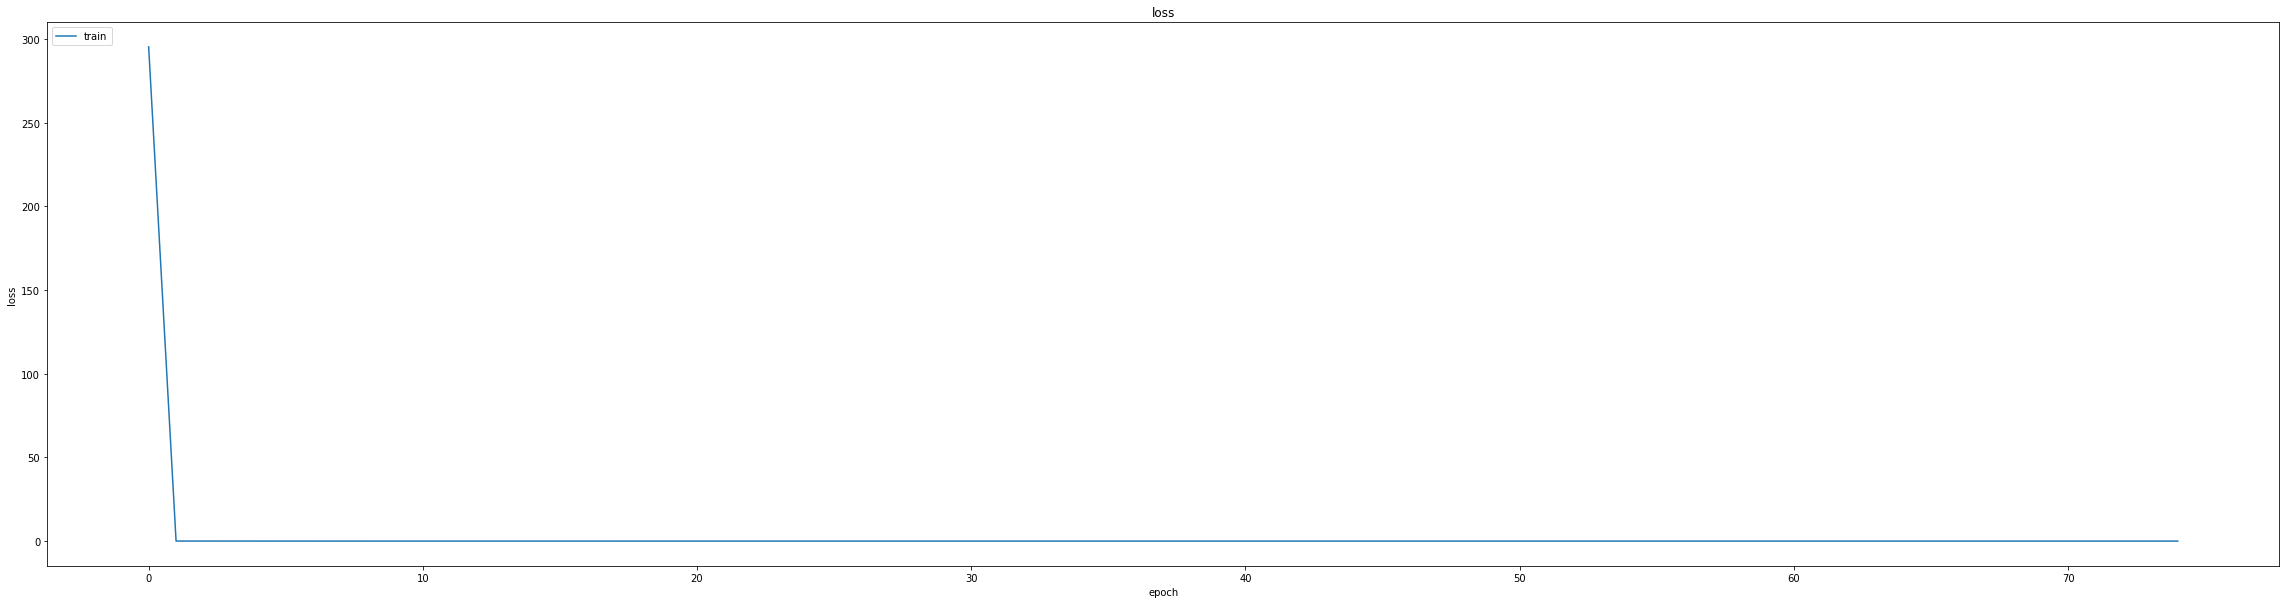

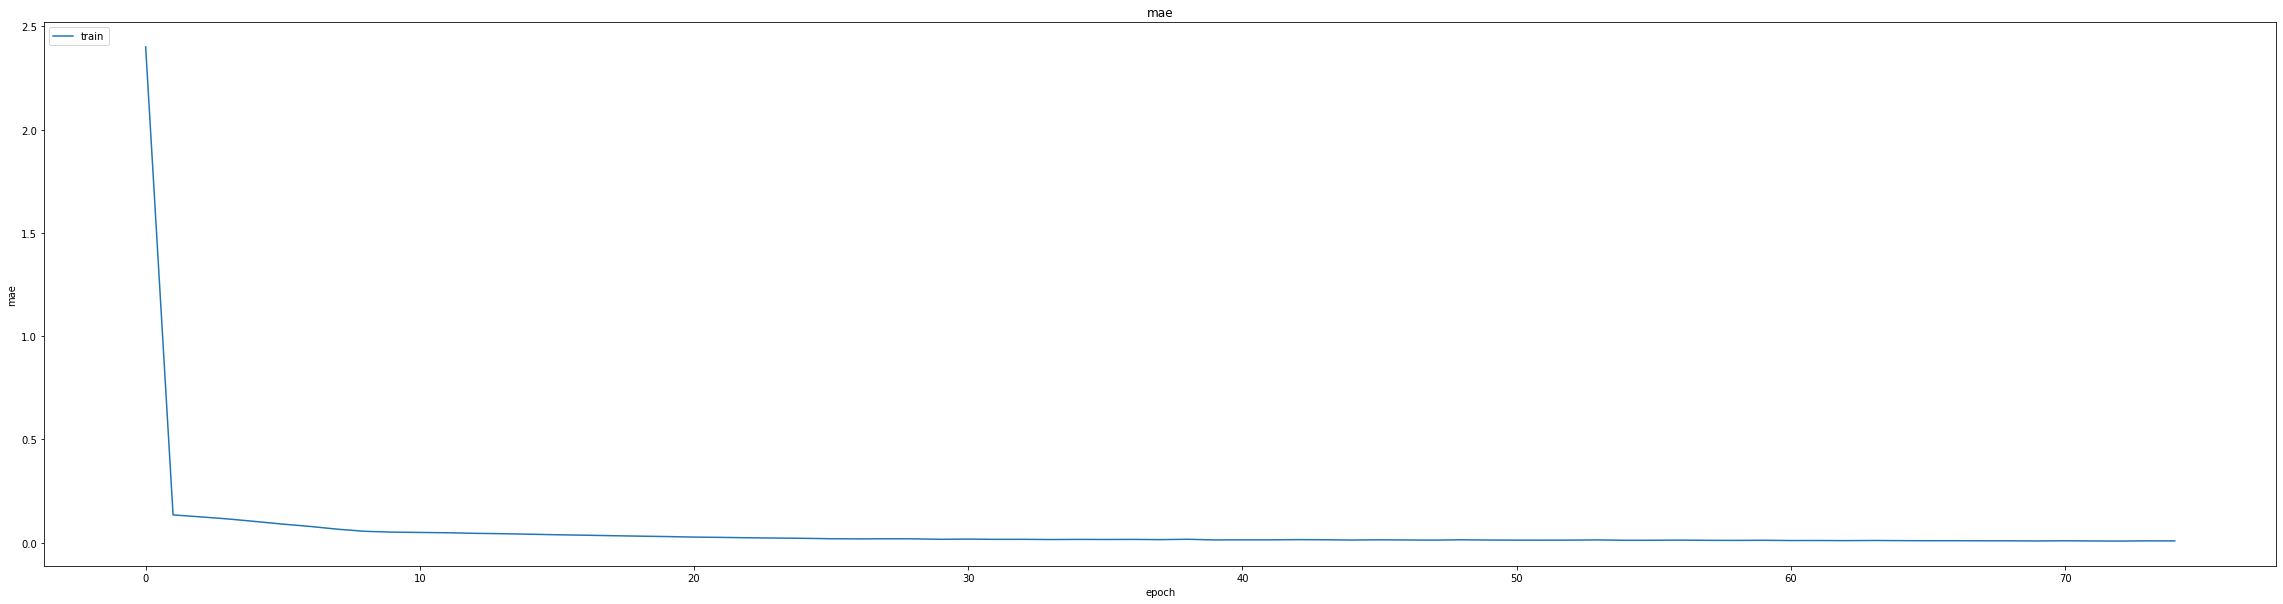

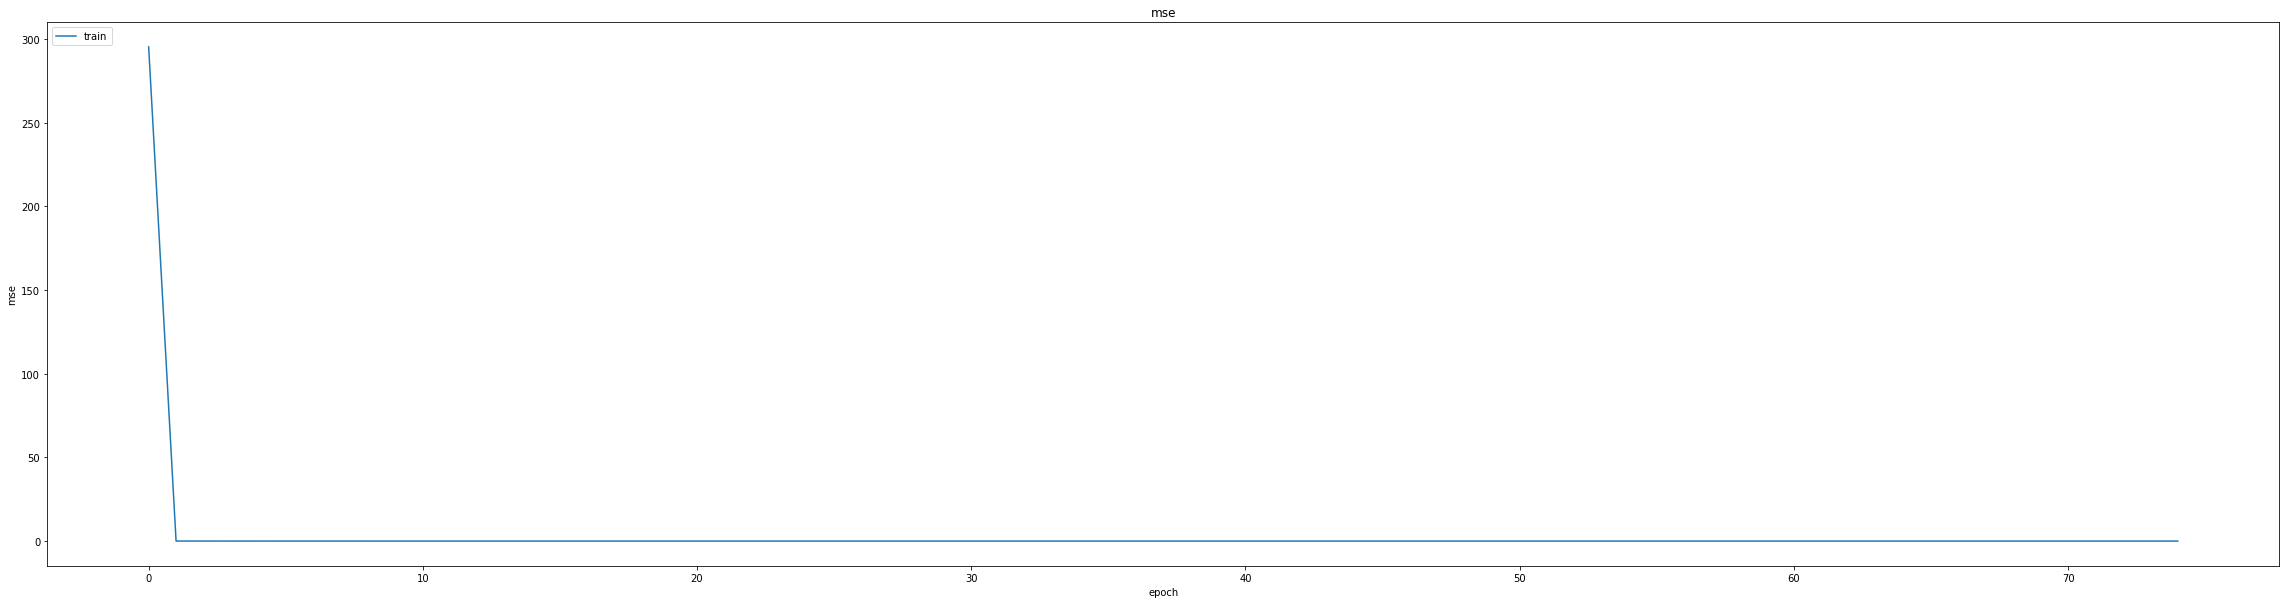

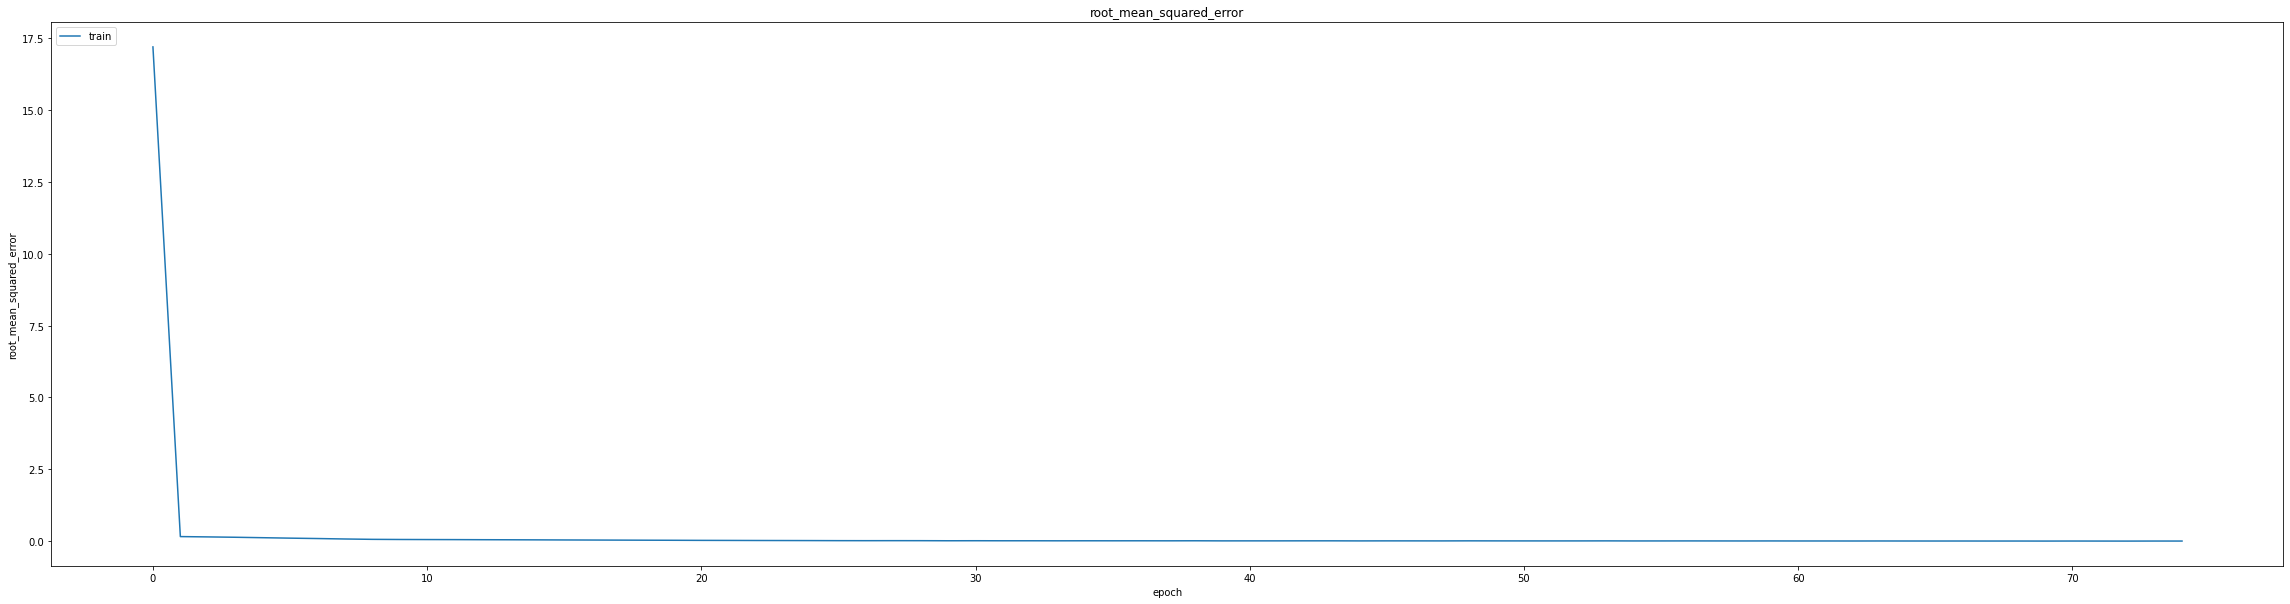

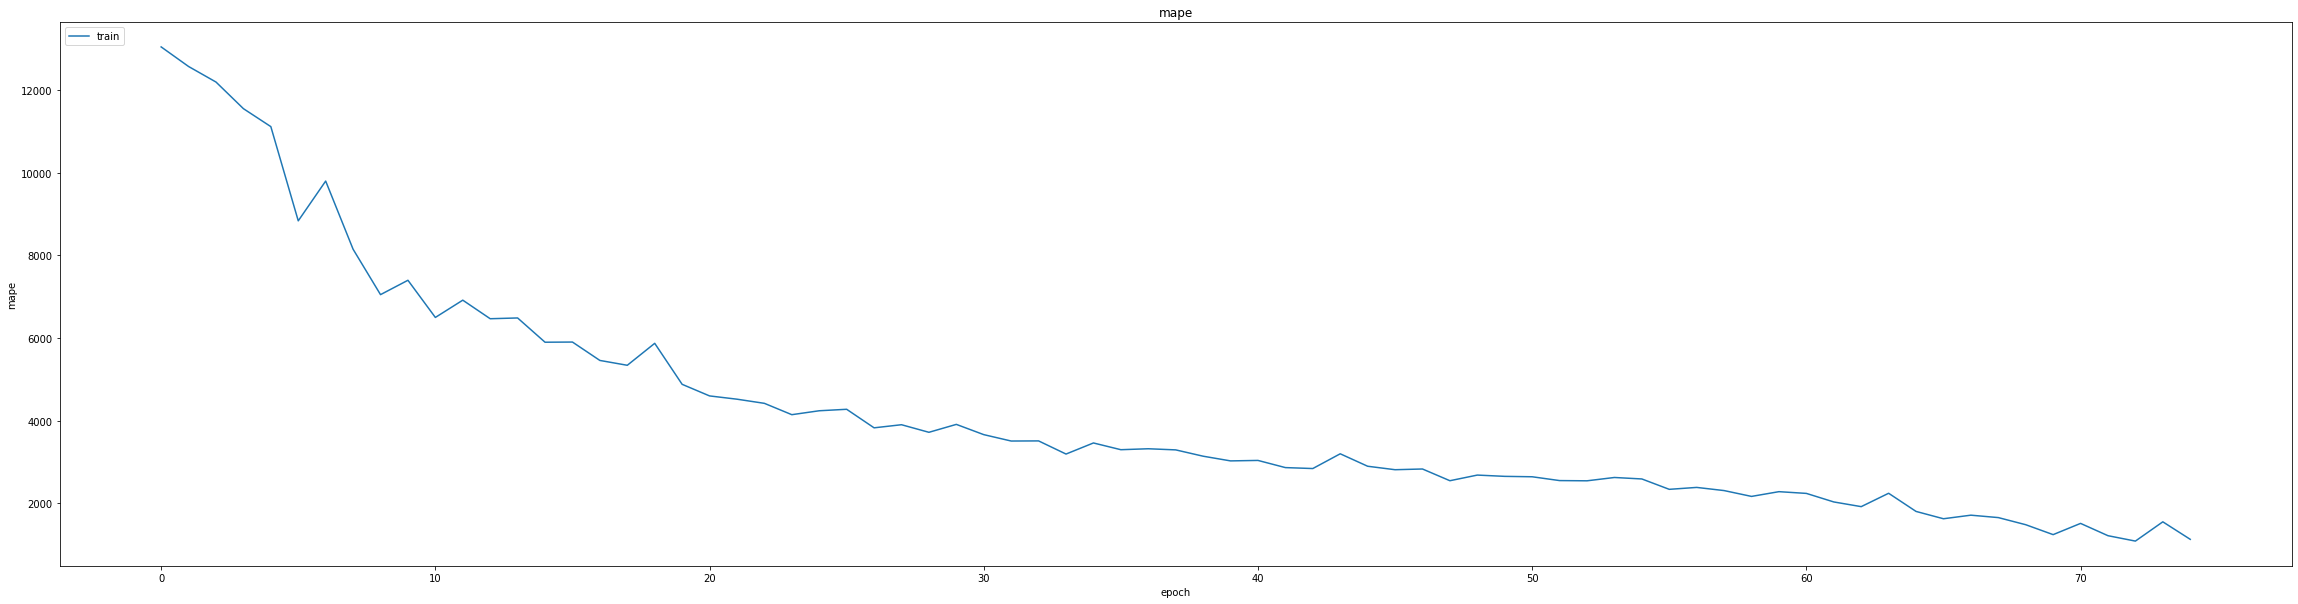

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008548855781555176
0.01143898256123066
464/464 [==============================] - 4s 6ms/step
0.9961697413066952


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
347/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0140 - mse: 0.0014 - root_mean_squared_error: 0.0378 - mape: 1506.9132
Epoch 1: val_mse improved from 0.00013 to 0.00012, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 40s 95ms/step - loss: 0.0014 - mae: 0.0139 - mse: 0.0014 - root_mean_squared_error: 0.0377 - mape: 1503.0908 - val_loss: 1.1612e-04 - val_mae: 0.0080 - val_mse: 1.1612e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 4571.8848 - lr: 0.0010
Epoch 2/25
348/348 [==============================] - ETA: 0s - loss: 3.2828e-05 - mae: 0.0044 - mse: 3.2828e-05 - root_mean_squared_error: 0.0057 - mape: 1284.7434
Epoch 2: val_mse improved from 0.00012 to 0.00011, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 31s 91ms/step - loss: 3.2828e-05 - mae: 0.0044 - mse: 3.2828e-05 - root_mean_squared_error: 0.0057 - mape: 1284.7434 - val_loss: 1.1294e-04 - val_mae: 0.0080 - val_mse: 1.1294e-04 - val_root_mean_squared_error: 0.0106 - val_mape: 3911.2158 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
345/348 [============================>.] - ETA: 0s - loss: 2.8492e-05 - mae: 0.0041 - mse: 2.8492e-05 - root_mean_squared_error: 0.0053 - mape: 1127.8339
Epoch 3: val_mse improved from 0.00011 to 0.00011, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 91ms/step - loss: 2.8446e-05 - mae: 0.0041 - mse: 2.8446e-05 - root_mean_squared_error: 0.0053 - mape: 1118.4941 - val_loss: 1.0639e-04 - val_mae: 0.0077 - val_mse: 1.0639e-04 - val_root_mean_squared_error: 0.0103 - val_mape: 4145.9502 - lr: 9.0000e-04
Epoch 4/25
348/348 [==============================] - ETA: 0s - loss: 2.8937e-05 - mae: 0.0042 - mse: 2.8937e-05 - root_mean_squared_error: 0.0054 - mape: 1007.9507
Epoch 4: val_mse improved from 0.00011 to 0.00009, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 32s 91ms/step - loss: 2.8937e-05 - mae: 0.0042 - mse: 2.8937e-05 - root_mean_squared_error: 0.0054 - mape: 1007.9507 - val_loss: 8.7373e-05 - val_mae: 0.0070 - val_mse: 8.7373e-05 - val_root_mean_squared_error: 0.0093 - val_mape: 3445.9956 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
346/348 [============================>.] - ETA: 0s - loss: 3.1004e-05 - mae: 0.0044 - mse: 3.1004e-05 - root_mean_squared_error: 0.0056 - mape: 1092.6851
Epoch 5: val_mse did not improve from 0.00009
348/348 [==============================] - 7s 20ms/step - loss: 3.0970e-05 - mae: 0.0044 - mse: 3.0970e-05 - root_mean_squared_error: 0.0056 - mape: 1086.7753 - val_loss: 9.7776e-05 - val_mae: 0.0076 - val_mse: 9.7776e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 2960.7339 - lr: 8.1000e-04
Epoch 6/25
347/348 [============================>.] - ETA: 0s - loss: 5.4915e-05 - mae: 0.0056 - mse: 5.4915e-05 - root_mean_squared_error: 0.0074 - mape:

348/348 [==============================] - 32s 91ms/step - loss: 3.9365e-05 - mae: 0.0048 - mse: 3.9365e-05 - root_mean_squared_error: 0.0063 - mape: 1028.7981 - val_loss: 7.4375e-05 - val_mae: 0.0064 - val_mse: 7.4375e-05 - val_root_mean_squared_error: 0.0086 - val_mape: 2863.7043 - lr: 6.5610e-04
Epoch 10/25
346/348 [============================>.] - ETA: 0s - loss: 4.7486e-05 - mae: 0.0053 - mse: 4.7486e-05 - root_mean_squared_error: 0.0069 - mape: 897.3147
Epoch 10: val_mse did not improve from 0.00007
348/348 [==============================] - 7s 20ms/step - loss: 4.7977e-05 - mae: 0.0054 - mse: 4.7977e-05 - root_mean_squared_error: 0.0069 - mape: 892.4670 - val_loss: 7.9390e-05 - val_mae: 0.0066 - val_mse: 7.9390e-05 - val_root_mean_squared_error: 0.0089 - val_mape: 2977.5481 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
346/348 [============================>.] - ETA: 0s - loss: 3.0677e-05 - mae: 0.0044 - mse: 3.0677e-05 - root_mean_squared_error: 0.0055 - mape

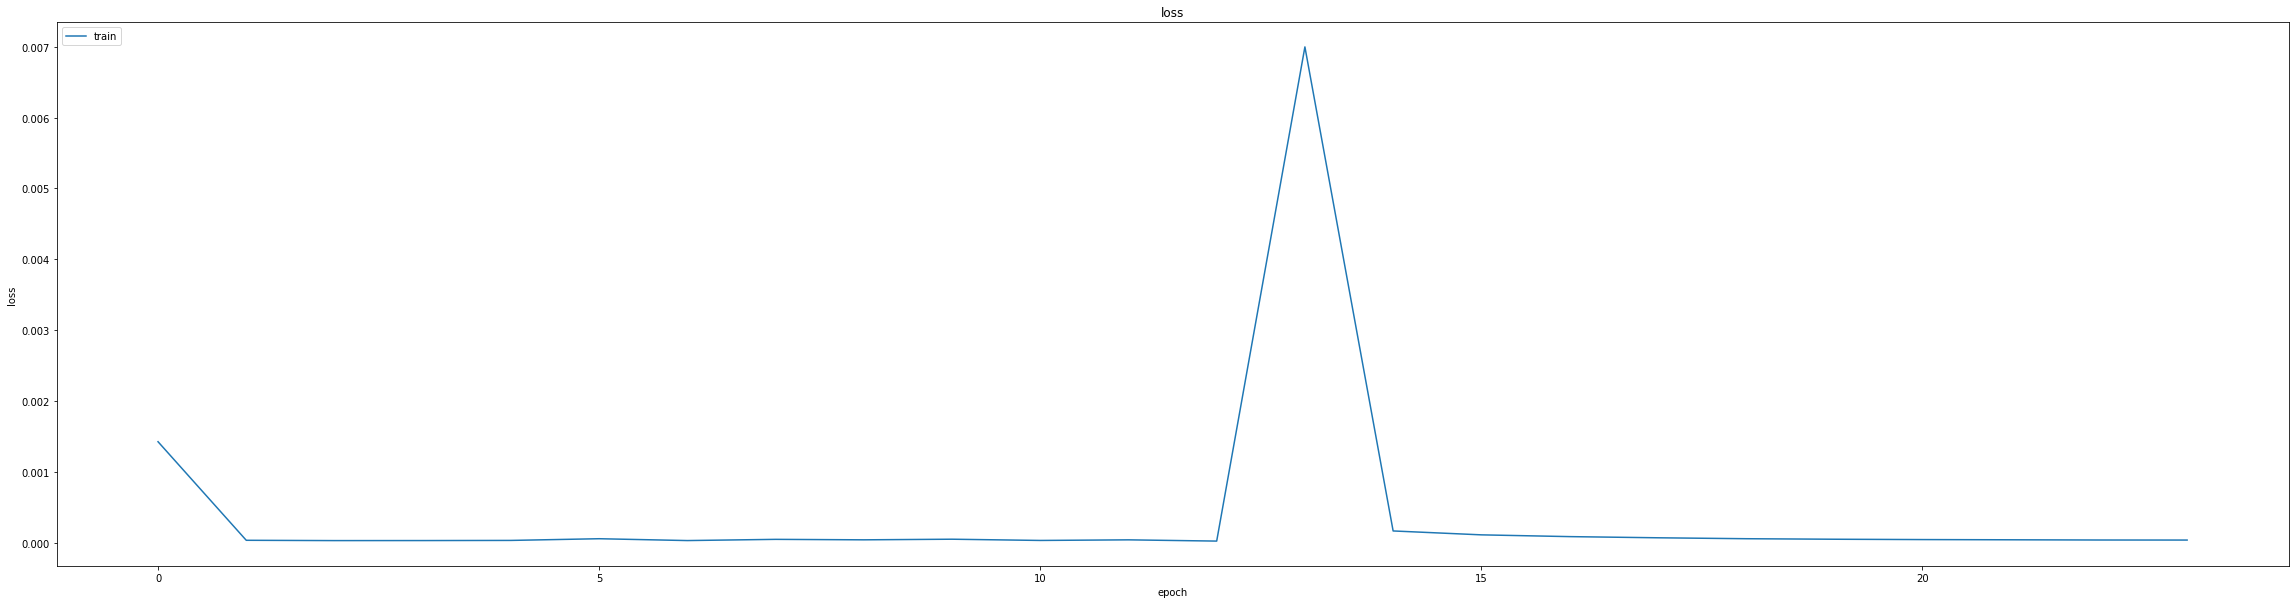

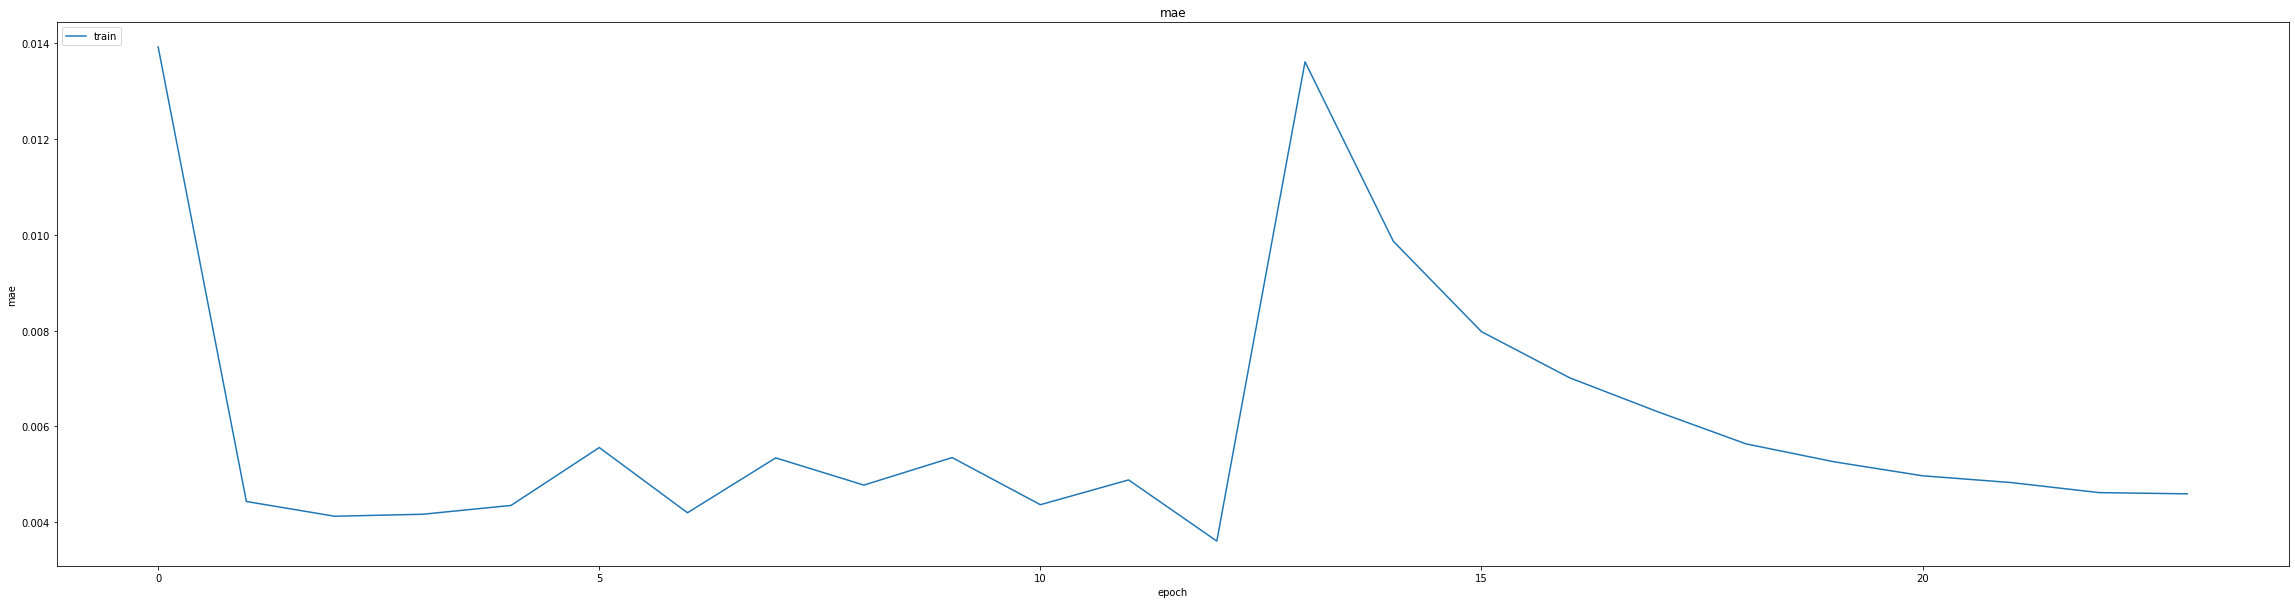

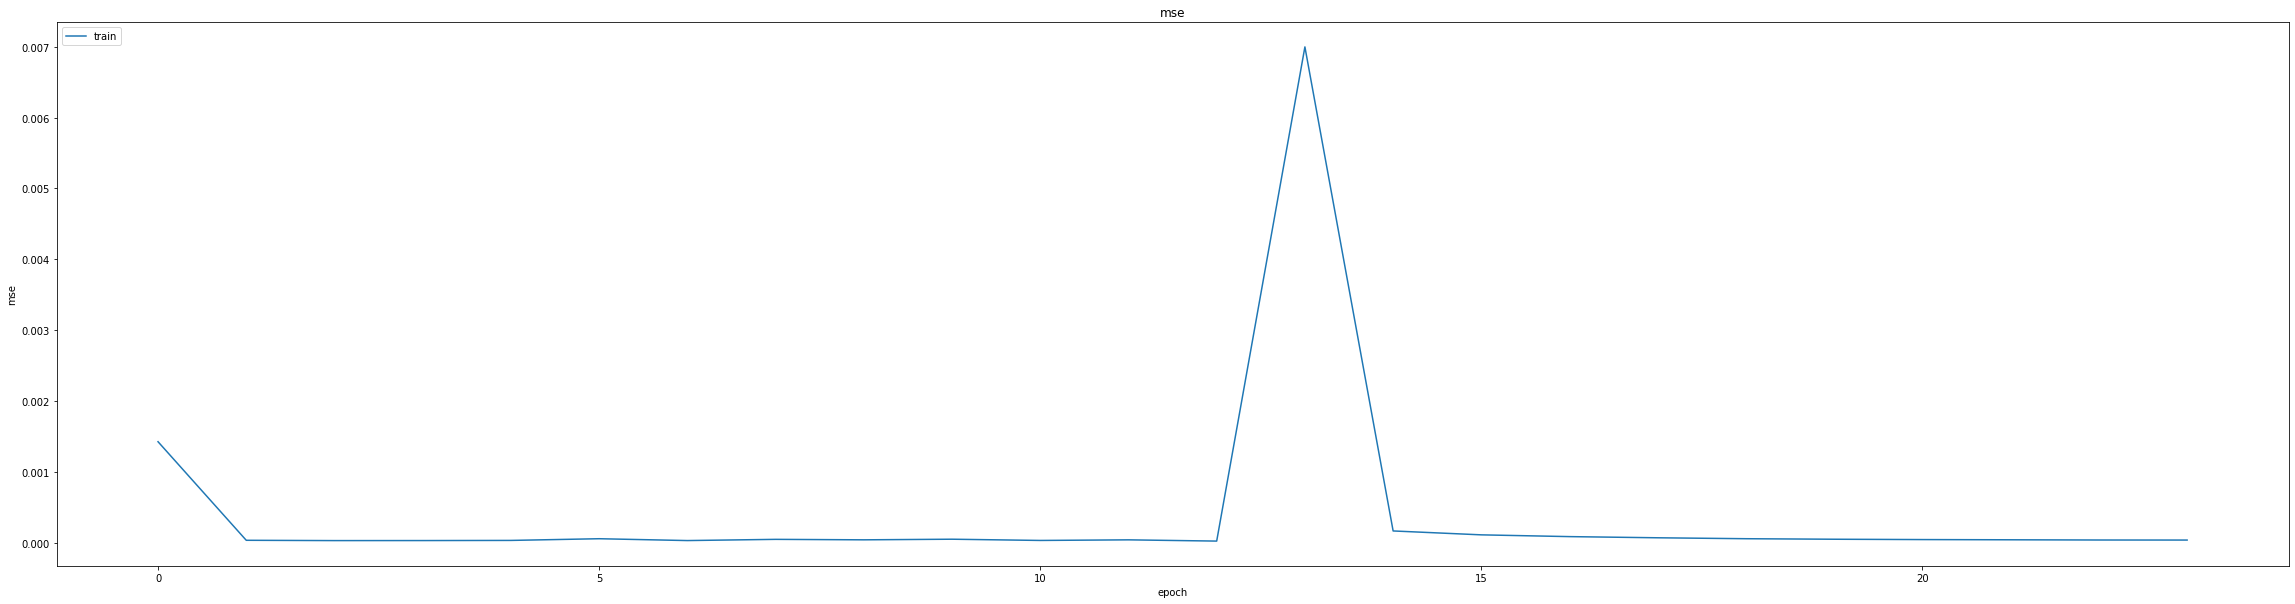

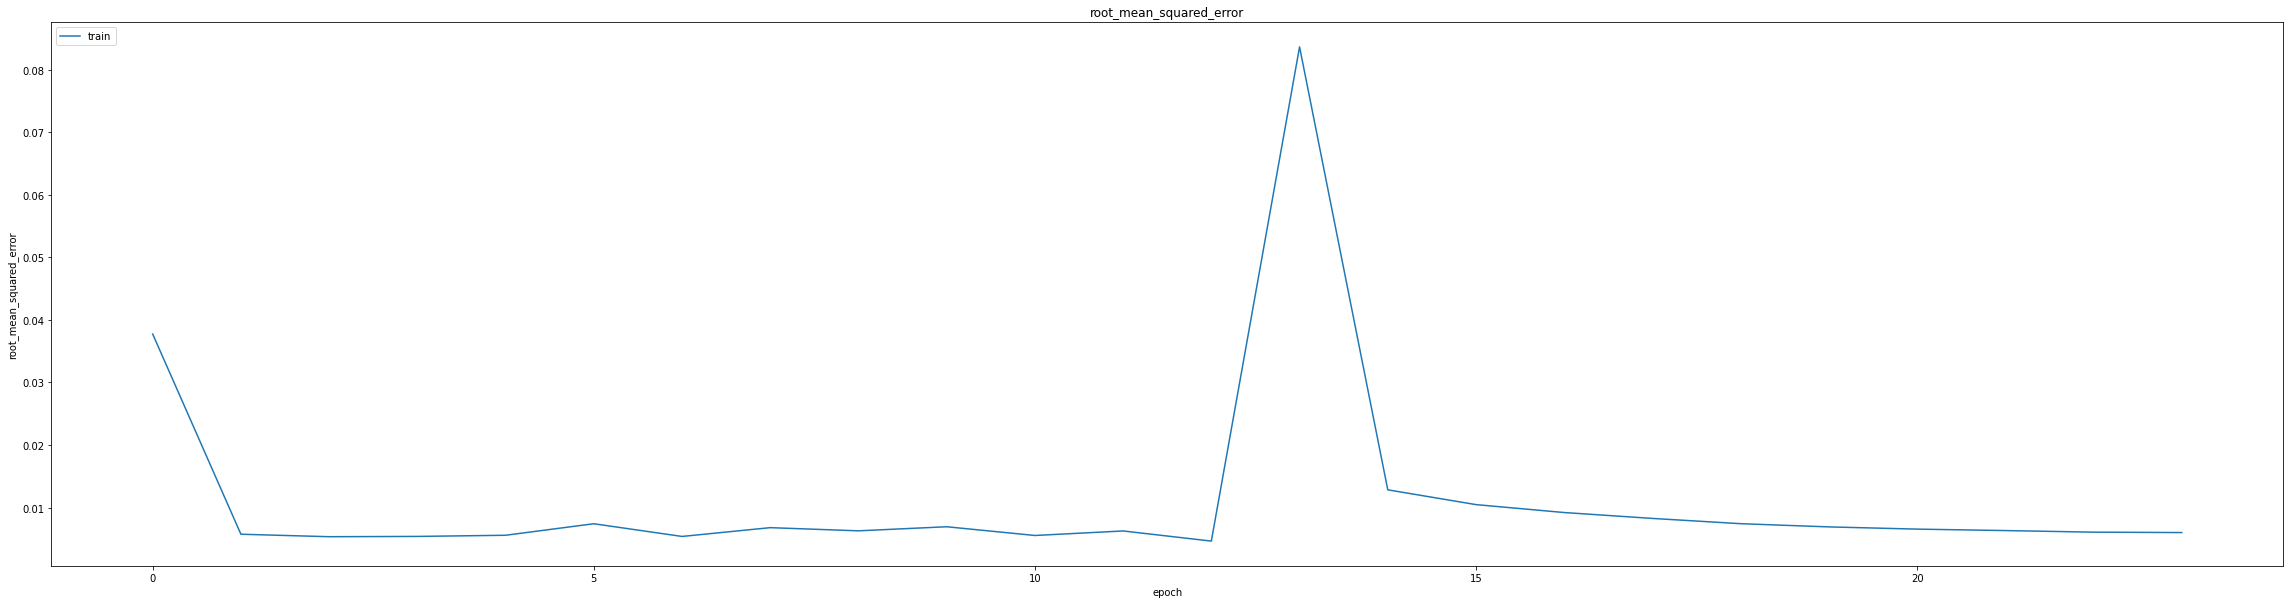

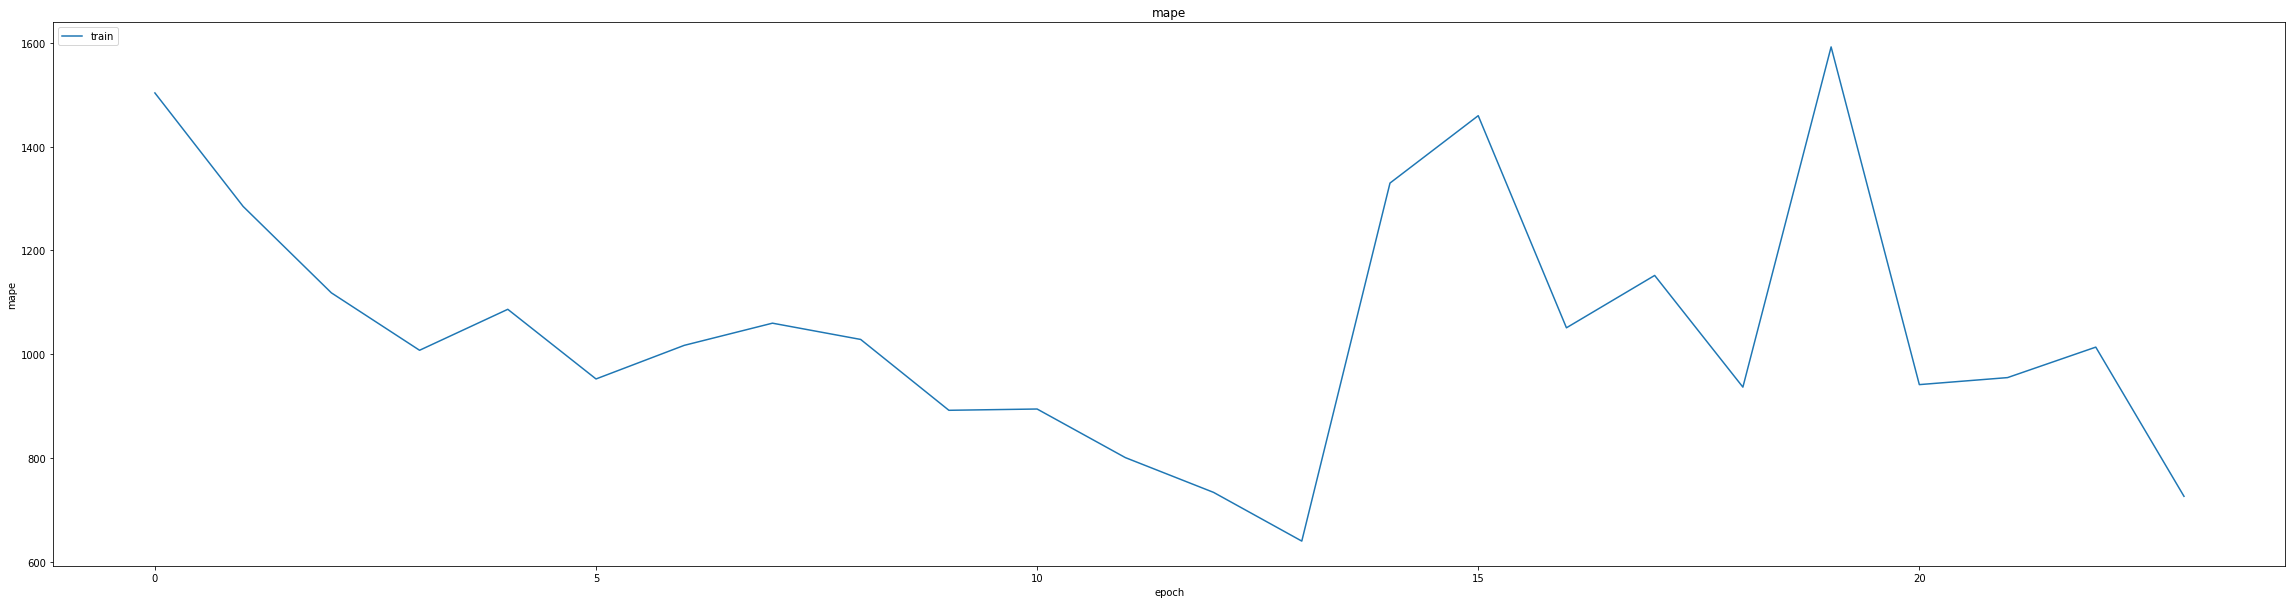

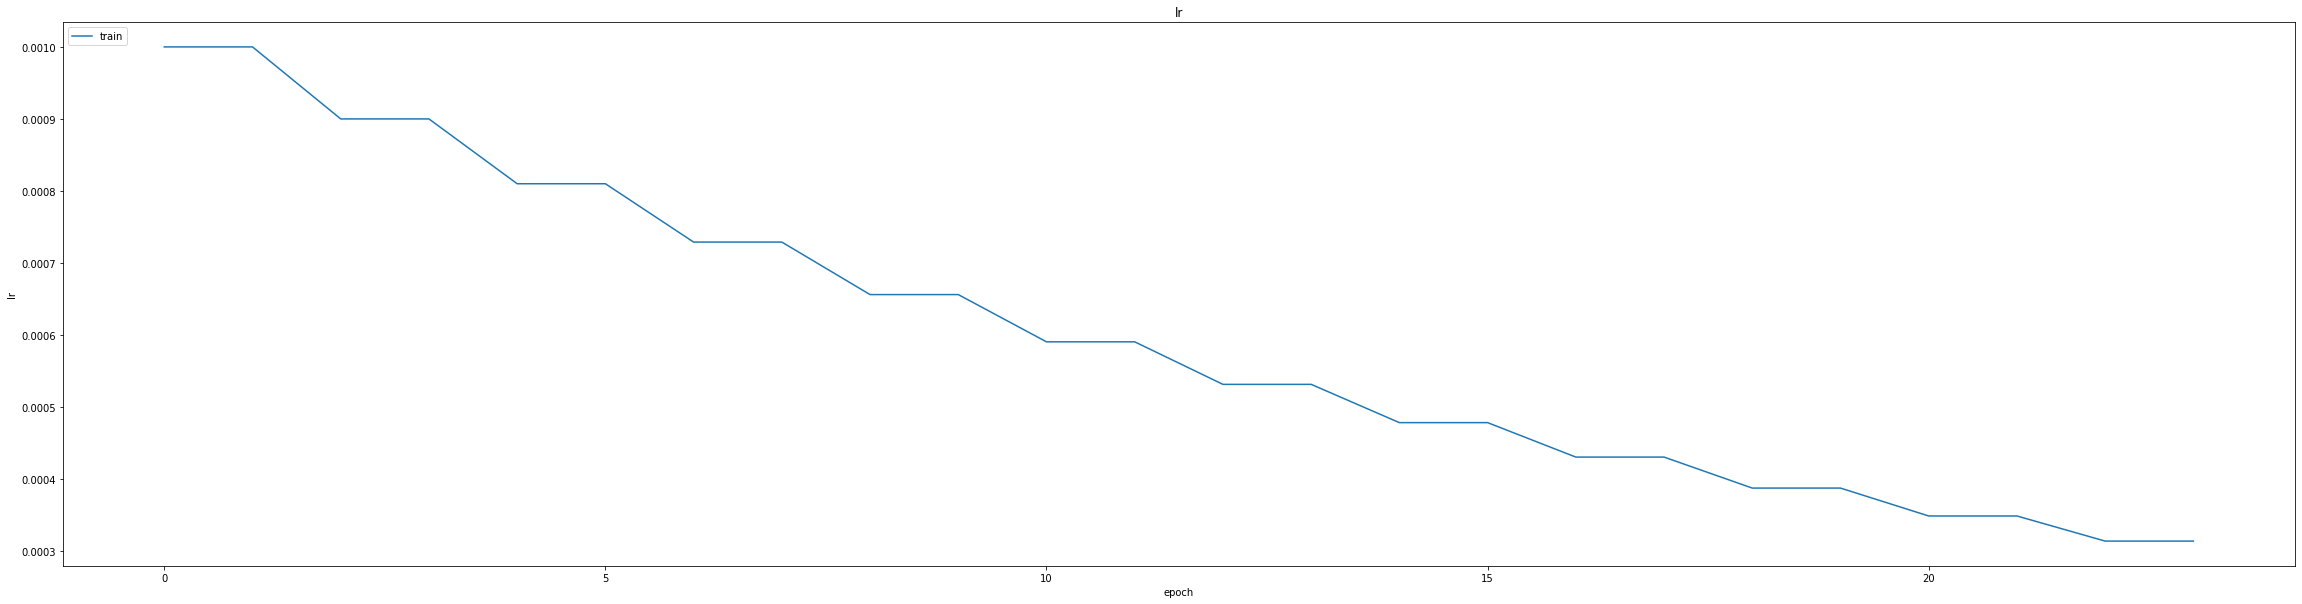

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006365732289850712
0.008624092675745487
464/464 [==============================] - 3s 6ms/step
0.9979920013747559


464/464 [==============================] - 3s 6ms/step


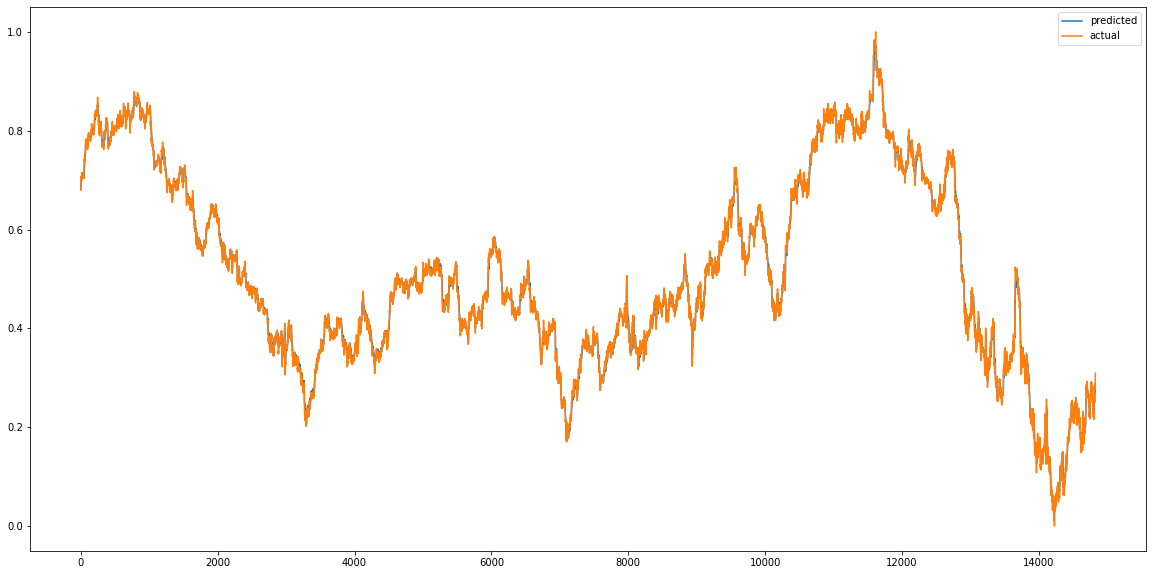

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


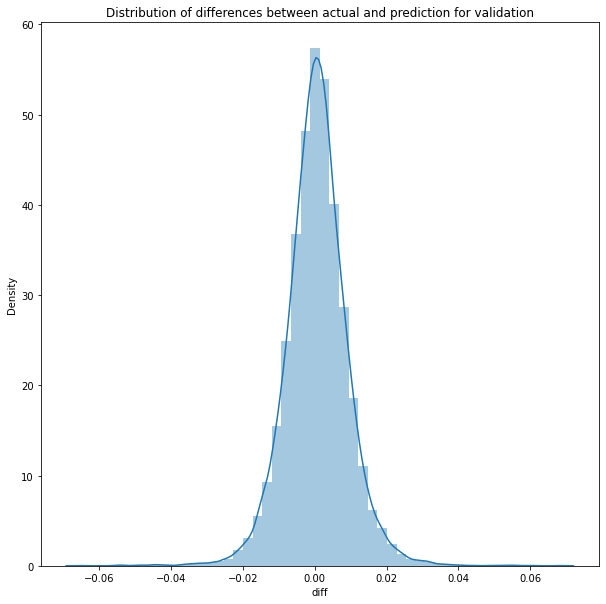

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 3s 6ms/step


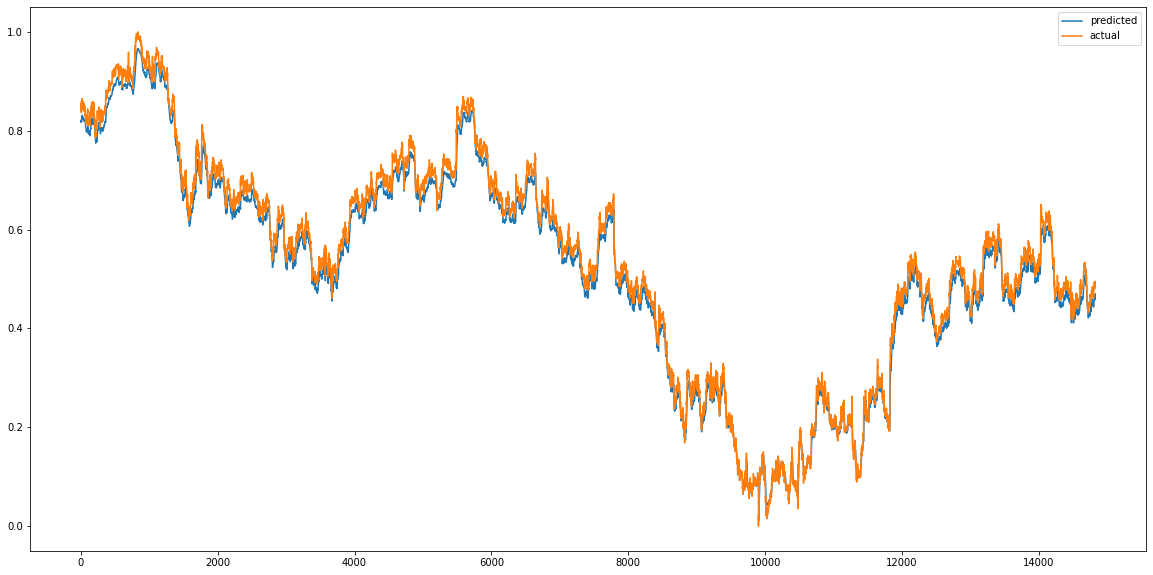

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


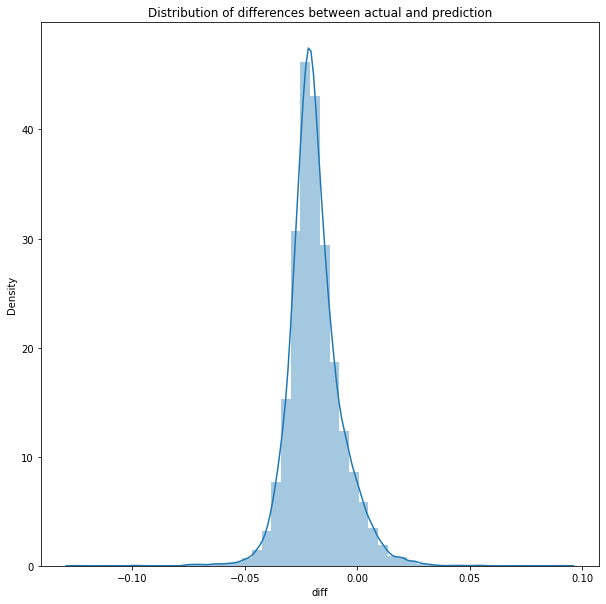

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.000485720597740179
RMSE :  0.022039069802062404
MAE :  0.01977828535420097
464/464 [==============================] - 3s 6ms/step
R2_Score  : 0.9903681254340453


count    14827.000000
mean        -0.018753
std          0.011578
min         -0.124295
25%         -0.025473
50%         -0.020041
75%         -0.013125
max          0.091056
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
344/348 [============================>.] - ETA: 0s - loss: 114.6087 - mae: 1.4100 - mse: 114.6087 - root_mean_squared_error: 10.7055 - mape: 8222.2695
Epoch 1: val_mse improved from inf to 0.04271, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 24s 57ms/step - loss: 113.3304 - mae: 1.3971 - mse: 113.3304 - root_mean_squared_error: 10.6457 - mape: 8130.9233 - val_loss: 0.0427 - val_mae: 0.1603 - val_mse: 0.0427 - val_root_mean_squared_error: 0.2067 - val_mape: 29566.0215
Epoch 2/75
346/348 [============================>.] - ETA: 0s - loss: 0.0510 - mae: 0.1920 - mse: 0.0510 - root_mean_squared_error: 0.2259 - mape: 14086.6240
Epoch 2: val_mse did not improve from 0.04271
348/348 [==============================] - 7s 21ms/step - loss: 0.0509 - mae: 0.1917 - mse: 0.0509 - root_mean_squared_error: 0.2256 - mape: 14010.5254 - val_loss: 0.0511 - val_mae: 0.1955 - val_mse: 0.0511 - val_root_mean_squared_error: 0.2261 - val_mape: 42605.1445
Epoch 3/75
348/348 [==============================] - ETA: 0s - loss: 0.0382 - mae: 0.1587 - mse: 0.0382 - root_mean_squared_error: 0.1954 - mape: 13383.8125
Epoch 3: val_mse did not improve from 0.04271
348/348 [==============================] - 8s 22ms/

348/348 [==============================] - 15s 44ms/step - loss: 0.0288 - mae: 0.1350 - mse: 0.0288 - root_mean_squared_error: 0.1697 - mape: 13223.2646 - val_loss: 0.0349 - val_mae: 0.1547 - val_mse: 0.0349 - val_root_mean_squared_error: 0.1868 - val_mape: 39066.6523
Epoch 6/75
348/348 [==============================] - ETA: 0s - loss: 0.0177 - mae: 0.1008 - mse: 0.0177 - root_mean_squared_error: 0.1332 - mape: 12509.4053
Epoch 6: val_mse improved from 0.03489 to 0.01764, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0177 - mae: 0.1008 - mse: 0.0177 - root_mean_squared_error: 0.1332 - mape: 12509.4053 - val_loss: 0.0176 - val_mae: 0.0988 - val_mse: 0.0176 - val_root_mean_squared_error: 0.1328 - val_mape: 34035.9141
Epoch 7/75
344/348 [============================>.] - ETA: 0s - loss: 0.0103 - mae: 0.0744 - mse: 0.0103 - root_mean_squared_error: 0.1017 - mape: 11012.6104
Epoch 7: val_mse improved from 0.01764 to 0.01026, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0103 - mae: 0.0744 - mse: 0.0103 - root_mean_squared_error: 0.1017 - mape: 10889.9170 - val_loss: 0.0103 - val_mae: 0.0704 - val_mse: 0.0103 - val_root_mean_squared_error: 0.1013 - val_mape: 30182.6836
Epoch 8/75
347/348 [============================>.] - ETA: 0s - loss: 0.0078 - mae: 0.0647 - mse: 0.0078 - root_mean_squared_error: 0.0881 - mape: 10263.2178
Epoch 8: val_mse improved from 0.01026 to 0.00727, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0078 - mae: 0.0647 - mse: 0.0078 - root_mean_squared_error: 0.0881 - mape: 10237.2070 - val_loss: 0.0073 - val_mae: 0.0548 - val_mse: 0.0073 - val_root_mean_squared_error: 0.0852 - val_mape: 27979.9824
Epoch 9/75
344/348 [============================>.] - ETA: 0s - loss: 0.0066 - mae: 0.0604 - mse: 0.0066 - root_mean_squared_error: 0.0815 - mape: 8202.4570
Epoch 9: val_mse improved from 0.00727 to 0.00594, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 48ms/step - loss: 0.0066 - mae: 0.0604 - mse: 0.0066 - root_mean_squared_error: 0.0815 - mape: 8111.0596 - val_loss: 0.0059 - val_mae: 0.0524 - val_mse: 0.0059 - val_root_mean_squared_error: 0.0771 - val_mape: 26187.6328
Epoch 10/75
347/348 [============================>.] - ETA: 0s - loss: 0.0056 - mae: 0.0559 - mse: 0.0056 - root_mean_squared_error: 0.0751 - mape: 9017.5947
Epoch 10: val_mse improved from 0.00594 to 0.00515, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0056 - mae: 0.0559 - mse: 0.0056 - root_mean_squared_error: 0.0750 - mape: 8994.7334 - val_loss: 0.0051 - val_mae: 0.0507 - val_mse: 0.0051 - val_root_mean_squared_error: 0.0718 - val_mape: 24698.7012
Epoch 11/75
347/348 [============================>.] - ETA: 0s - loss: 0.0052 - mae: 0.0543 - mse: 0.0052 - root_mean_squared_error: 0.0721 - mape: 9876.1064 
Epoch 11: val_mse improved from 0.00515 to 0.00367, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0052 - mae: 0.0543 - mse: 0.0052 - root_mean_squared_error: 0.0721 - mape: 9851.0889 - val_loss: 0.0037 - val_mae: 0.0367 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0606 - val_mape: 23541.7285
Epoch 12/75
346/348 [============================>.] - ETA: 0s - loss: 0.0045 - mae: 0.0507 - mse: 0.0045 - root_mean_squared_error: 0.0673 - mape: 7895.0508
Epoch 12: val_mse did not improve from 0.00367
348/348 [==============================] - 5s 13ms/step - loss: 0.0045 - mae: 0.0506 - mse: 0.0045 - root_mean_squared_error: 0.0673 - mape: 7852.3711 - val_loss: 0.0038 - val_mae: 0.0428 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0616 - val_mape: 22495.3242
Epoch 13/75
345/348 [============================>.] - ETA: 0s - loss: 0.0041 - mae: 0.0490 - mse: 0.0041 - root_mean_squared_error: 0.0644 - mape: 8346.3633
Epoch 13: val_mse improved from 0.00367 to 0.00346, saving model to /content/drive/MyDrive/modelweight

348/348 [==============================] - 15s 42ms/step - loss: 0.0041 - mae: 0.0489 - mse: 0.0041 - root_mean_squared_error: 0.0644 - mape: 8277.2637 - val_loss: 0.0035 - val_mae: 0.0421 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0589 - val_mape: 21604.0781
Epoch 14/75
345/348 [============================>.] - ETA: 0s - loss: 0.0037 - mae: 0.0465 - mse: 0.0037 - root_mean_squared_error: 0.0610 - mape: 8700.2480
Epoch 14: val_mse improved from 0.00346 to 0.00277, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 45ms/step - loss: 0.0037 - mae: 0.0465 - mse: 0.0037 - root_mean_squared_error: 0.0610 - mape: 8628.2236 - val_loss: 0.0028 - val_mae: 0.0356 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0526 - val_mape: 20748.5879
Epoch 15/75
348/348 [==============================] - ETA: 0s - loss: 0.0034 - mae: 0.0445 - mse: 0.0034 - root_mean_squared_error: 0.0581 - mape: 7474.4033
Epoch 15: val_mse improved from 0.00277 to 0.00218, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 45ms/step - loss: 0.0034 - mae: 0.0445 - mse: 0.0034 - root_mean_squared_error: 0.0581 - mape: 7474.4033 - val_loss: 0.0022 - val_mae: 0.0302 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0467 - val_mape: 19724.2891
Epoch 16/75
345/348 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0408 - mse: 0.0028 - root_mean_squared_error: 0.0534 - mape: 7497.7661
Epoch 16: val_mse did not improve from 0.00218
348/348 [==============================] - 5s 13ms/step - loss: 0.0029 - mae: 0.0408 - mse: 0.0029 - root_mean_squared_error: 0.0534 - mape: 7435.7031 - val_loss: 0.0026 - val_mae: 0.0374 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0506 - val_mape: 18890.2637
Epoch 17/75
348/348 [==============================] - ETA: 0s - loss: 0.0025 - mae: 0.0387 - mse: 0.0025 - root_mean_squared_error: 0.0503 - mape: 6093.5894
Epoch 17: val_mse improved from 0.00218 to 0.00208, saving model to /content/drive/MyDrive/modelweight

348/348 [==============================] - 16s 46ms/step - loss: 0.0025 - mae: 0.0387 - mse: 0.0025 - root_mean_squared_error: 0.0503 - mape: 6093.5894 - val_loss: 0.0021 - val_mae: 0.0325 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0456 - val_mape: 18133.3164
Epoch 18/75
344/348 [============================>.] - ETA: 0s - loss: 0.0022 - mae: 0.0363 - mse: 0.0022 - root_mean_squared_error: 0.0470 - mape: 6182.4995
Epoch 18: val_mse improved from 0.00208 to 0.00155, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0022 - mae: 0.0363 - mse: 0.0022 - root_mean_squared_error: 0.0471 - mape: 6113.5908 - val_loss: 0.0015 - val_mae: 0.0265 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0393 - val_mape: 17377.0801
Epoch 19/75
344/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0340 - mse: 0.0019 - root_mean_squared_error: 0.0441 - mape: 5716.1968
Epoch 19: val_mse improved from 0.00155 to 0.00142, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.0019 - mae: 0.0340 - mse: 0.0019 - root_mean_squared_error: 0.0441 - mape: 5652.4780 - val_loss: 0.0014 - val_mae: 0.0256 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0377 - val_mape: 16788.2949
Epoch 20/75
347/348 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0322 - mse: 0.0017 - root_mean_squared_error: 0.0416 - mape: 5824.0986
Epoch 20: val_mse improved from 0.00142 to 0.00138, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0017 - mae: 0.0322 - mse: 0.0017 - root_mean_squared_error: 0.0416 - mape: 5809.3340 - val_loss: 0.0014 - val_mae: 0.0261 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0372 - val_mape: 16219.5898
Epoch 21/75
346/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0284 - mse: 0.0014 - root_mean_squared_error: 0.0372 - mape: 5682.7070
Epoch 21: val_mse improved from 0.00138 to 0.00119, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0014 - mae: 0.0284 - mse: 0.0014 - root_mean_squared_error: 0.0372 - mape: 5651.9868 - val_loss: 0.0012 - val_mae: 0.0236 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0345 - val_mape: 15670.8516
Epoch 22/75
347/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0265 - mse: 0.0012 - root_mean_squared_error: 0.0345 - mape: 5306.3726
Epoch 22: val_mse did not improve from 0.00119
348/348 [==============================] - 5s 13ms/step - loss: 0.0012 - mae: 0.0265 - mse: 0.0012 - root_mean_squared_error: 0.0345 - mape: 5292.9282 - val_loss: 0.0013 - val_mae: 0.0259 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0356 - val_mape: 15056.1963
Epoch 23/75
346/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0256 - mse: 0.0011 - root_mean_squared_error: 0.0332 - mape: 5275.3843
Epoch 23: val_mse improved from 0.00119 to 0.00094, saving model to /content/drive/MyDrive/modelweight

348/348 [==============================] - 15s 44ms/step - loss: 0.0011 - mae: 0.0256 - mse: 0.0011 - root_mean_squared_error: 0.0332 - mape: 5246.8594 - val_loss: 9.3892e-04 - val_mae: 0.0207 - val_mse: 9.3892e-04 - val_root_mean_squared_error: 0.0306 - val_mape: 14442.9785
Epoch 24/75
346/348 [============================>.] - ETA: 0s - loss: 8.7428e-04 - mae: 0.0225 - mse: 8.7428e-04 - root_mean_squared_error: 0.0296 - mape: 4571.1553
Epoch 24: val_mse improved from 0.00094 to 0.00089, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 8.7397e-04 - mae: 0.0225 - mse: 8.7397e-04 - root_mean_squared_error: 0.0296 - mape: 4546.4365 - val_loss: 8.8911e-04 - val_mae: 0.0204 - val_mse: 8.8911e-04 - val_root_mean_squared_error: 0.0298 - val_mape: 13853.6465
Epoch 25/75
344/348 [============================>.] - ETA: 0s - loss: 8.1675e-04 - mae: 0.0219 - mse: 8.1675e-04 - root_mean_squared_error: 0.0286 - mape: 4576.8774
Epoch 25: val_mse improved from 0.00089 to 0.00082, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 8.1425e-04 - mae: 0.0219 - mse: 8.1425e-04 - root_mean_squared_error: 0.0285 - mape: 4525.8296 - val_loss: 8.2143e-04 - val_mae: 0.0197 - val_mse: 8.2143e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 13353.4111
Epoch 26/75
348/348 [==============================] - ETA: 0s - loss: 7.6658e-04 - mae: 0.0212 - mse: 7.6658e-04 - root_mean_squared_error: 0.0277 - mape: 4404.0654
Epoch 26: val_mse did not improve from 0.00082
348/348 [==============================] - 5s 13ms/step - loss: 7.6658e-04 - mae: 0.0212 - mse: 7.6658e-04 - root_mean_squared_error: 0.0277 - mape: 4404.0654 - val_loss: 0.0010 - val_mae: 0.0240 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0322 - val_mape: 12821.7070
Epoch 27/75
347/348 [============================>.] - ETA: 0s - loss: 5.9474e-04 - mae: 0.0186 - mse: 5.9474e-04 - root_mean_squared_error: 0.0244 - mape: 4384.5615
Epoch 27: val_mse improved from 0.00082 to 0.00075, saving mod

348/348 [==============================] - 16s 45ms/step - loss: 5.9529e-04 - mae: 0.0187 - mse: 5.9529e-04 - root_mean_squared_error: 0.0244 - mape: 4373.4458 - val_loss: 7.4777e-04 - val_mae: 0.0191 - val_mse: 7.4777e-04 - val_root_mean_squared_error: 0.0273 - val_mape: 12428.8096
Epoch 28/75
348/348 [==============================] - ETA: 0s - loss: 5.8149e-04 - mae: 0.0184 - mse: 5.8149e-04 - root_mean_squared_error: 0.0241 - mape: 4115.5518
Epoch 28: val_mse did not improve from 0.00075
348/348 [==============================] - 5s 13ms/step - loss: 5.8149e-04 - mae: 0.0184 - mse: 5.8149e-04 - root_mean_squared_error: 0.0241 - mape: 4115.5518 - val_loss: 8.4964e-04 - val_mae: 0.0217 - val_mse: 8.4964e-04 - val_root_mean_squared_error: 0.0291 - val_mape: 12036.6992
Epoch 29/75
347/348 [============================>.] - ETA: 0s - loss: 5.8324e-04 - mae: 0.0187 - mse: 5.8324e-04 - root_mean_squared_error: 0.0242 - mape: 4380.9912
Epoch 29: val_mse improved from 0.00075 to 0.00071, sa

348/348 [==============================] - 15s 44ms/step - loss: 5.8270e-04 - mae: 0.0187 - mse: 5.8270e-04 - root_mean_squared_error: 0.0241 - mape: 4369.8804 - val_loss: 7.1114e-04 - val_mae: 0.0188 - val_mse: 7.1114e-04 - val_root_mean_squared_error: 0.0267 - val_mape: 11658.4053
Epoch 30/75
348/348 [==============================] - ETA: 0s - loss: 5.3119e-04 - mae: 0.0177 - mse: 5.3119e-04 - root_mean_squared_error: 0.0230 - mape: 4086.9216
Epoch 30: val_mse did not improve from 0.00071
348/348 [==============================] - 5s 13ms/step - loss: 5.3119e-04 - mae: 0.0177 - mse: 5.3119e-04 - root_mean_squared_error: 0.0230 - mape: 4086.9216 - val_loss: 7.1830e-04 - val_mae: 0.0197 - val_mse: 7.1830e-04 - val_root_mean_squared_error: 0.0268 - val_mape: 11317.5156
Epoch 31/75
345/348 [============================>.] - ETA: 0s - loss: 5.2789e-04 - mae: 0.0176 - mse: 5.2789e-04 - root_mean_squared_error: 0.0230 - mape: 4264.5898
Epoch 31: val_mse did not improve from 0.00071
348/348

348/348 [==============================] - 15s 42ms/step - loss: 4.3672e-04 - mae: 0.0162 - mse: 4.3672e-04 - root_mean_squared_error: 0.0209 - mape: 3585.7190 - val_loss: 6.2246e-04 - val_mae: 0.0186 - val_mse: 6.2246e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 10359.7988
Epoch 34/75
346/348 [============================>.] - ETA: 0s - loss: 3.9655e-04 - mae: 0.0153 - mse: 3.9655e-04 - root_mean_squared_error: 0.0199 - mape: 3443.4697
Epoch 34: val_mse did not improve from 0.00062
348/348 [==============================] - 5s 13ms/step - loss: 3.9607e-04 - mae: 0.0153 - mse: 3.9607e-04 - root_mean_squared_error: 0.0199 - mape: 3424.8455 - val_loss: 0.0012 - val_mae: 0.0300 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0350 - val_mape: 9984.8711
Epoch 35/75
344/348 [============================>.] - ETA: 0s - loss: 4.1157e-04 - mae: 0.0157 - mse: 4.1157e-04 - root_mean_squared_error: 0.0203 - mape: 3133.8689
Epoch 35: val_mse improved from 0.00062 to 0.00053, saving mode

348/348 [==============================] - 16s 45ms/step - loss: 4.1056e-04 - mae: 0.0157 - mse: 4.1056e-04 - root_mean_squared_error: 0.0203 - mape: 3098.9160 - val_loss: 5.3017e-04 - val_mae: 0.0166 - val_mse: 5.3017e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 9734.5020
Epoch 36/75
347/348 [============================>.] - ETA: 0s - loss: 3.6689e-04 - mae: 0.0149 - mse: 3.6689e-04 - root_mean_squared_error: 0.0192 - mape: 3313.9021
Epoch 36: val_mse improved from 0.00053 to 0.00053, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 3.6681e-04 - mae: 0.0149 - mse: 3.6681e-04 - root_mean_squared_error: 0.0192 - mape: 3305.5024 - val_loss: 5.2551e-04 - val_mae: 0.0166 - val_mse: 5.2551e-04 - val_root_mean_squared_error: 0.0229 - val_mape: 9431.7314
Epoch 37/75
344/348 [============================>.] - ETA: 0s - loss: 3.8221e-04 - mae: 0.0152 - mse: 3.8221e-04 - root_mean_squared_error: 0.0196 - mape: 3257.7446
Epoch 37: val_mse did not improve from 0.00053
348/348 [==============================] - 5s 13ms/step - loss: 3.8125e-04 - mae: 0.0152 - mse: 3.8125e-04 - root_mean_squared_error: 0.0195 - mape: 3221.4250 - val_loss: 5.3438e-04 - val_mae: 0.0174 - val_mse: 5.3438e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 9137.4004
Epoch 38/75
344/348 [============================>.] - ETA: 0s - loss: 3.3878e-04 - mae: 0.0143 - mse: 3.3878e-04 - root_mean_squared_error: 0.0184 - mape: 3103.8281
Epoch 38: val_mse improved from 0.00053 to 0.00052, savi

348/348 [==============================] - 15s 42ms/step - loss: 3.3846e-04 - mae: 0.0143 - mse: 3.3846e-04 - root_mean_squared_error: 0.0184 - mape: 3069.2131 - val_loss: 5.2355e-04 - val_mae: 0.0166 - val_mse: 5.2355e-04 - val_root_mean_squared_error: 0.0229 - val_mape: 8823.0410
Epoch 39/75
344/348 [============================>.] - ETA: 0s - loss: 3.0107e-04 - mae: 0.0135 - mse: 3.0107e-04 - root_mean_squared_error: 0.0174 - mape: 2960.6711
Epoch 39: val_mse did not improve from 0.00052
348/348 [==============================] - 5s 13ms/step - loss: 3.0155e-04 - mae: 0.0135 - mse: 3.0155e-04 - root_mean_squared_error: 0.0174 - mape: 2927.6562 - val_loss: 0.0011 - val_mae: 0.0283 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0332 - val_mape: 8507.5928
Epoch 40/75
347/348 [============================>.] - ETA: 0s - loss: 2.9080e-04 - mae: 0.0133 - mse: 2.9080e-04 - root_mean_squared_error: 0.0171 - mape: 2803.7593
Epoch 40: val_mse did not improve from 0.00052
348/348 [========

348/348 [==============================] - 15s 44ms/step - loss: 3.0317e-04 - mae: 0.0137 - mse: 3.0317e-04 - root_mean_squared_error: 0.0174 - mape: 2672.7249 - val_loss: 4.4773e-04 - val_mae: 0.0158 - val_mse: 4.4773e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 7849.1758
Epoch 43/75
347/348 [============================>.] - ETA: 0s - loss: 2.4201e-04 - mae: 0.0121 - mse: 2.4201e-04 - root_mean_squared_error: 0.0156 - mape: 2633.1855
Epoch 43: val_mse improved from 0.00045 to 0.00045, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 2.4177e-04 - mae: 0.0121 - mse: 2.4177e-04 - root_mean_squared_error: 0.0155 - mape: 2626.5073 - val_loss: 4.4637e-04 - val_mae: 0.0159 - val_mse: 4.4637e-04 - val_root_mean_squared_error: 0.0211 - val_mape: 7590.2271
Epoch 44/75
345/348 [============================>.] - ETA: 0s - loss: 2.6451e-04 - mae: 0.0127 - mse: 2.6451e-04 - root_mean_squared_error: 0.0163 - mape: 2621.8037
Epoch 44: val_mse did not improve from 0.00045
348/348 [==============================] - 4s 13ms/step - loss: 2.6417e-04 - mae: 0.0127 - mse: 2.6417e-04 - root_mean_squared_error: 0.0163 - mape: 2600.0942 - val_loss: 5.4055e-04 - val_mae: 0.0177 - val_mse: 5.4055e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 7556.8091
Epoch 45/75
346/348 [============================>.] - ETA: 0s - loss: 3.0851e-04 - mae: 0.0139 - mse: 3.0851e-04 - root_mean_squared_error: 0.0176 - mape: 2537.0364
Epoch 45: val_mse improved from 0.00045 to 0.00042, savi

348/348 [==============================] - 15s 44ms/step - loss: 3.0900e-04 - mae: 0.0140 - mse: 3.0900e-04 - root_mean_squared_error: 0.0176 - mape: 2523.3225 - val_loss: 4.1640e-04 - val_mae: 0.0149 - val_mse: 4.1640e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 7270.5513
Epoch 46/75
348/348 [==============================] - ETA: 0s - loss: 2.4932e-04 - mae: 0.0125 - mse: 2.4932e-04 - root_mean_squared_error: 0.0158 - mape: 2754.7253
Epoch 46: val_mse did not improve from 0.00042
348/348 [==============================] - 4s 13ms/step - loss: 2.4932e-04 - mae: 0.0125 - mse: 2.4932e-04 - root_mean_squared_error: 0.0158 - mape: 2754.7253 - val_loss: 5.1453e-04 - val_mae: 0.0179 - val_mse: 5.1453e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 7037.7671
Epoch 47/75
344/348 [============================>.] - ETA: 0s - loss: 2.2240e-04 - mae: 0.0117 - mse: 2.2240e-04 - root_mean_squared_error: 0.0149 - mape: 2595.8179
Epoch 47: val_mse did not improve from 0.00042
348/348 [

348/348 [==============================] - 15s 44ms/step - loss: 2.2380e-04 - mae: 0.0117 - mse: 2.2380e-04 - root_mean_squared_error: 0.0150 - mape: 2298.3926 - val_loss: 3.6096e-04 - val_mae: 0.0141 - val_mse: 3.6096e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 6728.9038
Epoch 50/75
346/348 [============================>.] - ETA: 0s - loss: 2.0463e-04 - mae: 0.0112 - mse: 2.0463e-04 - root_mean_squared_error: 0.0143 - mape: 2692.8438
Epoch 50: val_mse improved from 0.00036 to 0.00034, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 2.0456e-04 - mae: 0.0112 - mse: 2.0456e-04 - root_mean_squared_error: 0.0143 - mape: 2678.3022 - val_loss: 3.4489e-04 - val_mae: 0.0138 - val_mse: 3.4489e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 6566.2378
Epoch 51/75
345/348 [============================>.] - ETA: 0s - loss: 2.3917e-04 - mae: 0.0122 - mse: 2.3917e-04 - root_mean_squared_error: 0.0155 - mape: 2326.8970
Epoch 51: val_mse did not improve from 0.00034
348/348 [==============================] - 5s 13ms/step - loss: 2.3906e-04 - mae: 0.0122 - mse: 2.3906e-04 - root_mean_squared_error: 0.0155 - mape: 2307.6326 - val_loss: 5.7114e-04 - val_mae: 0.0197 - val_mse: 5.7114e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 6462.9834
Epoch 52/75
344/348 [============================>.] - ETA: 0s - loss: 1.9562e-04 - mae: 0.0111 - mse: 1.9562e-04 - root_mean_squared_error: 0.0140 - mape: 2491.3391
Epoch 52: val_mse did not improve from 0.00034
348/348 [

348/348 [==============================] - 15s 44ms/step - loss: 1.7519e-04 - mae: 0.0104 - mse: 1.7519e-04 - root_mean_squared_error: 0.0132 - mape: 2243.3137 - val_loss: 3.3705e-04 - val_mae: 0.0139 - val_mse: 3.3705e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 6081.6357
Epoch 56/75
348/348 [==============================] - ETA: 0s - loss: 1.6741e-04 - mae: 0.0101 - mse: 1.6741e-04 - root_mean_squared_error: 0.0129 - mape: 2406.7424
Epoch 56: val_mse improved from 0.00034 to 0.00029, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 1.6741e-04 - mae: 0.0101 - mse: 1.6741e-04 - root_mean_squared_error: 0.0129 - mape: 2406.7424 - val_loss: 2.9205e-04 - val_mae: 0.0129 - val_mse: 2.9205e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 6050.9634
Epoch 57/75
348/348 [==============================] - ETA: 0s - loss: 1.7603e-04 - mae: 0.0102 - mse: 1.7603e-04 - root_mean_squared_error: 0.0133 - mape: 1998.0914
Epoch 57: val_mse did not improve from 0.00029
348/348 [==============================] - 5s 13ms/step - loss: 1.7603e-04 - mae: 0.0102 - mse: 1.7603e-04 - root_mean_squared_error: 0.0133 - mape: 1998.0914 - val_loss: 4.9323e-04 - val_mae: 0.0183 - val_mse: 4.9323e-04 - val_root_mean_squared_error: 0.0222 - val_mape: 5708.1963
Epoch 58/75
347/348 [============================>.] - ETA: 0s - loss: 1.5924e-04 - mae: 0.0100 - mse: 1.5924e-04 - root_mean_squared_error: 0.0126 - mape: 2231.7559
Epoch 58: val_mse improved from 0.00029 to 0.00027, savi

348/348 [==============================] - 15s 42ms/step - loss: 1.5933e-04 - mae: 0.0100 - mse: 1.5933e-04 - root_mean_squared_error: 0.0126 - mape: 2226.0974 - val_loss: 2.7011e-04 - val_mae: 0.0123 - val_mse: 2.7011e-04 - val_root_mean_squared_error: 0.0164 - val_mape: 5629.8633
Epoch 59/75
347/348 [============================>.] - ETA: 0s - loss: 1.5385e-04 - mae: 0.0098 - mse: 1.5385e-04 - root_mean_squared_error: 0.0124 - mape: 2105.9180
Epoch 59: val_mse did not improve from 0.00027
348/348 [==============================] - 5s 13ms/step - loss: 1.5434e-04 - mae: 0.0098 - mse: 1.5434e-04 - root_mean_squared_error: 0.0124 - mape: 2100.5796 - val_loss: 3.9021e-04 - val_mae: 0.0157 - val_mse: 3.9021e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 5583.5576
Epoch 60/75
346/348 [============================>.] - ETA: 0s - loss: 1.7510e-04 - mae: 0.0103 - mse: 1.7510e-04 - root_mean_squared_error: 0.0132 - mape: 1944.4910
Epoch 60: val_mse improved from 0.00027 to 0.00027, savi

348/348 [==============================] - 15s 44ms/step - loss: 1.7520e-04 - mae: 0.0103 - mse: 1.7520e-04 - root_mean_squared_error: 0.0132 - mape: 1933.9781 - val_loss: 2.6563e-04 - val_mae: 0.0123 - val_mse: 2.6563e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 5701.3770
Epoch 61/75
348/348 [==============================] - ETA: 0s - loss: 1.4790e-04 - mae: 0.0096 - mse: 1.4790e-04 - root_mean_squared_error: 0.0122 - mape: 1801.0472
Epoch 61: val_mse improved from 0.00027 to 0.00023, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 1.4790e-04 - mae: 0.0096 - mse: 1.4790e-04 - root_mean_squared_error: 0.0122 - mape: 1801.0472 - val_loss: 2.2702e-04 - val_mae: 0.0113 - val_mse: 2.2702e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 5291.6665
Epoch 62/75
345/348 [============================>.] - ETA: 0s - loss: 1.3527e-04 - mae: 0.0091 - mse: 1.3527e-04 - root_mean_squared_error: 0.0116 - mape: 2107.8499
Epoch 62: val_mse did not improve from 0.00023
348/348 [==============================] - 5s 13ms/step - loss: 1.3461e-04 - mae: 0.0091 - mse: 1.3461e-04 - root_mean_squared_error: 0.0116 - mape: 2090.3909 - val_loss: 2.3095e-04 - val_mae: 0.0114 - val_mse: 2.3095e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 5245.0942
Epoch 63/75
345/348 [============================>.] - ETA: 0s - loss: 1.3390e-04 - mae: 0.0089 - mse: 1.3390e-04 - root_mean_squared_error: 0.0116 - mape: 1989.6979
Epoch 63: val_mse did not improve from 0.00023
348/348 [

348/348 [==============================] - 15s 44ms/step - loss: 1.2220e-04 - mae: 0.0085 - mse: 1.2220e-04 - root_mean_squared_error: 0.0111 - mape: 1817.4540 - val_loss: 2.0770e-04 - val_mae: 0.0109 - val_mse: 2.0770e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 5040.5239
Epoch 66/75
346/348 [============================>.] - ETA: 0s - loss: 1.1372e-04 - mae: 0.0084 - mse: 1.1372e-04 - root_mean_squared_error: 0.0107 - mape: 2016.1404
Epoch 66: val_mse improved from 0.00021 to 0.00020, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 1.1349e-04 - mae: 0.0084 - mse: 1.1349e-04 - root_mean_squared_error: 0.0107 - mape: 2005.2349 - val_loss: 2.0348e-04 - val_mae: 0.0107 - val_mse: 2.0348e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 4719.7349
Epoch 67/75
347/348 [============================>.] - ETA: 0s - loss: 1.1350e-04 - mae: 0.0084 - mse: 1.1350e-04 - root_mean_squared_error: 0.0107 - mape: 1737.9773
Epoch 67: val_mse did not improve from 0.00020
348/348 [==============================] - 5s 14ms/step - loss: 1.1347e-04 - mae: 0.0084 - mse: 1.1347e-04 - root_mean_squared_error: 0.0107 - mape: 1733.5704 - val_loss: 2.2702e-04 - val_mae: 0.0116 - val_mse: 2.2702e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 4786.3013
Epoch 68/75
348/348 [==============================] - ETA: 0s - loss: 1.1398e-04 - mae: 0.0084 - mse: 1.1398e-04 - root_mean_squared_error: 0.0107 - mape: 1934.5861
Epoch 68: val_mse improved from 0.00020 to 0.00018, savi

348/348 [==============================] - 15s 42ms/step - loss: 1.1398e-04 - mae: 0.0084 - mse: 1.1398e-04 - root_mean_squared_error: 0.0107 - mape: 1934.5861 - val_loss: 1.8243e-04 - val_mae: 0.0102 - val_mse: 1.8243e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 4598.5010
Epoch 69/75
344/348 [============================>.] - ETA: 0s - loss: 1.2419e-04 - mae: 0.0087 - mse: 1.2419e-04 - root_mean_squared_error: 0.0111 - mape: 1509.1720
Epoch 69: val_mse improved from 0.00018 to 0.00018, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 1.2351e-04 - mae: 0.0087 - mse: 1.2351e-04 - root_mean_squared_error: 0.0111 - mape: 1492.3406 - val_loss: 1.7903e-04 - val_mae: 0.0102 - val_mse: 1.7903e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 4643.0415
Epoch 70/75
345/348 [============================>.] - ETA: 0s - loss: 1.4401e-04 - mae: 0.0095 - mse: 1.4401e-04 - root_mean_squared_error: 0.0120 - mape: 1682.2228
Epoch 70: val_mse did not improve from 0.00018
348/348 [==============================] - 5s 13ms/step - loss: 1.4381e-04 - mae: 0.0095 - mse: 1.4381e-04 - root_mean_squared_error: 0.0120 - mape: 1668.2949 - val_loss: 1.9237e-04 - val_mae: 0.0105 - val_mse: 1.9237e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 4210.2207
Epoch 71/75
345/348 [============================>.] - ETA: 0s - loss: 6.4474e-05 - mae: 0.0063 - mse: 6.4474e-05 - root_mean_squared_error: 0.0080 - mape: 1687.0184
Epoch 71: val_mse did not improve from 0.00018
348/348 [

348/348 [==============================] - 15s 44ms/step - loss: 8.8252e-05 - mae: 0.0072 - mse: 8.8252e-05 - root_mean_squared_error: 0.0094 - mape: 1424.2797 - val_loss: 1.5083e-04 - val_mae: 0.0092 - val_mse: 1.5083e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 4081.5657
Epoch 75/75
345/348 [============================>.] - ETA: 0s - loss: 8.6837e-05 - mae: 0.0071 - mse: 8.6837e-05 - root_mean_squared_error: 0.0093 - mape: 1401.5533
Epoch 75: val_mse did not improve from 0.00015
348/348 [==============================] - 5s 13ms/step - loss: 8.6894e-05 - mae: 0.0071 - mse: 8.6894e-05 - root_mean_squared_error: 0.0093 - mape: 1389.9497 - val_loss: 3.1073e-04 - val_mae: 0.0146 - val_mse: 3.1073e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 3999.8052


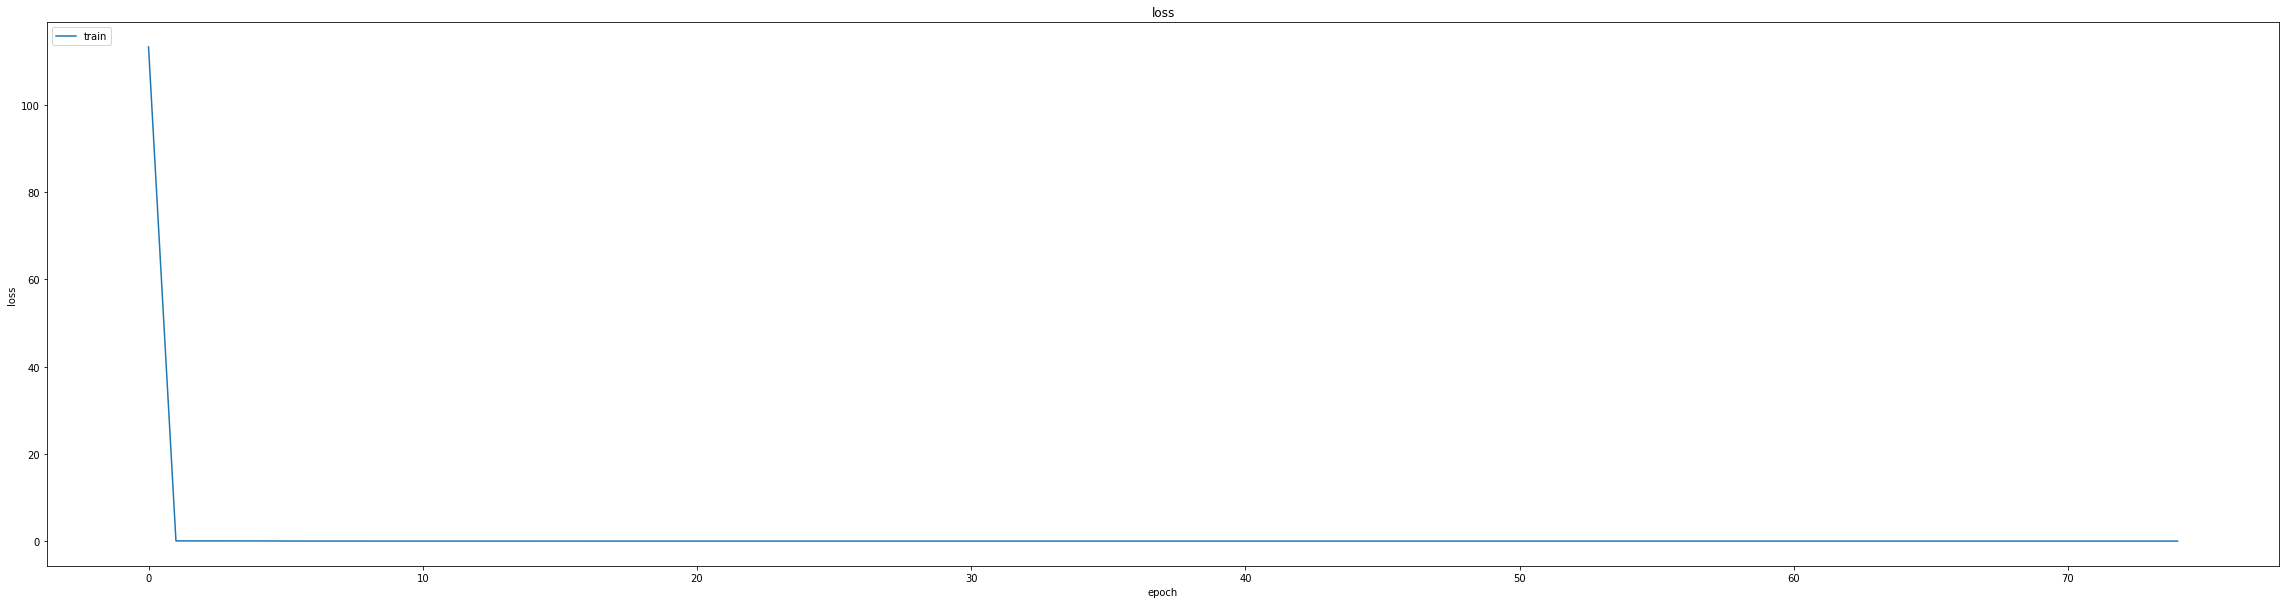

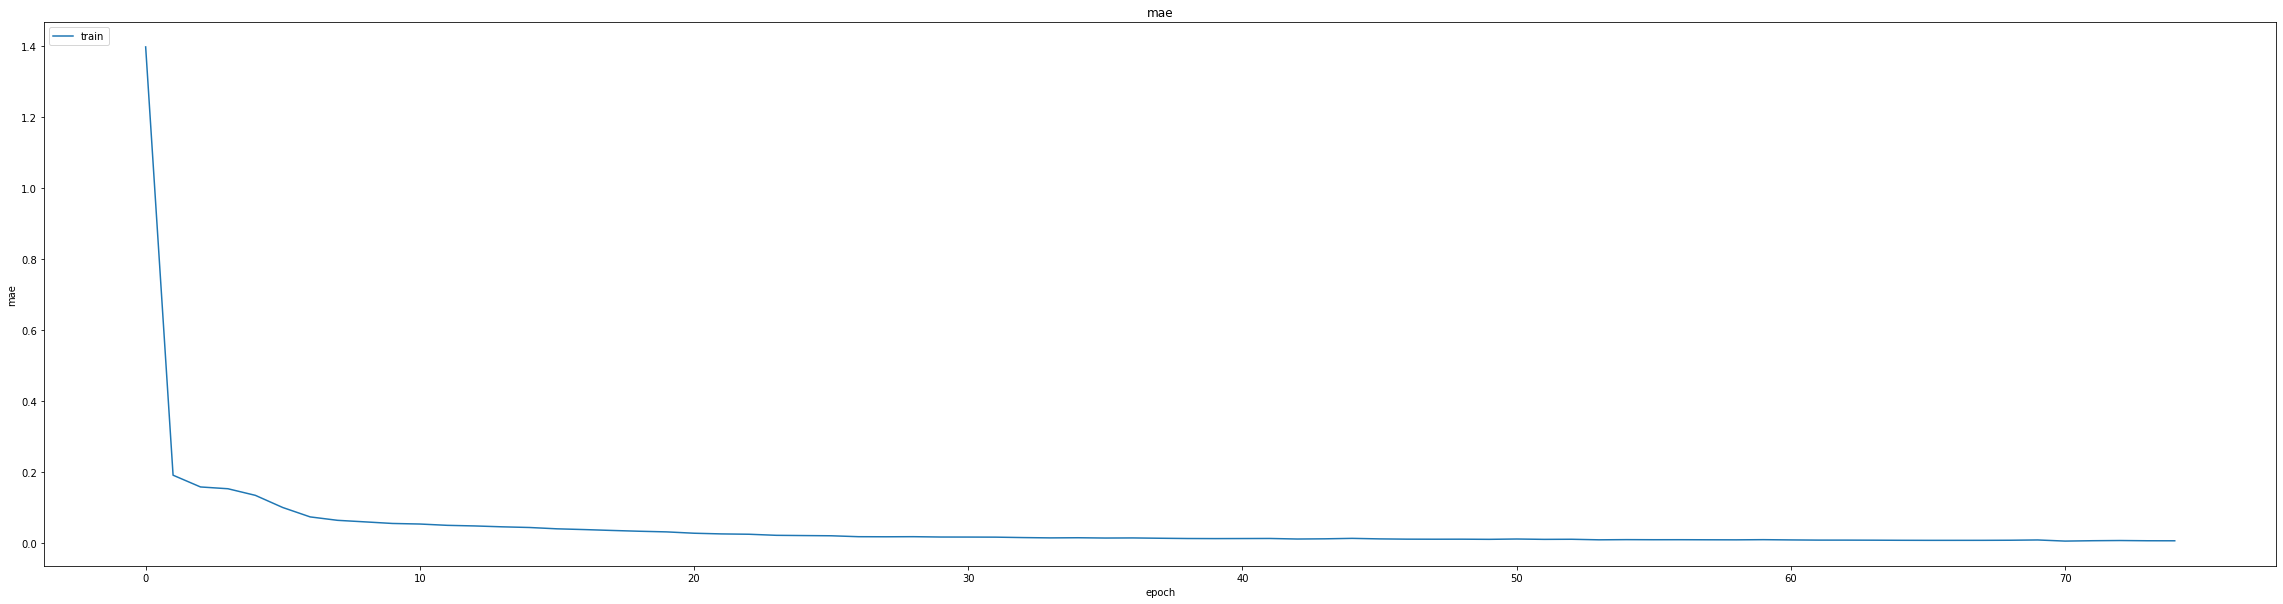

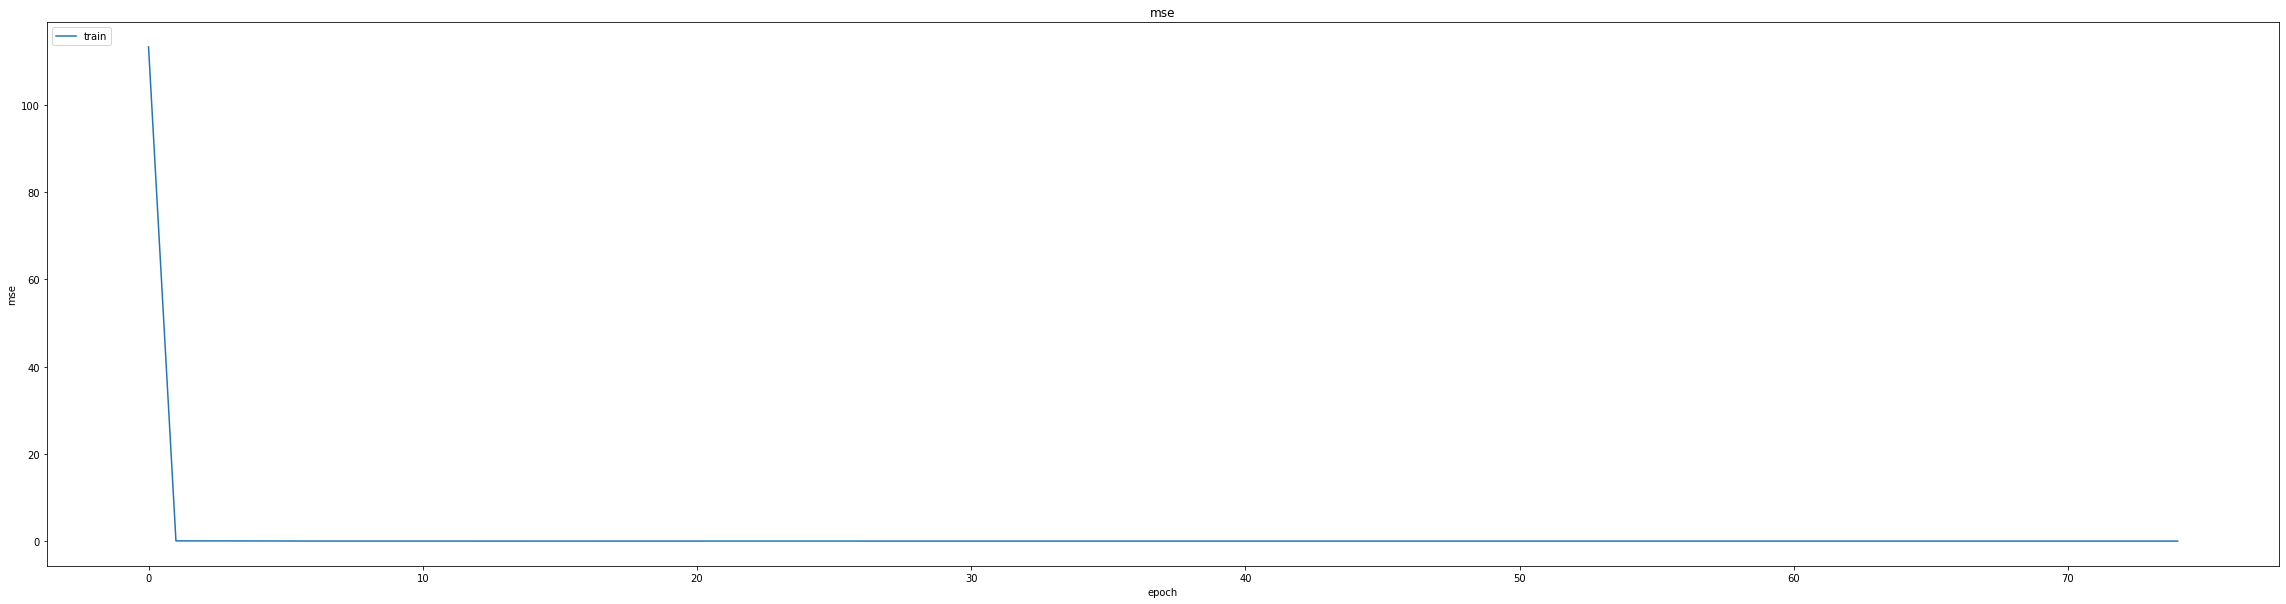

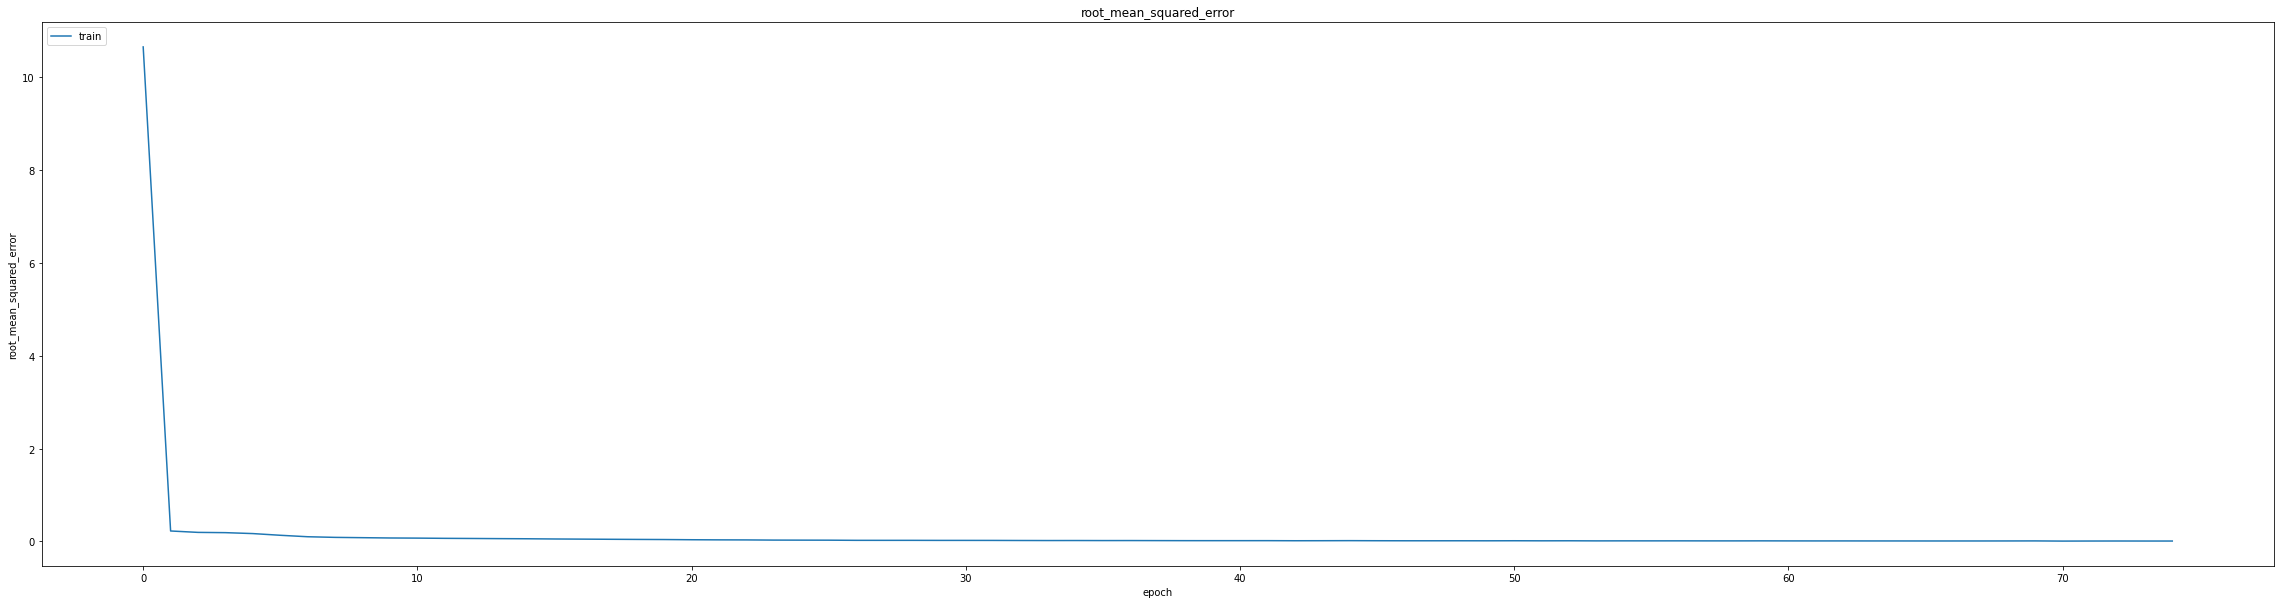

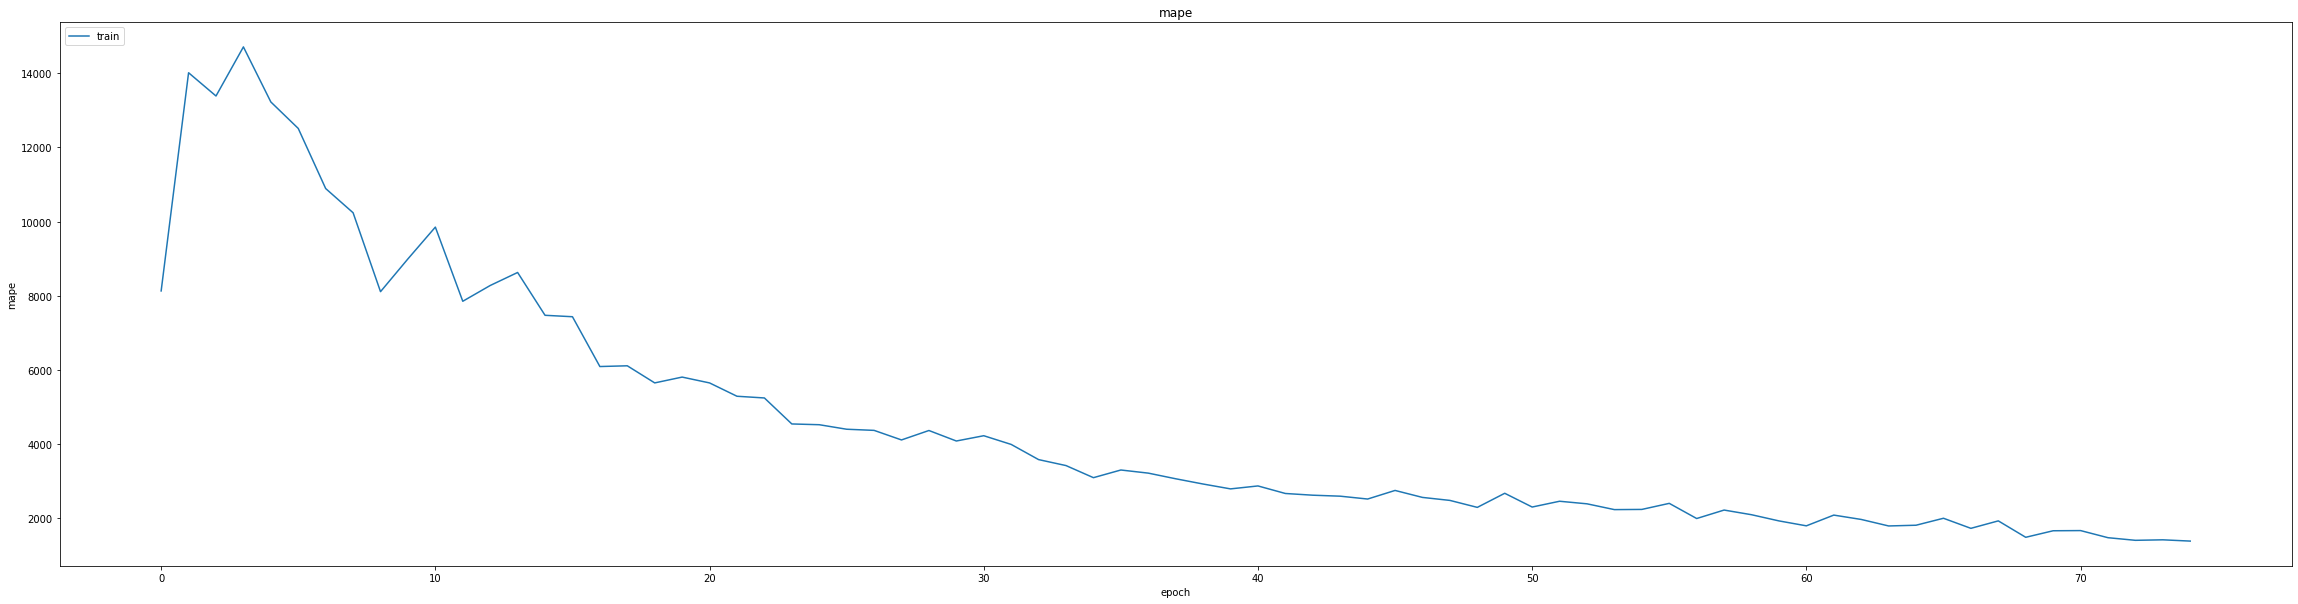

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009224453940987587
0.012281485833227634
464/464 [==============================] - 3s 4ms/step
0.9916106933903526


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
344/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0142 - mse: 0.0013 - root_mean_squared_error: 0.0363 - mape: 2048.3127
Epoch 1: val_mse did not improve from 0.00015
348/348 [==============================] - 9s 16ms/step - loss: 0.0013 - mae: 0.0141 - mse: 0.0013 - root_mean_squared_error: 0.0361 - mape: 2025.4612 - val_loss: 1.7234e-04 - val_mae: 0.0099 - val_mse: 1.7234e-04 - val_root_mean_squared_error: 0.0131 - val_mape: 4772.5757 - lr: 0.0010
Epoch 2/25
345/348 [============================>.] - ETA: 0s - loss: 3.7124e-05 - mae: 0.0046 - mse: 3.7124e-05 - root_mean_squared_error: 0.0061 - mape: 1573.0592
Epoch 2: val_mse did not improve from 0.00015
348/348 [==============================] - 5s 13ms/step - loss: 3.7106e-05 - mae: 0.0046 - mse: 3.7106e-05 - root_mean_squared_error: 0.0061 - mape: 1560.0316 - val_loss: 1.5695e-04 - val_mae: 0.0094 - val_mse: 1.5695e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 4274.6416 - lr: 0.0010
lr c

348/348 [==============================] - 16s 45ms/step - loss: 3.7802e-05 - mae: 0.0047 - mse: 3.7802e-05 - root_mean_squared_error: 0.0061 - mape: 1416.7098 - val_loss: 1.4956e-04 - val_mae: 0.0092 - val_mse: 1.4956e-04 - val_root_mean_squared_error: 0.0122 - val_mape: 3944.1641 - lr: 9.0000e-04
Epoch 4/25
346/348 [============================>.] - ETA: 0s - loss: 3.3700e-05 - mae: 0.0044 - mse: 3.3700e-05 - root_mean_squared_error: 0.0058 - mape: 1274.2085
Epoch 4: val_mse improved from 0.00015 to 0.00014, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 3.3682e-05 - mae: 0.0044 - mse: 3.3682e-05 - root_mean_squared_error: 0.0058 - mape: 1267.3165 - val_loss: 1.4031e-04 - val_mae: 0.0089 - val_mse: 1.4031e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 3771.9263 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
345/348 [============================>.] - ETA: 0s - loss: 3.0510e-05 - mae: 0.0042 - mse: 3.0510e-05 - root_mean_squared_error: 0.0055 - mape: 1219.0820
Epoch 5: val_mse improved from 0.00014 to 0.00013, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 3.0466e-05 - mae: 0.0042 - mse: 3.0466e-05 - root_mean_squared_error: 0.0055 - mape: 1208.9860 - val_loss: 1.3063e-04 - val_mae: 0.0085 - val_mse: 1.3063e-04 - val_root_mean_squared_error: 0.0114 - val_mape: 3620.9390 - lr: 8.1000e-04
Epoch 6/25
347/348 [============================>.] - ETA: 0s - loss: 3.1028e-05 - mae: 0.0042 - mse: 3.1028e-05 - root_mean_squared_error: 0.0056 - mape: 1252.2616
Epoch 6: val_mse did not improve from 0.00013
348/348 [==============================] - 4s 13ms/step - loss: 3.1003e-05 - mae: 0.0042 - mse: 3.1003e-05 - root_mean_squared_error: 0.0056 - mape: 1249.0854 - val_loss: 1.3701e-04 - val_mae: 0.0087 - val_mse: 1.3701e-04 - val_root_mean_squared_error: 0.0117 - val_mape: 3739.5779 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
346/348 [============================>.] - ETA: 0s - loss: 3.5198e-05 - mae: 0.0046 - mse: 3.5198e-05 - root_mean_squared_error: 0.0059 - mape:

348/348 [==============================] - 15s 44ms/step - loss: 3.5167e-05 - mae: 0.0046 - mse: 3.5167e-05 - root_mean_squared_error: 0.0059 - mape: 1045.8696 - val_loss: 1.2866e-04 - val_mae: 0.0085 - val_mse: 1.2866e-04 - val_root_mean_squared_error: 0.0113 - val_mape: 2962.1738 - lr: 7.2900e-04
Epoch 8/25
344/348 [============================>.] - ETA: 0s - loss: 5.0199e-05 - mae: 0.0056 - mse: 5.0199e-05 - root_mean_squared_error: 0.0071 - mape: 1170.5992
Epoch 8: val_mse did not improve from 0.00013
348/348 [==============================] - 4s 13ms/step - loss: 5.0779e-05 - mae: 0.0056 - mse: 5.0779e-05 - root_mean_squared_error: 0.0071 - mape: 1157.5504 - val_loss: 2.2991e-04 - val_mae: 0.0124 - val_mse: 2.2991e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 3621.5139 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
346/348 [============================>.] - ETA: 0s - loss: 3.9024e-05 - mae: 0.0049 - mse: 3.9024e-05 - root_mean_squared_error: 0.0062 - mape:

348/348 [==============================] - 15s 44ms/step - loss: 2.7284e-05 - mae: 0.0040 - mse: 2.7284e-05 - root_mean_squared_error: 0.0052 - mape: 1137.3711 - val_loss: 1.2843e-04 - val_mae: 0.0085 - val_mse: 1.2843e-04 - val_root_mean_squared_error: 0.0113 - val_mape: 2929.6978 - lr: 4.7830e-04
Epoch 16/25
344/348 [============================>.] - ETA: 0s - loss: 3.2258e-05 - mae: 0.0044 - mse: 3.2258e-05 - root_mean_squared_error: 0.0057 - mape: 879.8484
Epoch 16: val_mse improved from 0.00013 to 0.00011, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 3.2316e-05 - mae: 0.0044 - mse: 3.2316e-05 - root_mean_squared_error: 0.0057 - mape: 870.0387 - val_loss: 1.0707e-04 - val_mae: 0.0078 - val_mse: 1.0707e-04 - val_root_mean_squared_error: 0.0103 - val_mape: 2497.4231 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/25
347/348 [============================>.] - ETA: 0s - loss: 2.4449e-05 - mae: 0.0038 - mse: 2.4449e-05 - root_mean_squared_error: 0.0049 - mape: 1004.2224
Epoch 17: val_mse improved from 0.00011 to 0.00010, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 2.4426e-05 - mae: 0.0038 - mse: 2.4426e-05 - root_mean_squared_error: 0.0049 - mape: 1001.6754 - val_loss: 1.0020e-04 - val_mae: 0.0074 - val_mse: 1.0020e-04 - val_root_mean_squared_error: 0.0100 - val_mape: 2569.9817 - lr: 4.3047e-04
Epoch 18/25
347/348 [============================>.] - ETA: 0s - loss: 2.5413e-05 - mae: 0.0038 - mse: 2.5413e-05 - root_mean_squared_error: 0.0050 - mape: 1124.8601
Epoch 18: val_mse did not improve from 0.00010
348/348 [==============================] - 5s 13ms/step - loss: 2.5472e-05 - mae: 0.0038 - mse: 2.5472e-05 - root_mean_squared_error: 0.0050 - mape: 1122.0079 - val_loss: 1.0786e-04 - val_mae: 0.0078 - val_mse: 1.0786e-04 - val_root_mean_squared_error: 0.0104 - val_mape: 2205.2668 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/25
343/348 [============================>.] - ETA: 0s - loss: 2.7342e-05 - mae: 0.0040 - mse: 2.7342e-05 - root_mean_squared_error: 0.0052 - m

348/348 [==============================] - 15s 44ms/step - loss: 2.3846e-05 - mae: 0.0038 - mse: 2.3846e-05 - root_mean_squared_error: 0.0049 - mape: 747.8542 - val_loss: 9.8939e-05 - val_mae: 0.0076 - val_mse: 9.8939e-05 - val_root_mean_squared_error: 0.0099 - val_mape: 2390.7378 - lr: 3.1381e-04
lr changed to 0.0002824295632308349
Epoch 25/25
346/348 [============================>.] - ETA: 0s - loss: 1.7860e-05 - mae: 0.0032 - mse: 1.7860e-05 - root_mean_squared_error: 0.0042 - mape: 786.8295
Epoch 25: val_mse did not improve from 0.00010
348/348 [==============================] - 5s 13ms/step - loss: 1.7836e-05 - mae: 0.0032 - mse: 1.7836e-05 - root_mean_squared_error: 0.0042 - mape: 782.5738 - val_loss: 1.1410e-04 - val_mae: 0.0082 - val_mse: 1.1410e-04 - val_root_mean_squared_error: 0.0107 - val_mape: 3046.6885 - lr: 2.8243e-04


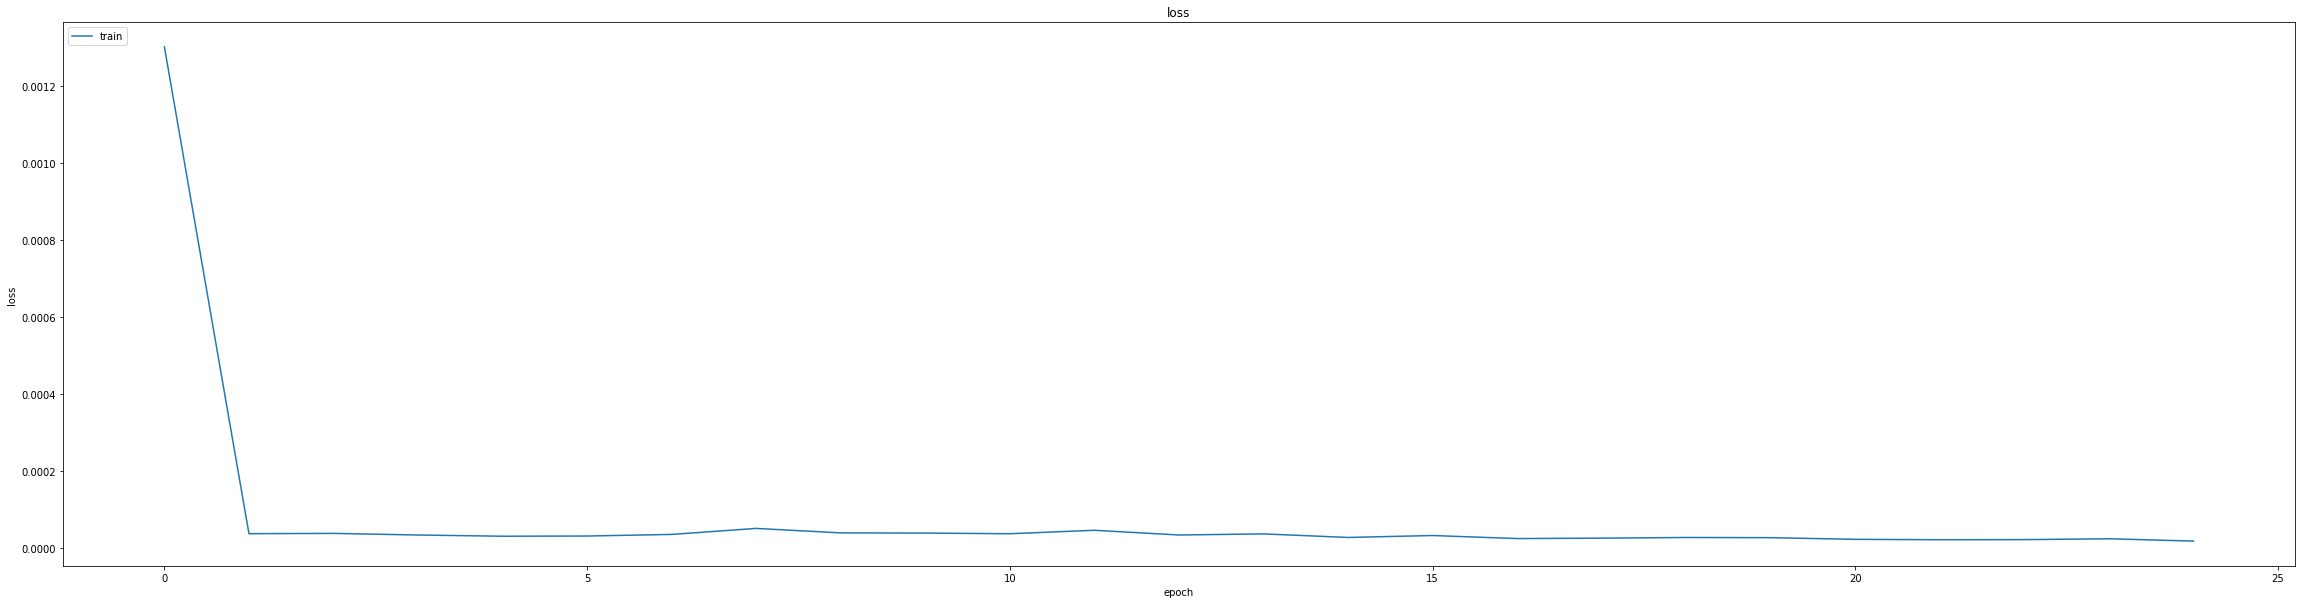

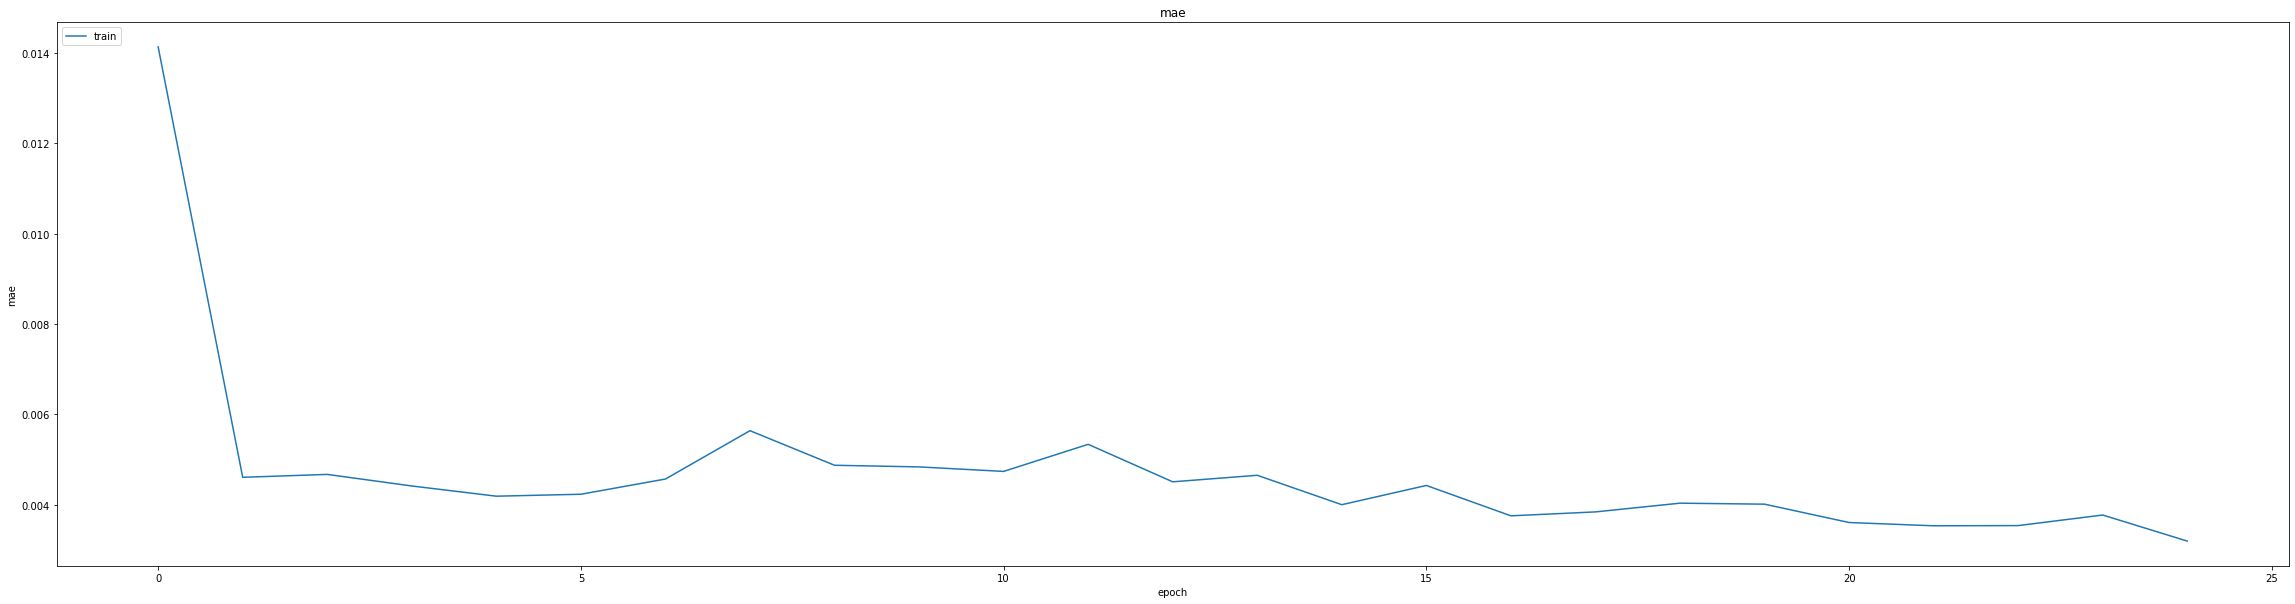

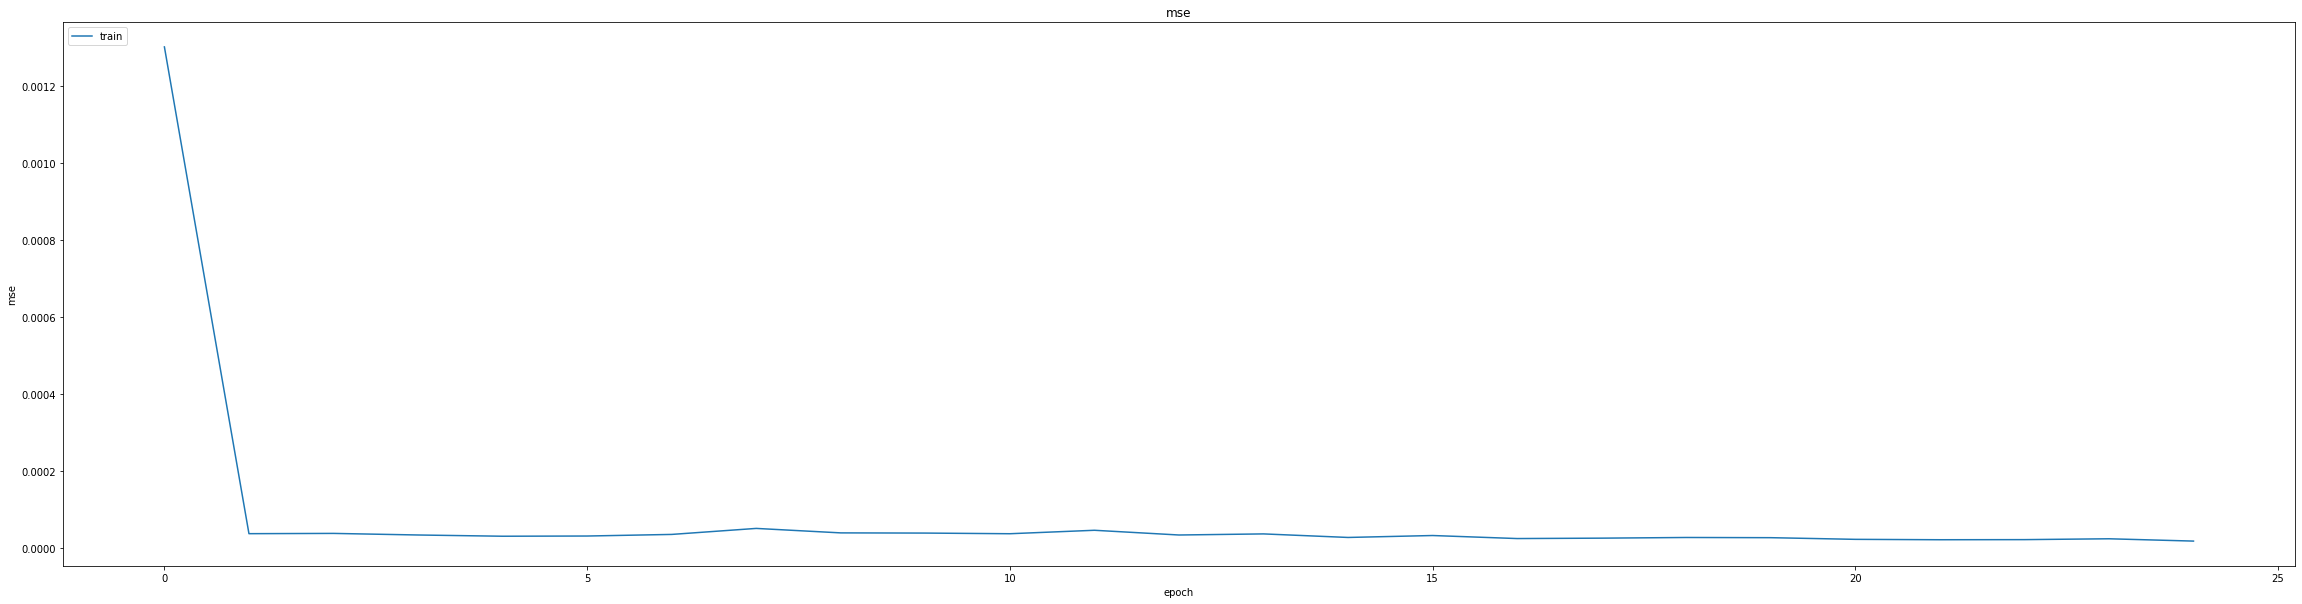

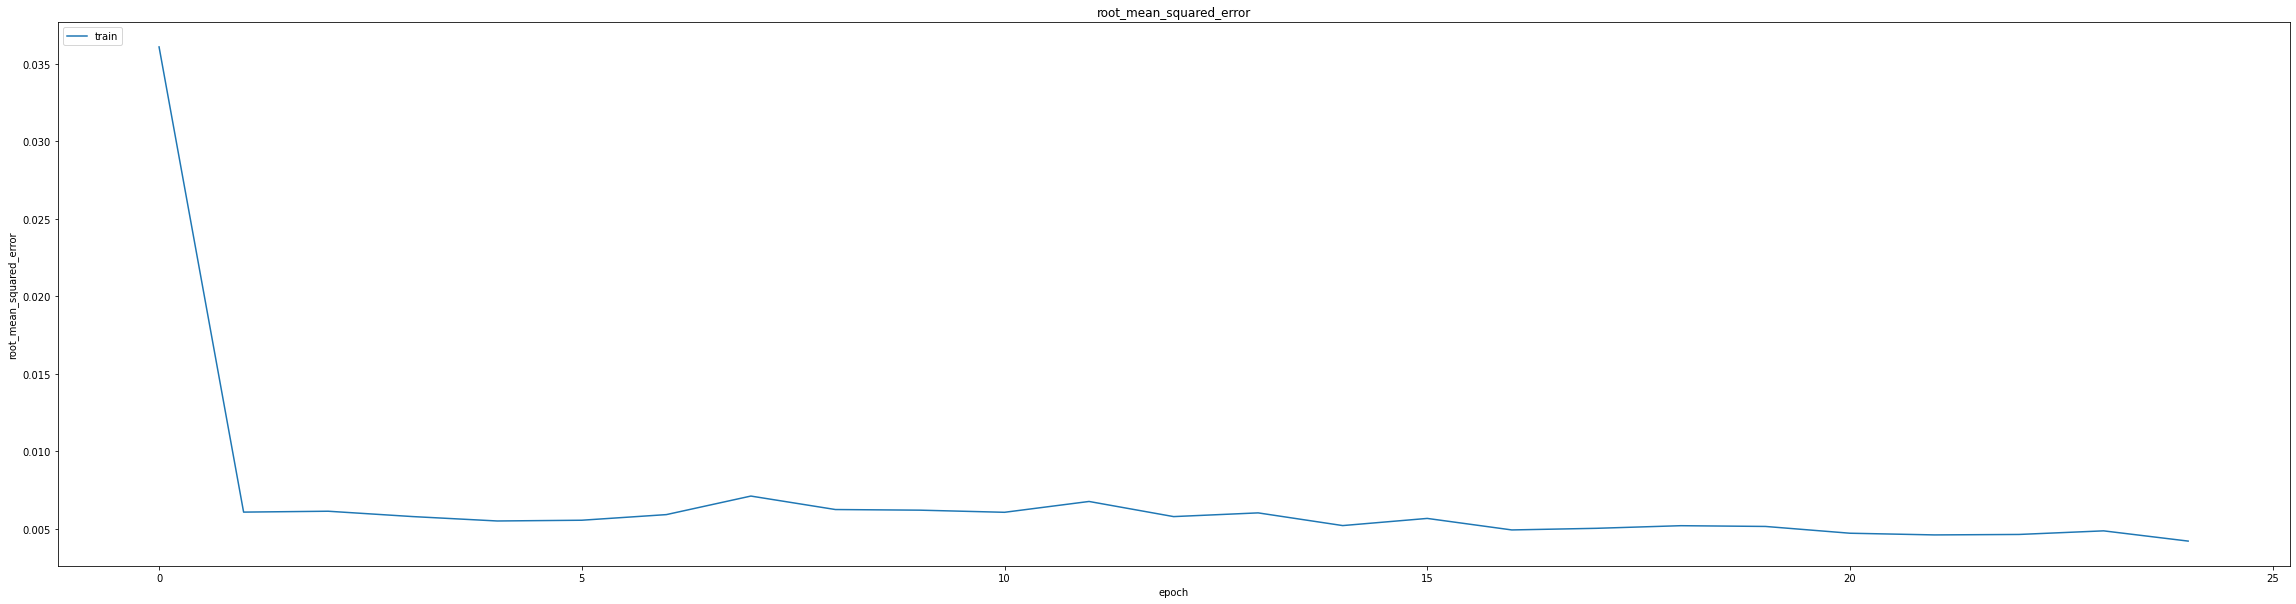

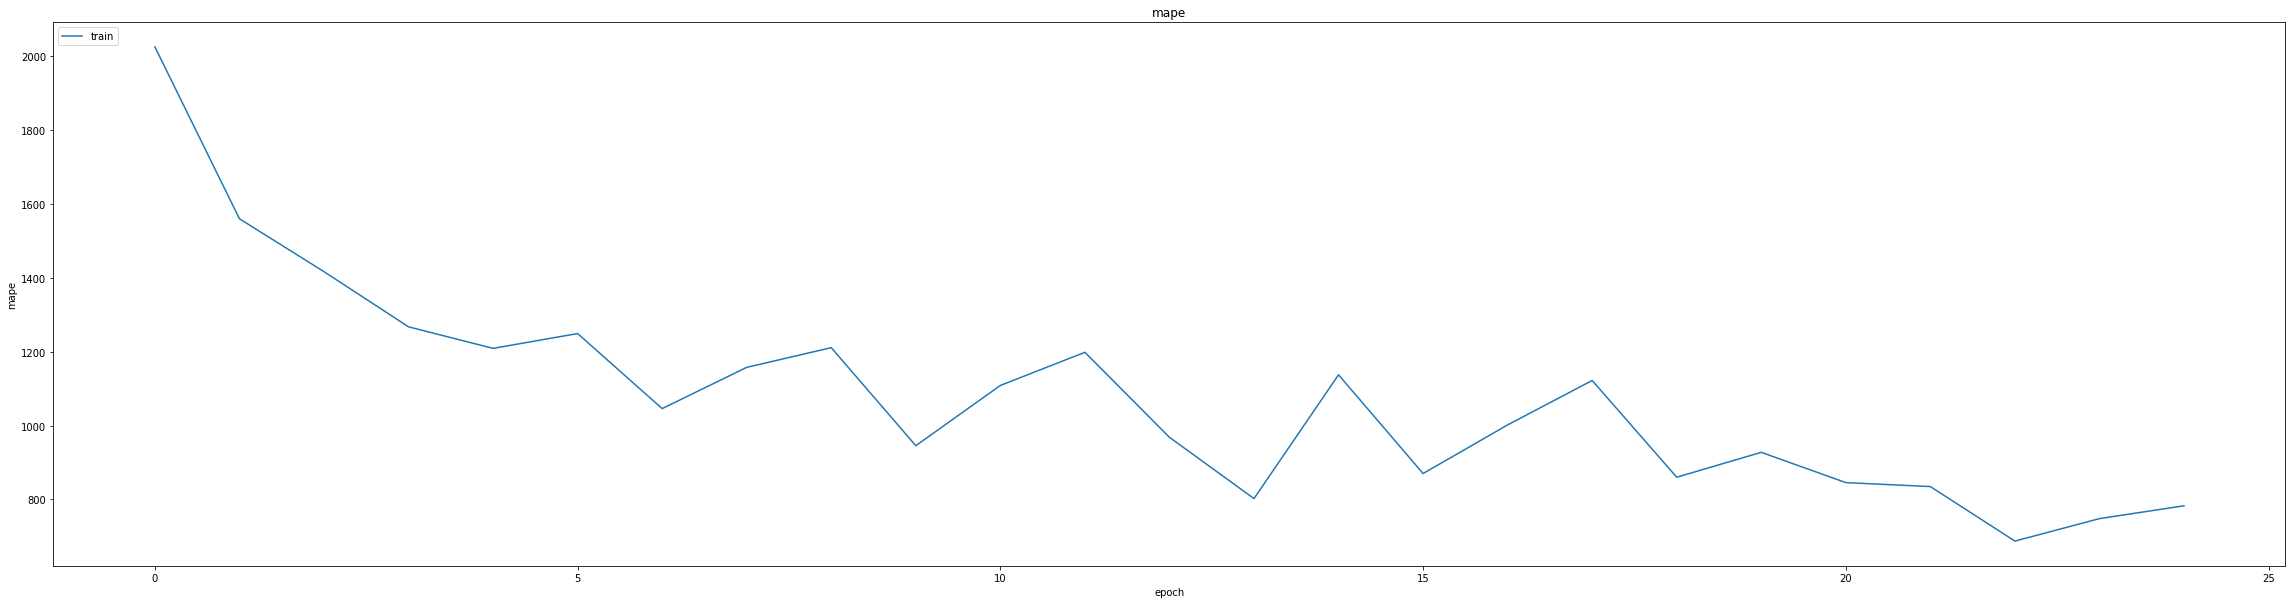

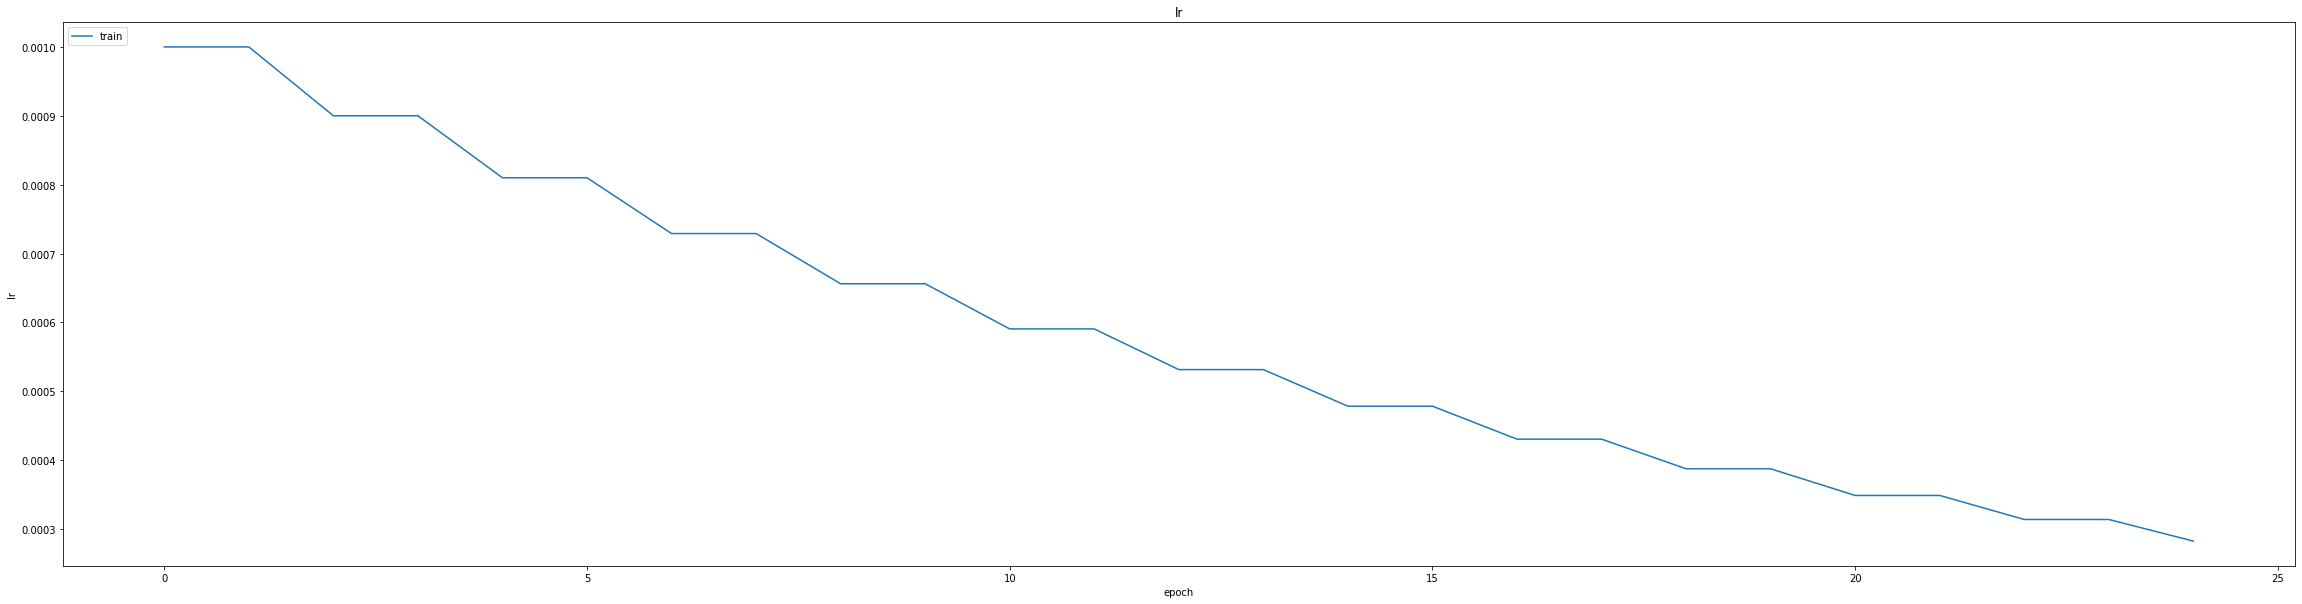

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007378632202744484
0.009946825914084911
464/464 [==============================] - 3s 4ms/step
0.996919501431624


464/464 [==============================] - 2s 4ms/step


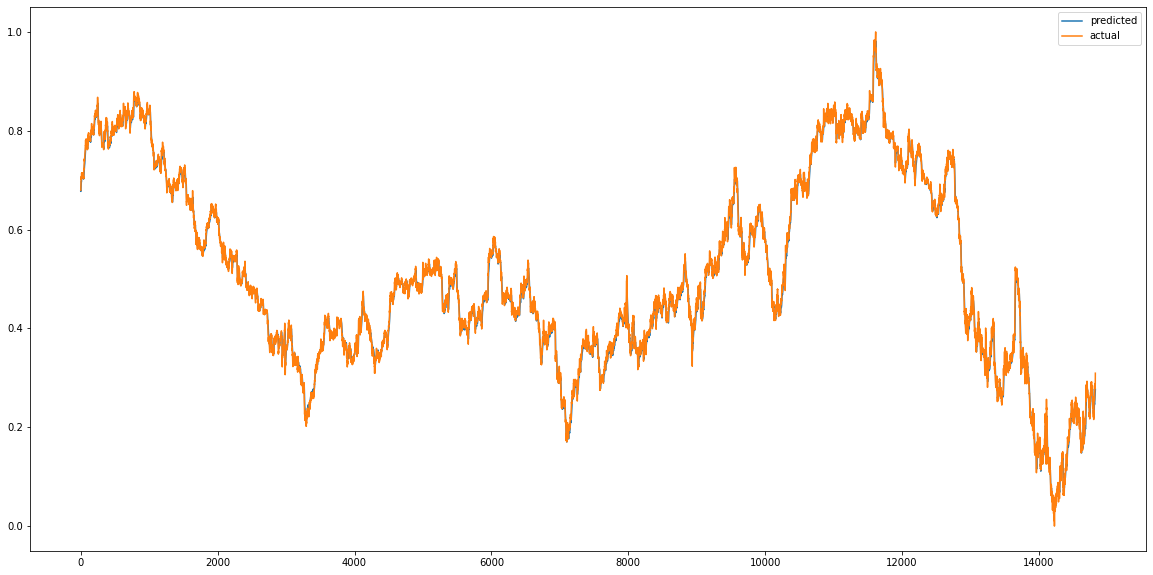

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_GRU_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


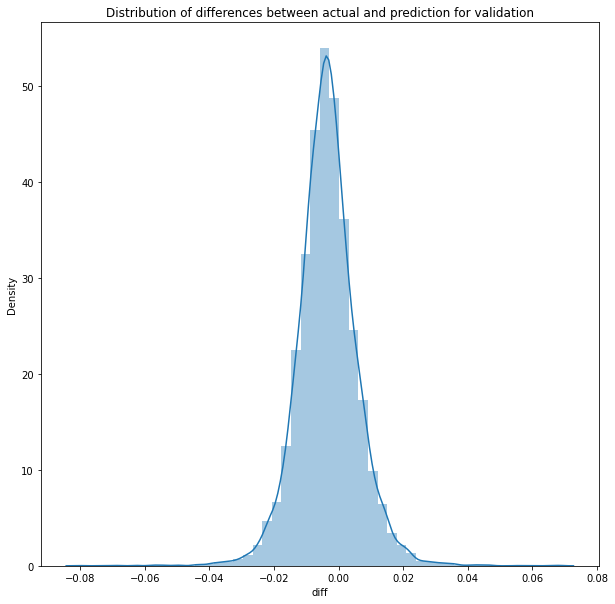

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


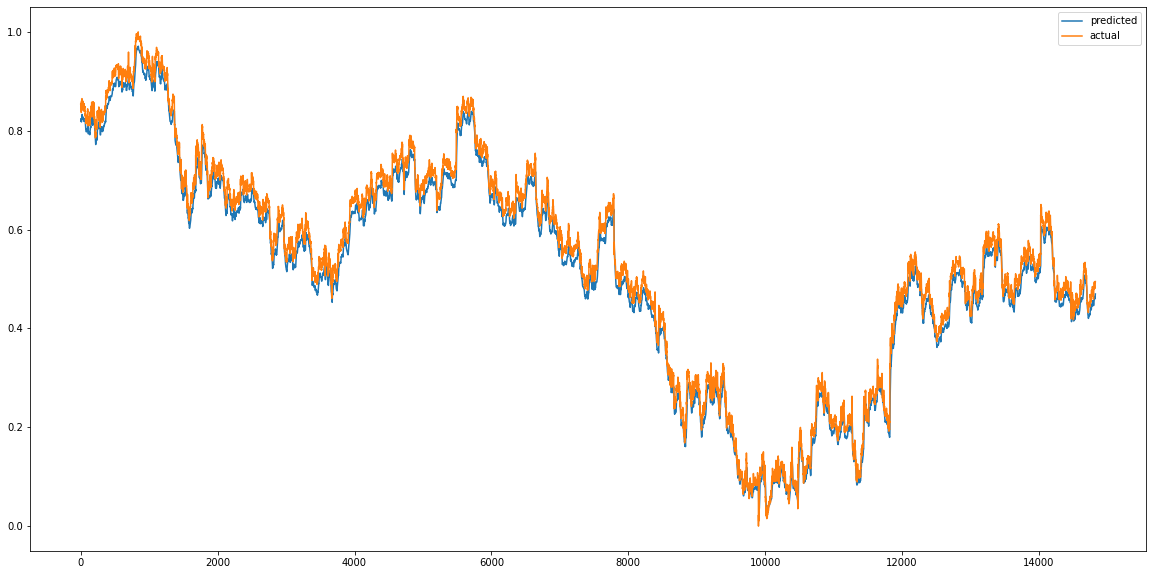

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


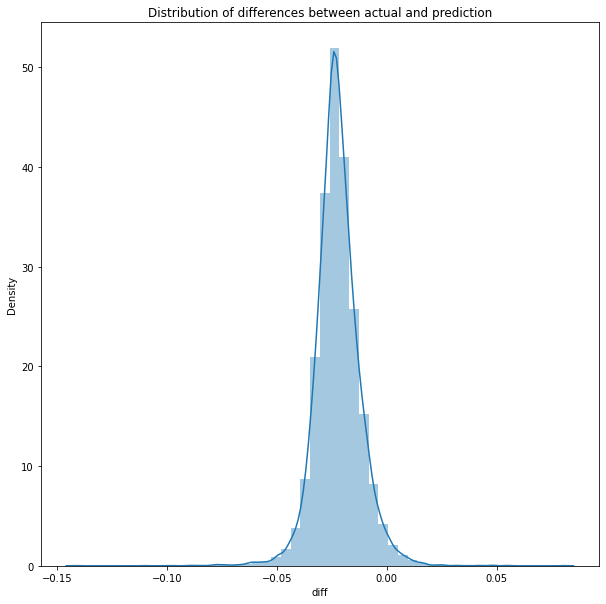

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00060249805543342
RMSE :  0.024545835806372943
MAE :  0.022630777731216217
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.9880524200112282


count    14827.000000
mean        -0.022311
std          0.010233
min         -0.141244
25%         -0.027990
50%         -0.022844
75%         -0.016941
max          0.080361
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          197632    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
348/348 [==============================] - ETA: 0s - loss: 365.7090 - mae: 3.0588 - mse: 365.7090 - root_mean_squared_error: 19.1235 - mape: 20178.0273
Epoch 1: val_mse improved from inf to 0.05928, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 52s 105ms/step - loss: 365.7090 - mae: 3.0588 - mse: 365.7090 - root_mean_squared_error: 19.1235 - mape: 20178.0273 - val_loss: 0.0593 - val_mae: 0.2065 - val_mse: 0.0593 - val_root_mean_squared_error: 0.2435 - val_mape: 46633.9102
Epoch 2/75
348/348 [==============================] - ETA: 0s - loss: 0.0210 - mae: 0.1156 - mse: 0.0210 - root_mean_squared_error: 0.1448 - mape: 10147.4785
Epoch 2: val_mse improved from 0.05928 to 0.01726, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 35s 101ms/step - loss: 0.0210 - mae: 0.1156 - mse: 0.0210 - root_mean_squared_error: 0.1448 - mape: 10147.4785 - val_loss: 0.0173 - val_mae: 0.1085 - val_mse: 0.0173 - val_root_mean_squared_error: 0.1314 - val_mape: 29233.5684
Epoch 3/75
345/348 [============================>.] - ETA: 0s - loss: 0.0096 - mae: 0.0768 - mse: 0.0096 - root_mean_squared_error: 0.0981 - mape: 10160.8682
Epoch 3: val_mse improved from 0.01726 to 0.00866, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 33s 96ms/step - loss: 0.0096 - mae: 0.0766 - mse: 0.0096 - root_mean_squared_error: 0.0979 - mape: 10076.8994 - val_loss: 0.0087 - val_mae: 0.0699 - val_mse: 0.0087 - val_root_mean_squared_error: 0.0931 - val_mape: 26925.0918
Epoch 4/75
347/348 [============================>.] - ETA: 0s - loss: 0.0052 - mae: 0.0515 - mse: 0.0052 - root_mean_squared_error: 0.0719 - mape: 9227.7627
Epoch 4: val_mse improved from 0.00866 to 0.00616, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 32s 91ms/step - loss: 0.0052 - mae: 0.0515 - mse: 0.0052 - root_mean_squared_error: 0.0719 - mape: 9204.3828 - val_loss: 0.0062 - val_mae: 0.0546 - val_mse: 0.0062 - val_root_mean_squared_error: 0.0785 - val_mape: 25359.9844
Epoch 5/75
348/348 [==============================] - ETA: 0s - loss: 0.0036 - mae: 0.0412 - mse: 0.0036 - root_mean_squared_error: 0.0603 - mape: 8747.9229
Epoch 5: val_mse improved from 0.00616 to 0.00517, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 81ms/step - loss: 0.0036 - mae: 0.0412 - mse: 0.0036 - root_mean_squared_error: 0.0603 - mape: 8747.9229 - val_loss: 0.0052 - val_mae: 0.0490 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0719 - val_mape: 24606.2969
Epoch 6/75
345/348 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0371 - mse: 0.0030 - root_mean_squared_error: 0.0547 - mape: 8082.2085
Epoch 6: val_mse improved from 0.00517 to 0.00441, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 0.0030 - mae: 0.0371 - mse: 0.0030 - root_mean_squared_error: 0.0547 - mape: 8015.3164 - val_loss: 0.0044 - val_mae: 0.0444 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0664 - val_mape: 23602.4238
Epoch 7/75
348/348 [==============================] - ETA: 0s - loss: 0.0026 - mae: 0.0347 - mse: 0.0026 - root_mean_squared_error: 0.0511 - mape: 8125.2515
Epoch 7: val_mse improved from 0.00441 to 0.00389, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 87ms/step - loss: 0.0026 - mae: 0.0347 - mse: 0.0026 - root_mean_squared_error: 0.0511 - mape: 8125.2515 - val_loss: 0.0039 - val_mae: 0.0413 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0623 - val_mape: 22867.8242
Epoch 8/75
346/348 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0330 - mse: 0.0024 - root_mean_squared_error: 0.0486 - mape: 8081.9644
Epoch 8: val_mse improved from 0.00389 to 0.00340, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 84ms/step - loss: 0.0024 - mae: 0.0329 - mse: 0.0024 - root_mean_squared_error: 0.0486 - mape: 8038.2607 - val_loss: 0.0034 - val_mae: 0.0374 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0583 - val_mape: 22167.3809
Epoch 9/75
348/348 [==============================] - ETA: 0s - loss: 0.0022 - mae: 0.0319 - mse: 0.0022 - root_mean_squared_error: 0.0468 - mape: 7431.8965
Epoch 9: val_mse improved from 0.00340 to 0.00317, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 0.0022 - mae: 0.0319 - mse: 0.0022 - root_mean_squared_error: 0.0468 - mape: 7431.8965 - val_loss: 0.0032 - val_mae: 0.0370 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0563 - val_mape: 21381.2461
Epoch 10/75
346/348 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0307 - mse: 0.0020 - root_mean_squared_error: 0.0449 - mape: 7332.1611
Epoch 10: val_mse improved from 0.00317 to 0.00296, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 0.0020 - mae: 0.0307 - mse: 0.0020 - root_mean_squared_error: 0.0449 - mape: 7292.5347 - val_loss: 0.0030 - val_mae: 0.0362 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0544 - val_mape: 20989.4727
Epoch 11/75
347/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0297 - mse: 0.0019 - root_mean_squared_error: 0.0433 - mape: 7861.6543
Epoch 11: val_mse improved from 0.00296 to 0.00284, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 0.0019 - mae: 0.0297 - mse: 0.0019 - root_mean_squared_error: 0.0433 - mape: 7841.7217 - val_loss: 0.0028 - val_mae: 0.0364 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0533 - val_mape: 20393.6582
Epoch 12/75
348/348 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0285 - mse: 0.0017 - root_mean_squared_error: 0.0416 - mape: 7318.0371
Epoch 12: val_mse improved from 0.00284 to 0.00269, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 82ms/step - loss: 0.0017 - mae: 0.0285 - mse: 0.0017 - root_mean_squared_error: 0.0416 - mape: 7318.0371 - val_loss: 0.0027 - val_mae: 0.0363 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0518 - val_mape: 19870.9023
Epoch 13/75
346/348 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0277 - mse: 0.0016 - root_mean_squared_error: 0.0401 - mape: 6998.1992
Epoch 13: val_mse improved from 0.00269 to 0.00253, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 86ms/step - loss: 0.0016 - mae: 0.0277 - mse: 0.0016 - root_mean_squared_error: 0.0401 - mape: 6960.3569 - val_loss: 0.0025 - val_mae: 0.0362 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0503 - val_mape: 19332.9277
Epoch 14/75
346/348 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0270 - mse: 0.0015 - root_mean_squared_error: 0.0388 - mape: 6621.9717
Epoch 14: val_mse improved from 0.00253 to 0.00233, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 84ms/step - loss: 0.0015 - mae: 0.0270 - mse: 0.0015 - root_mean_squared_error: 0.0388 - mape: 6586.1660 - val_loss: 0.0023 - val_mae: 0.0351 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0483 - val_mape: 18747.7930
Epoch 15/75
348/348 [==============================] - ETA: 0s - loss: 0.0014 - mae: 0.0263 - mse: 0.0014 - root_mean_squared_error: 0.0375 - mape: 6239.6782
Epoch 15: val_mse improved from 0.00233 to 0.00215, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 82ms/step - loss: 0.0014 - mae: 0.0263 - mse: 0.0014 - root_mean_squared_error: 0.0375 - mape: 6239.6782 - val_loss: 0.0021 - val_mae: 0.0337 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0464 - val_mape: 18243.8691
Epoch 16/75
345/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0257 - mse: 0.0013 - root_mean_squared_error: 0.0364 - mape: 6608.6694
Epoch 16: val_mse improved from 0.00215 to 0.00199, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 82ms/step - loss: 0.0013 - mae: 0.0257 - mse: 0.0013 - root_mean_squared_error: 0.0364 - mape: 6553.9634 - val_loss: 0.0020 - val_mae: 0.0328 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0447 - val_mape: 17704.4629
Epoch 17/75
348/348 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0251 - mse: 0.0012 - root_mean_squared_error: 0.0351 - mape: 6275.9165
Epoch 17: val_mse improved from 0.00199 to 0.00168, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 82ms/step - loss: 0.0012 - mae: 0.0251 - mse: 0.0012 - root_mean_squared_error: 0.0351 - mape: 6275.9165 - val_loss: 0.0017 - val_mae: 0.0287 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0409 - val_mape: 17116.8066
Epoch 18/75
348/348 [==============================] - ETA: 0s - loss: 0.0012 - mae: 0.0243 - mse: 0.0012 - root_mean_squared_error: 0.0339 - mape: 5940.5444
Epoch 18: val_mse improved from 0.00168 to 0.00141, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 0.0012 - mae: 0.0243 - mse: 0.0012 - root_mean_squared_error: 0.0339 - mape: 5940.5444 - val_loss: 0.0014 - val_mae: 0.0254 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0375 - val_mape: 16566.1133
Epoch 19/75
348/348 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0235 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 5818.1343
Epoch 19: val_mse improved from 0.00141 to 0.00119, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 85ms/step - loss: 0.0011 - mae: 0.0235 - mse: 0.0011 - root_mean_squared_error: 0.0326 - mape: 5818.1343 - val_loss: 0.0012 - val_mae: 0.0224 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0345 - val_mape: 16070.7246
Epoch 20/75
346/348 [============================>.] - ETA: 0s - loss: 9.9637e-04 - mae: 0.0229 - mse: 9.9637e-04 - root_mean_squared_error: 0.0316 - mape: 5471.1318
Epoch 20: val_mse improved from 0.00119 to 0.00111, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 9.9561e-04 - mae: 0.0229 - mse: 9.9561e-04 - root_mean_squared_error: 0.0316 - mape: 5441.5405 - val_loss: 0.0011 - val_mae: 0.0221 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0333 - val_mape: 15519.9512
Epoch 21/75
346/348 [============================>.] - ETA: 0s - loss: 9.1638e-04 - mae: 0.0220 - mse: 9.1638e-04 - root_mean_squared_error: 0.0303 - mape: 5666.0078
Epoch 21: val_mse improved from 0.00111 to 0.00097, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 82ms/step - loss: 9.1676e-04 - mae: 0.0220 - mse: 9.1676e-04 - root_mean_squared_error: 0.0303 - mape: 5635.3716 - val_loss: 9.6701e-04 - val_mae: 0.0202 - val_mse: 9.6701e-04 - val_root_mean_squared_error: 0.0311 - val_mape: 15086.7480
Epoch 22/75
346/348 [============================>.] - ETA: 0s - loss: 8.5695e-04 - mae: 0.0214 - mse: 8.5695e-04 - root_mean_squared_error: 0.0293 - mape: 5124.9263
Epoch 22: val_mse improved from 0.00097 to 0.00084, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 82ms/step - loss: 8.5672e-04 - mae: 0.0214 - mse: 8.5672e-04 - root_mean_squared_error: 0.0293 - mape: 5097.2139 - val_loss: 8.4010e-04 - val_mae: 0.0184 - val_mse: 8.4010e-04 - val_root_mean_squared_error: 0.0290 - val_mape: 14624.2881
Epoch 23/75
346/348 [============================>.] - ETA: 0s - loss: 7.7543e-04 - mae: 0.0204 - mse: 7.7543e-04 - root_mean_squared_error: 0.0278 - mape: 5292.1621
Epoch 23: val_mse improved from 0.00084 to 0.00080, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 7.7592e-04 - mae: 0.0204 - mse: 7.7592e-04 - root_mean_squared_error: 0.0279 - mape: 5263.5498 - val_loss: 7.9518e-04 - val_mae: 0.0184 - val_mse: 7.9518e-04 - val_root_mean_squared_error: 0.0282 - val_mape: 14214.3193
Epoch 24/75
347/348 [============================>.] - ETA: 0s - loss: 7.0962e-04 - mae: 0.0196 - mse: 7.0962e-04 - root_mean_squared_error: 0.0266 - mape: 5078.5005
Epoch 24: val_mse improved from 0.00080 to 0.00071, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 82ms/step - loss: 7.1015e-04 - mae: 0.0196 - mse: 7.1015e-04 - root_mean_squared_error: 0.0266 - mape: 5065.6260 - val_loss: 7.1080e-04 - val_mae: 0.0174 - val_mse: 7.1080e-04 - val_root_mean_squared_error: 0.0267 - val_mape: 13685.7578
Epoch 25/75
347/348 [============================>.] - ETA: 0s - loss: 6.4461e-04 - mae: 0.0188 - mse: 6.4461e-04 - root_mean_squared_error: 0.0254 - mape: 4707.0874
Epoch 25: val_mse improved from 0.00071 to 0.00065, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 85ms/step - loss: 6.4428e-04 - mae: 0.0188 - mse: 6.4428e-04 - root_mean_squared_error: 0.0254 - mape: 4695.1499 - val_loss: 6.4949e-04 - val_mae: 0.0167 - val_mse: 6.4949e-04 - val_root_mean_squared_error: 0.0255 - val_mape: 13277.5654
Epoch 26/75
347/348 [============================>.] - ETA: 0s - loss: 5.8665e-04 - mae: 0.0179 - mse: 5.8665e-04 - root_mean_squared_error: 0.0242 - mape: 4475.1147
Epoch 26: val_mse improved from 0.00065 to 0.00058, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 5.8663e-04 - mae: 0.0179 - mse: 5.8663e-04 - root_mean_squared_error: 0.0242 - mape: 4463.7656 - val_loss: 5.8170e-04 - val_mae: 0.0155 - val_mse: 5.8170e-04 - val_root_mean_squared_error: 0.0241 - val_mape: 12920.7637
Epoch 27/75
347/348 [============================>.] - ETA: 0s - loss: 5.2984e-04 - mae: 0.0170 - mse: 5.2984e-04 - root_mean_squared_error: 0.0230 - mape: 4603.8452
Epoch 27: val_mse improved from 0.00058 to 0.00058, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 81ms/step - loss: 5.2972e-04 - mae: 0.0170 - mse: 5.2972e-04 - root_mean_squared_error: 0.0230 - mape: 4592.1709 - val_loss: 5.8014e-04 - val_mae: 0.0161 - val_mse: 5.8014e-04 - val_root_mean_squared_error: 0.0241 - val_mape: 12580.8643
Epoch 28/75
348/348 [==============================] - ETA: 0s - loss: 4.7167e-04 - mae: 0.0161 - mse: 4.7167e-04 - root_mean_squared_error: 0.0217 - mape: 4566.4897
Epoch 28: val_mse improved from 0.00058 to 0.00055, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 4.7167e-04 - mae: 0.0161 - mse: 4.7167e-04 - root_mean_squared_error: 0.0217 - mape: 4566.4897 - val_loss: 5.4888e-04 - val_mae: 0.0157 - val_mse: 5.4888e-04 - val_root_mean_squared_error: 0.0234 - val_mape: 12290.6943
Epoch 29/75
347/348 [============================>.] - ETA: 0s - loss: 4.1650e-04 - mae: 0.0151 - mse: 4.1650e-04 - root_mean_squared_error: 0.0204 - mape: 4344.2261
Epoch 29: val_mse improved from 0.00055 to 0.00052, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 82ms/step - loss: 4.1689e-04 - mae: 0.0151 - mse: 4.1689e-04 - root_mean_squared_error: 0.0204 - mape: 4333.2134 - val_loss: 5.2143e-04 - val_mae: 0.0156 - val_mse: 5.2143e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 11821.6172
Epoch 30/75
347/348 [============================>.] - ETA: 0s - loss: 3.7673e-04 - mae: 0.0145 - mse: 3.7673e-04 - root_mean_squared_error: 0.0194 - mape: 3956.5000
Epoch 30: val_mse improved from 0.00052 to 0.00047, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 3.7664e-04 - mae: 0.0145 - mse: 3.7664e-04 - root_mean_squared_error: 0.0194 - mape: 3946.4668 - val_loss: 4.6627e-04 - val_mae: 0.0147 - val_mse: 4.6627e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 11395.2178
Epoch 31/75
345/348 [============================>.] - ETA: 0s - loss: 3.3250e-04 - mae: 0.0136 - mse: 3.3250e-04 - root_mean_squared_error: 0.0182 - mape: 3906.6714
Epoch 31: val_mse improved from 0.00047 to 0.00045, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 81ms/step - loss: 3.3267e-04 - mae: 0.0136 - mse: 3.3267e-04 - root_mean_squared_error: 0.0182 - mape: 3874.3237 - val_loss: 4.5216e-04 - val_mae: 0.0148 - val_mse: 4.5216e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 10967.4873
Epoch 32/75
346/348 [============================>.] - ETA: 0s - loss: 2.9576e-04 - mae: 0.0129 - mse: 2.9576e-04 - root_mean_squared_error: 0.0172 - mape: 3761.3232
Epoch 32: val_mse improved from 0.00045 to 0.00041, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 86ms/step - loss: 2.9577e-04 - mae: 0.0129 - mse: 2.9577e-04 - root_mean_squared_error: 0.0172 - mape: 3740.9814 - val_loss: 4.1050e-04 - val_mae: 0.0141 - val_mse: 4.1050e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 10529.9902
Epoch 33/75
347/348 [============================>.] - ETA: 0s - loss: 2.6443e-04 - mae: 0.0123 - mse: 2.6443e-04 - root_mean_squared_error: 0.0163 - mape: 3469.6348
Epoch 33: val_mse improved from 0.00041 to 0.00039, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 82ms/step - loss: 2.6442e-04 - mae: 0.0123 - mse: 2.6442e-04 - root_mean_squared_error: 0.0163 - mape: 3460.8347 - val_loss: 3.8817e-04 - val_mae: 0.0139 - val_mse: 3.8817e-04 - val_root_mean_squared_error: 0.0197 - val_mape: 10107.0029
Epoch 34/75
347/348 [============================>.] - ETA: 0s - loss: 2.3635e-04 - mae: 0.0115 - mse: 2.3635e-04 - root_mean_squared_error: 0.0154 - mape: 3599.5454
Epoch 34: val_mse improved from 0.00039 to 0.00036, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 82ms/step - loss: 2.3616e-04 - mae: 0.0115 - mse: 2.3616e-04 - root_mean_squared_error: 0.0154 - mape: 3590.4148 - val_loss: 3.6161e-04 - val_mae: 0.0135 - val_mse: 3.6161e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 9689.4658
Epoch 35/75
345/348 [============================>.] - ETA: 0s - loss: 2.0796e-04 - mae: 0.0109 - mse: 2.0796e-04 - root_mean_squared_error: 0.0144 - mape: 3477.5029
Epoch 35: val_mse improved from 0.00036 to 0.00035, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 81ms/step - loss: 2.0796e-04 - mae: 0.0109 - mse: 2.0796e-04 - root_mean_squared_error: 0.0144 - mape: 3448.7019 - val_loss: 3.4702e-04 - val_mae: 0.0134 - val_mse: 3.4702e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 9337.6768
Epoch 36/75
346/348 [============================>.] - ETA: 0s - loss: 1.8610e-04 - mae: 0.0103 - mse: 1.8610e-04 - root_mean_squared_error: 0.0136 - mape: 3003.0378
Epoch 36: val_mse improved from 0.00035 to 0.00033, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 82ms/step - loss: 1.8593e-04 - mae: 0.0103 - mse: 1.8593e-04 - root_mean_squared_error: 0.0136 - mape: 2986.7954 - val_loss: 3.3081e-04 - val_mae: 0.0131 - val_mse: 3.3081e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 8945.0098
Epoch 37/75
346/348 [============================>.] - ETA: 0s - loss: 1.6564e-04 - mae: 0.0098 - mse: 1.6564e-04 - root_mean_squared_error: 0.0129 - mape: 3091.7378
Epoch 37: val_mse improved from 0.00033 to 0.00031, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 82ms/step - loss: 1.6568e-04 - mae: 0.0098 - mse: 1.6568e-04 - root_mean_squared_error: 0.0129 - mape: 3075.0151 - val_loss: 3.1490e-04 - val_mae: 0.0129 - val_mse: 3.1490e-04 - val_root_mean_squared_error: 0.0177 - val_mape: 8571.0830
Epoch 38/75
346/348 [============================>.] - ETA: 0s - loss: 1.4824e-04 - mae: 0.0093 - mse: 1.4824e-04 - root_mean_squared_error: 0.0122 - mape: 3034.8616
Epoch 38: val_mse improved from 0.00031 to 0.00030, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 32s 91ms/step - loss: 1.4807e-04 - mae: 0.0093 - mse: 1.4807e-04 - root_mean_squared_error: 0.0122 - mape: 3018.4453 - val_loss: 3.0124e-04 - val_mae: 0.0127 - val_mse: 3.0124e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 8223.8633
Epoch 39/75
347/348 [============================>.] - ETA: 0s - loss: 1.3340e-04 - mae: 0.0088 - mse: 1.3340e-04 - root_mean_squared_error: 0.0115 - mape: 2797.8926
Epoch 39: val_mse improved from 0.00030 to 0.00027, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 82ms/step - loss: 1.3335e-04 - mae: 0.0088 - mse: 1.3335e-04 - root_mean_squared_error: 0.0115 - mape: 2790.7961 - val_loss: 2.7338e-04 - val_mae: 0.0121 - val_mse: 2.7338e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 7960.4971
Epoch 40/75
345/348 [============================>.] - ETA: 0s - loss: 1.2361e-04 - mae: 0.0085 - mse: 1.2361e-04 - root_mean_squared_error: 0.0111 - mape: 2695.3926
Epoch 40: val_mse improved from 0.00027 to 0.00026, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 82ms/step - loss: 1.2363e-04 - mae: 0.0085 - mse: 1.2363e-04 - root_mean_squared_error: 0.0111 - mape: 2673.0715 - val_loss: 2.6093e-04 - val_mae: 0.0118 - val_mse: 2.6093e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 7665.6489
Epoch 41/75
346/348 [============================>.] - ETA: 0s - loss: 1.1381e-04 - mae: 0.0081 - mse: 1.1381e-04 - root_mean_squared_error: 0.0107 - mape: 2800.9727
Epoch 41: val_mse improved from 0.00026 to 0.00024, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 1.1378e-04 - mae: 0.0081 - mse: 1.1378e-04 - root_mean_squared_error: 0.0107 - mape: 2785.8220 - val_loss: 2.4491e-04 - val_mae: 0.0115 - val_mse: 2.4491e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 7413.7373
Epoch 42/75
348/348 [==============================] - ETA: 0s - loss: 1.0614e-04 - mae: 0.0079 - mse: 1.0614e-04 - root_mean_squared_error: 0.0103 - mape: 2608.4888
Epoch 42: val_mse improved from 0.00024 to 0.00024, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 1.0614e-04 - mae: 0.0079 - mse: 1.0614e-04 - root_mean_squared_error: 0.0103 - mape: 2608.4888 - val_loss: 2.3513e-04 - val_mae: 0.0113 - val_mse: 2.3513e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 7218.2344
Epoch 43/75
346/348 [============================>.] - ETA: 0s - loss: 9.7839e-05 - mae: 0.0076 - mse: 9.7839e-05 - root_mean_squared_error: 0.0099 - mape: 2496.6389
Epoch 43: val_mse improved from 0.00024 to 0.00023, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 82ms/step - loss: 9.7812e-05 - mae: 0.0076 - mse: 9.7812e-05 - root_mean_squared_error: 0.0099 - mape: 2483.1360 - val_loss: 2.3005e-04 - val_mae: 0.0112 - val_mse: 2.3005e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 7069.3237
Epoch 44/75
345/348 [============================>.] - ETA: 0s - loss: 9.6247e-05 - mae: 0.0075 - mse: 9.6247e-05 - root_mean_squared_error: 0.0098 - mape: 2360.3782
Epoch 44: val_mse improved from 0.00023 to 0.00021, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 30s 85ms/step - loss: 9.6142e-05 - mae: 0.0075 - mse: 9.6142e-05 - root_mean_squared_error: 0.0098 - mape: 2340.8298 - val_loss: 2.0566e-04 - val_mae: 0.0106 - val_mse: 2.0566e-04 - val_root_mean_squared_error: 0.0143 - val_mape: 6855.4321
Epoch 45/75
346/348 [============================>.] - ETA: 0s - loss: 8.5655e-05 - mae: 0.0071 - mse: 8.5655e-05 - root_mean_squared_error: 0.0093 - mape: 2471.4976
Epoch 45: val_mse improved from 0.00021 to 0.00019, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 8.5584e-05 - mae: 0.0071 - mse: 8.5584e-05 - root_mean_squared_error: 0.0093 - mape: 2458.1279 - val_loss: 1.9346e-04 - val_mae: 0.0102 - val_mse: 1.9346e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 6679.5229
Epoch 46/75
347/348 [============================>.] - ETA: 0s - loss: 8.1192e-05 - mae: 0.0069 - mse: 8.1192e-05 - root_mean_squared_error: 0.0090 - mape: 2286.7224
Epoch 46: val_mse improved from 0.00019 to 0.00019, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 82ms/step - loss: 8.1181e-05 - mae: 0.0069 - mse: 8.1181e-05 - root_mean_squared_error: 0.0090 - mape: 2280.9224 - val_loss: 1.8792e-04 - val_mae: 0.0102 - val_mse: 1.8792e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 6520.6777
Epoch 47/75
346/348 [============================>.] - ETA: 0s - loss: 7.2924e-05 - mae: 0.0066 - mse: 7.2924e-05 - root_mean_squared_error: 0.0085 - mape: 2364.4922
Epoch 47: val_mse improved from 0.00019 to 0.00018, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 82ms/step - loss: 7.2833e-05 - mae: 0.0066 - mse: 7.2833e-05 - root_mean_squared_error: 0.0085 - mape: 2351.7009 - val_loss: 1.7589e-04 - val_mae: 0.0097 - val_mse: 1.7589e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 6419.9458
Epoch 48/75
346/348 [============================>.] - ETA: 0s - loss: 7.2678e-05 - mae: 0.0066 - mse: 7.2678e-05 - root_mean_squared_error: 0.0085 - mape: 2213.6816
Epoch 48: val_mse improved from 0.00018 to 0.00017, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 7.2586e-05 - mae: 0.0066 - mse: 7.2586e-05 - root_mean_squared_error: 0.0085 - mape: 2201.7063 - val_loss: 1.7157e-04 - val_mae: 0.0096 - val_mse: 1.7157e-04 - val_root_mean_squared_error: 0.0131 - val_mape: 6312.4165
Epoch 49/75
346/348 [============================>.] - ETA: 0s - loss: 6.4017e-05 - mae: 0.0061 - mse: 6.4017e-05 - root_mean_squared_error: 0.0080 - mape: 2139.5056
Epoch 49: val_mse improved from 0.00017 to 0.00016, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 81ms/step - loss: 6.3973e-05 - mae: 0.0061 - mse: 6.3973e-05 - root_mean_squared_error: 0.0080 - mape: 2127.9316 - val_loss: 1.5739e-04 - val_mae: 0.0091 - val_mse: 1.5739e-04 - val_root_mean_squared_error: 0.0125 - val_mape: 6160.3052
Epoch 50/75
347/348 [============================>.] - ETA: 0s - loss: 6.5463e-05 - mae: 0.0063 - mse: 6.5463e-05 - root_mean_squared_error: 0.0081 - mape: 2238.5354
Epoch 50: val_mse did not improve from 0.00016
348/348 [==============================] - 6s 17ms/step - loss: 6.5440e-05 - mae: 0.0063 - mse: 6.5440e-05 - root_mean_squared_error: 0.0081 - mape: 2232.8574 - val_loss: 1.7805e-04 - val_mae: 0.0101 - val_mse: 1.7805e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 6046.0449
Epoch 51/75
346/348 [============================>.] - ETA: 0s - loss: 6.3286e-05 - mae: 0.0062 - mse: 6.3286e-05 - root_mean_squared_error: 0.0080 - mape: 2104.0486
Epoch 51: val_mse did not improve from 0.00016
348/348 [

348/348 [==============================] - 30s 85ms/step - loss: 6.6556e-05 - mae: 0.0063 - mse: 6.6556e-05 - root_mean_squared_error: 0.0082 - mape: 1951.5798 - val_loss: 1.5093e-04 - val_mae: 0.0091 - val_mse: 1.5093e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 5801.1582
Epoch 54/75
346/348 [============================>.] - ETA: 0s - loss: 7.3783e-05 - mae: 0.0066 - mse: 7.3783e-05 - root_mean_squared_error: 0.0086 - mape: 2032.4978
Epoch 54: val_mse did not improve from 0.00015
348/348 [==============================] - 6s 18ms/step - loss: 7.3580e-05 - mae: 0.0066 - mse: 7.3580e-05 - root_mean_squared_error: 0.0086 - mape: 2021.5022 - val_loss: 2.1761e-04 - val_mae: 0.0117 - val_mse: 2.1761e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 5790.1484
Epoch 55/75
345/348 [============================>.] - ETA: 0s - loss: 6.3841e-05 - mae: 0.0062 - mse: 6.3841e-05 - root_mean_squared_error: 0.0080 - mape: 1986.4259
Epoch 55: val_mse did not improve from 0.00015
348/348 [

348/348 [==============================] - 29s 83ms/step - loss: 6.0192e-05 - mae: 0.0061 - mse: 6.0192e-05 - root_mean_squared_error: 0.0078 - mape: 1867.0522 - val_loss: 1.3891e-04 - val_mae: 0.0087 - val_mse: 1.3891e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 5419.4595
Epoch 58/75
345/348 [============================>.] - ETA: 0s - loss: 6.7468e-05 - mae: 0.0064 - mse: 6.7468e-05 - root_mean_squared_error: 0.0082 - mape: 1820.2810
Epoch 58: val_mse improved from 0.00014 to 0.00013, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 6.7584e-05 - mae: 0.0065 - mse: 6.7584e-05 - root_mean_squared_error: 0.0082 - mape: 1805.2072 - val_loss: 1.2552e-04 - val_mae: 0.0082 - val_mse: 1.2552e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 5459.6855
Epoch 59/75
348/348 [==============================] - ETA: 0s - loss: 6.3380e-05 - mae: 0.0062 - mse: 6.3380e-05 - root_mean_squared_error: 0.0080 - mape: 1790.3159
Epoch 59: val_mse did not improve from 0.00013
348/348 [==============================] - 6s 17ms/step - loss: 6.3380e-05 - mae: 0.0062 - mse: 6.3380e-05 - root_mean_squared_error: 0.0080 - mape: 1790.3159 - val_loss: 1.6049e-04 - val_mae: 0.0097 - val_mse: 1.6049e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 5409.0269
Epoch 60/75
345/348 [============================>.] - ETA: 0s - loss: 7.5391e-05 - mae: 0.0068 - mse: 7.5391e-05 - root_mean_squared_error: 0.0087 - mape: 1904.9760
Epoch 60: val_mse did not improve from 0.00013
348/348 [

348/348 [==============================] - 29s 84ms/step - loss: 5.7189e-05 - mae: 0.0058 - mse: 5.7189e-05 - root_mean_squared_error: 0.0076 - mape: 1421.1182 - val_loss: 1.2188e-04 - val_mae: 0.0083 - val_mse: 1.2188e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 4013.2441
Epoch 73/75
347/348 [============================>.] - ETA: 0s - loss: 6.0425e-05 - mae: 0.0059 - mse: 6.0425e-05 - root_mean_squared_error: 0.0078 - mape: 1810.6838
Epoch 73: val_mse improved from 0.00012 to 0.00010, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 6.0479e-05 - mae: 0.0059 - mse: 6.0479e-05 - root_mean_squared_error: 0.0078 - mape: 1806.0928 - val_loss: 1.0196e-04 - val_mae: 0.0075 - val_mse: 1.0196e-04 - val_root_mean_squared_error: 0.0101 - val_mape: 3749.7222
Epoch 74/75
347/348 [============================>.] - ETA: 0s - loss: 4.9478e-05 - mae: 0.0055 - mse: 4.9478e-05 - root_mean_squared_error: 0.0070 - mape: 1293.7626
Epoch 74: val_mse did not improve from 0.00010
348/348 [==============================] - 6s 18ms/step - loss: 4.9415e-05 - mae: 0.0055 - mse: 4.9415e-05 - root_mean_squared_error: 0.0070 - mape: 1290.4813 - val_loss: 1.3254e-04 - val_mae: 0.0090 - val_mse: 1.3254e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 3608.8027
Epoch 75/75
347/348 [============================>.] - ETA: 0s - loss: 7.0892e-05 - mae: 0.0065 - mse: 7.0892e-05 - root_mean_squared_error: 0.0084 - mape: 1374.7649
Epoch 75: val_mse did not improve from 0.00010
348/348 [

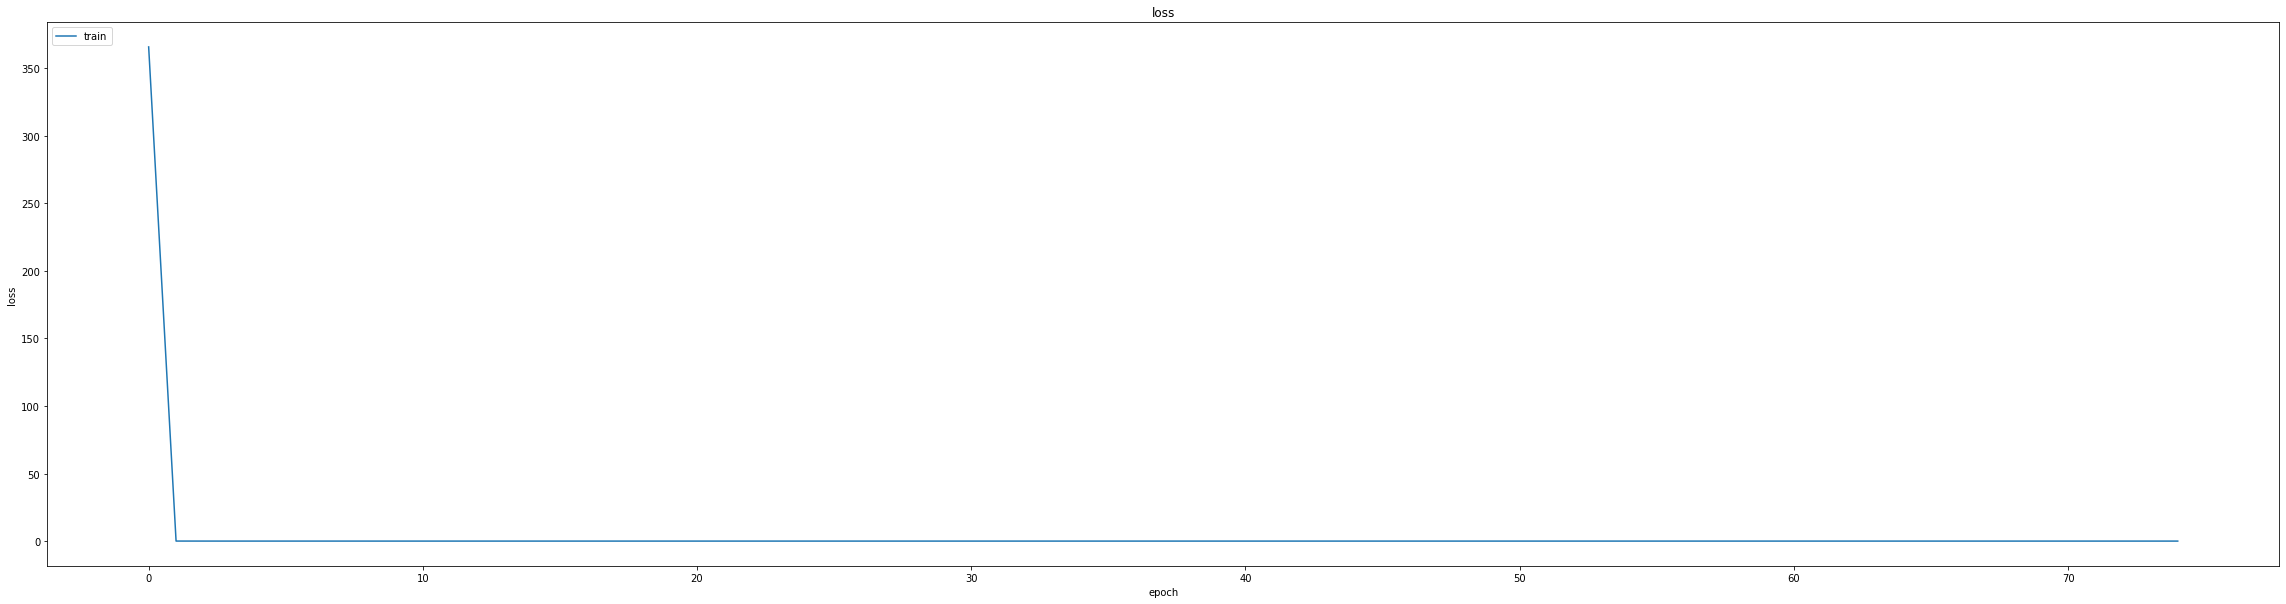

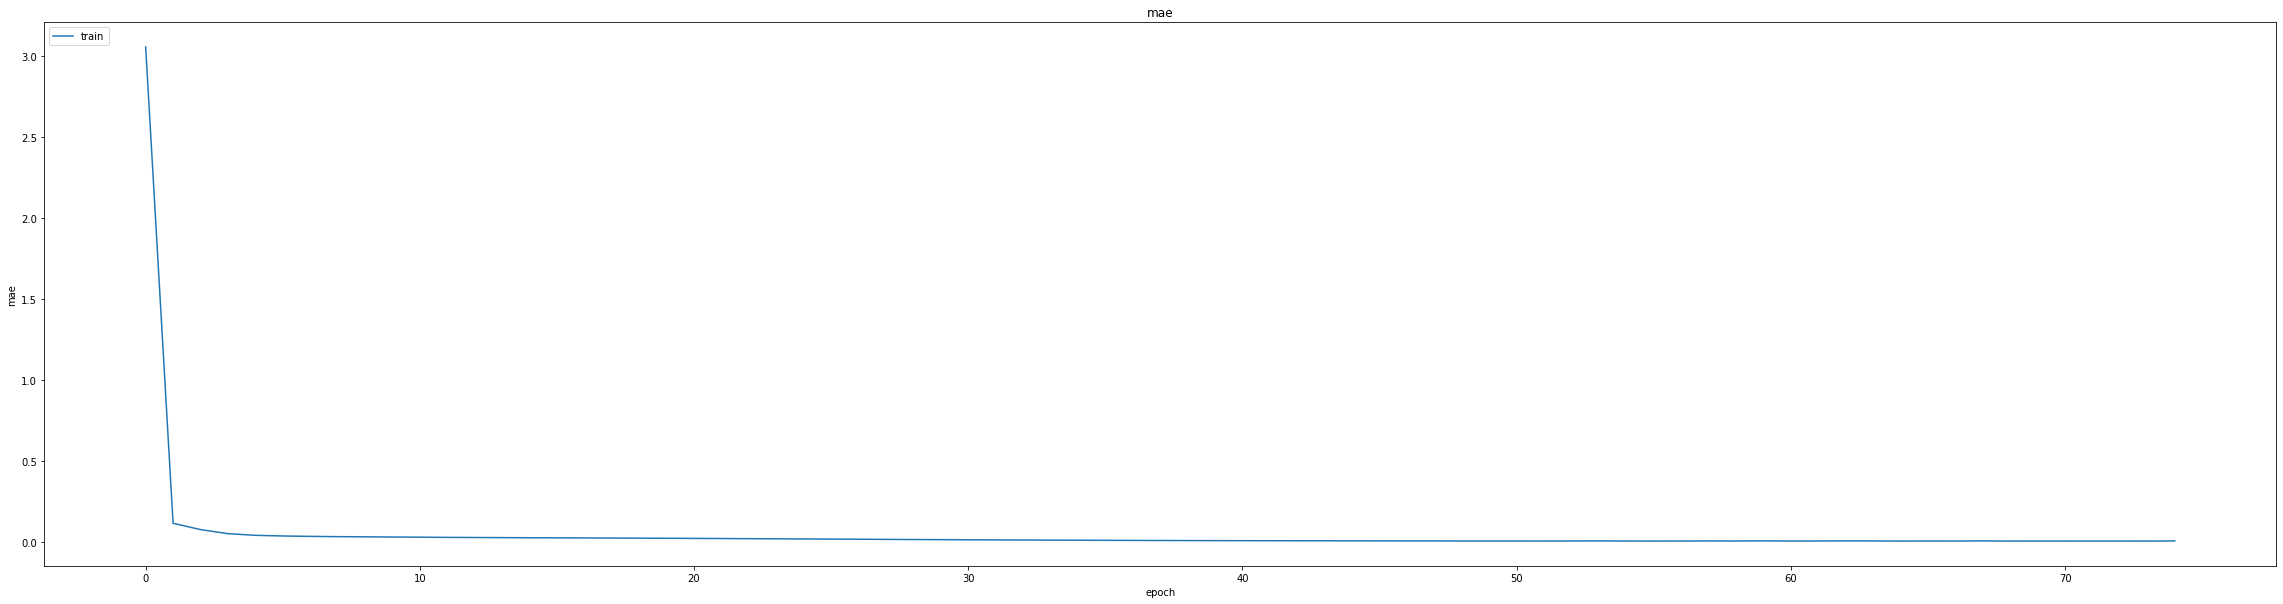

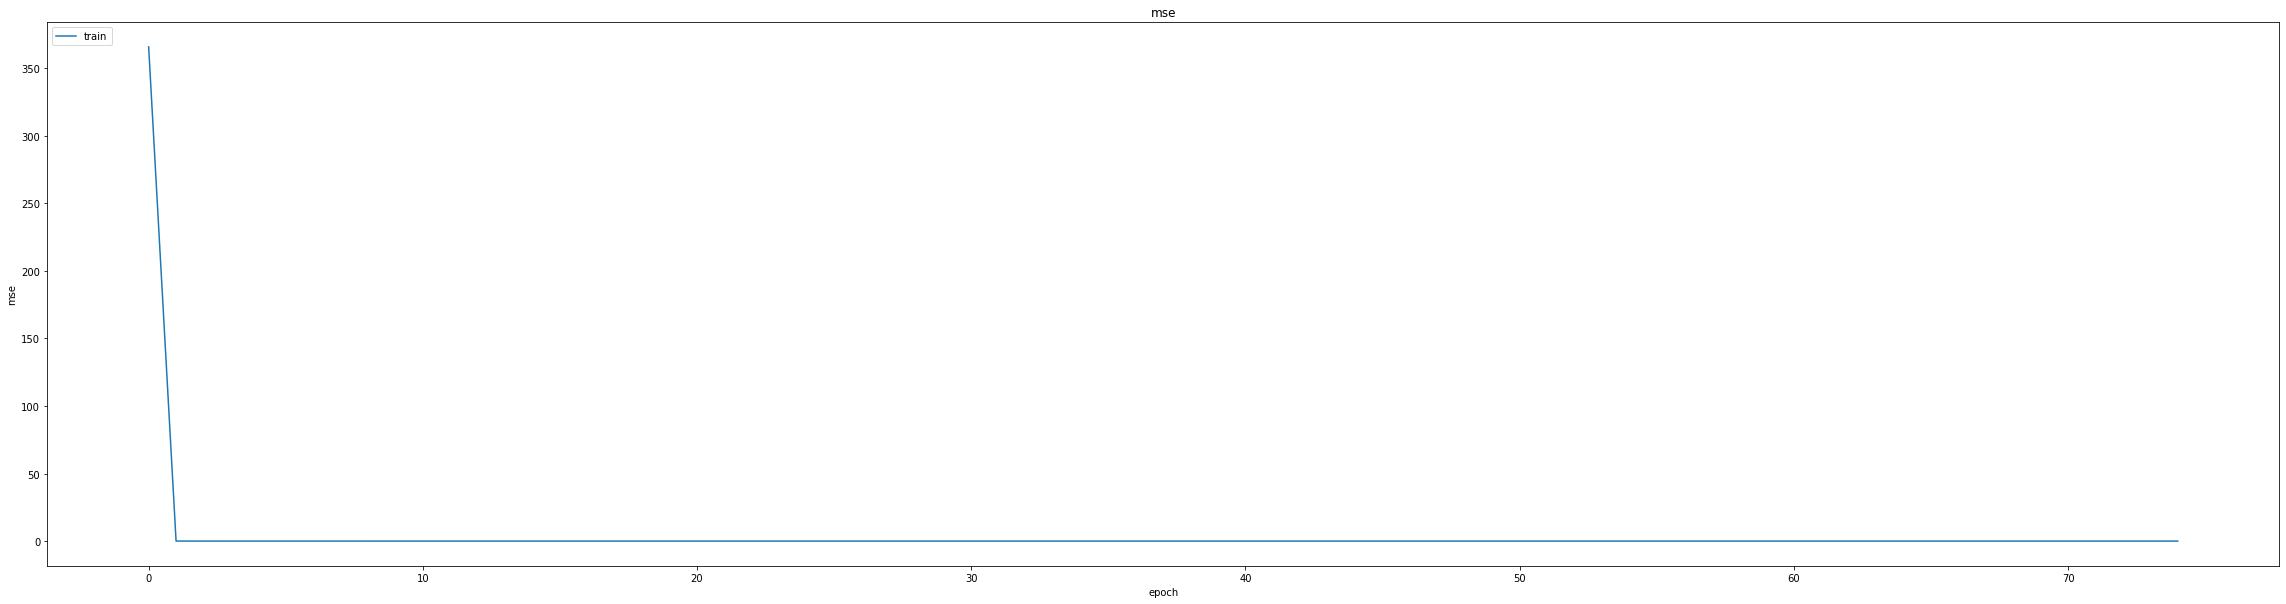

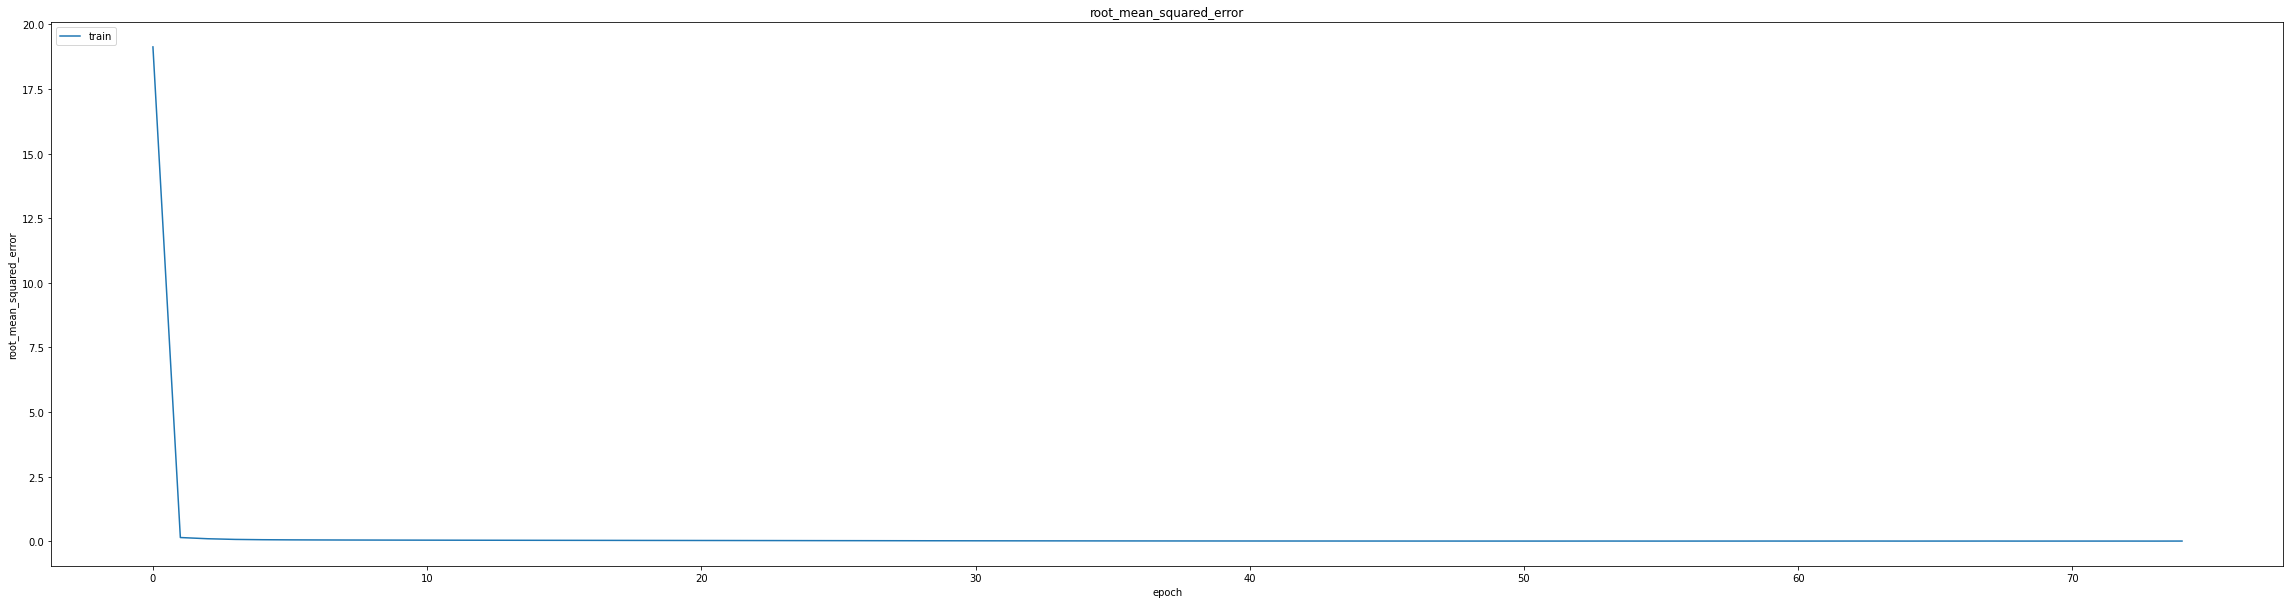

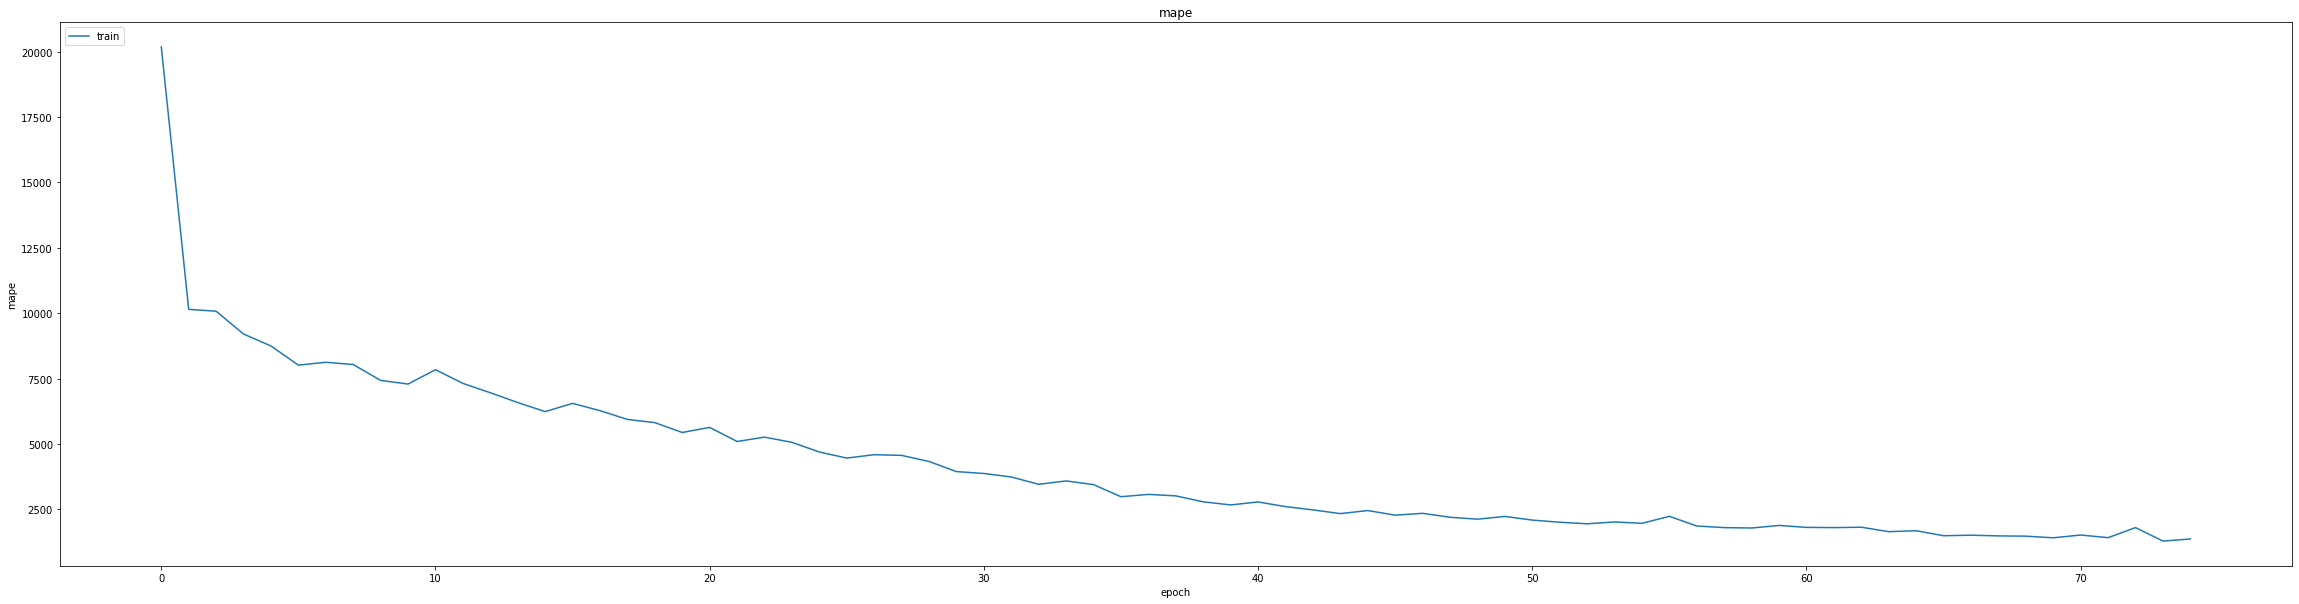

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007501059677451849
0.01009763777256012
464/464 [==============================] - 4s 6ms/step
0.9967083568756709


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
348/348 [==============================] - ETA: 0s - loss: 8.5321e-04 - mae: 0.0112 - mse: 8.5321e-04 - root_mean_squared_error: 0.0292 - mape: 1498.9470
Epoch 1: val_mse did not improve from 0.00010
348/348 [==============================] - 13s 22ms/step - loss: 8.5321e-04 - mae: 0.0112 - mse: 8.5321e-04 - root_mean_squared_error: 0.0292 - mape: 1498.9470 - val_loss: 1.6220e-04 - val_mae: 0.0103 - val_mse: 1.6220e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 4026.6523 - lr: 0.0010
Epoch 2/25
345/348 [============================>.] - ETA: 0s - loss: 2.1357e-05 - mae: 0.0034 - mse: 2.1357e-05 - root_mean_squared_error: 0.0046 - mape: 1285.9088
Epoch 2: val_mse did not improve from 0.00010
348/348 [==============================] - 6s 17ms/step - loss: 2.1315e-05 - mae: 0.0034 - mse: 2.1315e-05 - root_mean_squared_error: 0.0046 - mape: 1275.2578 - val_loss: 1.8033e-04 - val_mae: 0.0110 - val_mse: 1.8033e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 3846.5386 

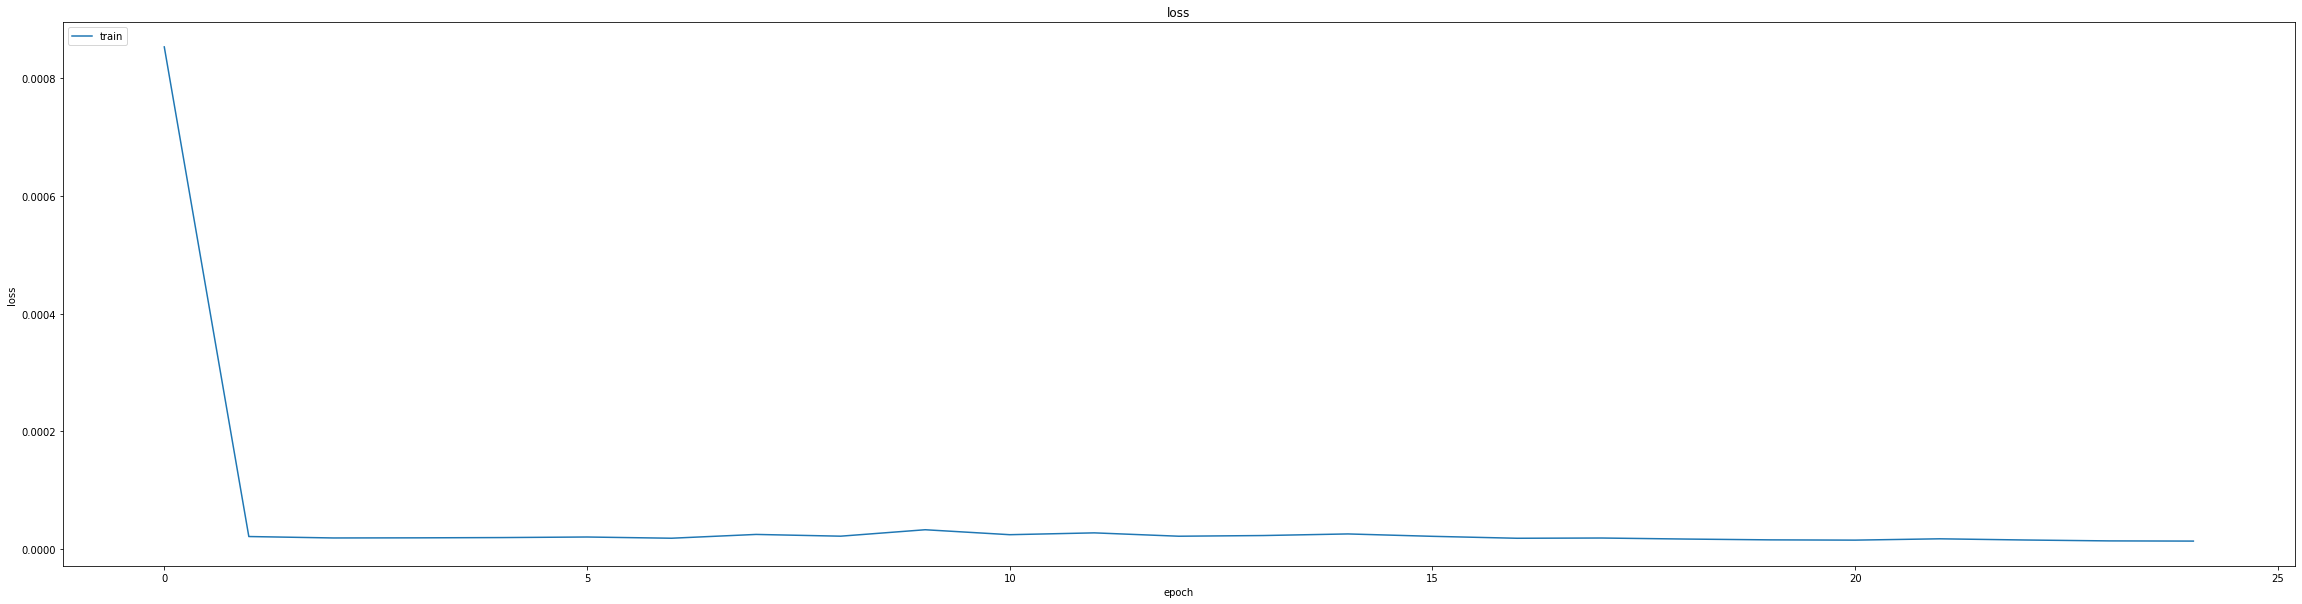

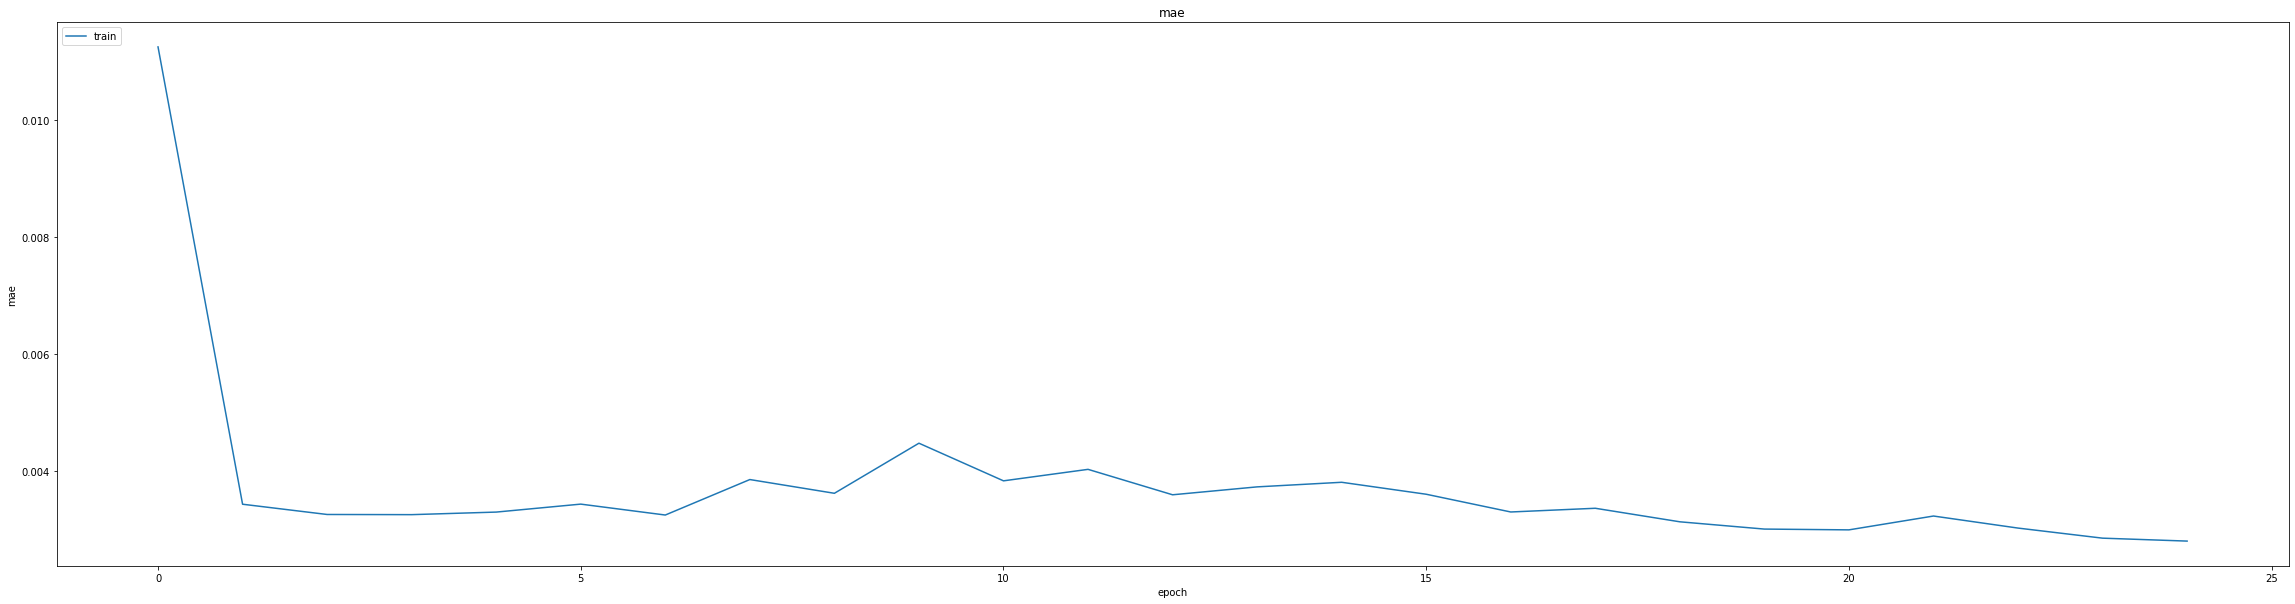

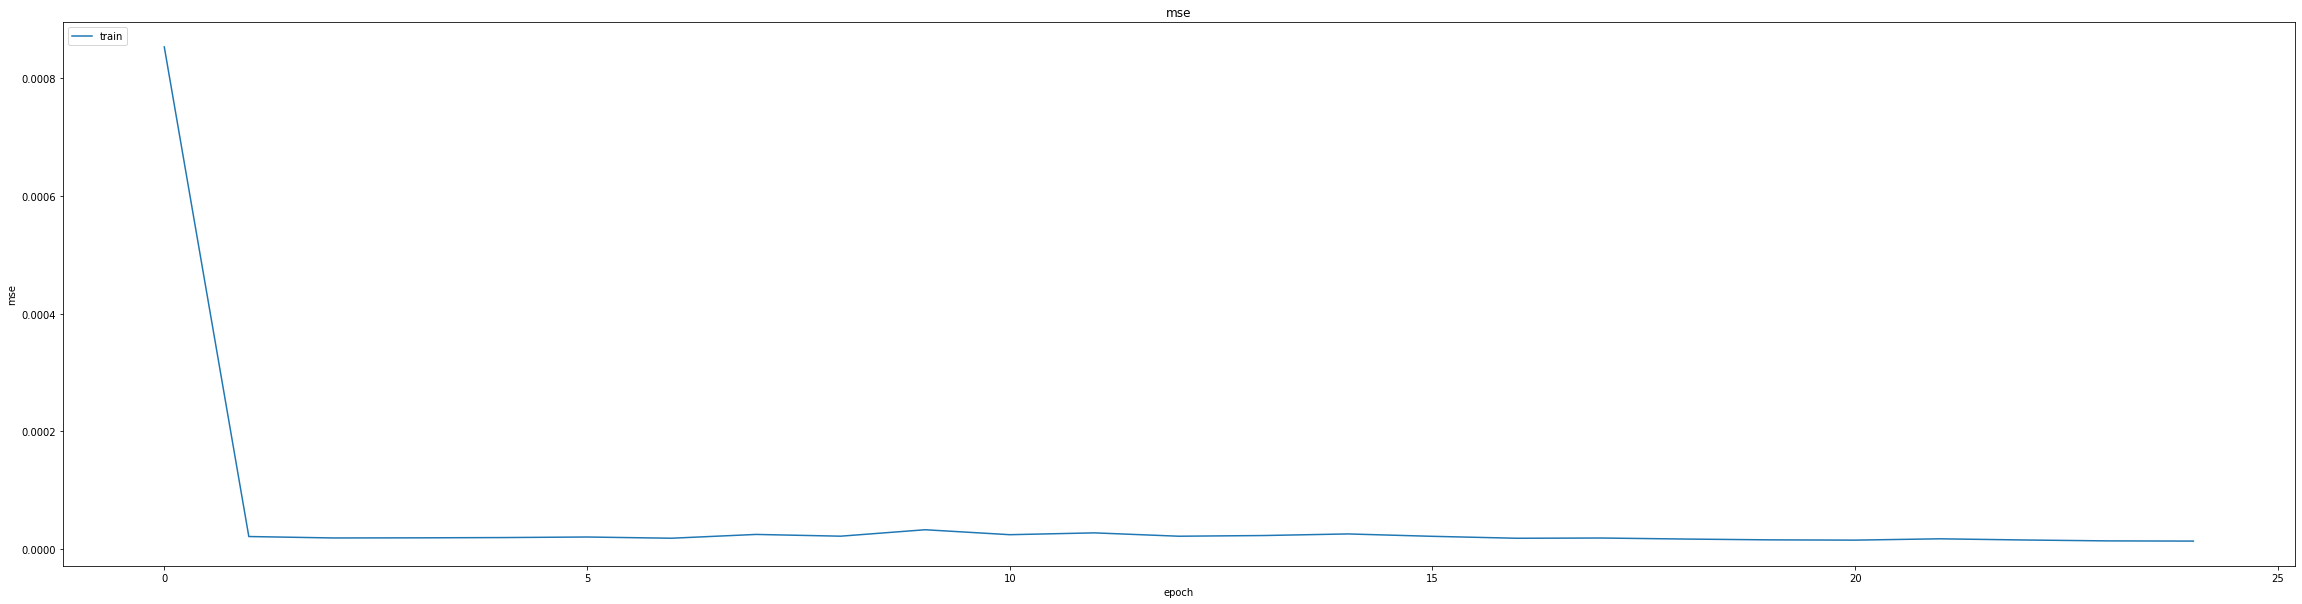

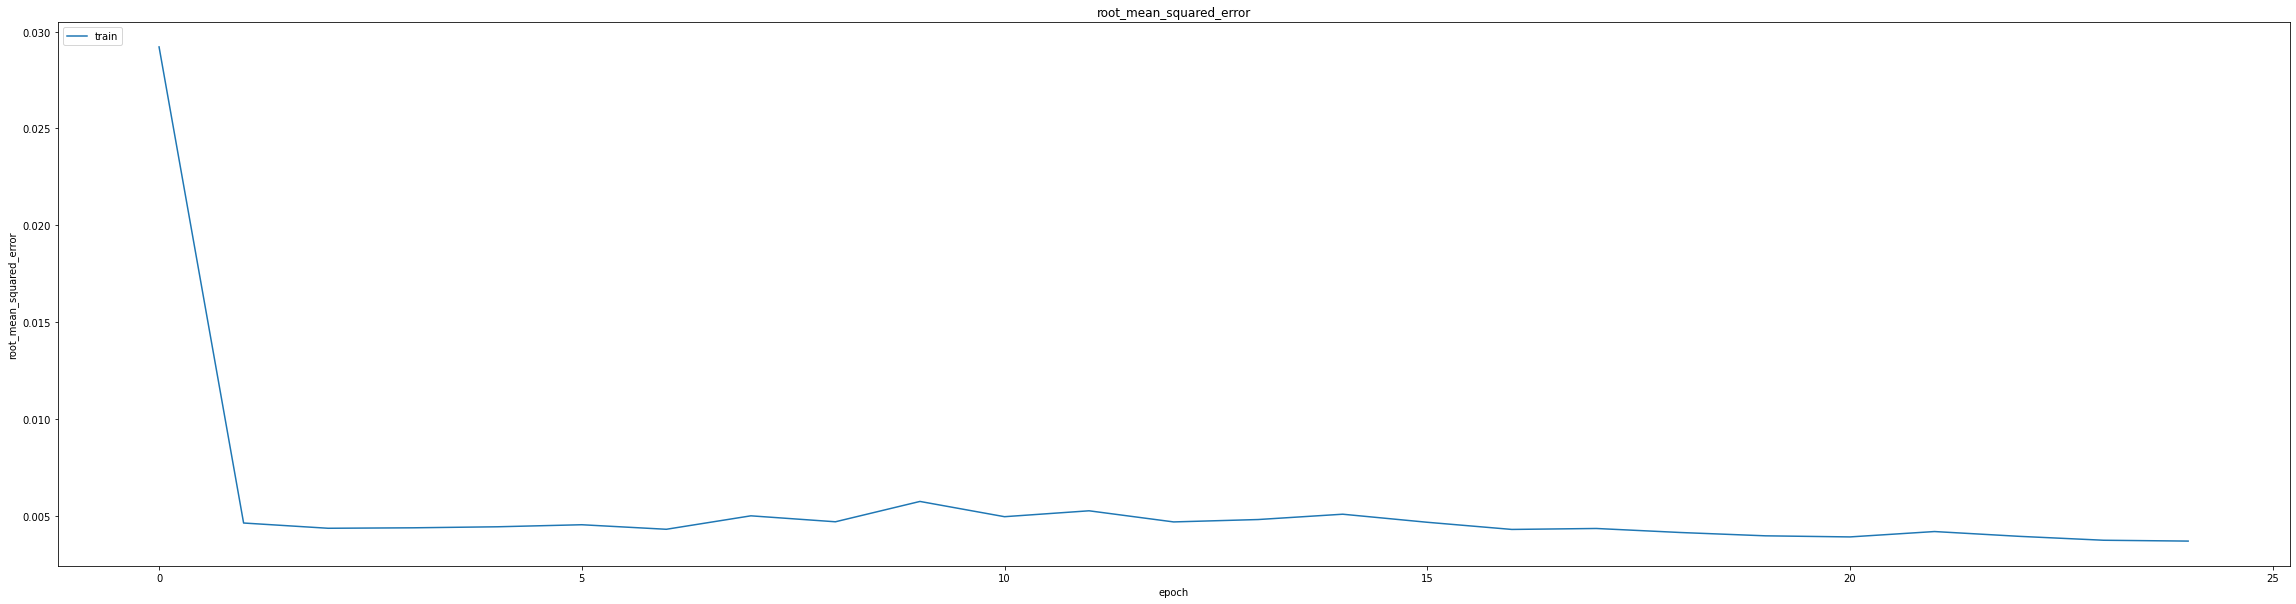

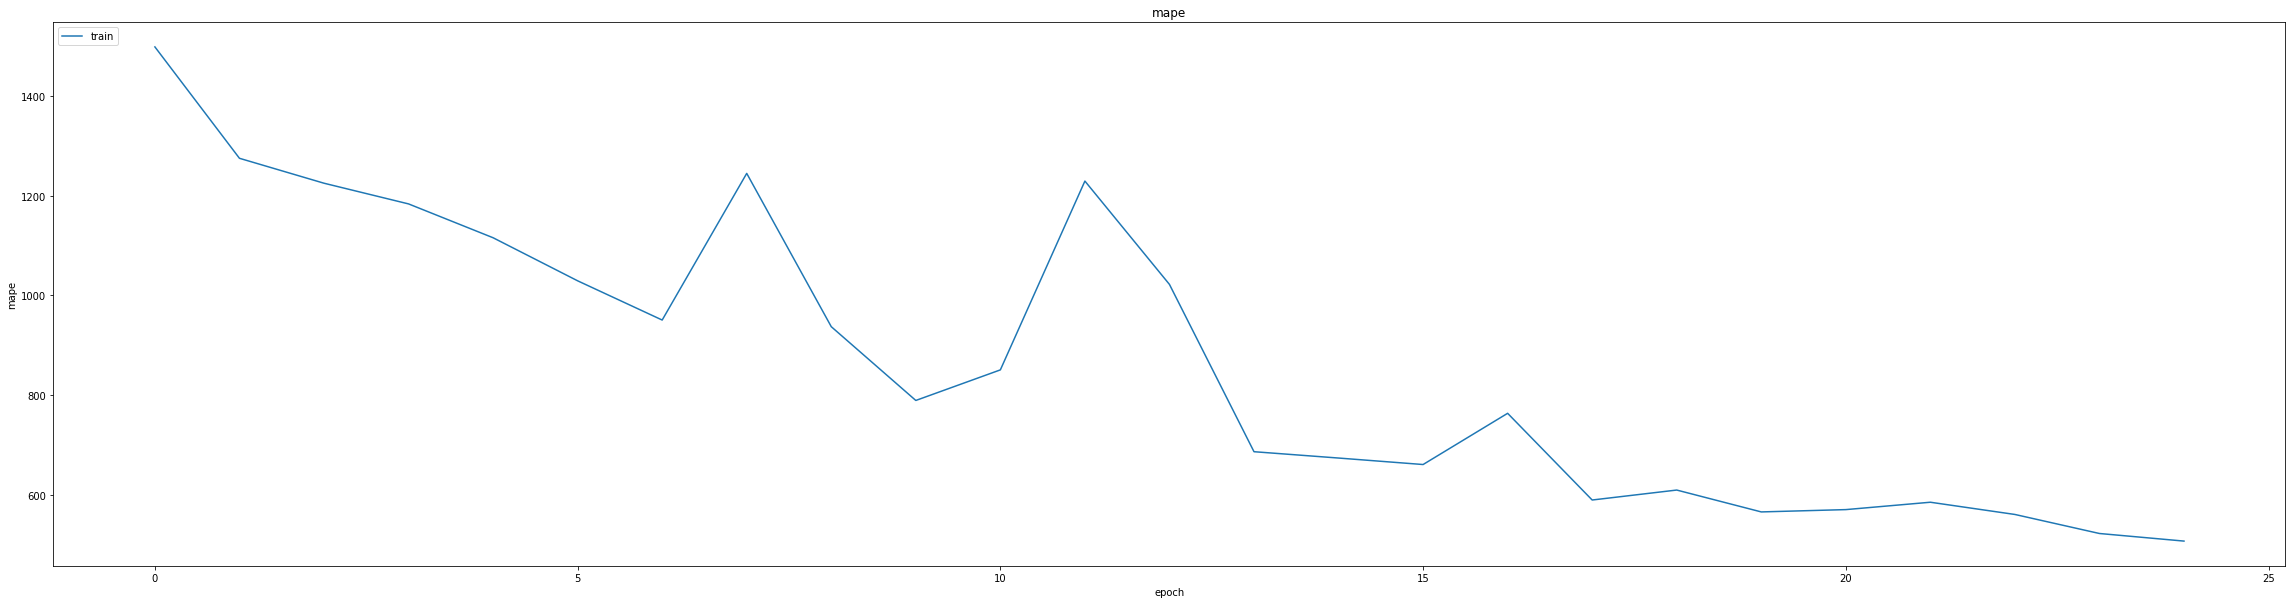

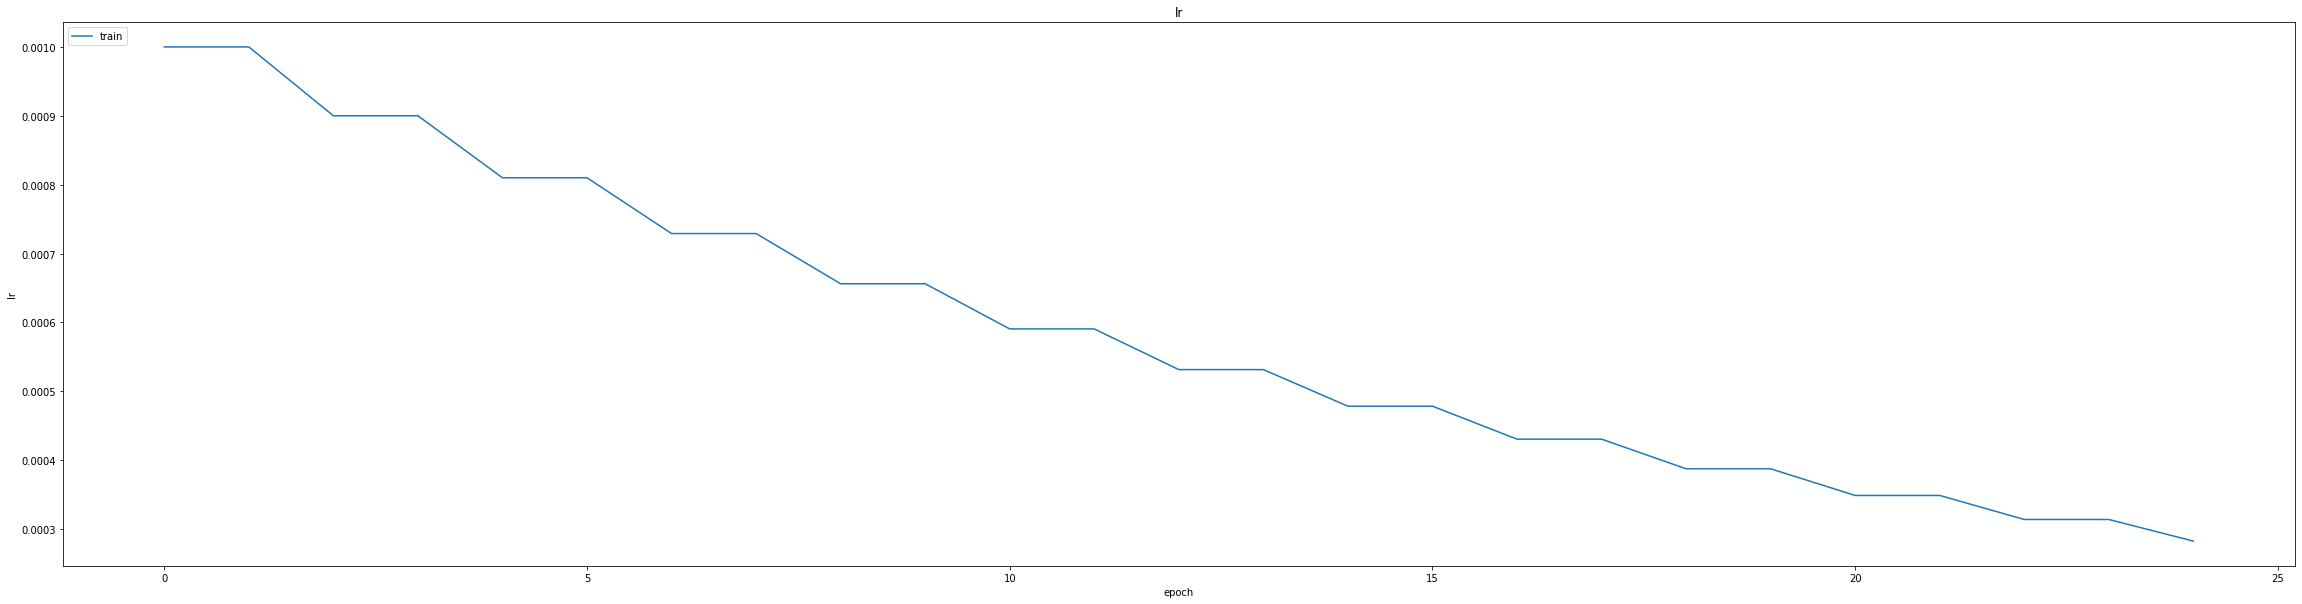

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007872363552451134
0.010402807965874672
464/464 [==============================] - 4s 6ms/step
0.9944547850098481


464/464 [==============================] - 3s 6ms/step


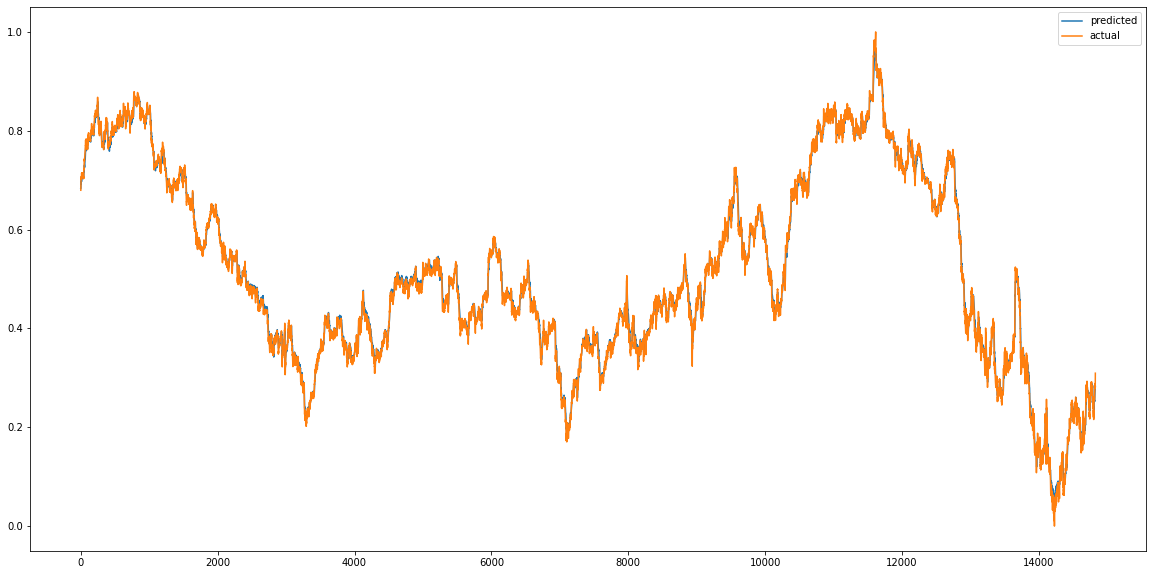

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


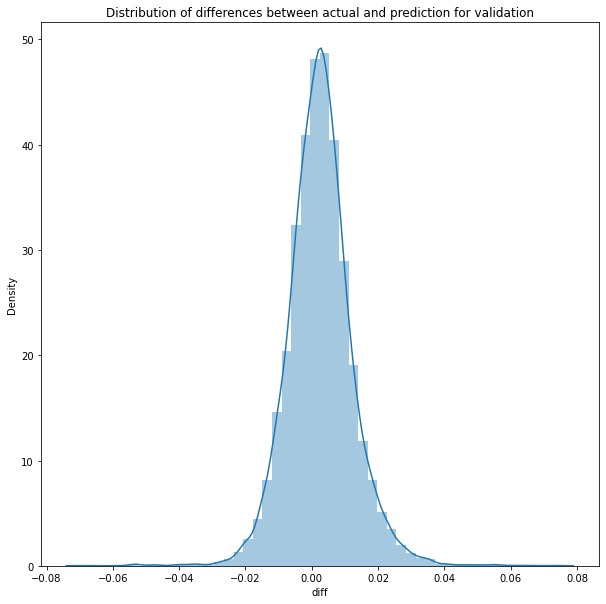

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 3s 6ms/step


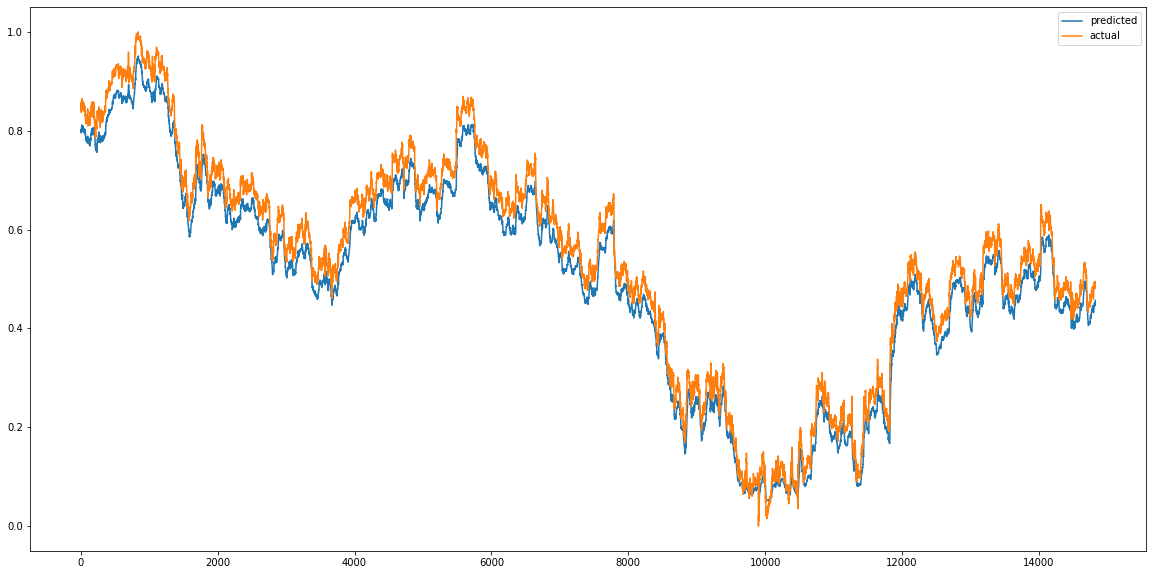

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


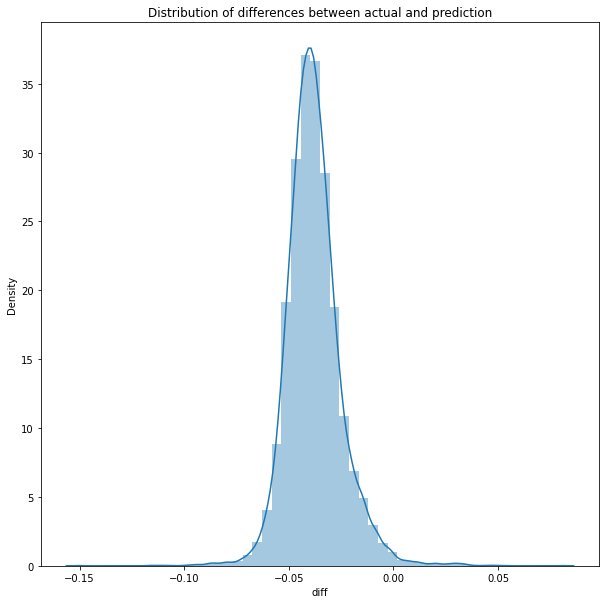

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0016178548197497537
RMSE :  0.04022256605128213
MAE :  0.038326584420524876
464/464 [==============================] - 3s 6ms/step
R2_Score  : 0.9679178219714428


count    14827.000000
mean        -0.038047
std          0.013050
min         -0.150650
25%         -0.045858
50%         -0.039052
75%         -0.031512
max          0.080410
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
347/348 [============================>.] - ETA: 0s - loss: 942.8906 - mae: 9.3916 - mse: 942.8906 - root_mean_squared_error: 30.7065 - mape: 25027.4004
Epoch 1: val_mse improved from inf to 0.28983, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 15s 36ms/step - loss: 940.4983 - mae: 9.3687 - mse: 940.4983 - root_mean_squared_error: 30.6675 - mape: 24964.0703 - val_loss: 0.2898 - val_mae: 0.5025 - val_mse: 0.2898 - val_root_mean_squared_error: 0.5384 - val_mape: 68740.1719
Epoch 2/75
347/348 [============================>.] - ETA: 0s - loss: 0.0667 - mae: 0.1971 - mse: 0.0667 - root_mean_squared_error: 0.2583 - mape: 17882.0898
Epoch 2: val_mse improved from 0.28983 to 0.08034, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 0.0666 - mae: 0.1969 - mse: 0.0666 - root_mean_squared_error: 0.2581 - mape: 17836.7793 - val_loss: 0.0803 - val_mae: 0.2406 - val_mse: 0.0803 - val_root_mean_squared_error: 0.2834 - val_mape: 48748.7500
Epoch 3/75
347/348 [============================>.] - ETA: 0s - loss: 0.0372 - mae: 0.1517 - mse: 0.0372 - root_mean_squared_error: 0.1929 - mape: 16075.2021
Epoch 3: val_mse improved from 0.08034 to 0.06394, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 0.0372 - mae: 0.1517 - mse: 0.0372 - root_mean_squared_error: 0.1929 - mape: 16034.5029 - val_loss: 0.0639 - val_mae: 0.2163 - val_mse: 0.0639 - val_root_mean_squared_error: 0.2529 - val_mape: 45753.9531
Epoch 4/75
347/348 [============================>.] - ETA: 0s - loss: 0.0365 - mae: 0.1532 - mse: 0.0365 - root_mean_squared_error: 0.1912 - mape: 15272.3369
Epoch 4: val_mse improved from 0.06394 to 0.06180, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 0.0366 - mae: 0.1533 - mse: 0.0366 - root_mean_squared_error: 0.1912 - mape: 15233.6748 - val_loss: 0.0618 - val_mae: 0.2130 - val_mse: 0.0618 - val_root_mean_squared_error: 0.2486 - val_mape: 45300.4648
Epoch 5/75
346/348 [============================>.] - ETA: 0s - loss: 0.0365 - mae: 0.1536 - mse: 0.0365 - root_mean_squared_error: 0.1911 - mape: 15176.4521
Epoch 5: val_mse did not improve from 0.06180
348/348 [==============================] - 4s 12ms/step - loss: 0.0365 - mae: 0.1536 - mse: 0.0365 - root_mean_squared_error: 0.1911 - mape: 15094.5195 - val_loss: 0.0620 - val_mae: 0.2133 - val_mse: 0.0620 - val_root_mean_squared_error: 0.2490 - val_mape: 45341.8594
Epoch 6/75
347/348 [============================>.] - ETA: 0s - loss: 0.0365 - mae: 0.1534 - mse: 0.0365 - root_mean_squared_error: 0.1910 - mape: 15269.5918
Epoch 6: val_mse improved from 0.06180 to 0.06146, saving model to /content/drive/MyDrive/modelweight

348/348 [==============================] - 12s 35ms/step - loss: 0.0365 - mae: 0.1535 - mse: 0.0365 - root_mean_squared_error: 0.1911 - mape: 15230.9434 - val_loss: 0.0615 - val_mae: 0.2125 - val_mse: 0.0615 - val_root_mean_squared_error: 0.2479 - val_mape: 45220.3164
Epoch 7/75
345/348 [============================>.] - ETA: 0s - loss: 0.0365 - mae: 0.1535 - mse: 0.0365 - root_mean_squared_error: 0.1910 - mape: 15224.9561
Epoch 7: val_mse did not improve from 0.06146
348/348 [==============================] - 5s 14ms/step - loss: 0.0365 - mae: 0.1536 - mse: 0.0365 - root_mean_squared_error: 0.1911 - mape: 15099.1855 - val_loss: 0.0624 - val_mae: 0.2139 - val_mse: 0.0624 - val_root_mean_squared_error: 0.2498 - val_mape: 45419.5938
Epoch 8/75
348/348 [==============================] - ETA: 0s - loss: 0.0365 - mae: 0.1535 - mse: 0.0365 - root_mean_squared_error: 0.1910 - mape: 15021.6172
Epoch 8: val_mse did not improve from 0.06146
348/348 [==============================] - 4s 11ms/step

348/348 [==============================] - 11s 32ms/step - loss: 0.0365 - mae: 0.1535 - mse: 0.0365 - root_mean_squared_error: 0.1910 - mape: 15331.0918 - val_loss: 0.0610 - val_mae: 0.2118 - val_mse: 0.0610 - val_root_mean_squared_error: 0.2471 - val_mape: 45119.4180
Epoch 11/75
345/348 [============================>.] - ETA: 0s - loss: 0.0364 - mae: 0.1534 - mse: 0.0364 - root_mean_squared_error: 0.1909 - mape: 15099.7275
Epoch 11: val_mse did not improve from 0.06104
348/348 [==============================] - 4s 11ms/step - loss: 0.0365 - mae: 0.1535 - mse: 0.0365 - root_mean_squared_error: 0.1910 - mape: 14974.9375 - val_loss: 0.0619 - val_mae: 0.2132 - val_mse: 0.0619 - val_root_mean_squared_error: 0.2488 - val_mape: 45306.4727
Epoch 12/75
343/348 [============================>.] - ETA: 0s - loss: 0.0365 - mae: 0.1535 - mse: 0.0365 - root_mean_squared_error: 0.1910 - mape: 15453.3848
Epoch 12: val_mse did not improve from 0.06104
348/348 [==============================] - 4s 11ms/

348/348 [==============================] - 12s 35ms/step - loss: 0.0364 - mae: 0.1533 - mse: 0.0364 - root_mean_squared_error: 0.1909 - mape: 15102.7197 - val_loss: 0.0610 - val_mae: 0.2117 - val_mse: 0.0610 - val_root_mean_squared_error: 0.2470 - val_mape: 45101.9023
Epoch 14/75
345/348 [============================>.] - ETA: 0s - loss: 0.0365 - mae: 0.1535 - mse: 0.0365 - root_mean_squared_error: 0.1909 - mape: 15075.9883
Epoch 14: val_mse did not improve from 0.06100
348/348 [==============================] - 4s 11ms/step - loss: 0.0364 - mae: 0.1534 - mse: 0.0364 - root_mean_squared_error: 0.1909 - mape: 14951.3174 - val_loss: 0.0619 - val_mae: 0.2131 - val_mse: 0.0619 - val_root_mean_squared_error: 0.2487 - val_mape: 45286.2734
Epoch 15/75
346/348 [============================>.] - ETA: 0s - loss: 0.0365 - mae: 0.1535 - mse: 0.0365 - root_mean_squared_error: 0.1910 - mape: 15322.9209
Epoch 15: val_mse improved from 0.06100 to 0.06034, saving model to /content/drive/MyDrive/modelwe

348/348 [==============================] - 12s 34ms/step - loss: 0.0364 - mae: 0.1534 - mse: 0.0364 - root_mean_squared_error: 0.1909 - mape: 15240.1533 - val_loss: 0.0603 - val_mae: 0.2107 - val_mse: 0.0603 - val_root_mean_squared_error: 0.2456 - val_mape: 44951.7266
Epoch 16/75
344/348 [============================>.] - ETA: 0s - loss: 0.0364 - mae: 0.1533 - mse: 0.0364 - root_mean_squared_error: 0.1908 - mape: 15314.0615
Epoch 16: val_mse did not improve from 0.06034
348/348 [==============================] - 4s 11ms/step - loss: 0.0364 - mae: 0.1533 - mse: 0.0364 - root_mean_squared_error: 0.1908 - mape: 15143.5088 - val_loss: 0.0625 - val_mae: 0.2140 - val_mse: 0.0625 - val_root_mean_squared_error: 0.2500 - val_mape: 45412.7344
Epoch 17/75
344/348 [============================>.] - ETA: 0s - loss: 0.0364 - mae: 0.1533 - mse: 0.0364 - root_mean_squared_error: 0.1908 - mape: 15270.9043
Epoch 17: val_mse did not improve from 0.06034
348/348 [==============================] - 4s 11ms/

348/348 [==============================] - 11s 33ms/step - loss: 0.0363 - mae: 0.1530 - mse: 0.0363 - root_mean_squared_error: 0.1905 - mape: 15023.3623 - val_loss: 0.0587 - val_mae: 0.2079 - val_mse: 0.0587 - val_root_mean_squared_error: 0.2423 - val_mape: 44530.3789
Epoch 23/75
344/348 [============================>.] - ETA: 0s - loss: 0.0211 - mae: 0.1079 - mse: 0.0211 - root_mean_squared_error: 0.1453 - mape: 14983.5068
Epoch 23: val_mse improved from 0.05869 to 0.01227, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 0.0210 - mae: 0.1074 - mse: 0.0210 - root_mean_squared_error: 0.1448 - mape: 14816.4795 - val_loss: 0.0123 - val_mae: 0.0734 - val_mse: 0.0123 - val_root_mean_squared_error: 0.1108 - val_mape: 32052.6777
Epoch 24/75
344/348 [============================>.] - ETA: 0s - loss: 0.0042 - mae: 0.0412 - mse: 0.0042 - root_mean_squared_error: 0.0650 - mape: 10523.4385
Epoch 24: val_mse improved from 0.01227 to 0.00279, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 0.0042 - mae: 0.0410 - mse: 0.0042 - root_mean_squared_error: 0.0648 - mape: 10406.0664 - val_loss: 0.0028 - val_mae: 0.0286 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0529 - val_mape: 22600.4023
Epoch 25/75
347/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0221 - mse: 0.0012 - root_mean_squared_error: 0.0344 - mape: 6396.4199
Epoch 25: val_mse improved from 0.00279 to 0.00154, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 33ms/step - loss: 0.0012 - mae: 0.0221 - mse: 0.0012 - root_mean_squared_error: 0.0344 - mape: 6380.2075 - val_loss: 0.0015 - val_mae: 0.0242 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0392 - val_mape: 18649.9277
Epoch 26/75
347/348 [============================>.] - ETA: 0s - loss: 9.3407e-04 - mae: 0.0208 - mse: 9.3407e-04 - root_mean_squared_error: 0.0306 - mape: 5980.4111
Epoch 26: val_mse improved from 0.00154 to 0.00120, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 9.3349e-04 - mae: 0.0208 - mse: 9.3349e-04 - root_mean_squared_error: 0.0306 - mape: 5965.2437 - val_loss: 0.0012 - val_mae: 0.0220 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0347 - val_mape: 17113.7266
Epoch 27/75
346/348 [============================>.] - ETA: 0s - loss: 7.5775e-04 - mae: 0.0192 - mse: 7.5775e-04 - root_mean_squared_error: 0.0275 - mape: 5550.5098
Epoch 27: val_mse improved from 0.00120 to 0.00096, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 7.5616e-04 - mae: 0.0192 - mse: 7.5616e-04 - root_mean_squared_error: 0.0275 - mape: 5520.4863 - val_loss: 9.5519e-04 - val_mae: 0.0190 - val_mse: 9.5519e-04 - val_root_mean_squared_error: 0.0309 - val_mape: 15980.0059
Epoch 28/75
344/348 [============================>.] - ETA: 0s - loss: 6.2052e-04 - mae: 0.0176 - mse: 6.2052e-04 - root_mean_squared_error: 0.0249 - mape: 5324.4683
Epoch 28: val_mse improved from 0.00096 to 0.00081, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 6.2103e-04 - mae: 0.0176 - mse: 6.2103e-04 - root_mean_squared_error: 0.0249 - mape: 5265.0918 - val_loss: 8.0716e-04 - val_mae: 0.0178 - val_mse: 8.0716e-04 - val_root_mean_squared_error: 0.0284 - val_mape: 15042.9102
Epoch 29/75
344/348 [============================>.] - ETA: 0s - loss: 5.2046e-04 - mae: 0.0162 - mse: 5.2046e-04 - root_mean_squared_error: 0.0228 - mape: 4854.8730
Epoch 29: val_mse improved from 0.00081 to 0.00075, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 5.1985e-04 - mae: 0.0162 - mse: 5.1985e-04 - root_mean_squared_error: 0.0228 - mape: 4800.7246 - val_loss: 7.4543e-04 - val_mae: 0.0181 - val_mse: 7.4543e-04 - val_root_mean_squared_error: 0.0273 - val_mape: 14258.3701
Epoch 30/75
346/348 [============================>.] - ETA: 0s - loss: 4.5210e-04 - mae: 0.0152 - mse: 4.5210e-04 - root_mean_squared_error: 0.0213 - mape: 4612.5654
Epoch 30: val_mse improved from 0.00075 to 0.00063, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 4.5177e-04 - mae: 0.0152 - mse: 4.5177e-04 - root_mean_squared_error: 0.0213 - mape: 4587.6172 - val_loss: 6.3269e-04 - val_mae: 0.0160 - val_mse: 6.3269e-04 - val_root_mean_squared_error: 0.0252 - val_mape: 13702.7412
Epoch 31/75
345/348 [============================>.] - ETA: 0s - loss: 3.9044e-04 - mae: 0.0142 - mse: 3.9044e-04 - root_mean_squared_error: 0.0198 - mape: 4655.3301
Epoch 31: val_mse improved from 0.00063 to 0.00060, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 3.8999e-04 - mae: 0.0142 - mse: 3.8999e-04 - root_mean_squared_error: 0.0197 - mape: 4616.7783 - val_loss: 5.9703e-04 - val_mae: 0.0164 - val_mse: 5.9703e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 13108.7529
Epoch 32/75
347/348 [============================>.] - ETA: 0s - loss: 3.4456e-04 - mae: 0.0135 - mse: 3.4456e-04 - root_mean_squared_error: 0.0186 - mape: 4349.5405
Epoch 32: val_mse improved from 0.00060 to 0.00056, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 3.4429e-04 - mae: 0.0135 - mse: 3.4429e-04 - root_mean_squared_error: 0.0186 - mape: 4338.5078 - val_loss: 5.6224e-04 - val_mae: 0.0164 - val_mse: 5.6224e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 12546.3037
Epoch 33/75
344/348 [============================>.] - ETA: 0s - loss: 2.9873e-04 - mae: 0.0126 - mse: 2.9873e-04 - root_mean_squared_error: 0.0173 - mape: 4268.0977
Epoch 33: val_mse improved from 0.00056 to 0.00047, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 2.9938e-04 - mae: 0.0126 - mse: 2.9938e-04 - root_mean_squared_error: 0.0173 - mape: 4220.5186 - val_loss: 4.6788e-04 - val_mae: 0.0142 - val_mse: 4.6788e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 11961.0723
Epoch 34/75
345/348 [============================>.] - ETA: 0s - loss: 2.6079e-04 - mae: 0.0119 - mse: 2.6079e-04 - root_mean_squared_error: 0.0161 - mape: 4040.6348
Epoch 34: val_mse improved from 0.00047 to 0.00043, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 2.6139e-04 - mae: 0.0119 - mse: 2.6139e-04 - root_mean_squared_error: 0.0162 - mape: 4007.1963 - val_loss: 4.3136e-04 - val_mae: 0.0139 - val_mse: 4.3136e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 11386.0879
Epoch 35/75
344/348 [============================>.] - ETA: 0s - loss: 2.2929e-04 - mae: 0.0112 - mse: 2.2929e-04 - root_mean_squared_error: 0.0151 - mape: 3800.0728
Epoch 35: val_mse improved from 0.00043 to 0.00043, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 2.2938e-04 - mae: 0.0112 - mse: 2.2938e-04 - root_mean_squared_error: 0.0151 - mape: 3757.6897 - val_loss: 4.2591e-04 - val_mae: 0.0147 - val_mse: 4.2591e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 10779.2373
Epoch 36/75
347/348 [============================>.] - ETA: 0s - loss: 1.9819e-04 - mae: 0.0105 - mse: 1.9819e-04 - root_mean_squared_error: 0.0141 - mape: 3522.9077
Epoch 36: val_mse did not improve from 0.00043
348/348 [==============================] - 4s 11ms/step - loss: 1.9826e-04 - mae: 0.0105 - mse: 1.9826e-04 - root_mean_squared_error: 0.0141 - mape: 3513.9751 - val_loss: 4.8844e-04 - val_mae: 0.0171 - val_mse: 4.8844e-04 - val_root_mean_squared_error: 0.0221 - val_mape: 10251.1631
Epoch 37/75
343/348 [============================>.] - ETA: 0s - loss: 1.7699e-04 - mae: 0.0099 - mse: 1.7699e-04 - root_mean_squared_error: 0.0133 - mape: 3452.7661
Epoch 37: val_mse improved from 0.00043 to 0.00035, sa

348/348 [==============================] - 12s 34ms/step - loss: 1.7669e-04 - mae: 0.0099 - mse: 1.7669e-04 - root_mean_squared_error: 0.0133 - mape: 3404.3293 - val_loss: 3.5106e-04 - val_mae: 0.0132 - val_mse: 3.5106e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 9834.6680
Epoch 38/75
345/348 [============================>.] - ETA: 0s - loss: 1.6176e-04 - mae: 0.0096 - mse: 1.6176e-04 - root_mean_squared_error: 0.0127 - mape: 3263.2644
Epoch 38: val_mse improved from 0.00035 to 0.00033, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 33ms/step - loss: 1.6178e-04 - mae: 0.0096 - mse: 1.6178e-04 - root_mean_squared_error: 0.0127 - mape: 3236.2415 - val_loss: 3.3252e-04 - val_mae: 0.0130 - val_mse: 3.3252e-04 - val_root_mean_squared_error: 0.0182 - val_mape: 9425.6143
Epoch 39/75
347/348 [============================>.] - ETA: 0s - loss: 1.4277e-04 - mae: 0.0090 - mse: 1.4277e-04 - root_mean_squared_error: 0.0119 - mape: 3186.0828
Epoch 39: val_mse improved from 0.00033 to 0.00029, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 35ms/step - loss: 1.4270e-04 - mae: 0.0090 - mse: 1.4270e-04 - root_mean_squared_error: 0.0119 - mape: 3178.0012 - val_loss: 2.9478e-04 - val_mae: 0.0120 - val_mse: 2.9478e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 9082.0615
Epoch 40/75
348/348 [==============================] - ETA: 0s - loss: 1.3417e-04 - mae: 0.0088 - mse: 1.3417e-04 - root_mean_squared_error: 0.0116 - mape: 2946.1050
Epoch 40: val_mse did not improve from 0.00029
348/348 [==============================] - 4s 12ms/step - loss: 1.3417e-04 - mae: 0.0088 - mse: 1.3417e-04 - root_mean_squared_error: 0.0116 - mape: 2946.1050 - val_loss: 3.2131e-04 - val_mae: 0.0134 - val_mse: 3.2131e-04 - val_root_mean_squared_error: 0.0179 - val_mape: 8734.7363
Epoch 41/75
347/348 [============================>.] - ETA: 0s - loss: 1.2248e-04 - mae: 0.0084 - mse: 1.2248e-04 - root_mean_squared_error: 0.0111 - mape: 2941.2097
Epoch 41: val_mse improved from 0.00029 to 0.00028, savi

348/348 [==============================] - 12s 34ms/step - loss: 1.2242e-04 - mae: 0.0084 - mse: 1.2242e-04 - root_mean_squared_error: 0.0111 - mape: 2933.7495 - val_loss: 2.7851e-04 - val_mae: 0.0120 - val_mse: 2.7851e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 8497.3506
Epoch 42/75
344/348 [============================>.] - ETA: 0s - loss: 1.1743e-04 - mae: 0.0083 - mse: 1.1743e-04 - root_mean_squared_error: 0.0108 - mape: 2849.0552
Epoch 42: val_mse did not improve from 0.00028
348/348 [==============================] - 4s 11ms/step - loss: 1.1721e-04 - mae: 0.0082 - mse: 1.1721e-04 - root_mean_squared_error: 0.0108 - mape: 2817.2729 - val_loss: 2.8492e-04 - val_mae: 0.0125 - val_mse: 2.8492e-04 - val_root_mean_squared_error: 0.0169 - val_mape: 8265.1006
Epoch 43/75
343/348 [============================>.] - ETA: 0s - loss: 1.1481e-04 - mae: 0.0082 - mse: 1.1481e-04 - root_mean_squared_error: 0.0107 - mape: 2829.3625
Epoch 43: val_mse improved from 0.00028 to 0.00023, savi

348/348 [==============================] - 11s 33ms/step - loss: 1.1482e-04 - mae: 0.0082 - mse: 1.1482e-04 - root_mean_squared_error: 0.0107 - mape: 2789.6726 - val_loss: 2.3056e-04 - val_mae: 0.0104 - val_mse: 2.3056e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 8109.9712
Epoch 44/75
343/348 [============================>.] - ETA: 0s - loss: 1.0626e-04 - mae: 0.0079 - mse: 1.0626e-04 - root_mean_squared_error: 0.0103 - mape: 2724.5254
Epoch 44: val_mse did not improve from 0.00023
348/348 [==============================] - 4s 11ms/step - loss: 1.0644e-04 - mae: 0.0079 - mse: 1.0644e-04 - root_mean_squared_error: 0.0103 - mape: 2686.3181 - val_loss: 3.4333e-04 - val_mae: 0.0149 - val_mse: 3.4333e-04 - val_root_mean_squared_error: 0.0185 - val_mape: 7872.5068
Epoch 45/75
345/348 [============================>.] - ETA: 0s - loss: 1.0437e-04 - mae: 0.0078 - mse: 1.0437e-04 - root_mean_squared_error: 0.0102 - mape: 2690.4019
Epoch 45: val_mse did not improve from 0.00023
348/348 [

348/348 [==============================] - 12s 35ms/step - loss: 9.8037e-05 - mae: 0.0076 - mse: 9.8037e-05 - root_mean_squared_error: 0.0099 - mape: 2647.0220 - val_loss: 2.2510e-04 - val_mae: 0.0109 - val_mse: 2.2510e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 7637.6782
Epoch 47/75
347/348 [============================>.] - ETA: 0s - loss: 9.7686e-05 - mae: 0.0076 - mse: 9.7686e-05 - root_mean_squared_error: 0.0099 - mape: 2633.8193
Epoch 47: val_mse did not improve from 0.00023
348/348 [==============================] - 4s 11ms/step - loss: 9.7717e-05 - mae: 0.0076 - mse: 9.7717e-05 - root_mean_squared_error: 0.0099 - mape: 2627.1389 - val_loss: 2.3381e-04 - val_mae: 0.0113 - val_mse: 2.3381e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 7499.5391
Epoch 48/75
343/348 [============================>.] - ETA: 0s - loss: 8.6820e-05 - mae: 0.0071 - mse: 8.6820e-05 - root_mean_squared_error: 0.0093 - mape: 2596.6663
Epoch 48: val_mse did not improve from 0.00023
348/348 [

348/348 [==============================] - 12s 35ms/step - loss: 8.7038e-05 - mae: 0.0071 - mse: 8.7038e-05 - root_mean_squared_error: 0.0093 - mape: 2466.9915 - val_loss: 2.1638e-04 - val_mae: 0.0109 - val_mse: 2.1638e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 7248.2266
Epoch 50/75
348/348 [==============================] - ETA: 0s - loss: 8.5177e-05 - mae: 0.0071 - mse: 8.5177e-05 - root_mean_squared_error: 0.0092 - mape: 2450.5168
Epoch 50: val_mse improved from 0.00022 to 0.00020, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 13s 36ms/step - loss: 8.5177e-05 - mae: 0.0071 - mse: 8.5177e-05 - root_mean_squared_error: 0.0092 - mape: 2450.5168 - val_loss: 1.9832e-04 - val_mae: 0.0102 - val_mse: 1.9832e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 7175.3413
Epoch 51/75
343/348 [============================>.] - ETA: 0s - loss: 8.0695e-05 - mae: 0.0068 - mse: 8.0695e-05 - root_mean_squared_error: 0.0090 - mape: 2446.0752
Epoch 51: val_mse did not improve from 0.00020
348/348 [==============================] - 4s 11ms/step - loss: 8.0486e-05 - mae: 0.0068 - mse: 8.0486e-05 - root_mean_squared_error: 0.0090 - mape: 2411.7605 - val_loss: 2.0104e-04 - val_mae: 0.0103 - val_mse: 2.0104e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 7047.3188
Epoch 52/75
344/348 [============================>.] - ETA: 0s - loss: 7.6605e-05 - mae: 0.0067 - mse: 7.6605e-05 - root_mean_squared_error: 0.0088 - mape: 2374.8357
Epoch 52: val_mse did not improve from 0.00020
348/348 [

348/348 [==============================] - 12s 35ms/step - loss: 8.0260e-05 - mae: 0.0068 - mse: 8.0260e-05 - root_mean_squared_error: 0.0090 - mape: 2371.2051 - val_loss: 1.9763e-04 - val_mae: 0.0104 - val_mse: 1.9763e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 6895.5205
Epoch 54/75
346/348 [============================>.] - ETA: 0s - loss: 8.0480e-05 - mae: 0.0069 - mse: 8.0480e-05 - root_mean_squared_error: 0.0090 - mape: 2316.3132
Epoch 54: val_mse improved from 0.00020 to 0.00016, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 8.1247e-05 - mae: 0.0069 - mse: 8.1247e-05 - root_mean_squared_error: 0.0090 - mape: 2303.7881 - val_loss: 1.6303e-04 - val_mae: 0.0088 - val_mse: 1.6303e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 6912.1724
Epoch 55/75
344/348 [============================>.] - ETA: 0s - loss: 7.4008e-05 - mae: 0.0065 - mse: 7.4008e-05 - root_mean_squared_error: 0.0086 - mape: 2354.9058
Epoch 55: val_mse did not improve from 0.00016
348/348 [==============================] - 4s 11ms/step - loss: 7.3900e-05 - mae: 0.0065 - mse: 7.3900e-05 - root_mean_squared_error: 0.0086 - mape: 2328.6360 - val_loss: 2.6503e-04 - val_mae: 0.0131 - val_mse: 2.6503e-04 - val_root_mean_squared_error: 0.0163 - val_mape: 6741.6348
Epoch 56/75
347/348 [============================>.] - ETA: 0s - loss: 7.2477e-05 - mae: 0.0065 - mse: 7.2477e-05 - root_mean_squared_error: 0.0085 - mape: 2276.0750
Epoch 56: val_mse improved from 0.00016 to 0.00016, savi

348/348 [==============================] - 11s 33ms/step - loss: 7.2373e-05 - mae: 0.0065 - mse: 7.2373e-05 - root_mean_squared_error: 0.0085 - mape: 2270.3010 - val_loss: 1.6094e-04 - val_mae: 0.0088 - val_mse: 1.6094e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 6718.7949
Epoch 57/75
343/348 [============================>.] - ETA: 0s - loss: 7.6332e-05 - mae: 0.0067 - mse: 7.6332e-05 - root_mean_squared_error: 0.0087 - mape: 2350.8430
Epoch 57: val_mse did not improve from 0.00016
348/348 [==============================] - 4s 12ms/step - loss: 7.6467e-05 - mae: 0.0067 - mse: 7.6467e-05 - root_mean_squared_error: 0.0087 - mape: 2317.8669 - val_loss: 3.3370e-04 - val_mae: 0.0154 - val_mse: 3.3370e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 6631.5186
Epoch 58/75
344/348 [============================>.] - ETA: 0s - loss: 7.2438e-05 - mae: 0.0065 - mse: 7.2438e-05 - root_mean_squared_error: 0.0085 - mape: 2309.2432
Epoch 58: val_mse did not improve from 0.00016
348/348 [

348/348 [==============================] - 13s 37ms/step - loss: 8.1163e-05 - mae: 0.0068 - mse: 8.1163e-05 - root_mean_squared_error: 0.0090 - mape: 2238.4160 - val_loss: 1.5076e-04 - val_mae: 0.0086 - val_mse: 1.5076e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 6555.8833
Epoch 62/75
344/348 [============================>.] - ETA: 0s - loss: 7.3771e-05 - mae: 0.0066 - mse: 7.3771e-05 - root_mean_squared_error: 0.0086 - mape: 2225.8931
Epoch 62: val_mse did not improve from 0.00015
348/348 [==============================] - 4s 12ms/step - loss: 7.3510e-05 - mae: 0.0066 - mse: 7.3510e-05 - root_mean_squared_error: 0.0086 - mape: 2201.0603 - val_loss: 1.6395e-04 - val_mae: 0.0093 - val_mse: 1.6395e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 6504.0054
Epoch 63/75
345/348 [============================>.] - ETA: 0s - loss: 7.7726e-05 - mae: 0.0067 - mse: 7.7726e-05 - root_mean_squared_error: 0.0088 - mape: 2283.4041
Epoch 63: val_mse did not improve from 0.00015
348/348 [

348/348 [==============================] - 12s 34ms/step - loss: 7.3052e-05 - mae: 0.0066 - mse: 7.3052e-05 - root_mean_squared_error: 0.0085 - mape: 1946.8394 - val_loss: 1.4263e-04 - val_mae: 0.0086 - val_mse: 1.4263e-04 - val_root_mean_squared_error: 0.0119 - val_mape: 5714.0454
Epoch 67/75
348/348 [==============================] - ETA: 0s - loss: 6.0423e-05 - mae: 0.0060 - mse: 6.0423e-05 - root_mean_squared_error: 0.0078 - mape: 1952.0917
Epoch 67: val_mse did not improve from 0.00014
348/348 [==============================] - 4s 11ms/step - loss: 6.0423e-05 - mae: 0.0060 - mse: 6.0423e-05 - root_mean_squared_error: 0.0078 - mape: 1952.0917 - val_loss: 1.8113e-04 - val_mae: 0.0107 - val_mse: 1.8113e-04 - val_root_mean_squared_error: 0.0135 - val_mape: 5306.9297
Epoch 68/75
347/348 [============================>.] - ETA: 0s - loss: 7.7913e-05 - mae: 0.0068 - mse: 7.7913e-05 - root_mean_squared_error: 0.0088 - mape: 1815.8151
Epoch 68: val_mse improved from 0.00014 to 0.00014, savi

348/348 [==============================] - 12s 33ms/step - loss: 7.7837e-05 - mae: 0.0067 - mse: 7.7837e-05 - root_mean_squared_error: 0.0088 - mape: 1811.2097 - val_loss: 1.4187e-04 - val_mae: 0.0086 - val_mse: 1.4187e-04 - val_root_mean_squared_error: 0.0119 - val_mape: 5415.5122
Epoch 69/75
347/348 [============================>.] - ETA: 0s - loss: 5.9823e-05 - mae: 0.0060 - mse: 5.9823e-05 - root_mean_squared_error: 0.0077 - mape: 1853.5796
Epoch 69: val_mse did not improve from 0.00014
348/348 [==============================] - 4s 11ms/step - loss: 5.9801e-05 - mae: 0.0060 - mse: 5.9801e-05 - root_mean_squared_error: 0.0077 - mape: 1848.8785 - val_loss: 1.7844e-04 - val_mae: 0.0105 - val_mse: 1.7844e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 5403.7280
Epoch 70/75
347/348 [============================>.] - ETA: 0s - loss: 6.9009e-05 - mae: 0.0064 - mse: 6.9009e-05 - root_mean_squared_error: 0.0083 - mape: 1817.2900
Epoch 70: val_mse did not improve from 0.00014
348/348 [

348/348 [==============================] - 12s 35ms/step - loss: 6.0904e-05 - mae: 0.0060 - mse: 6.0904e-05 - root_mean_squared_error: 0.0078 - mape: 1822.1287 - val_loss: 1.2422e-04 - val_mae: 0.0079 - val_mse: 1.2422e-04 - val_root_mean_squared_error: 0.0111 - val_mape: 5335.3032
Epoch 72/75
348/348 [==============================] - ETA: 0s - loss: 6.4467e-05 - mae: 0.0060 - mse: 6.4467e-05 - root_mean_squared_error: 0.0080 - mape: 1794.5200
Epoch 72: val_mse did not improve from 0.00012
348/348 [==============================] - 4s 11ms/step - loss: 6.4467e-05 - mae: 0.0060 - mse: 6.4467e-05 - root_mean_squared_error: 0.0080 - mape: 1794.5200 - val_loss: 1.3263e-04 - val_mae: 0.0084 - val_mse: 1.3263e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 5438.2090
Epoch 73/75
343/348 [============================>.] - ETA: 0s - loss: 5.9731e-05 - mae: 0.0061 - mse: 5.9731e-05 - root_mean_squared_error: 0.0077 - mape: 1828.0491
Epoch 73: val_mse did not improve from 0.00012
348/348 [

348/348 [==============================] - 12s 34ms/step - loss: 5.6984e-05 - mae: 0.0059 - mse: 5.6984e-05 - root_mean_squared_error: 0.0075 - mape: 1804.9316 - val_loss: 1.2139e-04 - val_mae: 0.0077 - val_mse: 1.2139e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 5380.4351
Epoch 75/75
348/348 [==============================] - ETA: 0s - loss: 6.9424e-05 - mae: 0.0065 - mse: 6.9424e-05 - root_mean_squared_error: 0.0083 - mape: 1842.9441
Epoch 75: val_mse did not improve from 0.00012
348/348 [==============================] - 4s 11ms/step - loss: 6.9424e-05 - mae: 0.0065 - mse: 6.9424e-05 - root_mean_squared_error: 0.0083 - mape: 1842.9441 - val_loss: 1.3256e-04 - val_mae: 0.0084 - val_mse: 1.3256e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 5479.5908


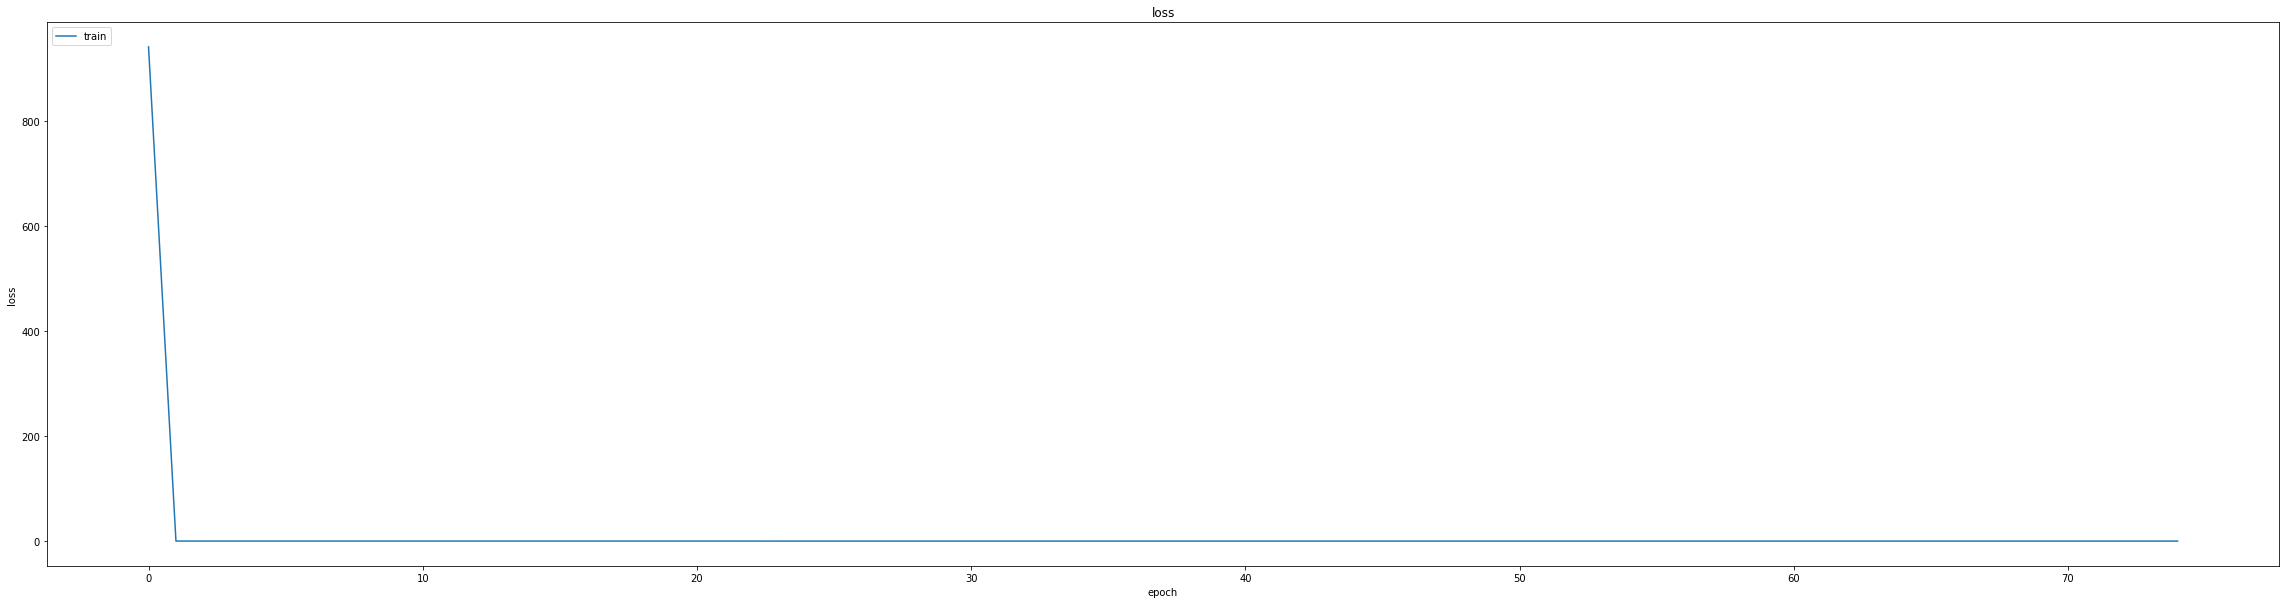

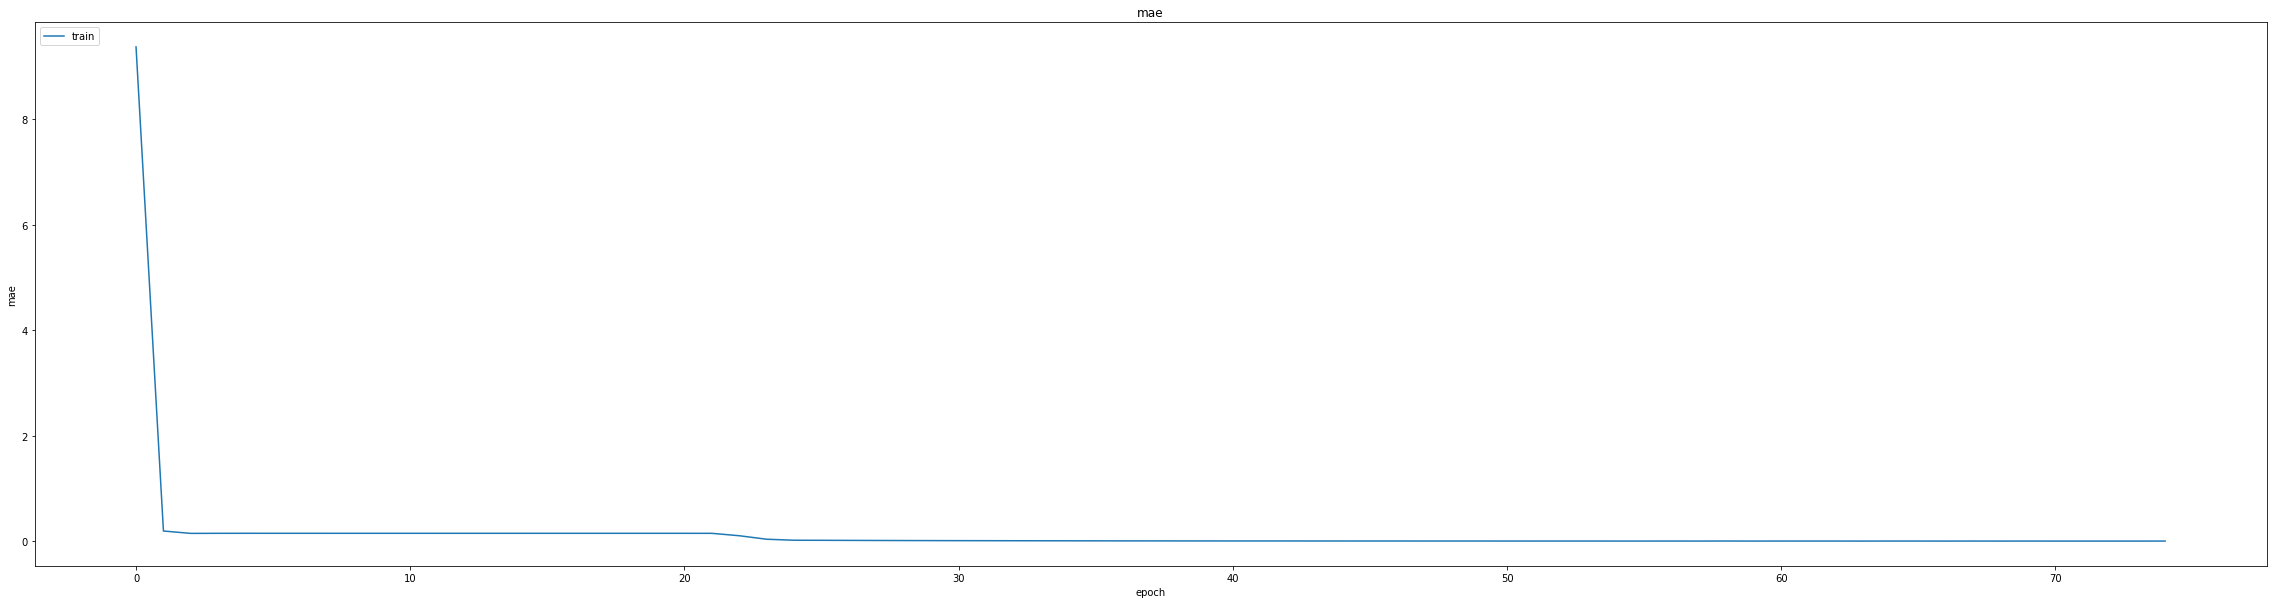

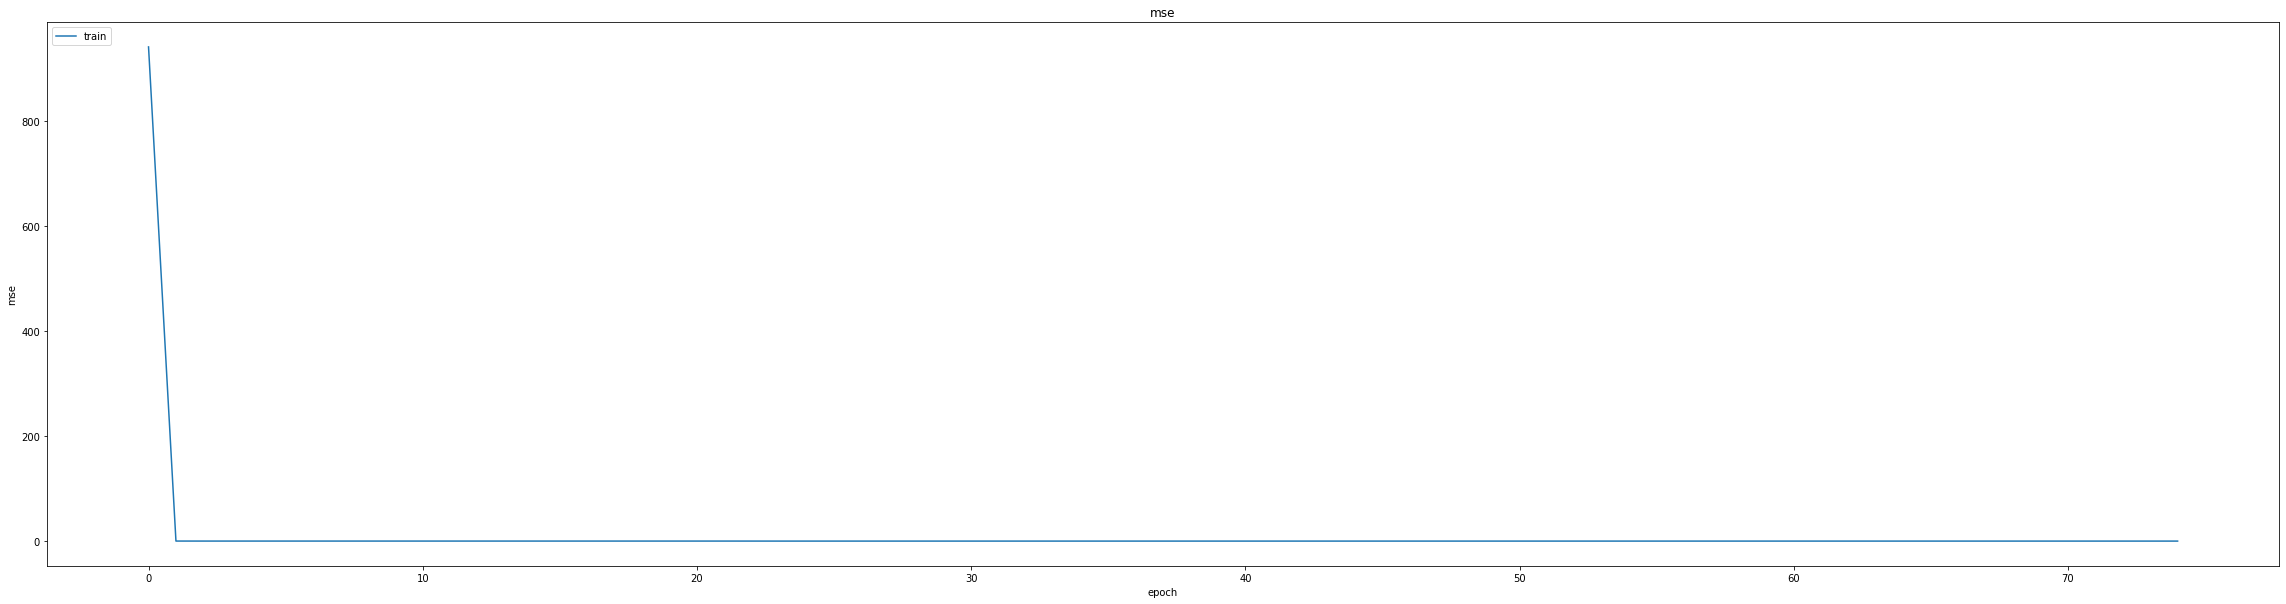

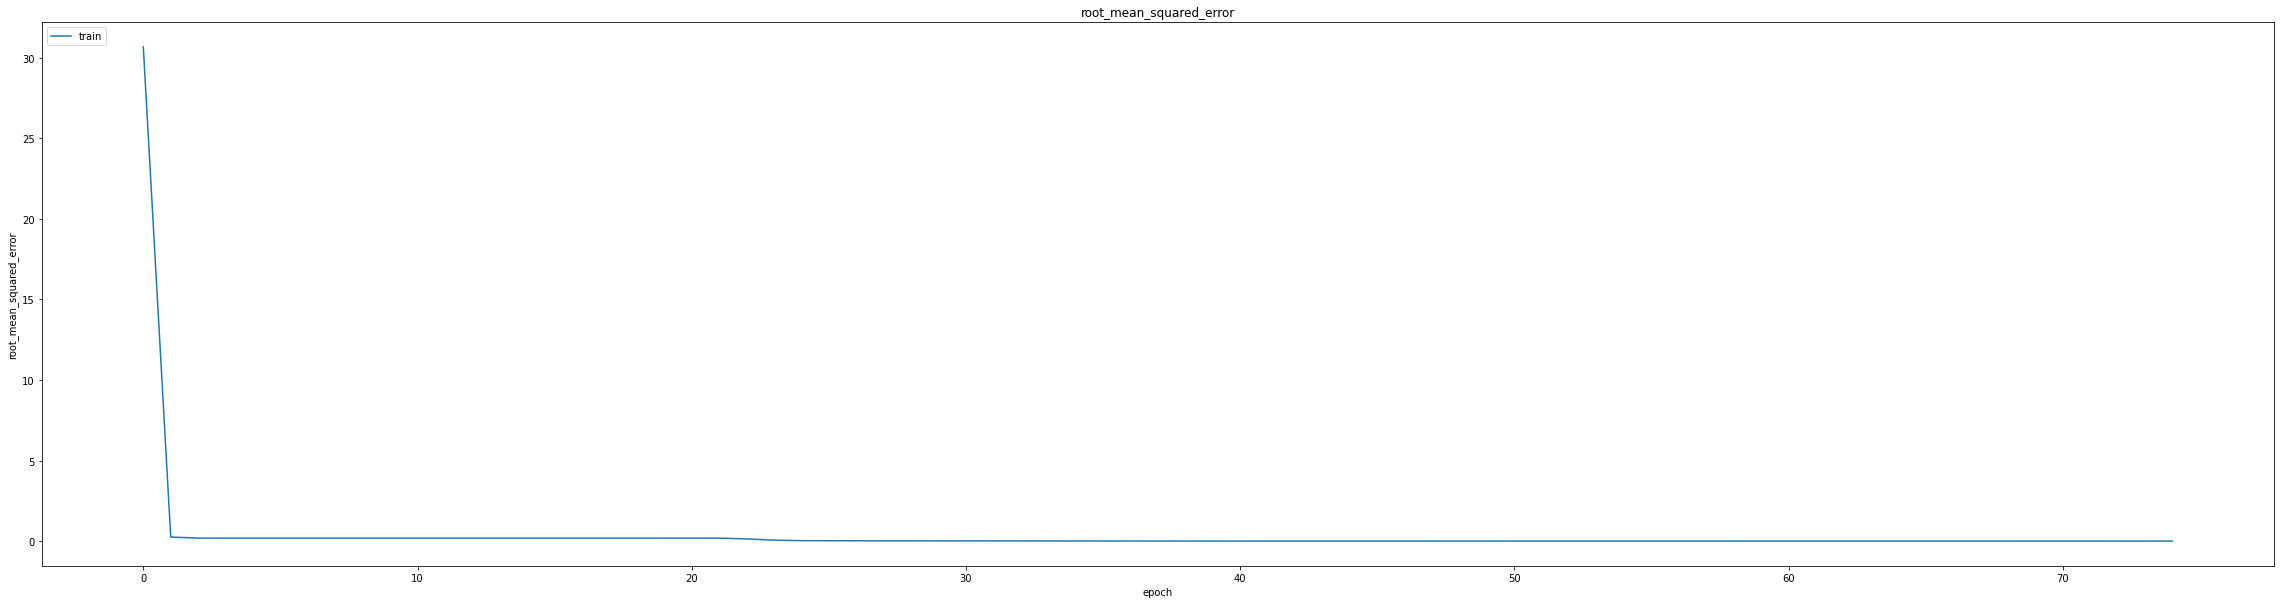

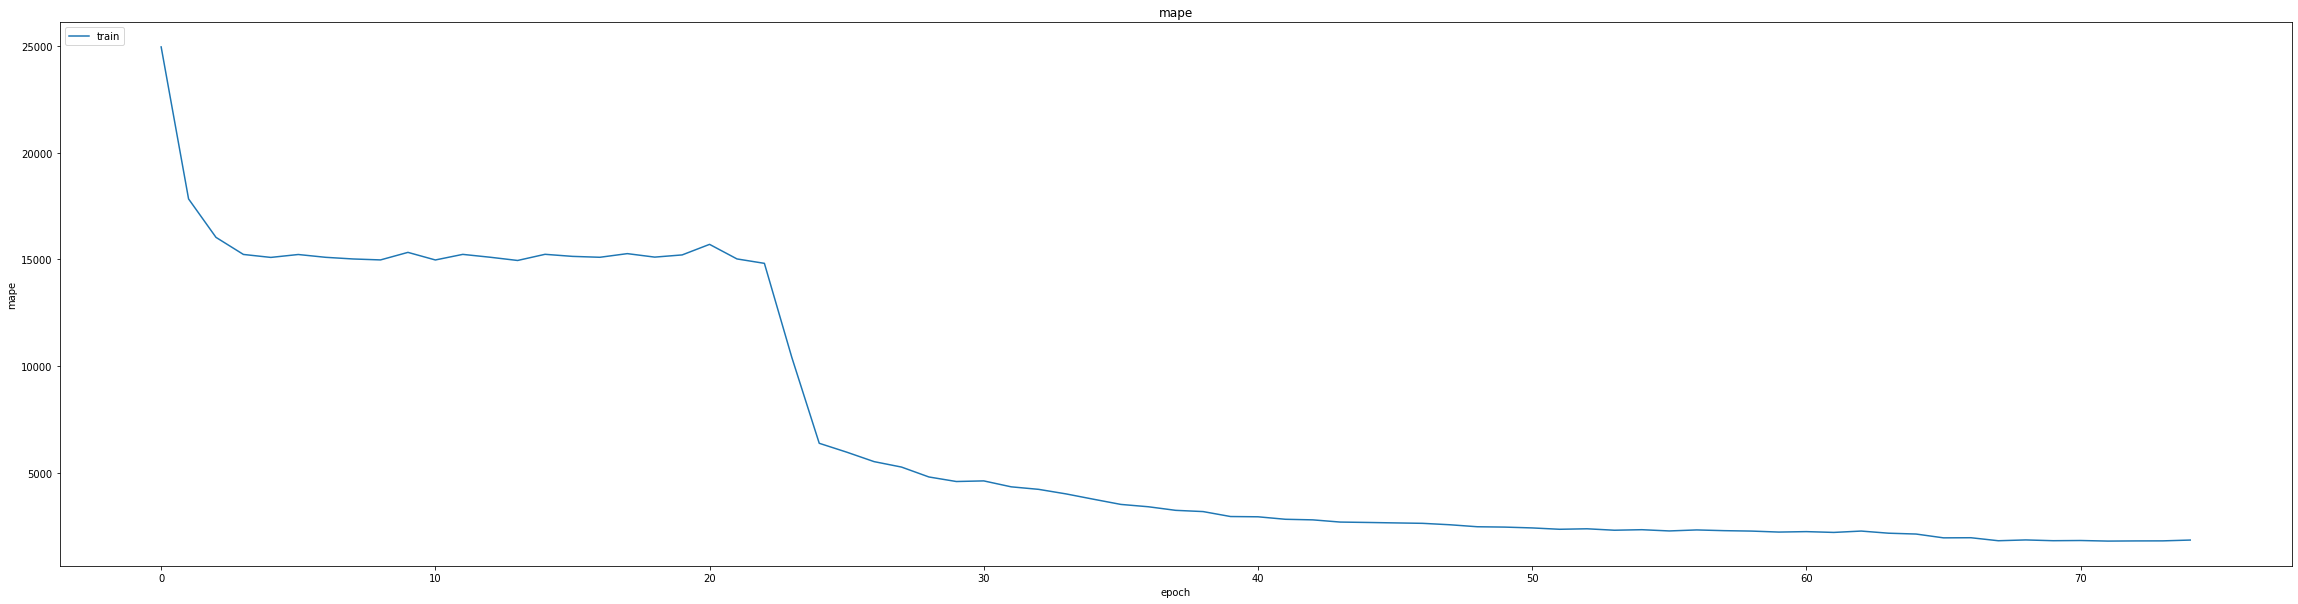

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007685781456530094
0.0110176932066679
464/464 [==============================] - 2s 4ms/step
0.9964210268976771


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
343/348 [============================>.] - ETA: 0s - loss: 3.0908e-04 - mae: 0.0083 - mse: 3.0908e-04 - root_mean_squared_error: 0.0176 - mape: 1866.5300
Epoch 1: val_mse did not improve from 0.00012
348/348 [==============================] - 8s 13ms/step - loss: 3.0530e-04 - mae: 0.0083 - mse: 3.0530e-04 - root_mean_squared_error: 0.0175 - mape: 1840.3607 - val_loss: 1.3969e-04 - val_mae: 0.0088 - val_mse: 1.3969e-04 - val_root_mean_squared_error: 0.0118 - val_mape: 5257.5137 - lr: 0.0010
Epoch 2/25
343/348 [============================>.] - ETA: 0s - loss: 3.2857e-05 - mae: 0.0043 - mse: 3.2857e-05 - root_mean_squared_error: 0.0057 - mape: 1796.9045
Epoch 2: val_mse did not improve from 0.00012
348/348 [==============================] - 4s 11ms/step - loss: 3.2796e-05 - mae: 0.0043 - mse: 3.2796e-05 - root_mean_squared_error: 0.0057 - mape: 1771.6945 - val_loss: 1.2633e-04 - val_mae: 0.0082 - val_mse: 1.2633e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 5091.1831 -

348/348 [==============================] - 12s 35ms/step - loss: 4.5860e-05 - mae: 0.0051 - mse: 4.5860e-05 - root_mean_squared_error: 0.0068 - mape: 1566.3456 - val_loss: 1.0399e-04 - val_mae: 0.0073 - val_mse: 1.0399e-04 - val_root_mean_squared_error: 0.0102 - val_mape: 4460.1997 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
344/348 [============================>.] - ETA: 0s - loss: 3.0509e-05 - mae: 0.0042 - mse: 3.0509e-05 - root_mean_squared_error: 0.0055 - mape: 1512.9784
Epoch 9: val_mse improved from 0.00010 to 0.00010, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 33ms/step - loss: 3.0597e-05 - mae: 0.0042 - mse: 3.0597e-05 - root_mean_squared_error: 0.0055 - mape: 1496.1016 - val_loss: 1.0197e-04 - val_mae: 0.0072 - val_mse: 1.0197e-04 - val_root_mean_squared_error: 0.0101 - val_mape: 4447.7915 - lr: 6.5610e-04
Epoch 10/25
348/348 [==============================] - ETA: 0s - loss: 3.2797e-05 - mae: 0.0044 - mse: 3.2797e-05 - root_mean_squared_error: 0.0057 - mape: 1445.6146
Epoch 10: val_mse did not improve from 0.00010
348/348 [==============================] - 4s 11ms/step - loss: 3.2797e-05 - mae: 0.0044 - mse: 3.2797e-05 - root_mean_squared_error: 0.0057 - mape: 1445.6146 - val_loss: 1.1747e-04 - val_mae: 0.0080 - val_mse: 1.1747e-04 - val_root_mean_squared_error: 0.0108 - val_mape: 4205.3174 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
346/348 [============================>.] - ETA: 0s - loss: 3.7799e-05 - mae: 0.0047 - mse: 3.7799e-05 - root_mean_squared_error: 0.0061 - ma

348/348 [==============================] - 12s 34ms/step - loss: 2.6763e-05 - mae: 0.0040 - mse: 2.6763e-05 - root_mean_squared_error: 0.0052 - mape: 1320.0267 - val_loss: 9.3015e-05 - val_mae: 0.0069 - val_mse: 9.3015e-05 - val_root_mean_squared_error: 0.0096 - val_mape: 3959.7571 - lr: 5.3144e-04
Epoch 14/25
343/348 [============================>.] - ETA: 0s - loss: 3.0743e-05 - mae: 0.0043 - mse: 3.0743e-05 - root_mean_squared_error: 0.0055 - mape: 1364.7039
Epoch 14: val_mse did not improve from 0.00009
348/348 [==============================] - 4s 11ms/step - loss: 3.0782e-05 - mae: 0.0043 - mse: 3.0782e-05 - root_mean_squared_error: 0.0055 - mape: 1345.5647 - val_loss: 9.3810e-05 - val_mae: 0.0069 - val_mse: 9.3810e-05 - val_root_mean_squared_error: 0.0097 - val_mape: 3793.7783 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
348/348 [==============================] - ETA: 0s - loss: 2.6815e-05 - mae: 0.0040 - mse: 2.6815e-05 - root_mean_squared_error: 0.0052 - m

348/348 [==============================] - 12s 34ms/step - loss: 2.1940e-05 - mae: 0.0036 - mse: 2.1940e-05 - root_mean_squared_error: 0.0047 - mape: 1155.6931 - val_loss: 8.9522e-05 - val_mae: 0.0070 - val_mse: 8.9522e-05 - val_root_mean_squared_error: 0.0095 - val_mape: 3021.4346 - lr: 3.8742e-04
Epoch 20/25
345/348 [============================>.] - ETA: 0s - loss: 2.1327e-05 - mae: 0.0035 - mse: 2.1327e-05 - root_mean_squared_error: 0.0046 - mape: 1076.4382
Epoch 20: val_mse did not improve from 0.00009
348/348 [==============================] - 4s 11ms/step - loss: 2.1307e-05 - mae: 0.0035 - mse: 2.1307e-05 - root_mean_squared_error: 0.0046 - mape: 1067.5231 - val_loss: 9.5610e-05 - val_mae: 0.0070 - val_mse: 9.5610e-05 - val_root_mean_squared_error: 0.0098 - val_mape: 3230.6931 - lr: 3.8742e-04
lr changed to 0.0003486784757114947
Epoch 21/25
346/348 [============================>.] - ETA: 0s - loss: 1.9412e-05 - mae: 0.0034 - mse: 1.9412e-05 - root_mean_squared_error: 0.0044 - ma

348/348 [==============================] - 12s 34ms/step - loss: 1.9448e-05 - mae: 0.0034 - mse: 1.9448e-05 - root_mean_squared_error: 0.0044 - mape: 1081.7615 - val_loss: 8.6371e-05 - val_mae: 0.0068 - val_mse: 8.6371e-05 - val_root_mean_squared_error: 0.0093 - val_mape: 3016.7336 - lr: 3.4868e-04
Epoch 22/25
346/348 [============================>.] - ETA: 0s - loss: 2.1594e-05 - mae: 0.0036 - mse: 2.1594e-05 - root_mean_squared_error: 0.0046 - mape: 913.5267
Epoch 22: val_mse did not improve from 0.00009
348/348 [==============================] - 4s 11ms/step - loss: 2.1566e-05 - mae: 0.0036 - mse: 2.1566e-05 - root_mean_squared_error: 0.0046 - mape: 908.5855 - val_loss: 8.8639e-05 - val_mae: 0.0069 - val_mse: 8.8639e-05 - val_root_mean_squared_error: 0.0094 - val_mape: 2773.8462 - lr: 3.4868e-04
lr changed to 0.00031381062290165574
Epoch 23/25
347/348 [============================>.] - ETA: 0s - loss: 1.8055e-05 - mae: 0.0032 - mse: 1.8055e-05 - root_mean_squared_error: 0.0042 - map

348/348 [==============================] - 12s 34ms/step - loss: 1.8040e-05 - mae: 0.0032 - mse: 1.8040e-05 - root_mean_squared_error: 0.0042 - mape: 946.4673 - val_loss: 8.3351e-05 - val_mae: 0.0066 - val_mse: 8.3351e-05 - val_root_mean_squared_error: 0.0091 - val_mape: 2930.9639 - lr: 3.1381e-04
Epoch 24/25
347/348 [============================>.] - ETA: 0s - loss: 1.9312e-05 - mae: 0.0034 - mse: 1.9312e-05 - root_mean_squared_error: 0.0044 - mape: 883.7880
Epoch 24: val_mse improved from 0.00008 to 0.00008, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 1.9307e-05 - mae: 0.0034 - mse: 1.9307e-05 - root_mean_squared_error: 0.0044 - mape: 881.5467 - val_loss: 7.9874e-05 - val_mae: 0.0065 - val_mse: 7.9874e-05 - val_root_mean_squared_error: 0.0089 - val_mape: 2789.7043 - lr: 3.1381e-04
lr changed to 0.0002824295632308349
Epoch 25/25
343/348 [============================>.] - ETA: 0s - loss: 1.7767e-05 - mae: 0.0032 - mse: 1.7767e-05 - root_mean_squared_error: 0.0042 - mape: 968.7651
Epoch 25: val_mse did not improve from 0.00008
348/348 [==============================] - 4s 11ms/step - loss: 1.7778e-05 - mae: 0.0032 - mse: 1.7778e-05 - root_mean_squared_error: 0.0042 - mape: 955.1768 - val_loss: 9.4955e-05 - val_mae: 0.0072 - val_mse: 9.4955e-05 - val_root_mean_squared_error: 0.0097 - val_mape: 2801.2224 - lr: 2.8243e-04


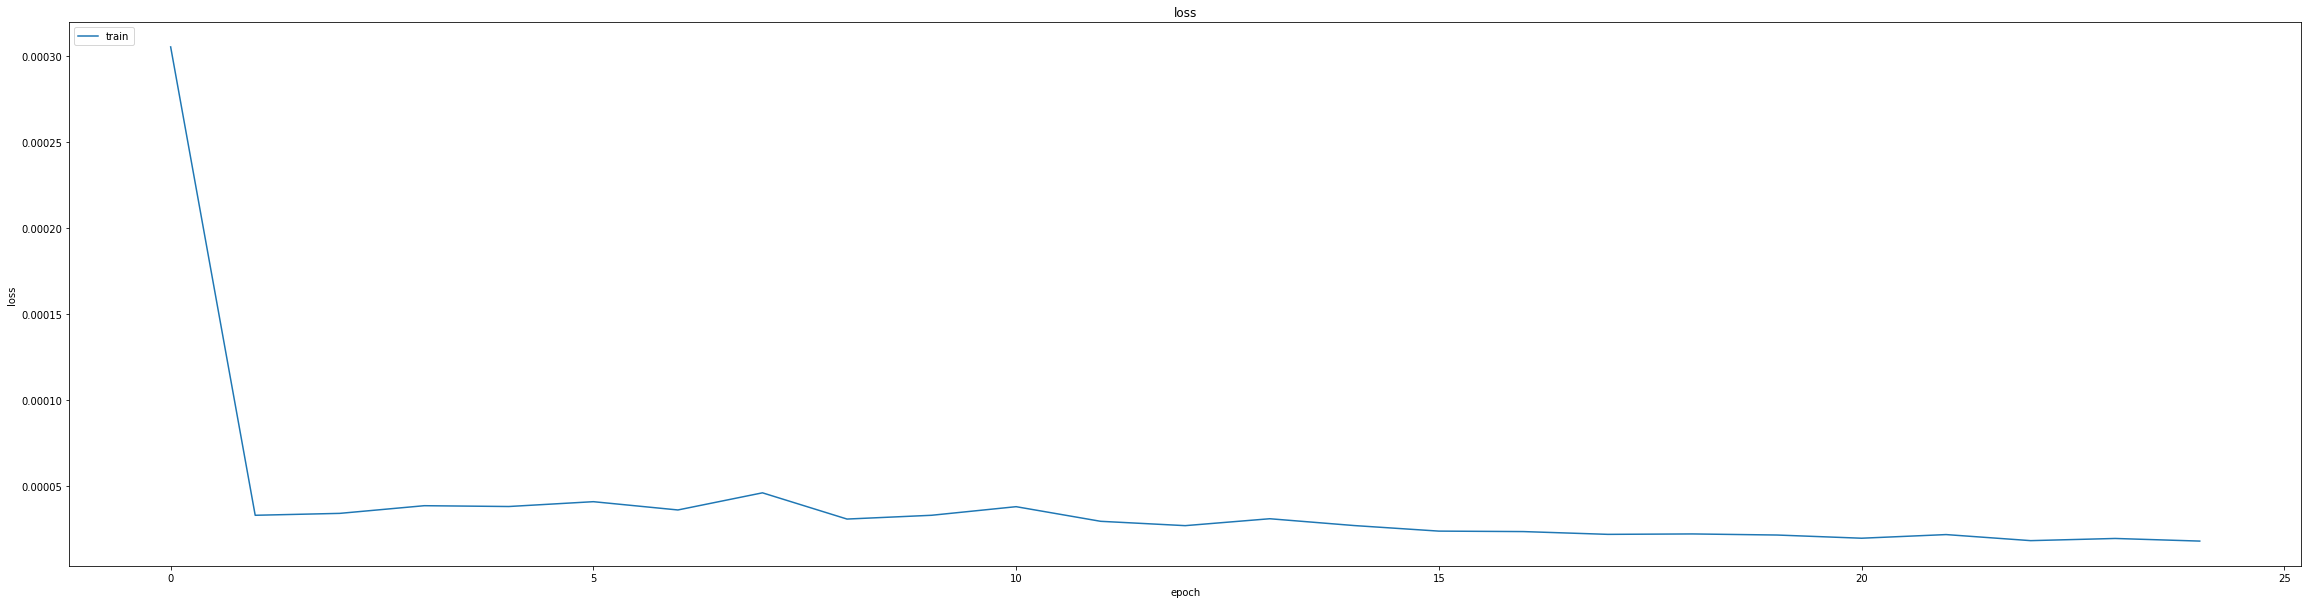

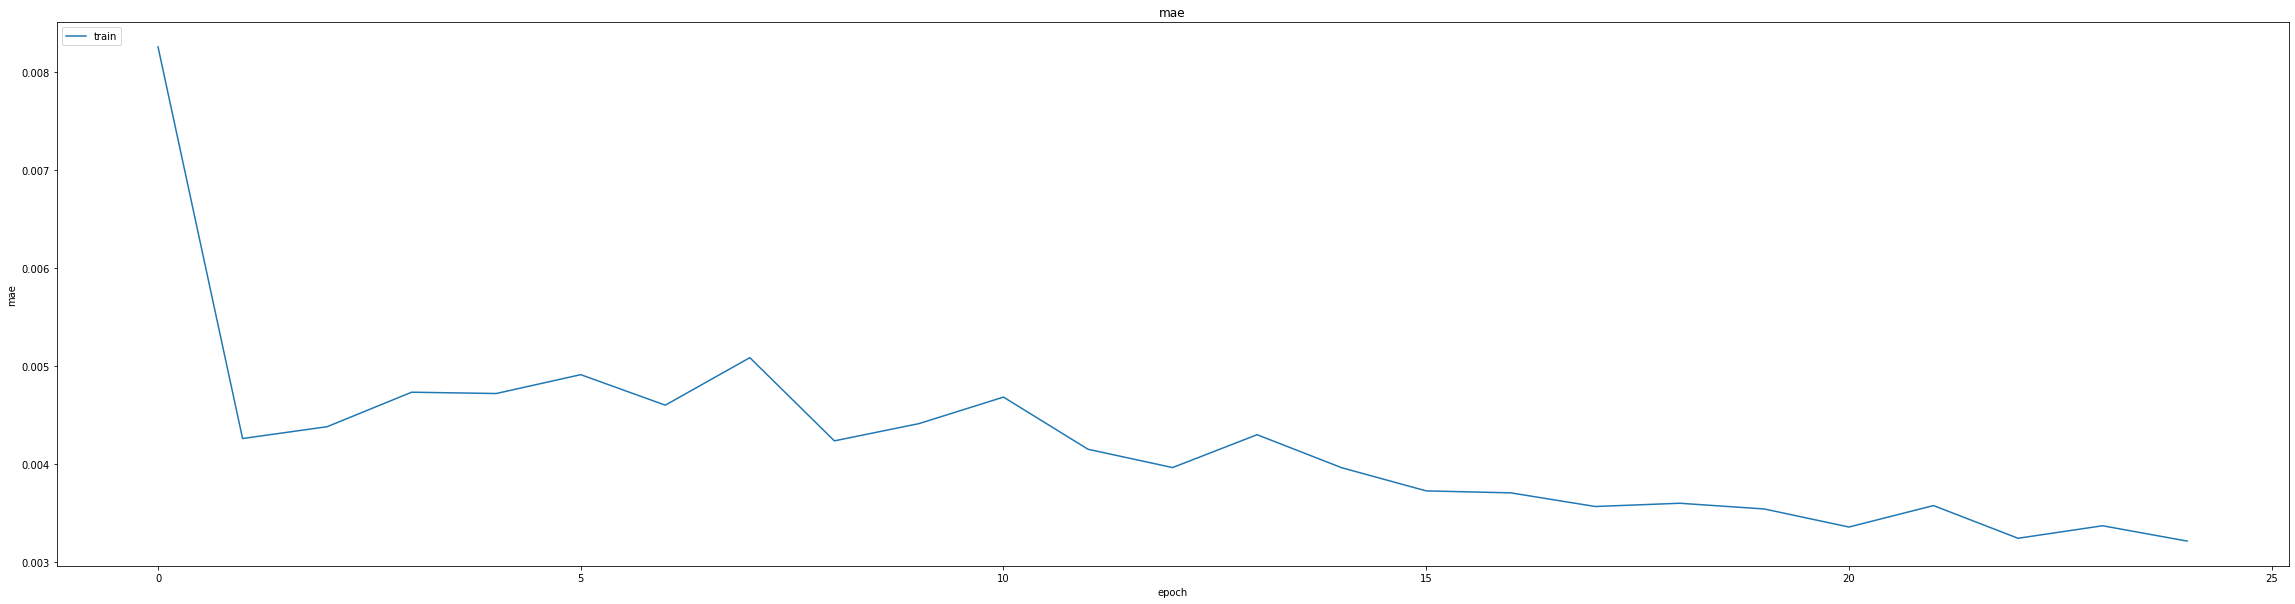

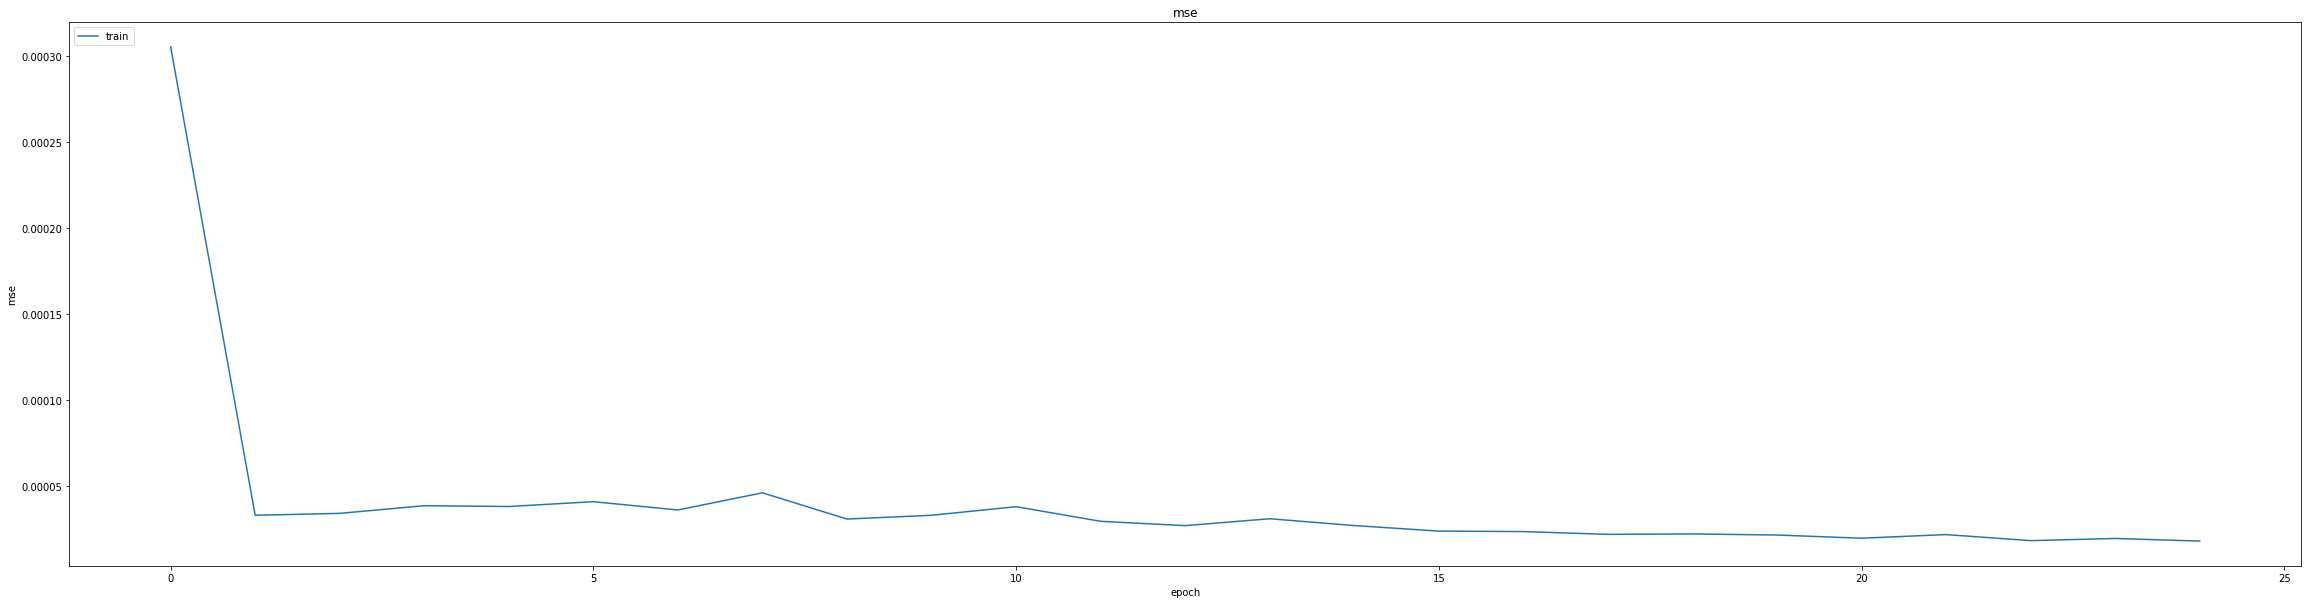

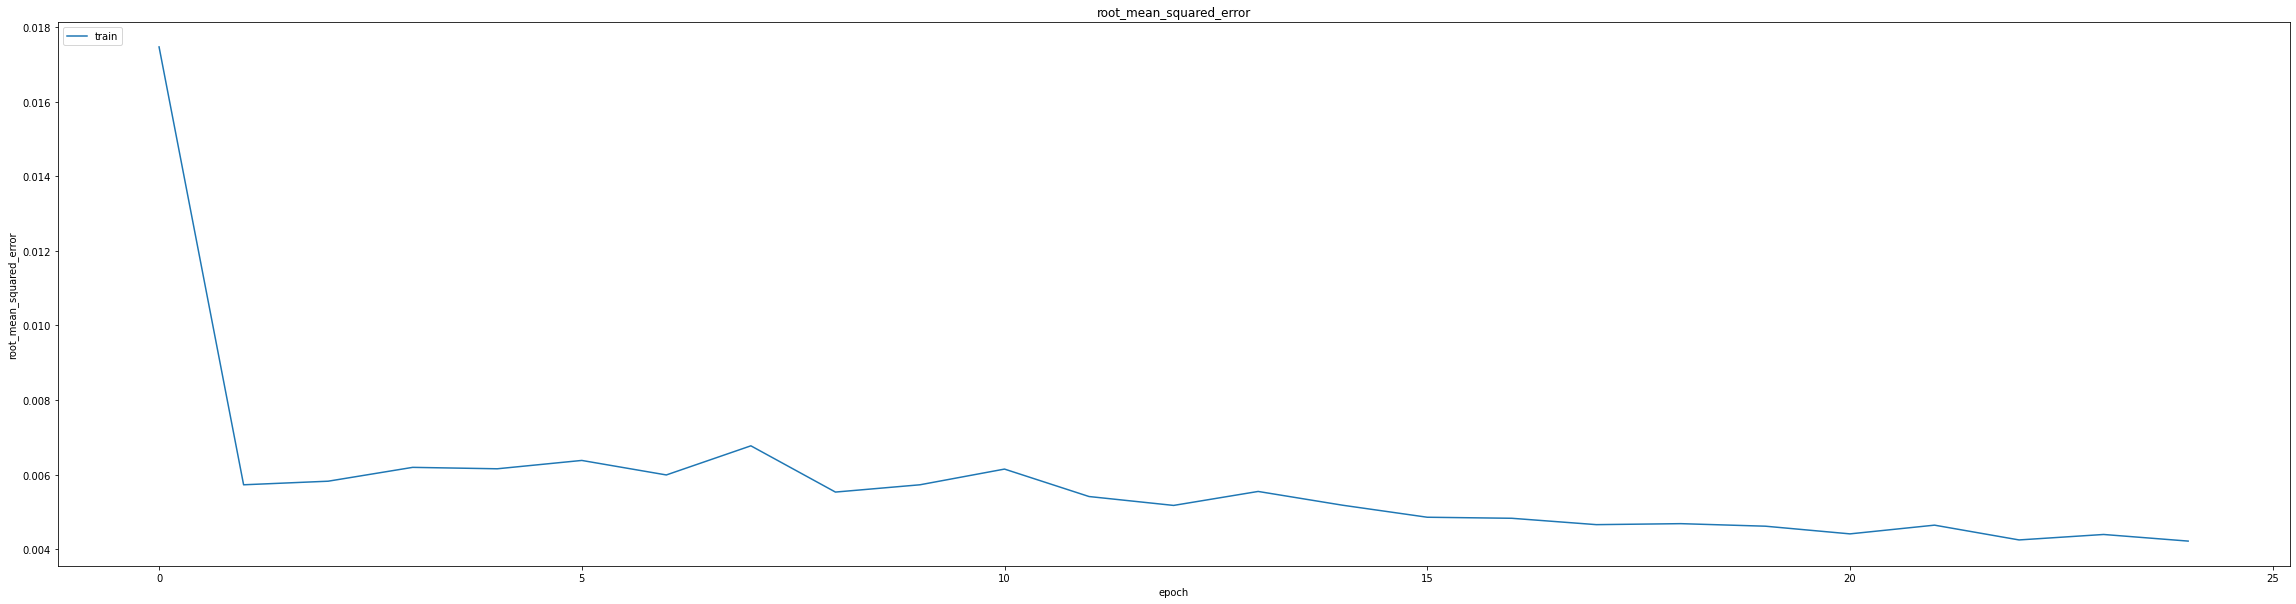

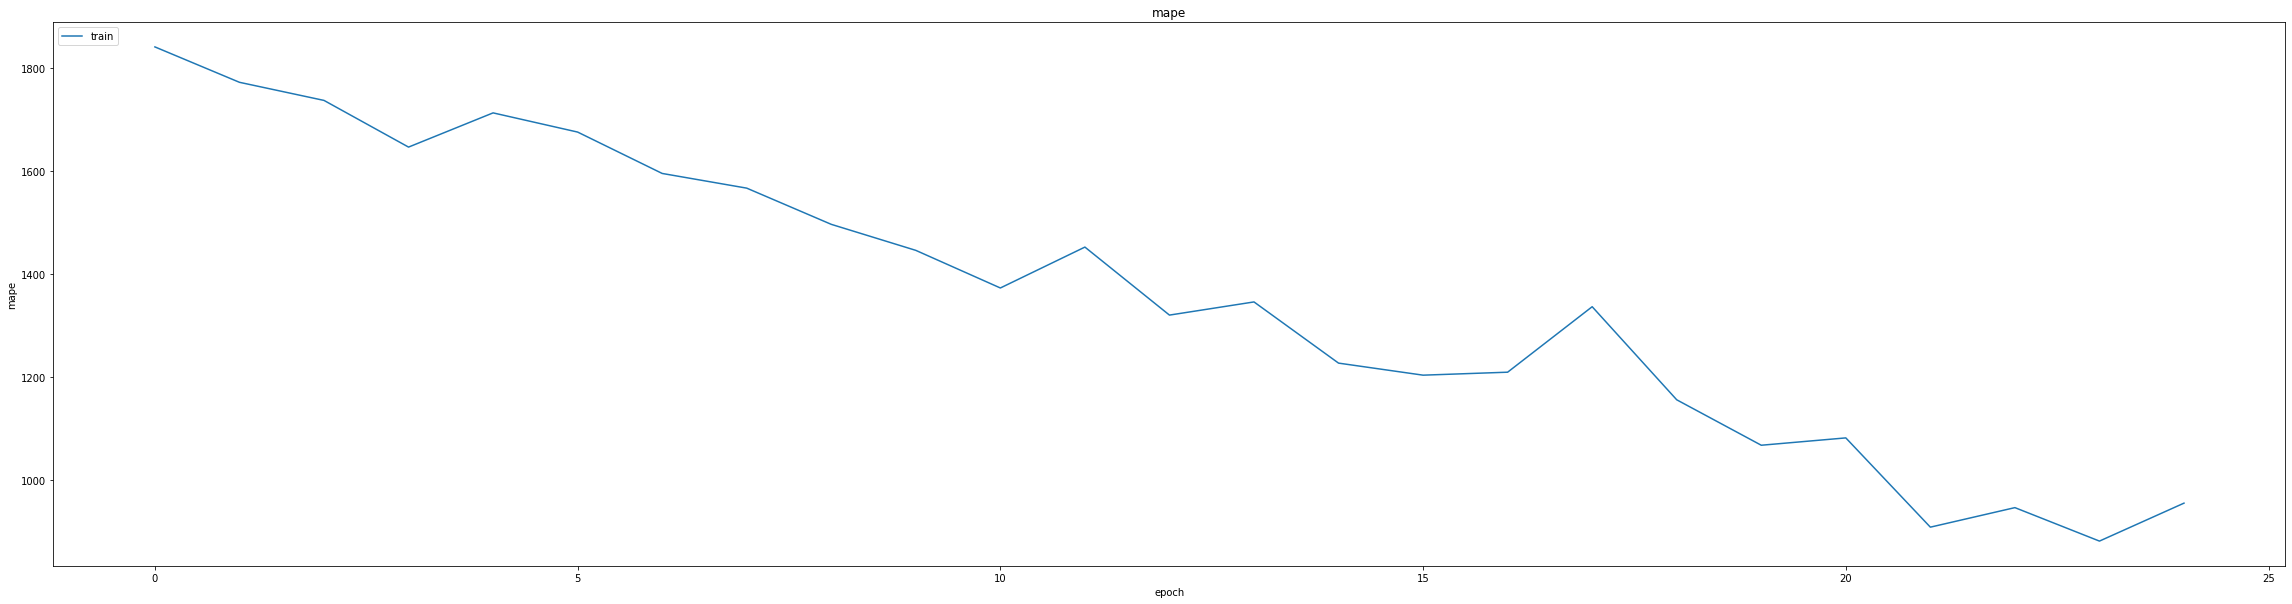

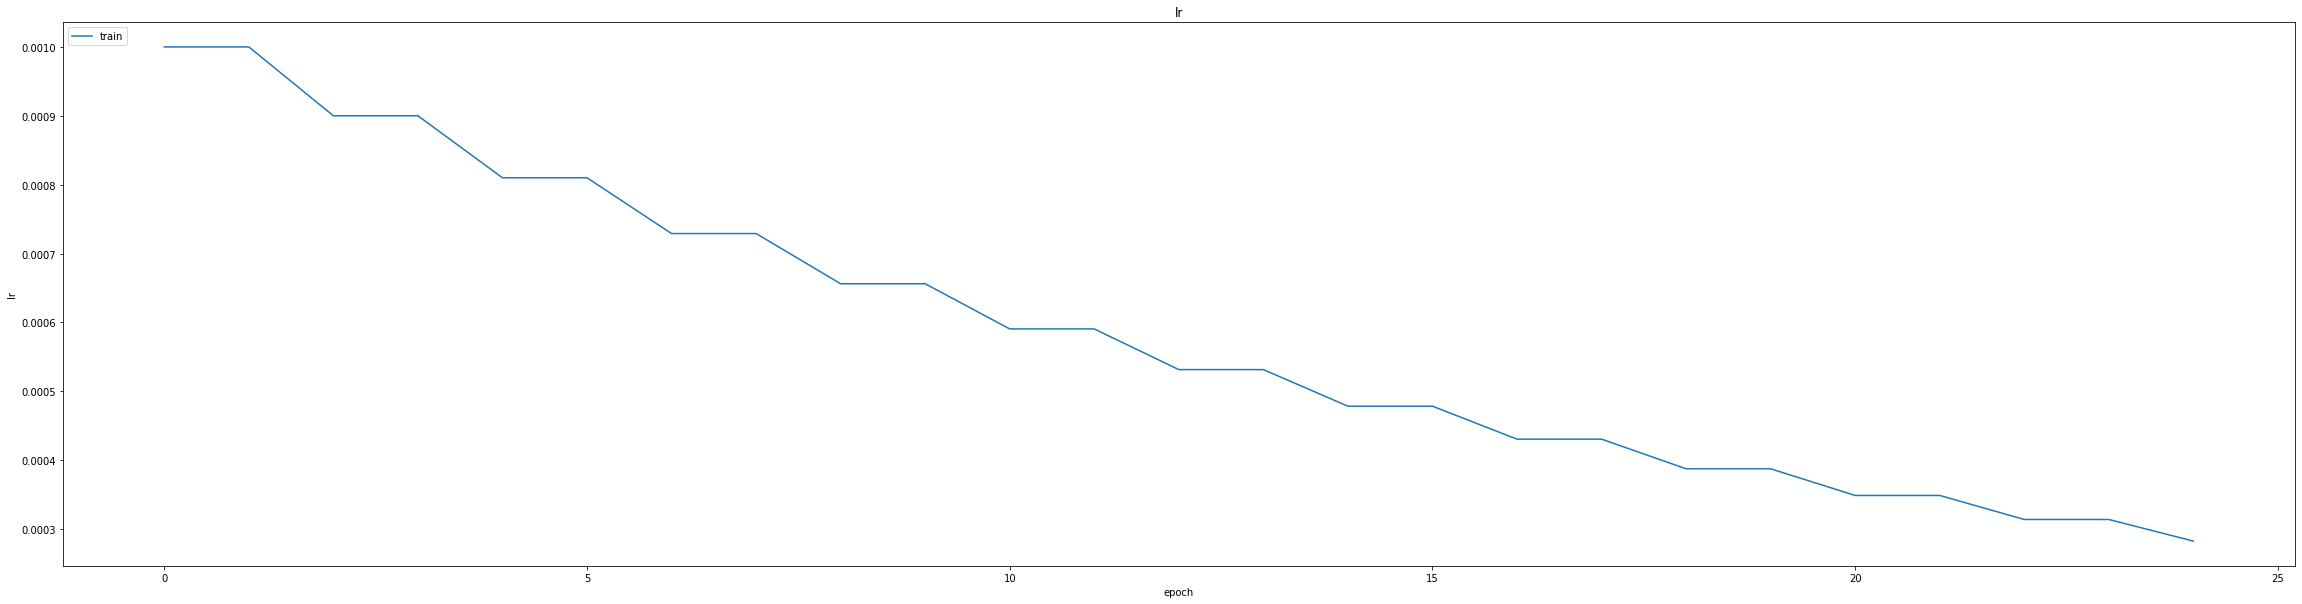

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0065175993368029594
0.008937227539718151
464/464 [==============================] - 2s 4ms/step
0.9974363781249594


464/464 [==============================] - 2s 4ms/step


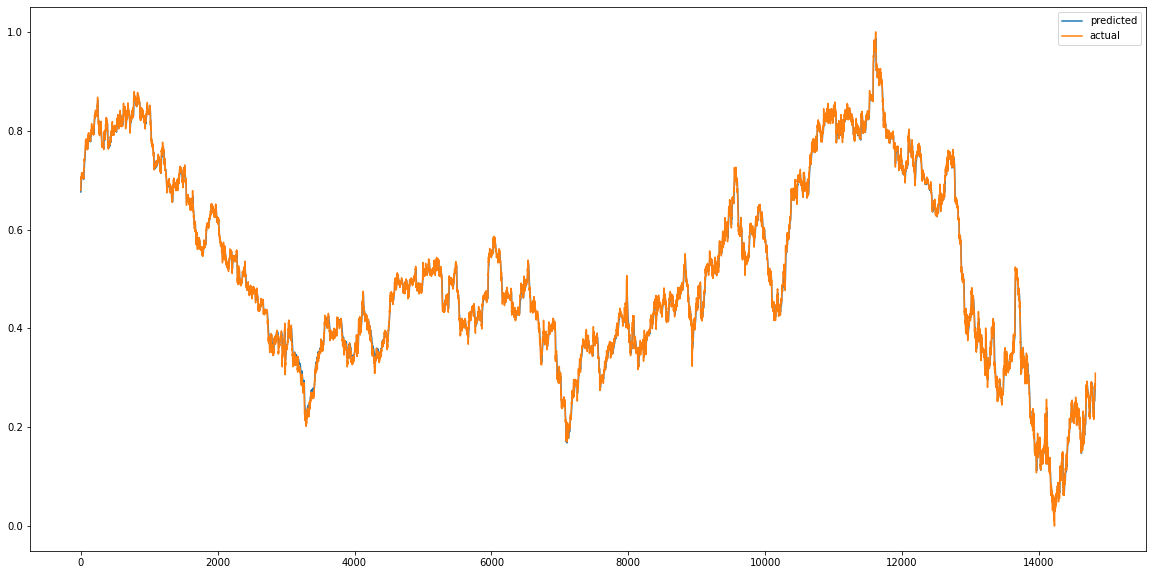

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


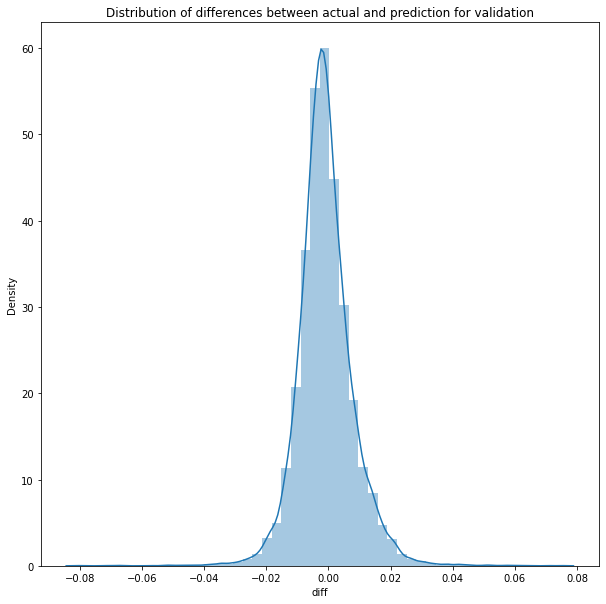

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


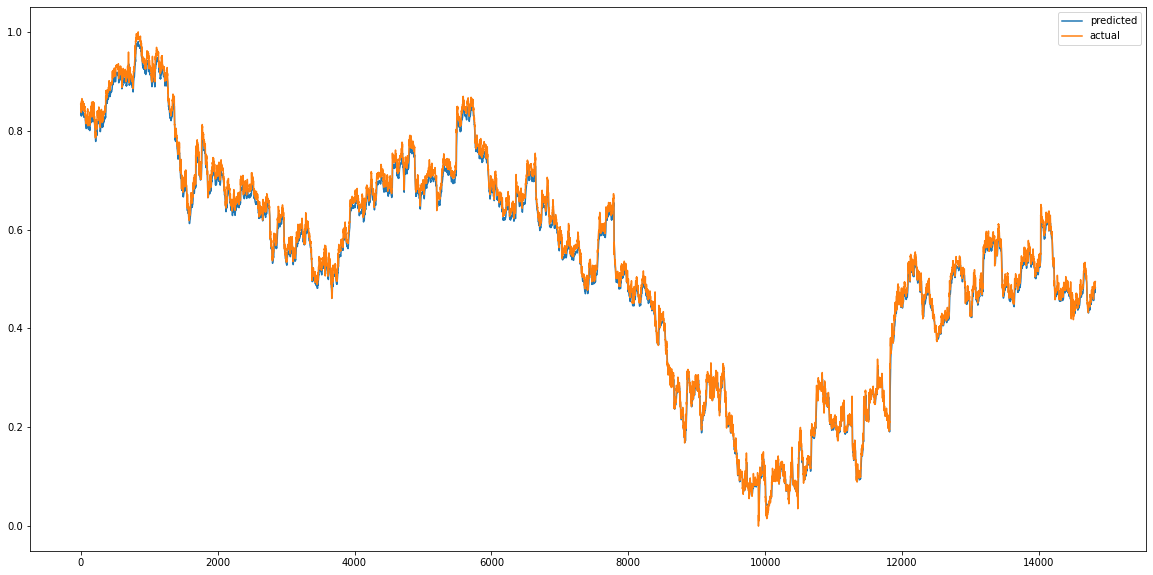

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


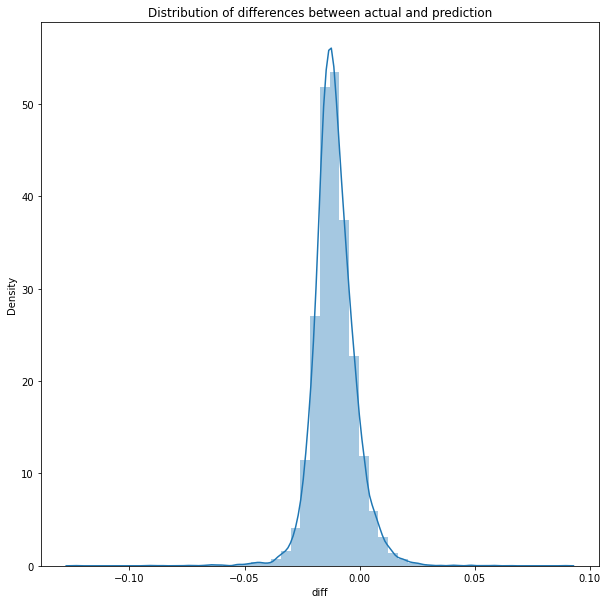

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00020451331967664307
RMSE :  0.014300815350064592
MAE :  0.012194931885745011
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.9959444860860934


count    14827.000000
mean        -0.010985
std          0.009157
min         -0.123457
25%         -0.016129
50%         -0.011621
75%         -0.006160
max          0.088857
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru (GRU)                   (None, 24, 256)           247296    
                                                                 
 dropout_2 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
346/348 [============================>.] - ETA: 0s - loss: 261.6801 - mae: 2.1197 - mse: 261.6801 - root_mean_squared_error: 16.1765 - mape: 7903.7349
Epoch 1: val_mse improved from inf to 0.00451, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 16s 36ms/step - loss: 260.2638 - mae: 2.1085 - mse: 260.2638 - root_mean_squared_error: 16.1327 - mape: 7861.0151 - val_loss: 0.0045 - val_mae: 0.0518 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0671 - val_mape: 16365.2178
Epoch 2/75
346/348 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0318 - mse: 0.0018 - root_mean_squared_error: 0.0419 - mape: 5871.9297
Epoch 2: val_mse improved from 0.00451 to 0.00068, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 0.0018 - mae: 0.0317 - mse: 0.0018 - root_mean_squared_error: 0.0419 - mape: 5840.1802 - val_loss: 6.8346e-04 - val_mae: 0.0180 - val_mse: 6.8346e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 12581.6279
Epoch 3/75
348/348 [==============================] - ETA: 0s - loss: 6.1638e-04 - mae: 0.0189 - mse: 6.1638e-04 - root_mean_squared_error: 0.0248 - mape: 4383.5532
Epoch 3: val_mse improved from 0.00068 to 0.00061, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 6.1638e-04 - mae: 0.0189 - mse: 6.1638e-04 - root_mean_squared_error: 0.0248 - mape: 4383.5532 - val_loss: 6.0746e-04 - val_mae: 0.0169 - val_mse: 6.0746e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 12435.4883
Epoch 4/75
346/348 [============================>.] - ETA: 0s - loss: 4.7989e-04 - mae: 0.0165 - mse: 4.7989e-04 - root_mean_squared_error: 0.0219 - mape: 4122.7910
Epoch 4: val_mse improved from 0.00061 to 0.00060, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 4.7961e-04 - mae: 0.0165 - mse: 4.7961e-04 - root_mean_squared_error: 0.0219 - mape: 4100.4937 - val_loss: 5.9900e-04 - val_mae: 0.0167 - val_mse: 5.9900e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 12206.7666
Epoch 5/75
348/348 [==============================] - ETA: 0s - loss: 4.2255e-04 - mae: 0.0153 - mse: 4.2255e-04 - root_mean_squared_error: 0.0206 - mape: 4163.3223
Epoch 5: val_mse improved from 0.00060 to 0.00058, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 4.2255e-04 - mae: 0.0153 - mse: 4.2255e-04 - root_mean_squared_error: 0.0206 - mape: 4163.3223 - val_loss: 5.7812e-04 - val_mae: 0.0167 - val_mse: 5.7812e-04 - val_root_mean_squared_error: 0.0240 - val_mape: 12011.2451
Epoch 6/75
346/348 [============================>.] - ETA: 0s - loss: 3.7524e-04 - mae: 0.0144 - mse: 3.7524e-04 - root_mean_squared_error: 0.0194 - mape: 4117.6387
Epoch 6: val_mse improved from 0.00058 to 0.00057, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 3.7477e-04 - mae: 0.0144 - mse: 3.7477e-04 - root_mean_squared_error: 0.0194 - mape: 4095.3672 - val_loss: 5.6811e-04 - val_mae: 0.0168 - val_mse: 5.6811e-04 - val_root_mean_squared_error: 0.0238 - val_mape: 12012.8994
Epoch 7/75
343/348 [============================>.] - ETA: 0s - loss: 3.4120e-04 - mae: 0.0137 - mse: 3.4120e-04 - root_mean_squared_error: 0.0185 - mape: 4013.3611
Epoch 7: val_mse improved from 0.00057 to 0.00053, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 3.4108e-04 - mae: 0.0137 - mse: 3.4108e-04 - root_mean_squared_error: 0.0185 - mape: 3957.0735 - val_loss: 5.2782e-04 - val_mae: 0.0159 - val_mse: 5.2782e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 11986.6475
Epoch 8/75
344/348 [============================>.] - ETA: 0s - loss: 3.1316e-04 - mae: 0.0131 - mse: 3.1316e-04 - root_mean_squared_error: 0.0177 - mape: 4010.0396
Epoch 8: val_mse improved from 0.00053 to 0.00051, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 3.1258e-04 - mae: 0.0131 - mse: 3.1258e-04 - root_mean_squared_error: 0.0177 - mape: 3965.3101 - val_loss: 5.0795e-04 - val_mae: 0.0156 - val_mse: 5.0795e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 11926.7266
Epoch 9/75
345/348 [============================>.] - ETA: 0s - loss: 2.8343e-04 - mae: 0.0124 - mse: 2.8343e-04 - root_mean_squared_error: 0.0168 - mape: 4063.3523
Epoch 9: val_mse did not improve from 0.00051
348/348 [==============================] - 4s 10ms/step - loss: 2.8329e-04 - mae: 0.0124 - mse: 2.8329e-04 - root_mean_squared_error: 0.0168 - mape: 4029.7043 - val_loss: 5.0824e-04 - val_mae: 0.0157 - val_mse: 5.0824e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 11858.9072
Epoch 10/75
343/348 [============================>.] - ETA: 0s - loss: 2.7029e-04 - mae: 0.0121 - mse: 2.7029e-04 - root_mean_squared_error: 0.0164 - mape: 4032.1648
Epoch 10: val_mse did not improve from 0.00051
348/348 [

348/348 [==============================] - 11s 31ms/step - loss: 2.4807e-04 - mae: 0.0115 - mse: 2.4807e-04 - root_mean_squared_error: 0.0158 - mape: 3931.5715 - val_loss: 5.0290e-04 - val_mae: 0.0157 - val_mse: 5.0290e-04 - val_root_mean_squared_error: 0.0224 - val_mape: 11737.7080
Epoch 12/75
345/348 [============================>.] - ETA: 0s - loss: 2.3417e-04 - mae: 0.0112 - mse: 2.3417e-04 - root_mean_squared_error: 0.0153 - mape: 3952.2043
Epoch 12: val_mse did not improve from 0.00050
348/348 [==============================] - 4s 10ms/step - loss: 2.3415e-04 - mae: 0.0112 - mse: 2.3415e-04 - root_mean_squared_error: 0.0153 - mape: 3919.4758 - val_loss: 5.0525e-04 - val_mae: 0.0158 - val_mse: 5.0525e-04 - val_root_mean_squared_error: 0.0225 - val_mape: 11672.9736
Epoch 13/75
345/348 [============================>.] - ETA: 0s - loss: 2.2448e-04 - mae: 0.0109 - mse: 2.2448e-04 - root_mean_squared_error: 0.0150 - mape: 3851.0261
Epoch 13: val_mse did not improve from 0.00050
348/348

348/348 [==============================] - 10s 30ms/step - loss: 2.1069e-04 - mae: 0.0105 - mse: 2.1069e-04 - root_mean_squared_error: 0.0145 - mape: 3775.0447 - val_loss: 4.8471e-04 - val_mae: 0.0153 - val_mse: 4.8471e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 11503.1855
Epoch 15/75
344/348 [============================>.] - ETA: 0s - loss: 2.0066e-04 - mae: 0.0103 - mse: 2.0066e-04 - root_mean_squared_error: 0.0142 - mape: 3904.6370
Epoch 15: val_mse improved from 0.00048 to 0.00047, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 2.0028e-04 - mae: 0.0103 - mse: 2.0028e-04 - root_mean_squared_error: 0.0142 - mape: 3861.0767 - val_loss: 4.7056e-04 - val_mae: 0.0150 - val_mse: 4.7056e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 11401.2090
Epoch 16/75
347/348 [============================>.] - ETA: 0s - loss: 1.9029e-04 - mae: 0.0100 - mse: 1.9029e-04 - root_mean_squared_error: 0.0138 - mape: 3767.7021
Epoch 16: val_mse did not improve from 0.00047
348/348 [==============================] - 4s 10ms/step - loss: 1.9012e-04 - mae: 0.0100 - mse: 1.9012e-04 - root_mean_squared_error: 0.0138 - mape: 3758.1455 - val_loss: 5.1476e-04 - val_mae: 0.0162 - val_mse: 5.1476e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 11334.8555
Epoch 17/75
346/348 [============================>.] - ETA: 0s - loss: 1.8371e-04 - mae: 0.0098 - mse: 1.8371e-04 - root_mean_squared_error: 0.0136 - mape: 3783.9373
Epoch 17: val_mse did not improve from 0.00047
348/348

348/348 [==============================] - 11s 31ms/step - loss: 1.5647e-04 - mae: 0.0090 - mse: 1.5647e-04 - root_mean_squared_error: 0.0125 - mape: 3707.0530 - val_loss: 4.5809e-04 - val_mae: 0.0150 - val_mse: 4.5809e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 10855.9727
Epoch 21/75
345/348 [============================>.] - ETA: 0s - loss: 1.5068e-04 - mae: 0.0089 - mse: 1.5068e-04 - root_mean_squared_error: 0.0123 - mape: 3752.0315
Epoch 21: val_mse improved from 0.00046 to 0.00046, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 1.5112e-04 - mae: 0.0089 - mse: 1.5112e-04 - root_mean_squared_error: 0.0123 - mape: 3720.9883 - val_loss: 4.5608e-04 - val_mae: 0.0151 - val_mse: 4.5608e-04 - val_root_mean_squared_error: 0.0214 - val_mape: 10733.7061
Epoch 22/75
345/348 [============================>.] - ETA: 0s - loss: 1.4234e-04 - mae: 0.0086 - mse: 1.4234e-04 - root_mean_squared_error: 0.0119 - mape: 3537.0083
Epoch 22: val_mse improved from 0.00046 to 0.00045, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 1.4236e-04 - mae: 0.0086 - mse: 1.4236e-04 - root_mean_squared_error: 0.0119 - mape: 3507.7153 - val_loss: 4.5408e-04 - val_mae: 0.0152 - val_mse: 4.5408e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 10555.6826
Epoch 23/75
345/348 [============================>.] - ETA: 0s - loss: 1.3279e-04 - mae: 0.0083 - mse: 1.3279e-04 - root_mean_squared_error: 0.0115 - mape: 3587.9448
Epoch 23: val_mse improved from 0.00045 to 0.00043, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 12s 33ms/step - loss: 1.3331e-04 - mae: 0.0083 - mse: 1.3331e-04 - root_mean_squared_error: 0.0115 - mape: 3558.3003 - val_loss: 4.3124e-04 - val_mae: 0.0147 - val_mse: 4.3124e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 10385.7744
Epoch 24/75
344/348 [============================>.] - ETA: 0s - loss: 1.3240e-04 - mae: 0.0083 - mse: 1.3240e-04 - root_mean_squared_error: 0.0115 - mape: 3508.8164
Epoch 24: val_mse did not improve from 0.00043
348/348 [==============================] - 4s 11ms/step - loss: 1.3221e-04 - mae: 0.0083 - mse: 1.3221e-04 - root_mean_squared_error: 0.0115 - mape: 3469.6738 - val_loss: 4.3235e-04 - val_mae: 0.0149 - val_mse: 4.3235e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 10159.9863
Epoch 25/75
348/348 [==============================] - ETA: 0s - loss: 1.2009e-04 - mae: 0.0079 - mse: 1.2009e-04 - root_mean_squared_error: 0.0110 - mape: 3354.6409
Epoch 25: val_mse did not improve from 0.00043
348/348

348/348 [==============================] - 11s 31ms/step - loss: 1.1716e-04 - mae: 0.0079 - mse: 1.1716e-04 - root_mean_squared_error: 0.0108 - mape: 3319.4202 - val_loss: 4.1004e-04 - val_mae: 0.0145 - val_mse: 4.1004e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 9822.0664
Epoch 27/75
346/348 [============================>.] - ETA: 0s - loss: 1.1001e-04 - mae: 0.0076 - mse: 1.1001e-04 - root_mean_squared_error: 0.0105 - mape: 3297.0332
Epoch 27: val_mse improved from 0.00041 to 0.00040, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 1.0996e-04 - mae: 0.0076 - mse: 1.0996e-04 - root_mean_squared_error: 0.0105 - mape: 3279.1978 - val_loss: 4.0276e-04 - val_mae: 0.0145 - val_mse: 4.0276e-04 - val_root_mean_squared_error: 0.0201 - val_mape: 9617.8828
Epoch 28/75
344/348 [============================>.] - ETA: 0s - loss: 1.0367e-04 - mae: 0.0074 - mse: 1.0367e-04 - root_mean_squared_error: 0.0102 - mape: 3276.9666
Epoch 28: val_mse improved from 0.00040 to 0.00040, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 1.0365e-04 - mae: 0.0074 - mse: 1.0365e-04 - root_mean_squared_error: 0.0102 - mape: 3240.4102 - val_loss: 3.9637e-04 - val_mae: 0.0144 - val_mse: 3.9637e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 9484.8818
Epoch 29/75
343/348 [============================>.] - ETA: 0s - loss: 1.0098e-04 - mae: 0.0073 - mse: 1.0098e-04 - root_mean_squared_error: 0.0100 - mape: 3242.5059
Epoch 29: val_mse improved from 0.00040 to 0.00036, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 1.0137e-04 - mae: 0.0074 - mse: 1.0137e-04 - root_mean_squared_error: 0.0101 - mape: 3197.0278 - val_loss: 3.6159e-04 - val_mae: 0.0136 - val_mse: 3.6159e-04 - val_root_mean_squared_error: 0.0190 - val_mape: 9287.7109
Epoch 30/75
344/348 [============================>.] - ETA: 0s - loss: 9.7096e-05 - mae: 0.0072 - mse: 9.7096e-05 - root_mean_squared_error: 0.0099 - mape: 3088.7478
Epoch 30: val_mse did not improve from 0.00036
348/348 [==============================] - 4s 10ms/step - loss: 9.7219e-05 - mae: 0.0072 - mse: 9.7219e-05 - root_mean_squared_error: 0.0099 - mape: 3054.2998 - val_loss: 3.6676e-04 - val_mae: 0.0138 - val_mse: 3.6676e-04 - val_root_mean_squared_error: 0.0192 - val_mape: 9125.5029
Epoch 31/75
348/348 [==============================] - ETA: 0s - loss: 9.1877e-05 - mae: 0.0070 - mse: 9.1877e-05 - root_mean_squared_error: 0.0096 - mape: 3033.4026
Epoch 31: val_mse did not improve from 0.00036
348/348 [

348/348 [==============================] - 10s 29ms/step - loss: 8.6403e-05 - mae: 0.0068 - mse: 8.6403e-05 - root_mean_squared_error: 0.0093 - mape: 2933.9395 - val_loss: 3.3336e-04 - val_mae: 0.0132 - val_mse: 3.3336e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 8729.7188
Epoch 33/75
344/348 [============================>.] - ETA: 0s - loss: 7.9634e-05 - mae: 0.0066 - mse: 7.9634e-05 - root_mean_squared_error: 0.0089 - mape: 2802.3440
Epoch 33: val_mse did not improve from 0.00033
348/348 [==============================] - 4s 10ms/step - loss: 7.9584e-05 - mae: 0.0066 - mse: 7.9584e-05 - root_mean_squared_error: 0.0089 - mape: 2771.0811 - val_loss: 3.5109e-04 - val_mae: 0.0140 - val_mse: 3.5109e-04 - val_root_mean_squared_error: 0.0187 - val_mape: 8227.0078
Epoch 34/75
348/348 [==============================] - ETA: 0s - loss: 7.5102e-05 - mae: 0.0064 - mse: 7.5102e-05 - root_mean_squared_error: 0.0087 - mape: 2715.7021
Epoch 34: val_mse did not improve from 0.00033
348/348 [

348/348 [==============================] - 11s 31ms/step - loss: 7.0385e-05 - mae: 0.0063 - mse: 7.0385e-05 - root_mean_squared_error: 0.0084 - mape: 2668.5627 - val_loss: 3.1826e-04 - val_mae: 0.0133 - val_mse: 3.1826e-04 - val_root_mean_squared_error: 0.0178 - val_mape: 7606.9736
Epoch 36/75
344/348 [============================>.] - ETA: 0s - loss: 6.7352e-05 - mae: 0.0062 - mse: 6.7352e-05 - root_mean_squared_error: 0.0082 - mape: 2625.0337
Epoch 36: val_mse improved from 0.00032 to 0.00029, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 6.7145e-05 - mae: 0.0062 - mse: 6.7145e-05 - root_mean_squared_error: 0.0082 - mape: 2595.7468 - val_loss: 2.9022e-04 - val_mae: 0.0126 - val_mse: 2.9022e-04 - val_root_mean_squared_error: 0.0170 - val_mape: 7404.8999
Epoch 37/75
348/348 [==============================] - ETA: 0s - loss: 6.3048e-05 - mae: 0.0060 - mse: 6.3048e-05 - root_mean_squared_error: 0.0079 - mape: 2537.4260
Epoch 37: val_mse improved from 0.00029 to 0.00028, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 6.3048e-05 - mae: 0.0060 - mse: 6.3048e-05 - root_mean_squared_error: 0.0079 - mape: 2537.4260 - val_loss: 2.8144e-04 - val_mae: 0.0125 - val_mse: 2.8144e-04 - val_root_mean_squared_error: 0.0168 - val_mape: 7231.9126
Epoch 38/75
347/348 [============================>.] - ETA: 0s - loss: 6.4713e-05 - mae: 0.0061 - mse: 6.4713e-05 - root_mean_squared_error: 0.0080 - mape: 2459.5327
Epoch 38: val_mse improved from 0.00028 to 0.00028, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 6.4901e-05 - mae: 0.0061 - mse: 6.4901e-05 - root_mean_squared_error: 0.0081 - mape: 2453.3262 - val_loss: 2.7818e-04 - val_mae: 0.0125 - val_mse: 2.7818e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 7093.5127
Epoch 39/75
343/348 [============================>.] - ETA: 0s - loss: 5.8770e-05 - mae: 0.0058 - mse: 5.8770e-05 - root_mean_squared_error: 0.0077 - mape: 2550.1157
Epoch 39: val_mse improved from 0.00028 to 0.00024, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 5.8707e-05 - mae: 0.0058 - mse: 5.8707e-05 - root_mean_squared_error: 0.0077 - mape: 2514.3379 - val_loss: 2.3580e-04 - val_mae: 0.0112 - val_mse: 2.3580e-04 - val_root_mean_squared_error: 0.0154 - val_mape: 6907.6802
Epoch 40/75
348/348 [==============================] - ETA: 0s - loss: 5.9710e-05 - mae: 0.0059 - mse: 5.9710e-05 - root_mean_squared_error: 0.0077 - mape: 2368.0244
Epoch 40: val_mse improved from 0.00024 to 0.00023, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 5.9710e-05 - mae: 0.0059 - mse: 5.9710e-05 - root_mean_squared_error: 0.0077 - mape: 2368.0244 - val_loss: 2.3142e-04 - val_mae: 0.0111 - val_mse: 2.3142e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 6838.7866
Epoch 41/75
344/348 [============================>.] - ETA: 0s - loss: 6.8429e-05 - mae: 0.0063 - mse: 6.8429e-05 - root_mean_squared_error: 0.0083 - mape: 2297.8777
Epoch 41: val_mse did not improve from 0.00023
348/348 [==============================] - 4s 10ms/step - loss: 6.8271e-05 - mae: 0.0063 - mse: 6.8271e-05 - root_mean_squared_error: 0.0083 - mape: 2272.2424 - val_loss: 2.3543e-04 - val_mae: 0.0114 - val_mse: 2.3543e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 6717.1699
Epoch 42/75
344/348 [============================>.] - ETA: 0s - loss: 5.2105e-05 - mae: 0.0054 - mse: 5.2105e-05 - root_mean_squared_error: 0.0072 - mape: 2318.3853
Epoch 42: val_mse improved from 0.00023 to 0.00021, savi

348/348 [==============================] - 10s 30ms/step - loss: 5.2032e-05 - mae: 0.0054 - mse: 5.2032e-05 - root_mean_squared_error: 0.0072 - mape: 2292.5210 - val_loss: 2.1319e-04 - val_mae: 0.0107 - val_mse: 2.1319e-04 - val_root_mean_squared_error: 0.0146 - val_mape: 6611.7949
Epoch 43/75
343/348 [============================>.] - ETA: 0s - loss: 5.8454e-05 - mae: 0.0058 - mse: 5.8454e-05 - root_mean_squared_error: 0.0076 - mape: 2309.5300
Epoch 43: val_mse improved from 0.00021 to 0.00021, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 5.8396e-05 - mae: 0.0058 - mse: 5.8396e-05 - root_mean_squared_error: 0.0076 - mape: 2277.1355 - val_loss: 2.1157e-04 - val_mae: 0.0108 - val_mse: 2.1157e-04 - val_root_mean_squared_error: 0.0145 - val_mape: 6478.4121
Epoch 44/75
344/348 [============================>.] - ETA: 0s - loss: 5.9049e-05 - mae: 0.0059 - mse: 5.9049e-05 - root_mean_squared_error: 0.0077 - mape: 2221.5962
Epoch 44: val_mse did not improve from 0.00021
348/348 [==============================] - 4s 11ms/step - loss: 5.9089e-05 - mae: 0.0059 - mse: 5.9089e-05 - root_mean_squared_error: 0.0077 - mape: 2196.8127 - val_loss: 2.1826e-04 - val_mae: 0.0110 - val_mse: 2.1826e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 6358.1855
Epoch 45/75
348/348 [==============================] - ETA: 0s - loss: 5.2423e-05 - mae: 0.0055 - mse: 5.2423e-05 - root_mean_squared_error: 0.0072 - mape: 2175.2515
Epoch 45: val_mse improved from 0.00021 to 0.00021, savi

348/348 [==============================] - 11s 31ms/step - loss: 5.2423e-05 - mae: 0.0055 - mse: 5.2423e-05 - root_mean_squared_error: 0.0072 - mape: 2175.2515 - val_loss: 2.0684e-04 - val_mae: 0.0106 - val_mse: 2.0684e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 6232.1440
Epoch 46/75
347/348 [============================>.] - ETA: 0s - loss: 6.0190e-05 - mae: 0.0059 - mse: 6.0190e-05 - root_mean_squared_error: 0.0078 - mape: 2118.1606
Epoch 46: val_mse improved from 0.00021 to 0.00018, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 6.0096e-05 - mae: 0.0059 - mse: 6.0096e-05 - root_mean_squared_error: 0.0078 - mape: 2112.7874 - val_loss: 1.8481e-04 - val_mae: 0.0099 - val_mse: 1.8481e-04 - val_root_mean_squared_error: 0.0136 - val_mape: 6118.8643
Epoch 47/75
348/348 [==============================] - ETA: 0s - loss: 5.3733e-05 - mae: 0.0056 - mse: 5.3733e-05 - root_mean_squared_error: 0.0073 - mape: 2100.9802
Epoch 47: val_mse improved from 0.00018 to 0.00017, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 5.3733e-05 - mae: 0.0056 - mse: 5.3733e-05 - root_mean_squared_error: 0.0073 - mape: 2100.9802 - val_loss: 1.7327e-04 - val_mae: 0.0096 - val_mse: 1.7327e-04 - val_root_mean_squared_error: 0.0132 - val_mape: 6018.9873
Epoch 48/75
347/348 [============================>.] - ETA: 0s - loss: 5.6566e-05 - mae: 0.0058 - mse: 5.6566e-05 - root_mean_squared_error: 0.0075 - mape: 2107.5779
Epoch 48: val_mse did not improve from 0.00017
348/348 [==============================] - 4s 10ms/step - loss: 5.6546e-05 - mae: 0.0058 - mse: 5.6546e-05 - root_mean_squared_error: 0.0075 - mape: 2102.2317 - val_loss: 1.7764e-04 - val_mae: 0.0098 - val_mse: 1.7764e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 5855.5596
Epoch 49/75
344/348 [============================>.] - ETA: 0s - loss: 5.7395e-05 - mae: 0.0058 - mse: 5.7395e-05 - root_mean_squared_error: 0.0076 - mape: 2063.1296
Epoch 49: val_mse did not improve from 0.00017
348/348 [

348/348 [==============================] - 11s 31ms/step - loss: 7.2872e-05 - mae: 0.0066 - mse: 7.2872e-05 - root_mean_squared_error: 0.0085 - mape: 2032.6818 - val_loss: 1.6513e-04 - val_mae: 0.0094 - val_mse: 1.6513e-04 - val_root_mean_squared_error: 0.0129 - val_mape: 5687.8623
Epoch 51/75
343/348 [============================>.] - ETA: 0s - loss: 7.4610e-05 - mae: 0.0068 - mse: 7.4610e-05 - root_mean_squared_error: 0.0086 - mape: 2042.0966
Epoch 51: val_mse did not improve from 0.00017
348/348 [==============================] - 4s 10ms/step - loss: 7.5658e-05 - mae: 0.0068 - mse: 7.5658e-05 - root_mean_squared_error: 0.0087 - mape: 2013.4613 - val_loss: 2.1579e-04 - val_mae: 0.0113 - val_mse: 2.1579e-04 - val_root_mean_squared_error: 0.0147 - val_mape: 5563.1436
Epoch 52/75
346/348 [============================>.] - ETA: 0s - loss: 7.2347e-05 - mae: 0.0065 - mse: 7.2347e-05 - root_mean_squared_error: 0.0085 - mape: 1958.6790
Epoch 52: val_mse improved from 0.00017 to 0.00016, savi

348/348 [==============================] - 10s 30ms/step - loss: 7.2439e-05 - mae: 0.0065 - mse: 7.2439e-05 - root_mean_squared_error: 0.0085 - mape: 1948.0873 - val_loss: 1.6204e-04 - val_mae: 0.0094 - val_mse: 1.6204e-04 - val_root_mean_squared_error: 0.0127 - val_mape: 5512.8862
Epoch 53/75
348/348 [==============================] - ETA: 0s - loss: 6.9276e-05 - mae: 0.0064 - mse: 6.9276e-05 - root_mean_squared_error: 0.0083 - mape: 1955.5125
Epoch 53: val_mse did not improve from 0.00016
348/348 [==============================] - 4s 10ms/step - loss: 6.9276e-05 - mae: 0.0064 - mse: 6.9276e-05 - root_mean_squared_error: 0.0083 - mape: 1955.5125 - val_loss: 1.7779e-04 - val_mae: 0.0102 - val_mse: 1.7779e-04 - val_root_mean_squared_error: 0.0133 - val_mape: 5366.2607
Epoch 54/75
346/348 [============================>.] - ETA: 0s - loss: 7.8511e-05 - mae: 0.0070 - mse: 7.8511e-05 - root_mean_squared_error: 0.0089 - mape: 1912.8772
Epoch 54: val_mse did not improve from 0.00016
348/348 [

348/348 [==============================] - 11s 31ms/step - loss: 7.8524e-05 - mae: 0.0069 - mse: 7.8524e-05 - root_mean_squared_error: 0.0089 - mape: 1882.2362 - val_loss: 1.4941e-04 - val_mae: 0.0090 - val_mse: 1.4941e-04 - val_root_mean_squared_error: 0.0122 - val_mape: 5264.8003
Epoch 56/75
343/348 [============================>.] - ETA: 0s - loss: 7.1406e-05 - mae: 0.0066 - mse: 7.1406e-05 - root_mean_squared_error: 0.0085 - mape: 1874.4689
Epoch 56: val_mse did not improve from 0.00015
348/348 [==============================] - 4s 11ms/step - loss: 7.1659e-05 - mae: 0.0066 - mse: 7.1659e-05 - root_mean_squared_error: 0.0085 - mape: 1848.1852 - val_loss: 3.5747e-04 - val_mae: 0.0158 - val_mse: 3.5747e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 5262.6494
Epoch 57/75
348/348 [==============================] - ETA: 0s - loss: 9.0012e-05 - mae: 0.0070 - mse: 9.0012e-05 - root_mean_squared_error: 0.0095 - mape: 1901.3575
Epoch 57: val_mse did not improve from 0.00015
348/348 [

348/348 [==============================] - 11s 31ms/step - loss: 8.1598e-05 - mae: 0.0070 - mse: 8.1598e-05 - root_mean_squared_error: 0.0090 - mape: 1815.6648 - val_loss: 1.4613e-04 - val_mae: 0.0089 - val_mse: 1.4613e-04 - val_root_mean_squared_error: 0.0121 - val_mape: 5117.3184
Epoch 59/75
346/348 [============================>.] - ETA: 0s - loss: 9.9186e-05 - mae: 0.0078 - mse: 9.9186e-05 - root_mean_squared_error: 0.0100 - mape: 1812.2234
Epoch 59: val_mse improved from 0.00015 to 0.00014, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 9.9026e-05 - mae: 0.0078 - mse: 9.9026e-05 - root_mean_squared_error: 0.0100 - mape: 1802.4210 - val_loss: 1.4365e-04 - val_mae: 0.0088 - val_mse: 1.4365e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 5106.8350
Epoch 60/75
343/348 [============================>.] - ETA: 0s - loss: 5.9396e-05 - mae: 0.0060 - mse: 5.9396e-05 - root_mean_squared_error: 0.0077 - mape: 1820.1857
Epoch 60: val_mse improved from 0.00014 to 0.00014, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 5.8890e-05 - mae: 0.0060 - mse: 5.8890e-05 - root_mean_squared_error: 0.0077 - mape: 1794.6471 - val_loss: 1.3500e-04 - val_mae: 0.0085 - val_mse: 1.3500e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 5000.8164
Epoch 61/75
343/348 [============================>.] - ETA: 0s - loss: 9.0915e-05 - mae: 0.0069 - mse: 9.0915e-05 - root_mean_squared_error: 0.0095 - mape: 1797.0155
Epoch 61: val_mse did not improve from 0.00014
348/348 [==============================] - 4s 10ms/step - loss: 9.0418e-05 - mae: 0.0069 - mse: 9.0418e-05 - root_mean_squared_error: 0.0095 - mape: 1771.8141 - val_loss: 2.1987e-04 - val_mae: 0.0119 - val_mse: 2.1987e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 5060.1113
Epoch 62/75
345/348 [============================>.] - ETA: 0s - loss: 7.2306e-05 - mae: 0.0066 - mse: 7.2306e-05 - root_mean_squared_error: 0.0085 - mape: 1753.1486
Epoch 62: val_mse did not improve from 0.00014
348/348 [

348/348 [==============================] - 11s 31ms/step - loss: 6.7062e-05 - mae: 0.0064 - mse: 6.7062e-05 - root_mean_squared_error: 0.0082 - mape: 1684.5909 - val_loss: 1.2589e-04 - val_mae: 0.0083 - val_mse: 1.2589e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 4570.1270
Epoch 70/75
347/348 [============================>.] - ETA: 0s - loss: 6.4699e-05 - mae: 0.0062 - mse: 6.4699e-05 - root_mean_squared_error: 0.0080 - mape: 1591.7794
Epoch 70: val_mse did not improve from 0.00013
348/348 [==============================] - 4s 10ms/step - loss: 6.4572e-05 - mae: 0.0062 - mse: 6.4572e-05 - root_mean_squared_error: 0.0080 - mape: 1587.7412 - val_loss: 1.7834e-04 - val_mae: 0.0106 - val_mse: 1.7834e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 4554.5229
Epoch 71/75
348/348 [==============================] - ETA: 0s - loss: 5.1946e-05 - mae: 0.0056 - mse: 5.1946e-05 - root_mean_squared_error: 0.0072 - mape: 1574.1786
Epoch 71: val_mse did not improve from 0.00013
348/348 [

348/348 [==============================] - 11s 31ms/step - loss: 5.7367e-05 - mae: 0.0059 - mse: 5.7367e-05 - root_mean_squared_error: 0.0076 - mape: 1377.0447 - val_loss: 1.1971e-04 - val_mae: 0.0082 - val_mse: 1.1971e-04 - val_root_mean_squared_error: 0.0109 - val_mape: 4096.4985
Epoch 75/75
346/348 [============================>.] - ETA: 0s - loss: 5.1420e-05 - mae: 0.0055 - mse: 5.1420e-05 - root_mean_squared_error: 0.0072 - mape: 1393.1849
Epoch 75: val_mse did not improve from 0.00012
348/348 [==============================] - 4s 11ms/step - loss: 5.1883e-05 - mae: 0.0055 - mse: 5.1883e-05 - root_mean_squared_error: 0.0072 - mape: 1385.6539 - val_loss: 2.2393e-04 - val_mae: 0.0122 - val_mse: 2.2393e-04 - val_root_mean_squared_error: 0.0150 - val_mape: 3903.2422


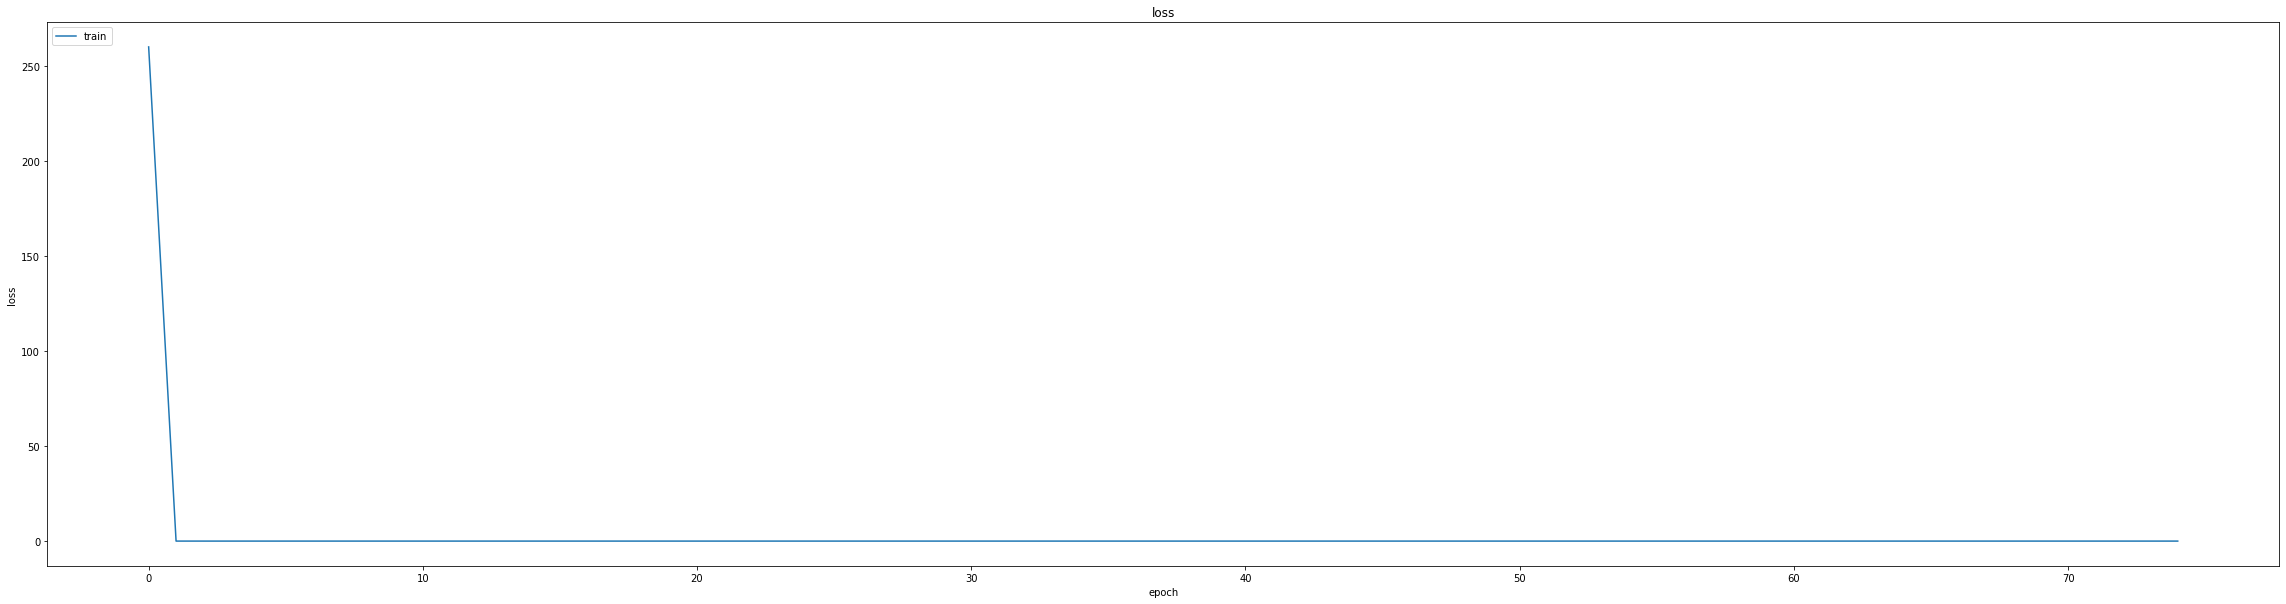

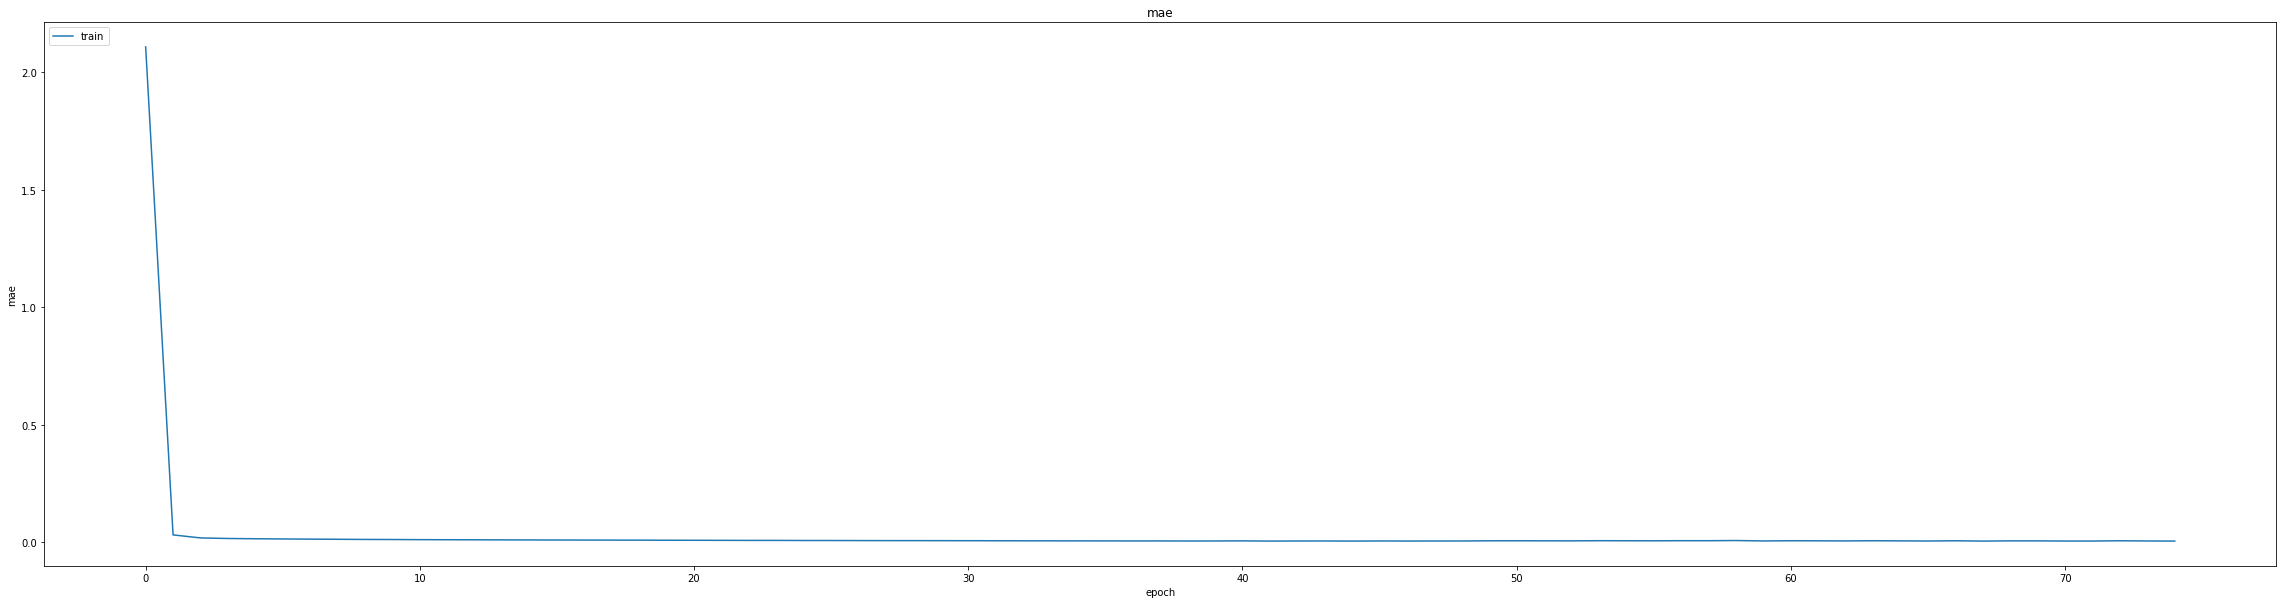

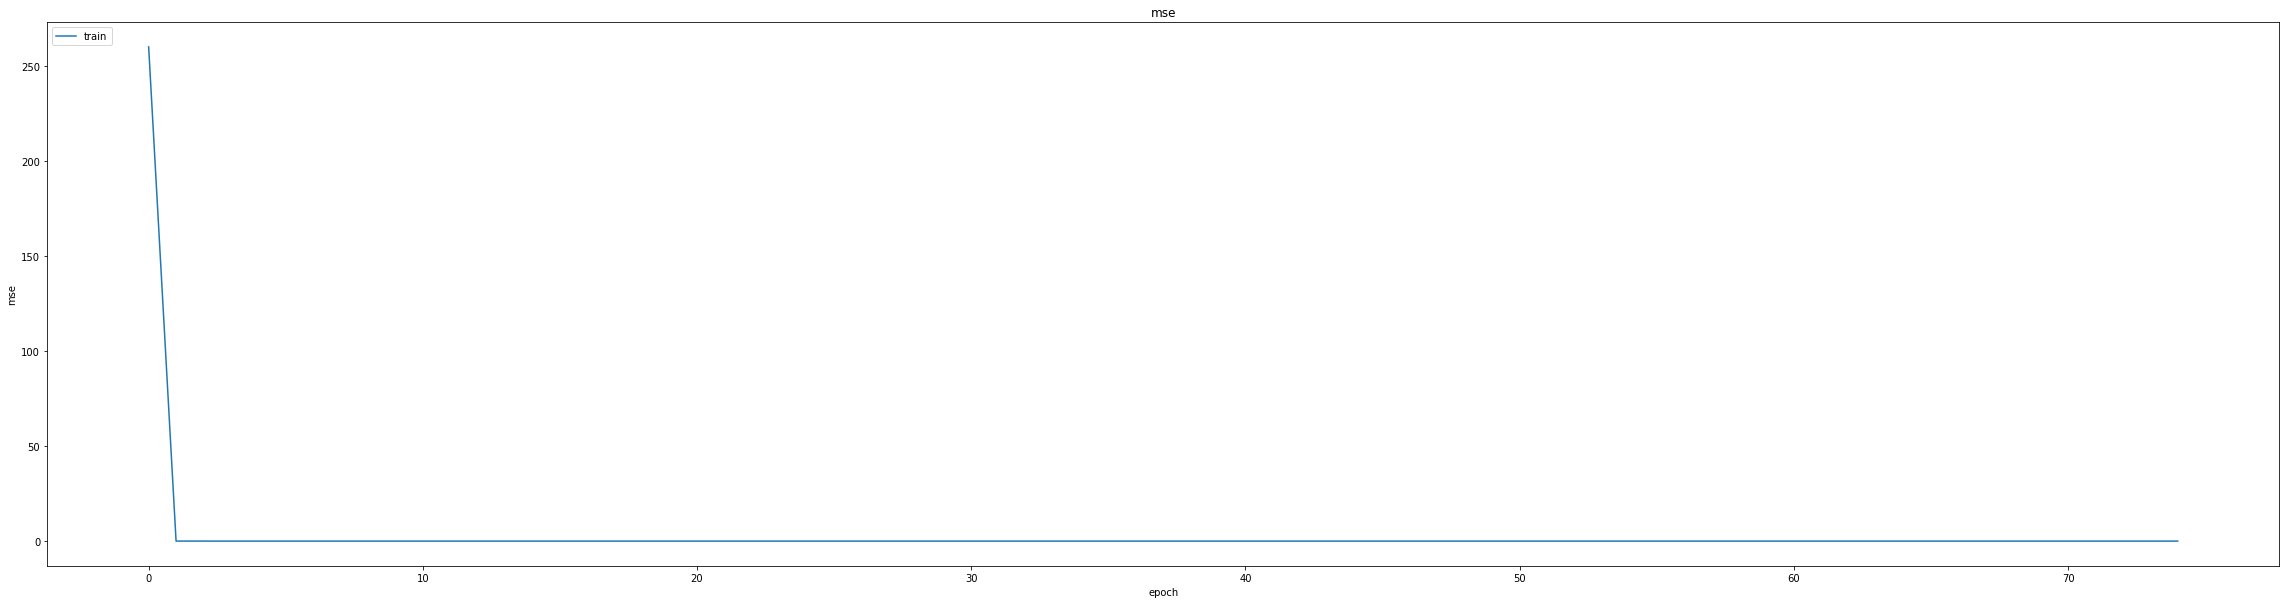

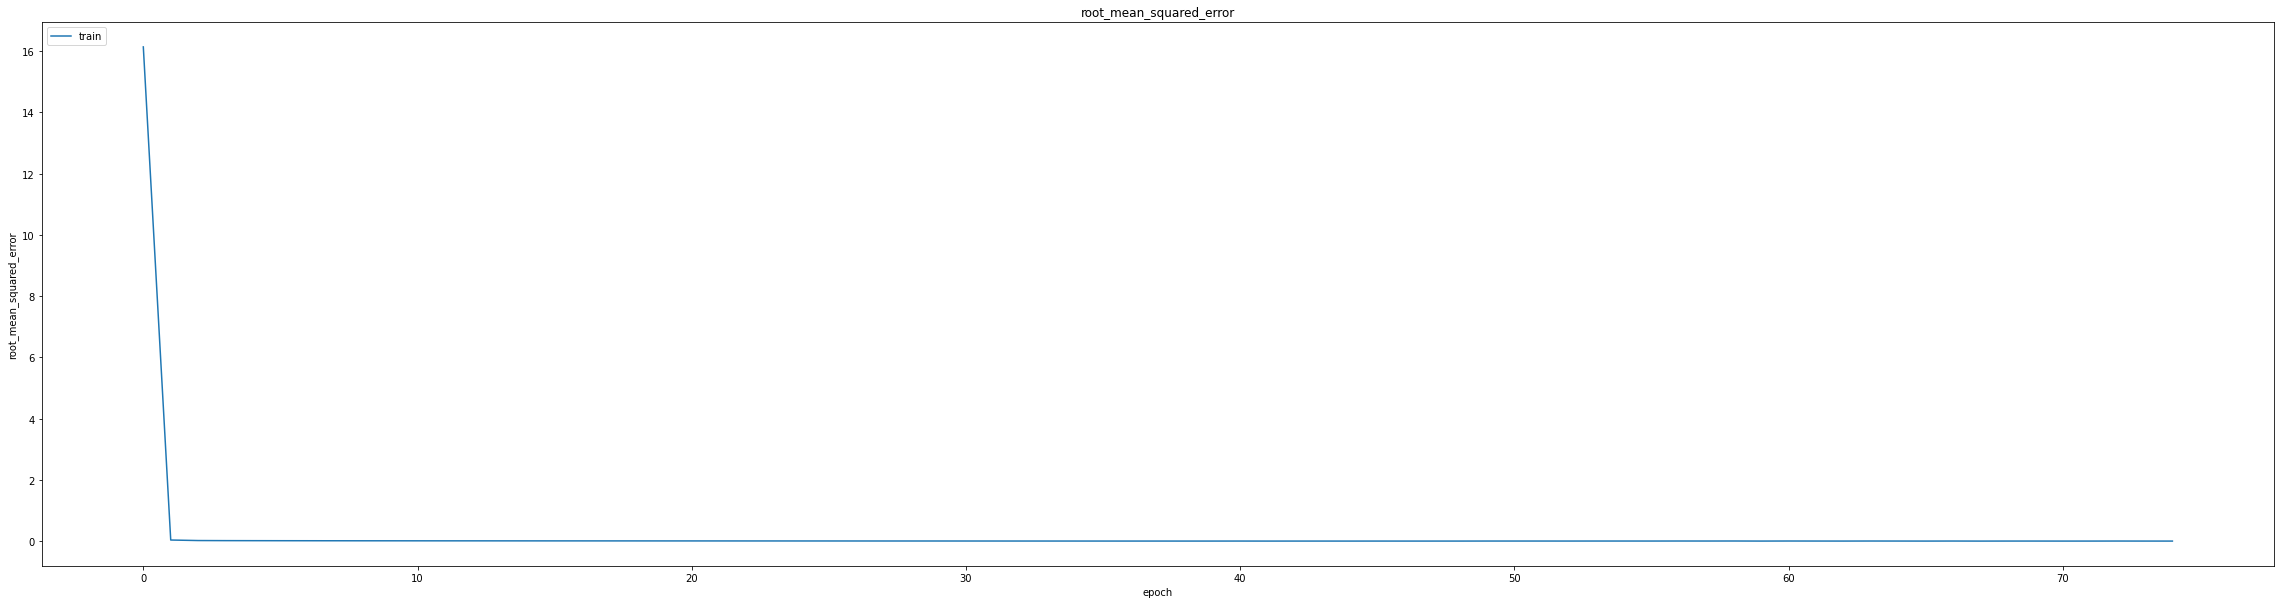

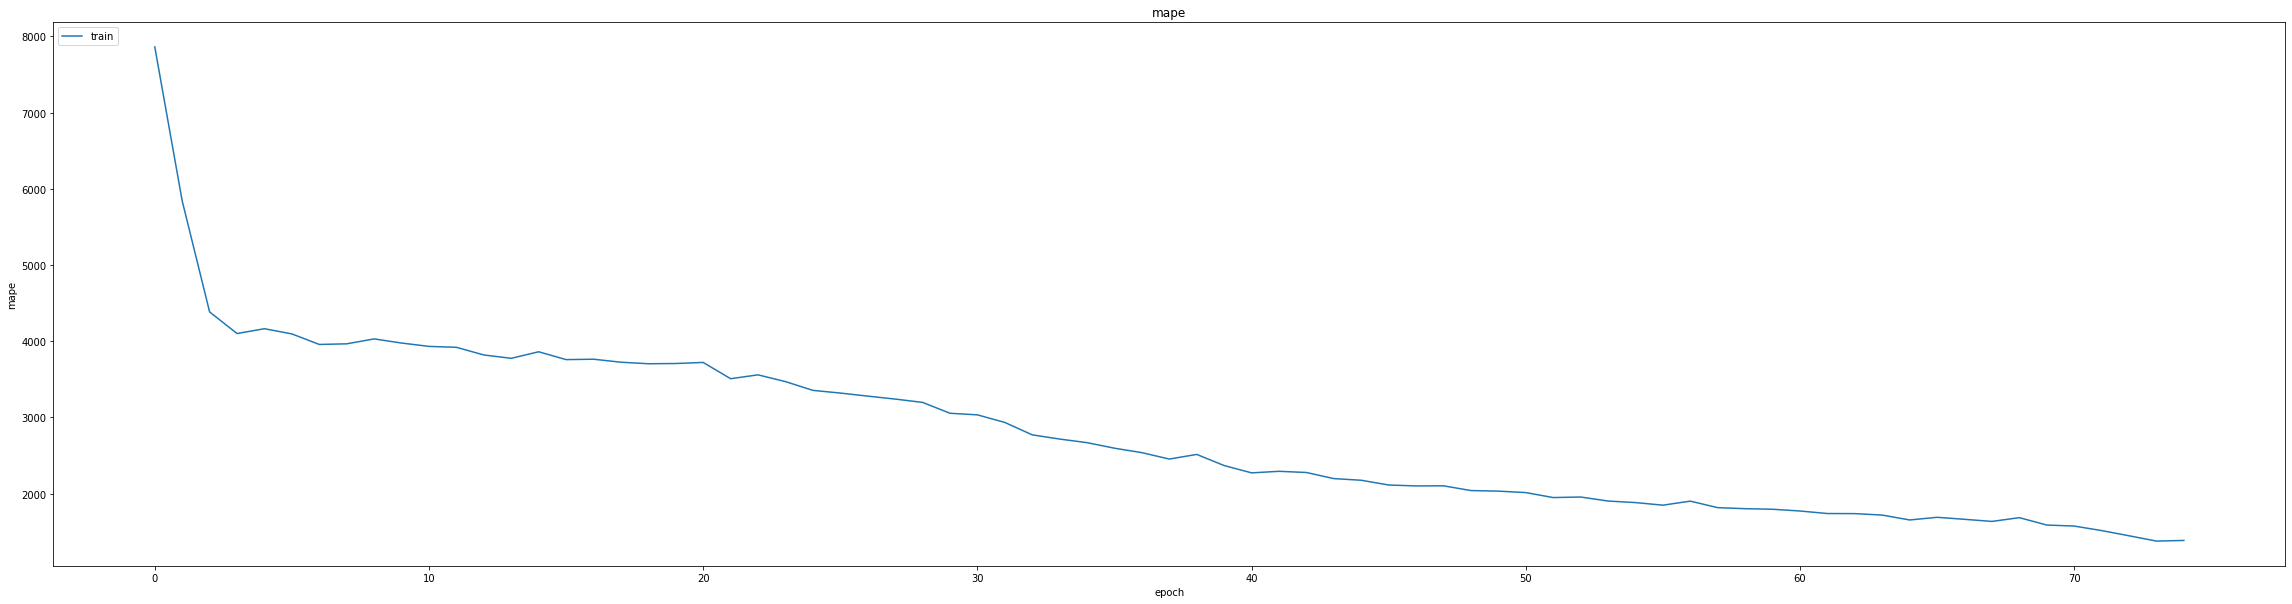

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.008221391588449478
0.010941345244646072
464/464 [==============================] - 2s 4ms/step
0.9939542535028308


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
343/348 [============================>.] - ETA: 0s - loss: 7.5846e-04 - mae: 0.0106 - mse: 7.5846e-04 - root_mean_squared_error: 0.0275 - mape: 1508.5155
Epoch 1: val_mse did not improve from 0.00012
348/348 [==============================] - 7s 12ms/step - loss: 7.4823e-04 - mae: 0.0105 - mse: 7.4823e-04 - root_mean_squared_error: 0.0274 - mape: 1487.3528 - val_loss: 2.0087e-04 - val_mae: 0.0111 - val_mse: 2.0087e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 4151.4087 - lr: 0.0010
Epoch 2/25
348/348 [==============================] - ETA: 0s - loss: 2.7039e-05 - mae: 0.0040 - mse: 2.7039e-05 - root_mean_squared_error: 0.0052 - mape: 1516.2568
Epoch 2: val_mse did not improve from 0.00012
348/348 [==============================] - 4s 10ms/step - loss: 2.7039e-05 - mae: 0.0040 - mse: 2.7039e-05 - root_mean_squared_error: 0.0052 - mape: 1516.2568 - val_loss: 2.1938e-04 - val_mae: 0.0119 - val_mse: 2.1938e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 3933.6345 -

348/348 [==============================] - 11s 32ms/step - loss: 2.9872e-05 - mae: 0.0042 - mse: 2.9872e-05 - root_mean_squared_error: 0.0055 - mape: 861.2833 - val_loss: 1.0278e-04 - val_mae: 0.0076 - val_mse: 1.0278e-04 - val_root_mean_squared_error: 0.0101 - val_mape: 2531.7708 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
346/348 [============================>.] - ETA: 0s - loss: 2.0476e-05 - mae: 0.0035 - mse: 2.0476e-05 - root_mean_squared_error: 0.0045 - mape: 865.2359
Epoch 11: val_mse did not improve from 0.00010
348/348 [==============================] - 4s 10ms/step - loss: 2.0580e-05 - mae: 0.0035 - mse: 2.0580e-05 - root_mean_squared_error: 0.0045 - mape: 860.5579 - val_loss: 2.0682e-04 - val_mae: 0.0119 - val_mse: 2.0682e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 2250.4753 - lr: 5.9049e-04
Epoch 12/25
344/348 [============================>.] - ETA: 0s - loss: 3.0853e-05 - mae: 0.0043 - mse: 3.0853e-05 - root_mean_squared_error: 0.0056 - mape:

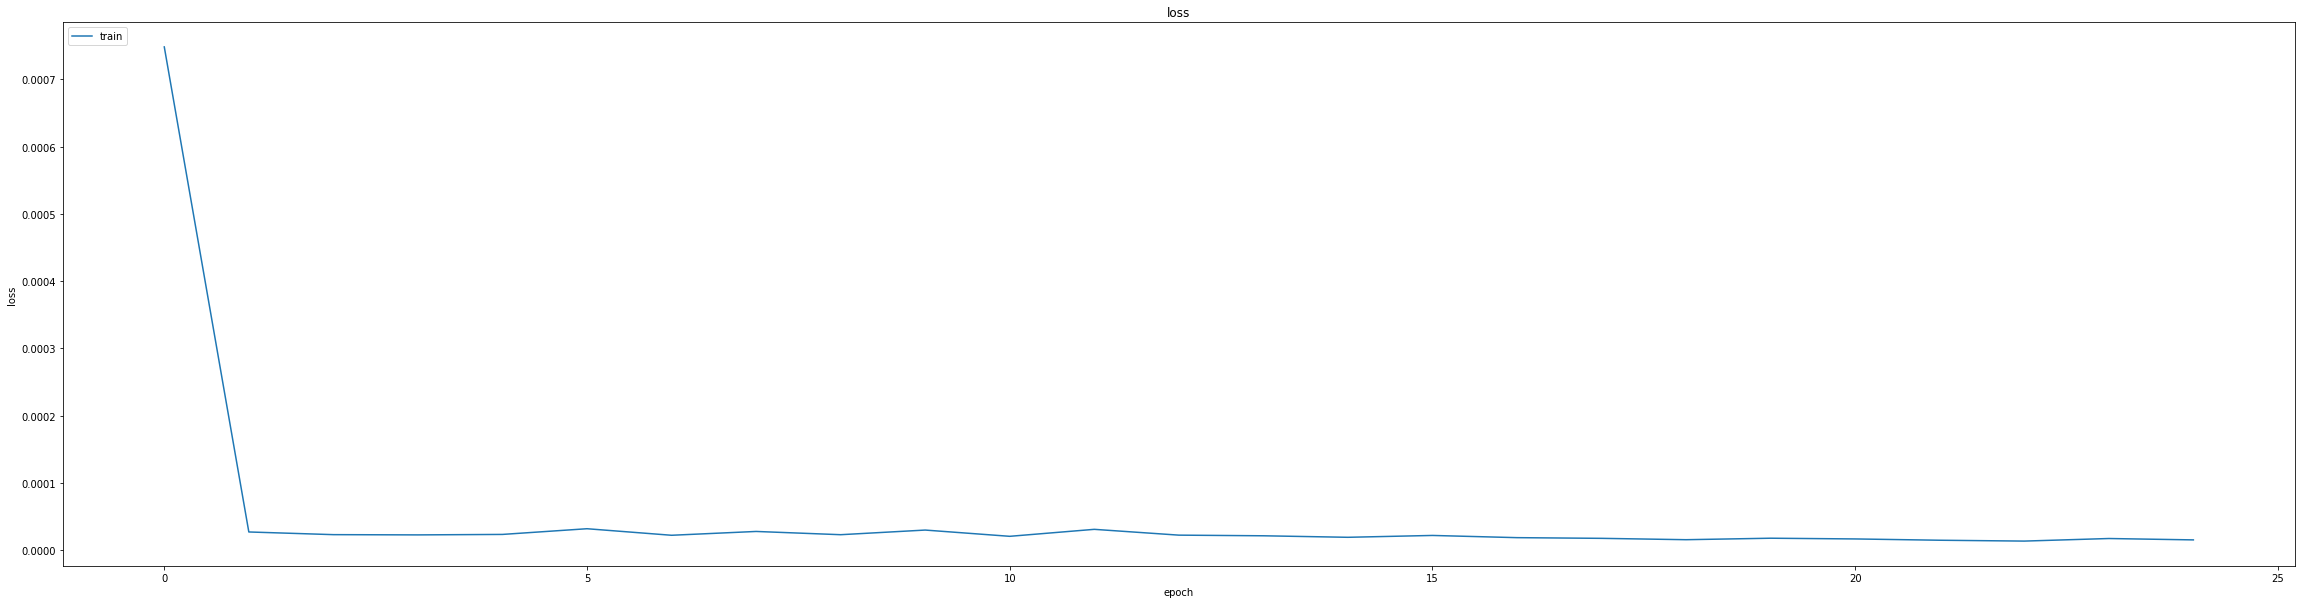

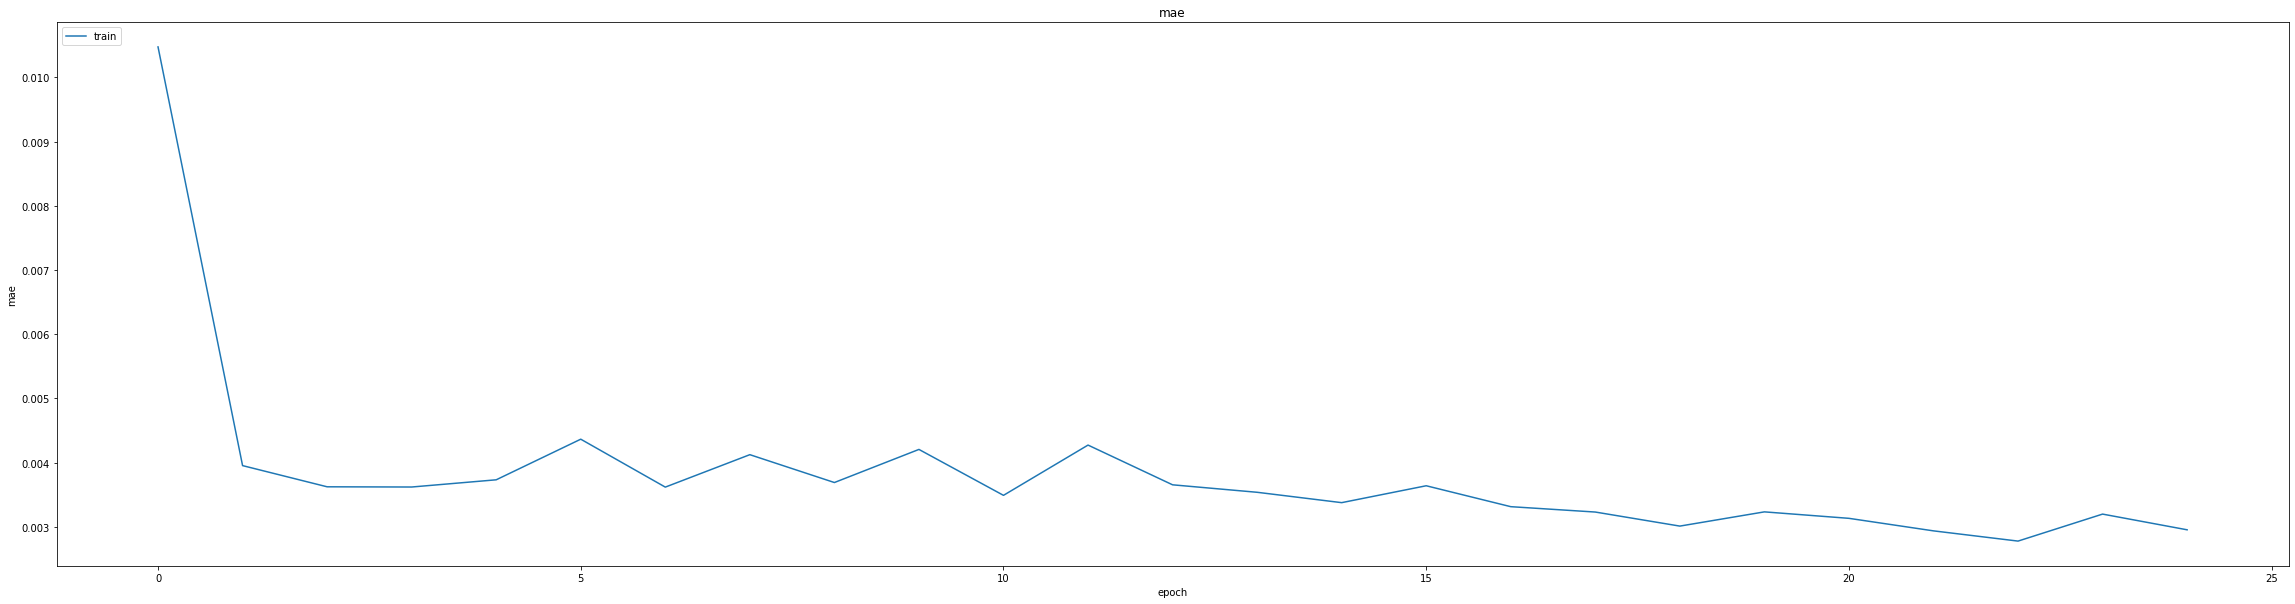

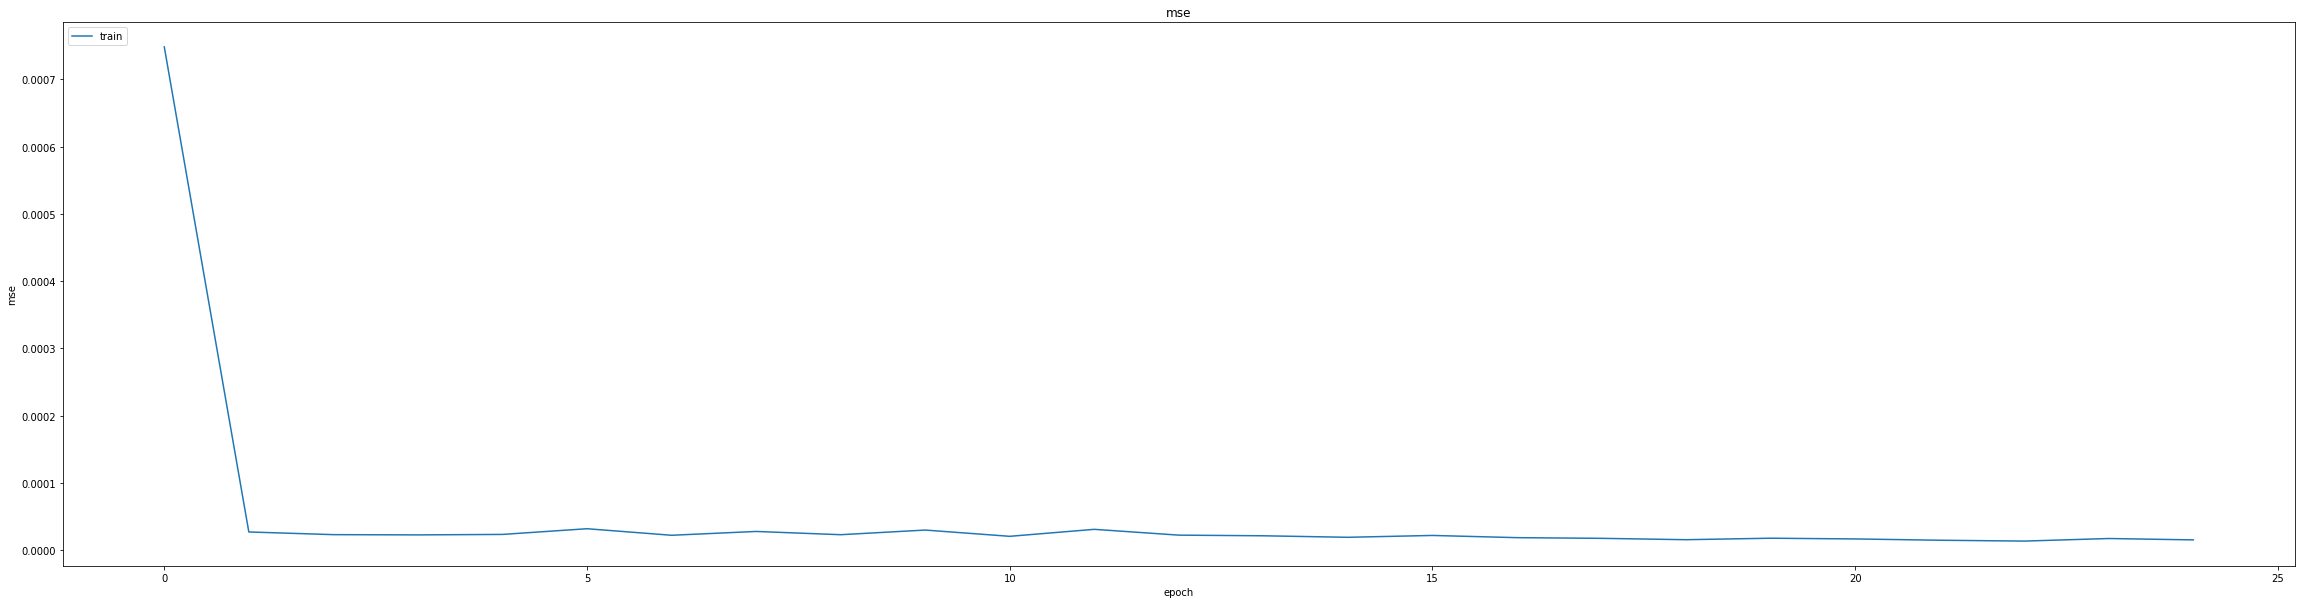

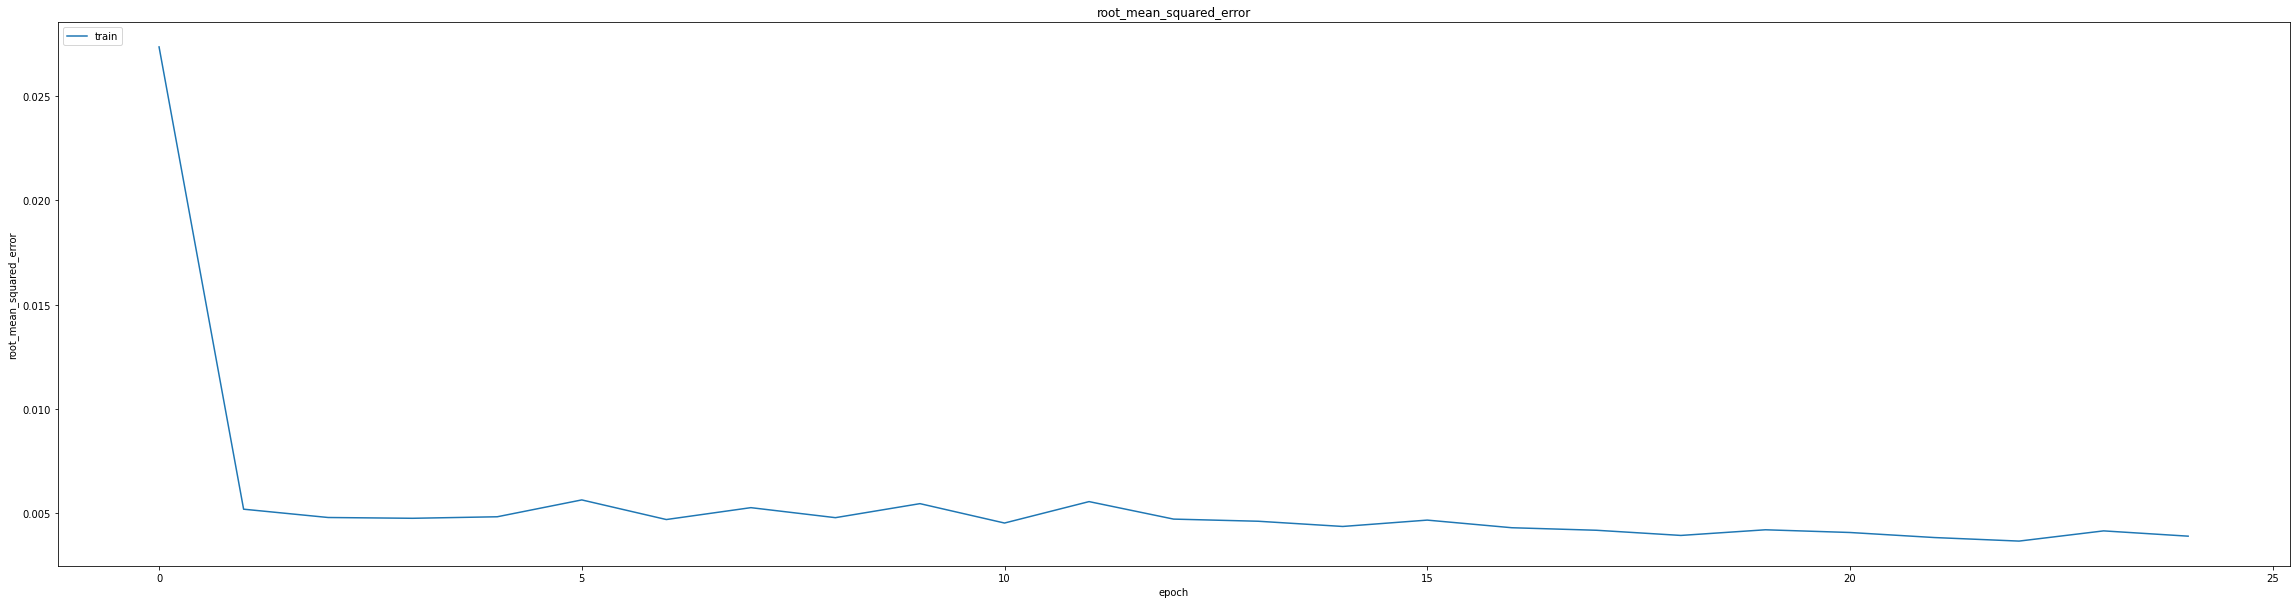

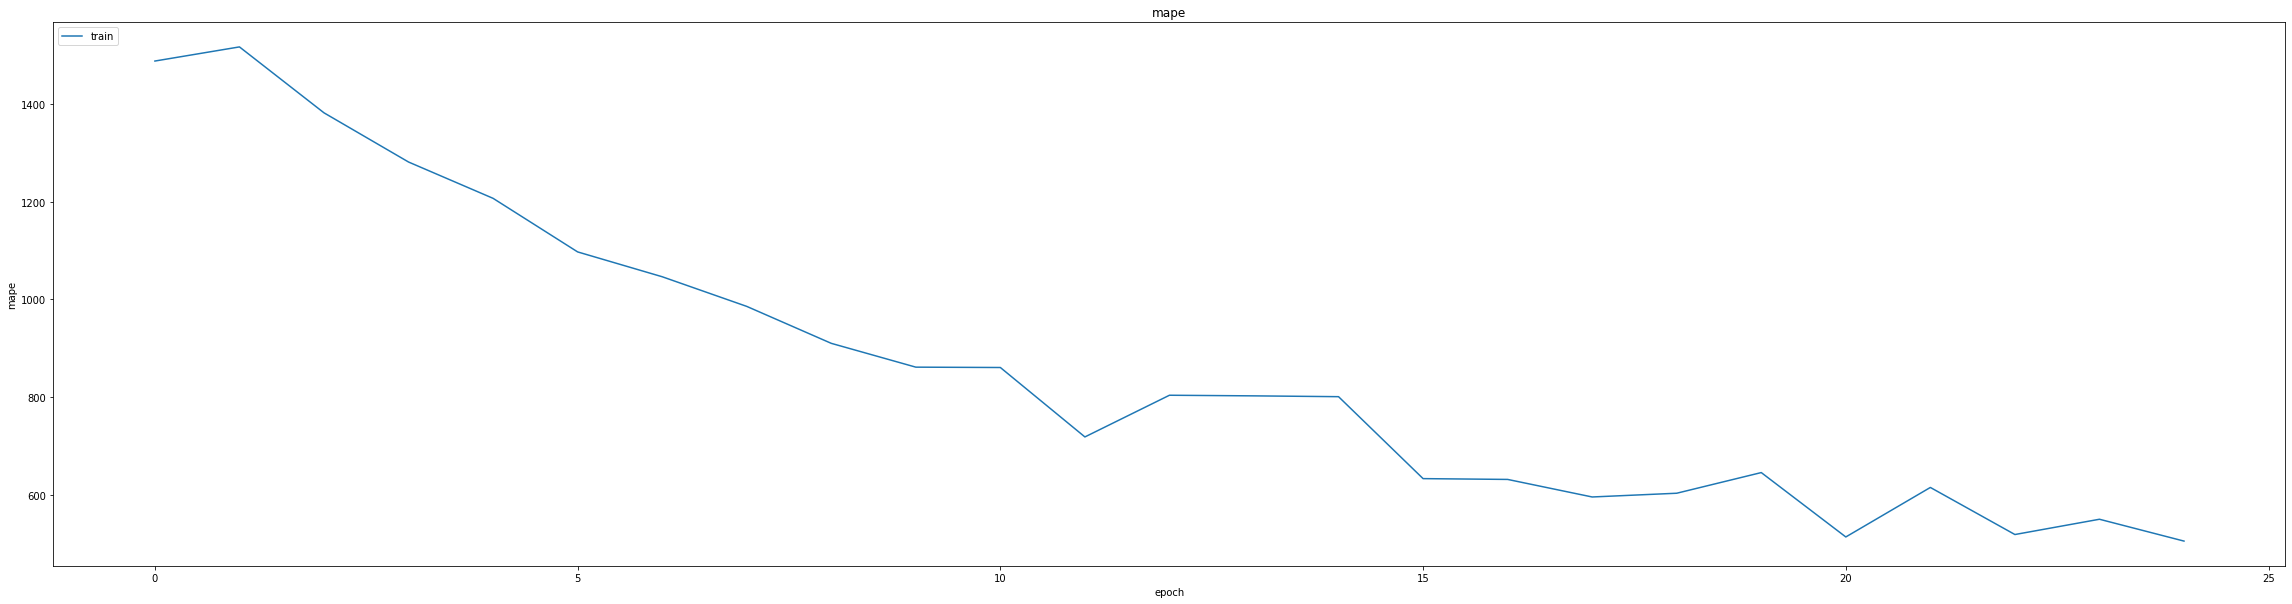

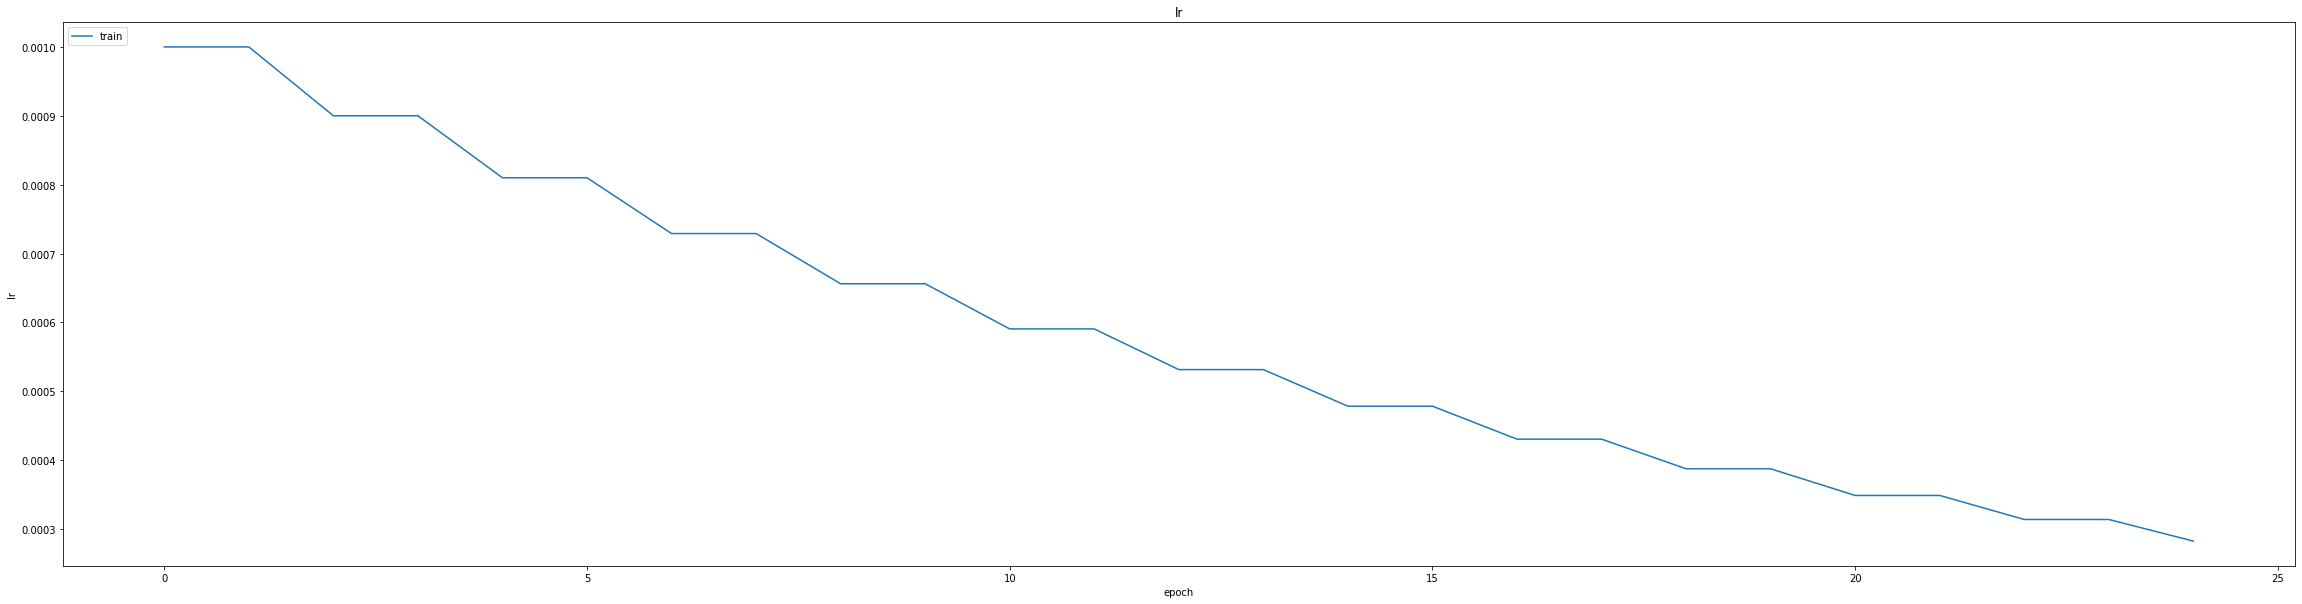

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0076089659705758095
0.010138136334717274
464/464 [==============================] - 2s 3ms/step
0.9966157021851111


464/464 [==============================] - 2s 3ms/step


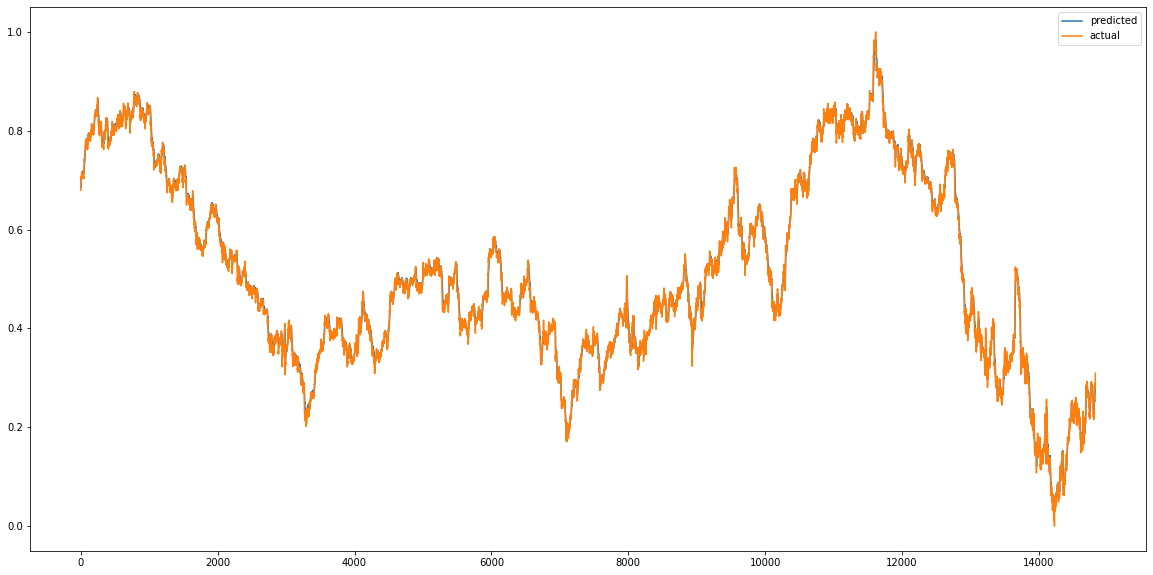

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_CNN_GRU(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


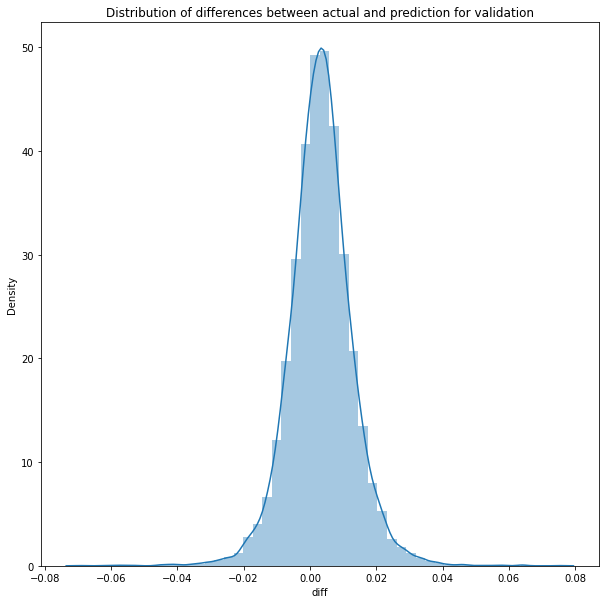

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 3ms/step


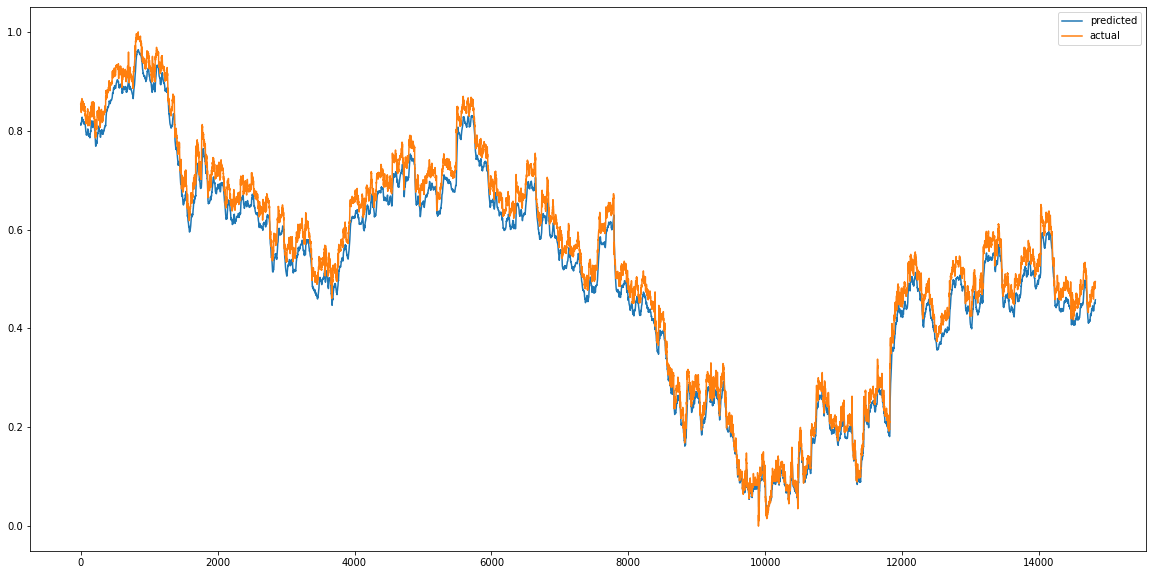

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


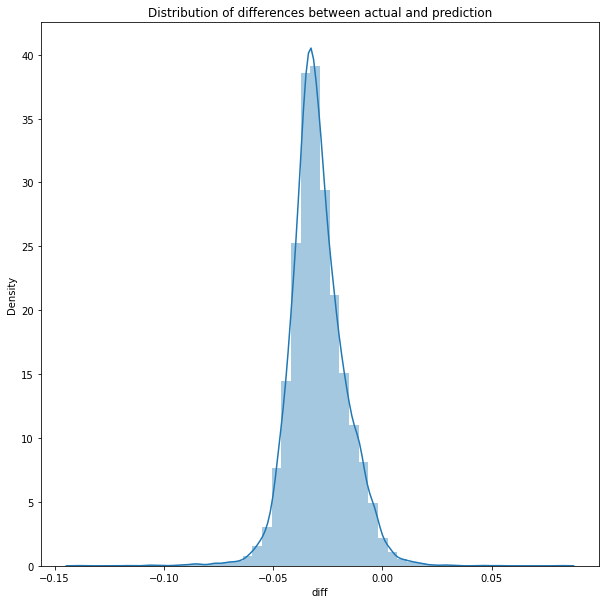

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0010333410566098556
RMSE :  0.032145622666388894
MAE :  0.029808375603534644
464/464 [==============================] - 2s 3ms/step
R2_Score  : 0.9795087721506751


count    14827.000000
mean        -0.029576
std          0.012595
min         -0.139135
25%         -0.037066
50%         -0.030887
75%         -0.022542
max          0.082011
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)


In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
347/348 [============================>.] - ETA: 0s - loss: 313.5445 - mae: 3.2287 - mse: 313.5445 - root_mean_squared_error: 17.7072 - mape: 19233.8047
Epoch 1: val_mse improved from inf to 0.05953, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 50s 117ms/step - loss: 312.7490 - mae: 3.2210 - mse: 312.7490 - root_mean_squared_error: 17.6847 - mape: 19185.1035 - val_loss: 0.0595 - val_mae: 0.2096 - val_mse: 0.0595 - val_root_mean_squared_error: 0.2440 - val_mape: 46857.7812
Epoch 2/75
347/348 [============================>.] - ETA: 0s - loss: 0.0463 - mae: 0.1739 - mse: 0.0463 - root_mean_squared_error: 0.2151 - mape: 13641.8457
Epoch 2: val_mse improved from 0.05953 to 0.05650, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 114ms/step - loss: 0.0463 - mae: 0.1739 - mse: 0.0463 - root_mean_squared_error: 0.2151 - mape: 13607.3154 - val_loss: 0.0565 - val_mae: 0.2045 - val_mse: 0.0565 - val_root_mean_squared_error: 0.2377 - val_mape: 45952.3359
Epoch 3/75
348/348 [==============================] - ETA: 0s - loss: 0.0453 - mae: 0.1723 - mse: 0.0453 - root_mean_squared_error: 0.2129 - mape: 14772.6885
Epoch 3: val_mse did not improve from 0.05650
348/348 [==============================] - 7s 21ms/step - loss: 0.0453 - mae: 0.1723 - mse: 0.0453 - root_mean_squared_error: 0.2129 - mape: 14772.6885 - val_loss: 0.0579 - val_mae: 0.2066 - val_mse: 0.0579 - val_root_mean_squared_error: 0.2405 - val_mape: 46216.0781
Epoch 4/75
348/348 [==============================] - ETA: 0s - loss: 0.0446 - mae: 0.1707 - mse: 0.0446 - root_mean_squared_error: 0.2113 - mape: 20698.4785
Epoch 4: val_mse improved from 0.05650 to 0.05475, saving model to /content/drive/MyDrive/modelweigh

348/348 [==============================] - 40s 115ms/step - loss: 0.0446 - mae: 0.1707 - mse: 0.0446 - root_mean_squared_error: 0.2113 - mape: 20698.4785 - val_loss: 0.0548 - val_mae: 0.2014 - val_mse: 0.0548 - val_root_mean_squared_error: 0.2340 - val_mape: 45238.2539
Epoch 5/75
346/348 [============================>.] - ETA: 0s - loss: 0.0440 - mae: 0.1696 - mse: 0.0440 - root_mean_squared_error: 0.2098 - mape: 12174.0371
Epoch 5: val_mse improved from 0.05475 to 0.05425, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 0.0440 - mae: 0.1696 - mse: 0.0440 - root_mean_squared_error: 0.2098 - mape: 12108.3389 - val_loss: 0.0543 - val_mae: 0.2004 - val_mse: 0.0543 - val_root_mean_squared_error: 0.2329 - val_mape: 44933.2227
Epoch 6/75
346/348 [============================>.] - ETA: 0s - loss: 0.0430 - mae: 0.1676 - mse: 0.0430 - root_mean_squared_error: 0.2072 - mape: 18157.9668
Epoch 6: val_mse improved from 0.05425 to 0.05360, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 0.0429 - mae: 0.1675 - mse: 0.0429 - root_mean_squared_error: 0.2072 - mape: 18059.8633 - val_loss: 0.0536 - val_mae: 0.1991 - val_mse: 0.0536 - val_root_mean_squared_error: 0.2315 - val_mape: 44476.3594
Epoch 7/75
348/348 [==============================] - ETA: 0s - loss: 0.0404 - mae: 0.1622 - mse: 0.0404 - root_mean_squared_error: 0.2009 - mape: 13356.1719
Epoch 7: val_mse improved from 0.05360 to 0.04967, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 114ms/step - loss: 0.0404 - mae: 0.1622 - mse: 0.0404 - root_mean_squared_error: 0.2009 - mape: 13356.1719 - val_loss: 0.0497 - val_mae: 0.1917 - val_mse: 0.0497 - val_root_mean_squared_error: 0.2229 - val_mape: 42669.7656
Epoch 8/75
346/348 [============================>.] - ETA: 0s - loss: 0.0364 - mae: 0.1542 - mse: 0.0364 - root_mean_squared_error: 0.1907 - mape: 17727.0137
Epoch 8: val_mse improved from 0.04967 to 0.03863, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0363 - mae: 0.1542 - mse: 0.0363 - root_mean_squared_error: 0.1906 - mape: 17631.2441 - val_loss: 0.0386 - val_mae: 0.1686 - val_mse: 0.0386 - val_root_mean_squared_error: 0.1965 - val_mape: 39102.0664
Epoch 9/75
347/348 [============================>.] - ETA: 0s - loss: 0.0280 - mae: 0.1338 - mse: 0.0280 - root_mean_squared_error: 0.1673 - mape: 13520.2510
Epoch 9: val_mse improved from 0.03863 to 0.02433, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 0.0280 - mae: 0.1338 - mse: 0.0280 - root_mean_squared_error: 0.1672 - mape: 13485.9941 - val_loss: 0.0243 - val_mae: 0.1281 - val_mse: 0.0243 - val_root_mean_squared_error: 0.1560 - val_mape: 35503.5430
Epoch 10/75
345/348 [============================>.] - ETA: 0s - loss: 0.0185 - mae: 0.1054 - mse: 0.0185 - root_mean_squared_error: 0.1360 - mape: 11820.3555
Epoch 10: val_mse improved from 0.02433 to 0.01339, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 0.0185 - mae: 0.1053 - mse: 0.0185 - root_mean_squared_error: 0.1359 - mape: 11722.5684 - val_loss: 0.0134 - val_mae: 0.0849 - val_mse: 0.0134 - val_root_mean_squared_error: 0.1157 - val_mape: 31987.1172
Epoch 11/75
346/348 [============================>.] - ETA: 0s - loss: 0.0138 - mae: 0.0902 - mse: 0.0138 - root_mean_squared_error: 0.1175 - mape: 10702.0947
Epoch 11: val_mse improved from 0.01339 to 0.00794, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0138 - mae: 0.0902 - mse: 0.0138 - root_mean_squared_error: 0.1175 - mape: 10644.2637 - val_loss: 0.0079 - val_mae: 0.0620 - val_mse: 0.0079 - val_root_mean_squared_error: 0.0891 - val_mape: 28298.2402
Epoch 12/75
345/348 [============================>.] - ETA: 0s - loss: 0.0117 - mae: 0.0829 - mse: 0.0117 - root_mean_squared_error: 0.1080 - mape: 9063.3809
Epoch 12: val_mse improved from 0.00794 to 0.00677, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 0.0117 - mae: 0.0829 - mse: 0.0117 - root_mean_squared_error: 0.1080 - mape: 8988.4297 - val_loss: 0.0068 - val_mae: 0.0572 - val_mse: 0.0068 - val_root_mean_squared_error: 0.0823 - val_mape: 27025.8965
Epoch 13/75
348/348 [==============================] - ETA: 0s - loss: 0.0102 - mae: 0.0776 - mse: 0.0102 - root_mean_squared_error: 0.1009 - mape: 7843.4248
Epoch 13: val_mse improved from 0.00677 to 0.00479, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 0.0102 - mae: 0.0776 - mse: 0.0102 - root_mean_squared_error: 0.1009 - mape: 7843.4248 - val_loss: 0.0048 - val_mae: 0.0435 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0692 - val_mape: 25037.9961
Epoch 14/75
346/348 [============================>.] - ETA: 0s - loss: 0.0088 - mae: 0.0723 - mse: 0.0088 - root_mean_squared_error: 0.0937 - mape: 11423.2432
Epoch 14: val_mse did not improve from 0.00479
348/348 [==============================] - 7s 20ms/step - loss: 0.0088 - mae: 0.0723 - mse: 0.0088 - root_mean_squared_error: 0.0938 - mape: 11361.5361 - val_loss: 0.0050 - val_mae: 0.0565 - val_mse: 0.0050 - val_root_mean_squared_error: 0.0709 - val_mape: 22080.3359
Epoch 15/75
346/348 [============================>.] - ETA: 0s - loss: 0.0078 - mae: 0.0686 - mse: 0.0078 - root_mean_squared_error: 0.0884 - mape: 5902.4370
Epoch 15: val_mse improved from 0.00479 to 0.00393, saving model to /content/drive/MyDrive/modelwei

348/348 [==============================] - 39s 113ms/step - loss: 0.0078 - mae: 0.0686 - mse: 0.0078 - root_mean_squared_error: 0.0884 - mape: 5870.5698 - val_loss: 0.0039 - val_mae: 0.0493 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0627 - val_mape: 20472.7344
Epoch 16/75
346/348 [============================>.] - ETA: 0s - loss: 0.0070 - mae: 0.0648 - mse: 0.0070 - root_mean_squared_error: 0.0837 - mape: 13.9167
Epoch 16: val_mse improved from 0.00393 to 0.00356, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 117ms/step - loss: 0.0070 - mae: 0.0648 - mse: 0.0070 - root_mean_squared_error: 0.0838 - mape: 9636.6875 - val_loss: 0.0036 - val_mae: 0.0472 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0597 - val_mape: 19559.7500
Epoch 17/75
348/348 [==============================] - ETA: 0s - loss: 0.0061 - mae: 0.0608 - mse: 0.0061 - root_mean_squared_error: 0.0784 - mape: 6117.1294
Epoch 17: val_mse improved from 0.00356 to 0.00318, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 111ms/step - loss: 0.0061 - mae: 0.0608 - mse: 0.0061 - root_mean_squared_error: 0.0784 - mape: 6117.1294 - val_loss: 0.0032 - val_mae: 0.0446 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0564 - val_mape: 18811.8906
Epoch 18/75
346/348 [============================>.] - ETA: 0s - loss: 0.0055 - mae: 0.0576 - mse: 0.0055 - root_mean_squared_error: 0.0743 - mape: 7934.1606
Epoch 18: val_mse improved from 0.00318 to 0.00188, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 0.0055 - mae: 0.0576 - mse: 0.0055 - root_mean_squared_error: 0.0743 - mape: 7891.2788 - val_loss: 0.0019 - val_mae: 0.0298 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0434 - val_mape: 17686.4141
Epoch 19/75
345/348 [============================>.] - ETA: 0s - loss: 0.0049 - mae: 0.0541 - mse: 0.0049 - root_mean_squared_error: 0.0698 - mape: 5368.3120
Epoch 19: val_mse did not improve from 0.00188
348/348 [==============================] - 7s 19ms/step - loss: 0.0049 - mae: 0.0541 - mse: 0.0049 - root_mean_squared_error: 0.0698 - mape: 5323.9102 - val_loss: 0.0028 - val_mae: 0.0433 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0530 - val_mape: 17085.2637
Epoch 20/75
348/348 [==============================] - ETA: 0s - loss: 0.0043 - mae: 0.0509 - mse: 0.0043 - root_mean_squared_error: 0.0654 - mape: 6095.9341
Epoch 20: val_mse improved from 0.00188 to 0.00145, saving model to /content/drive/MyDrive/modelweigh

348/348 [==============================] - 39s 113ms/step - loss: 0.0043 - mae: 0.0509 - mse: 0.0043 - root_mean_squared_error: 0.0654 - mape: 6095.9341 - val_loss: 0.0015 - val_mae: 0.0260 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0381 - val_mape: 16356.9053
Epoch 21/75
345/348 [============================>.] - ETA: 0s - loss: 0.0038 - mae: 0.0480 - mse: 0.0038 - root_mean_squared_error: 0.0617 - mape: 6986.7588
Epoch 21: val_mse did not improve from 0.00145
348/348 [==============================] - 7s 19ms/step - loss: 0.0038 - mae: 0.0480 - mse: 0.0038 - root_mean_squared_error: 0.0617 - mape: 6928.9390 - val_loss: 0.0015 - val_mae: 0.0293 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0387 - val_mape: 15040.3877
Epoch 22/75
348/348 [==============================] - ETA: 0s - loss: 0.0033 - mae: 0.0449 - mse: 0.0033 - root_mean_squared_error: 0.0576 - mape: 7438.1606
Epoch 22: val_mse did not improve from 0.00145
348/348 [==============================] - 8s 22ms/ste

348/348 [==============================] - 39s 112ms/step - loss: 0.0029 - mae: 0.0420 - mse: 0.0029 - root_mean_squared_error: 0.0541 - mape: 4906.4214 - val_loss: 0.0012 - val_mae: 0.0271 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0350 - val_mape: 13745.0166
Epoch 24/75
346/348 [============================>.] - ETA: 0s - loss: 0.0026 - mae: 0.0401 - mse: 0.0026 - root_mean_squared_error: 0.0513 - mape: 6014.2949
Epoch 24: val_mse improved from 0.00123 to 0.00116, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 111ms/step - loss: 0.0026 - mae: 0.0401 - mse: 0.0026 - root_mean_squared_error: 0.0513 - mape: 5981.7876 - val_loss: 0.0012 - val_mae: 0.0267 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0340 - val_mape: 13182.5010
Epoch 25/75
346/348 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0374 - mse: 0.0023 - root_mean_squared_error: 0.0479 - mape: 5433.3213
Epoch 25: val_mse did not improve from 0.00116
348/348 [==============================] - 7s 19ms/step - loss: 0.0023 - mae: 0.0374 - mse: 0.0023 - root_mean_squared_error: 0.0479 - mape: 5403.9546 - val_loss: 0.0017 - val_mae: 0.0364 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0414 - val_mape: 12364.4639
Epoch 26/75
345/348 [============================>.] - ETA: 0s - loss: 0.0020 - mae: 0.0347 - mse: 0.0020 - root_mean_squared_error: 0.0446 - mape: 3979.2083
Epoch 26: val_mse improved from 0.00116 to 0.00070, saving model to /content/drive/MyDrive/modelweigh

348/348 [==============================] - 39s 112ms/step - loss: 0.0020 - mae: 0.0347 - mse: 0.0020 - root_mean_squared_error: 0.0446 - mape: 3946.2805 - val_loss: 7.0431e-04 - val_mae: 0.0194 - val_mse: 7.0431e-04 - val_root_mean_squared_error: 0.0265 - val_mape: 11996.8955
Epoch 27/75
347/348 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0322 - mse: 0.0017 - root_mean_squared_error: 0.0415 - mape: 3280.4924
Epoch 27: val_mse did not improve from 0.00070
348/348 [==============================] - 7s 20ms/step - loss: 0.0017 - mae: 0.0322 - mse: 0.0017 - root_mean_squared_error: 0.0415 - mape: 3272.1819 - val_loss: 8.6917e-04 - val_mae: 0.0239 - val_mse: 8.6917e-04 - val_root_mean_squared_error: 0.0295 - val_mape: 11475.1865
Epoch 28/75
346/348 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0300 - mse: 0.0015 - root_mean_squared_error: 0.0384 - mape: 3203.1121
Epoch 28: val_mse improved from 0.00070 to 0.00060, saving model to /content/drive/My

348/348 [==============================] - 40s 115ms/step - loss: 0.0015 - mae: 0.0299 - mse: 0.0015 - root_mean_squared_error: 0.0383 - mape: 3185.8015 - val_loss: 6.0321e-04 - val_mae: 0.0185 - val_mse: 6.0321e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 10916.2002
Epoch 29/75
345/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0275 - mse: 0.0012 - root_mean_squared_error: 0.0353 - mape: 3479.8601
Epoch 29: val_mse did not improve from 0.00060
348/348 [==============================] - 7s 19ms/step - loss: 0.0012 - mae: 0.0275 - mse: 0.0012 - root_mean_squared_error: 0.0353 - mape: 3451.0637 - val_loss: 0.0011 - val_mae: 0.0296 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0336 - val_mape: 10190.9912
Epoch 30/75
348/348 [==============================] - ETA: 0s - loss: 0.0010 - mae: 0.0253 - mse: 0.0010 - root_mean_squared_error: 0.0323 - mape: 4369.2275
Epoch 30: val_mse did not improve from 0.00060
348/348 [==============================] - 7s 

348/348 [==============================] - 38s 111ms/step - loss: 5.9122e-04 - mae: 0.0189 - mse: 5.9122e-04 - root_mean_squared_error: 0.0243 - mape: 2781.4690 - val_loss: 3.9024e-04 - val_mae: 0.0151 - val_mse: 3.9024e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 8154.5474
Epoch 35/75
348/348 [==============================] - ETA: 0s - loss: 5.2657e-04 - mae: 0.0180 - mse: 5.2657e-04 - root_mean_squared_error: 0.0229 - mape: 3353.5002
Epoch 35: val_mse did not improve from 0.00039
348/348 [==============================] - 7s 20ms/step - loss: 5.2657e-04 - mae: 0.0180 - mse: 5.2657e-04 - root_mean_squared_error: 0.0229 - mape: 3353.5002 - val_loss: 9.5667e-04 - val_mae: 0.0272 - val_mse: 9.5667e-04 - val_root_mean_squared_error: 0.0309 - val_mape: 7959.8921
Epoch 36/75
347/348 [============================>.] - ETA: 0s - loss: 4.6004e-04 - mae: 0.0167 - mse: 4.6004e-04 - root_mean_squared_error: 0.0214 - mape: 2386.3762
Epoch 36: val_mse improved from 0.00039 to 0.00030, sav

348/348 [==============================] - 39s 113ms/step - loss: 4.6028e-04 - mae: 0.0167 - mse: 4.6028e-04 - root_mean_squared_error: 0.0215 - mape: 2380.3293 - val_loss: 2.9996e-04 - val_mae: 0.0126 - val_mse: 2.9996e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 7856.5044
Epoch 37/75
346/348 [============================>.] - ETA: 0s - loss: 4.3474e-04 - mae: 0.0163 - mse: 4.3474e-04 - root_mean_squared_error: 0.0209 - mape: 3360.3752
Epoch 37: val_mse did not improve from 0.00030
348/348 [==============================] - 7s 20ms/step - loss: 4.3423e-04 - mae: 0.0163 - mse: 4.3423e-04 - root_mean_squared_error: 0.0208 - mape: 3342.2019 - val_loss: 5.3756e-04 - val_mae: 0.0193 - val_mse: 5.3756e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 7541.8291
Epoch 38/75
348/348 [==============================] - ETA: 0s - loss: 3.9726e-04 - mae: 0.0156 - mse: 3.9726e-04 - root_mean_squared_error: 0.0199 - mape: 2596.4465
Epoch 38: val_mse did not improve from 0.00030
348/348 

348/348 [==============================] - 39s 111ms/step - loss: 2.0244e-04 - mae: 0.0111 - mse: 2.0244e-04 - root_mean_squared_error: 0.0142 - mape: 2740.1802 - val_loss: 2.3116e-04 - val_mae: 0.0113 - val_mse: 2.3116e-04 - val_root_mean_squared_error: 0.0152 - val_mape: 5792.5889
Epoch 48/75
346/348 [============================>.] - ETA: 0s - loss: 2.1583e-04 - mae: 0.0116 - mse: 2.1583e-04 - root_mean_squared_error: 0.0147 - mape: 1829.6942
Epoch 48: val_mse improved from 0.00023 to 0.00023, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 38s 111ms/step - loss: 2.1569e-04 - mae: 0.0116 - mse: 2.1569e-04 - root_mean_squared_error: 0.0147 - mape: 1819.8030 - val_loss: 2.2711e-04 - val_mae: 0.0112 - val_mse: 2.2711e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 5629.4136
Epoch 49/75
347/348 [============================>.] - ETA: 0s - loss: 1.8004e-04 - mae: 0.0105 - mse: 1.8004e-04 - root_mean_squared_error: 0.0134 - mape: 1819.5405
Epoch 49: val_mse did not improve from 0.00023
348/348 [==============================] - 7s 20ms/step - loss: 1.7999e-04 - mae: 0.0105 - mse: 1.7999e-04 - root_mean_squared_error: 0.0134 - mape: 1814.9272 - val_loss: 3.4666e-04 - val_mae: 0.0146 - val_mse: 3.4666e-04 - val_root_mean_squared_error: 0.0186 - val_mape: 5299.6909
Epoch 50/75
348/348 [==============================] - ETA: 0s - loss: 1.7456e-04 - mae: 0.0104 - mse: 1.7456e-04 - root_mean_squared_error: 0.0132 - mape: 1804.0142
Epoch 50: val_mse did not improve from 0.00023
348/348 

348/348 [==============================] - 38s 109ms/step - loss: 1.5678e-04 - mae: 0.0099 - mse: 1.5678e-04 - root_mean_squared_error: 0.0125 - mape: 2224.6531 - val_loss: 2.1829e-04 - val_mae: 0.0113 - val_mse: 2.1829e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 5034.3730
Epoch 55/75
348/348 [==============================] - ETA: 0s - loss: 1.5584e-04 - mae: 0.0098 - mse: 1.5584e-04 - root_mean_squared_error: 0.0125 - mape: 1559.6526
Epoch 55: val_mse did not improve from 0.00022
348/348 [==============================] - 7s 20ms/step - loss: 1.5584e-04 - mae: 0.0098 - mse: 1.5584e-04 - root_mean_squared_error: 0.0125 - mape: 1559.6526 - val_loss: 4.8141e-04 - val_mae: 0.0190 - val_mse: 4.8141e-04 - val_root_mean_squared_error: 0.0219 - val_mape: 5114.2642
Epoch 56/75
348/348 [==============================] - ETA: 0s - loss: 1.4963e-04 - mae: 0.0096 - mse: 1.4963e-04 - root_mean_squared_error: 0.0122 - mape: 1692.6034
Epoch 56: val_mse did not improve from 0.00022
348/348 

348/348 [==============================] - 38s 110ms/step - loss: 1.2781e-04 - mae: 0.0088 - mse: 1.2781e-04 - root_mean_squared_error: 0.0113 - mape: 1755.9076 - val_loss: 1.9911e-04 - val_mae: 0.0108 - val_mse: 1.9911e-04 - val_root_mean_squared_error: 0.0141 - val_mape: 4958.9824
Epoch 58/75
347/348 [============================>.] - ETA: 0s - loss: 1.4818e-04 - mae: 0.0095 - mse: 1.4818e-04 - root_mean_squared_error: 0.0122 - mape: 1728.5895
Epoch 58: val_mse improved from 0.00020 to 0.00017, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 1.4801e-04 - mae: 0.0095 - mse: 1.4801e-04 - root_mean_squared_error: 0.0122 - mape: 1724.2058 - val_loss: 1.7167e-04 - val_mae: 0.0098 - val_mse: 1.7167e-04 - val_root_mean_squared_error: 0.0131 - val_mape: 4667.1792
Epoch 59/75
346/348 [============================>.] - ETA: 0s - loss: 1.3427e-04 - mae: 0.0091 - mse: 1.3427e-04 - root_mean_squared_error: 0.0116 - mape: 1519.7598
Epoch 59: val_mse did not improve from 0.00017
348/348 [==============================] - 8s 23ms/step - loss: 1.3403e-04 - mae: 0.0090 - mse: 1.3403e-04 - root_mean_squared_error: 0.0116 - mape: 1511.5417 - val_loss: 3.4237e-04 - val_mae: 0.0156 - val_mse: 3.4237e-04 - val_root_mean_squared_error: 0.0185 - val_mape: 4676.4839
Epoch 60/75
346/348 [============================>.] - ETA: 0s - loss: 1.1632e-04 - mae: 0.0085 - mse: 1.1632e-04 - root_mean_squared_error: 0.0108 - mape: 1632.4154
Epoch 60: val_mse did not improve from 0.00017
348/348 

348/348 [==============================] - 39s 112ms/step - loss: 1.1365e-04 - mae: 0.0084 - mse: 1.1365e-04 - root_mean_squared_error: 0.0107 - mape: 1529.5531 - val_loss: 1.2495e-04 - val_mae: 0.0083 - val_mse: 1.2495e-04 - val_root_mean_squared_error: 0.0112 - val_mape: 4341.0723
Epoch 64/75
346/348 [============================>.] - ETA: 0s - loss: 1.0075e-04 - mae: 0.0080 - mse: 1.0075e-04 - root_mean_squared_error: 0.0100 - mape: 1424.3025
Epoch 64: val_mse did not improve from 0.00012
348/348 [==============================] - 7s 19ms/step - loss: 1.0044e-04 - mae: 0.0080 - mse: 1.0044e-04 - root_mean_squared_error: 0.0100 - mape: 1416.5995 - val_loss: 1.5130e-04 - val_mae: 0.0098 - val_mse: 1.5130e-04 - val_root_mean_squared_error: 0.0123 - val_mape: 4140.3921
Epoch 65/75
346/348 [============================>.] - ETA: 0s - loss: 1.1446e-04 - mae: 0.0085 - mse: 1.1446e-04 - root_mean_squared_error: 0.0107 - mape: 1661.9713
Epoch 65: val_mse did not improve from 0.00012
348/348 

348/348 [==============================] - 38s 110ms/step - loss: 8.2946e-05 - mae: 0.0072 - mse: 8.2946e-05 - root_mean_squared_error: 0.0091 - mape: 1184.6096 - val_loss: 9.4765e-05 - val_mae: 0.0070 - val_mse: 9.4765e-05 - val_root_mean_squared_error: 0.0097 - val_mape: 3996.3103
Epoch 67/75
348/348 [==============================] - ETA: 0s - loss: 1.1126e-04 - mae: 0.0084 - mse: 1.1126e-04 - root_mean_squared_error: 0.0105 - mape: 1540.2360
Epoch 67: val_mse did not improve from 0.00009
348/348 [==============================] - 7s 19ms/step - loss: 1.1126e-04 - mae: 0.0084 - mse: 1.1126e-04 - root_mean_squared_error: 0.0105 - mape: 1540.2360 - val_loss: 9.6080e-05 - val_mae: 0.0071 - val_mse: 9.6080e-05 - val_root_mean_squared_error: 0.0098 - val_mape: 3916.0935
Epoch 68/75
345/348 [============================>.] - ETA: 0s - loss: 8.5428e-05 - mae: 0.0073 - mse: 8.5428e-05 - root_mean_squared_error: 0.0092 - mape: 1291.7123
Epoch 68: val_mse did not improve from 0.00009
348/348 

348/348 [==============================] - 39s 113ms/step - loss: 7.4470e-05 - mae: 0.0068 - mse: 7.4470e-05 - root_mean_squared_error: 0.0086 - mape: 1405.9858 - val_loss: 8.4406e-05 - val_mae: 0.0065 - val_mse: 8.4406e-05 - val_root_mean_squared_error: 0.0092 - val_mape: 3500.5029
Epoch 74/75
348/348 [==============================] - ETA: 0s - loss: 7.9969e-05 - mae: 0.0068 - mse: 7.9969e-05 - root_mean_squared_error: 0.0089 - mape: 1099.3496
Epoch 74: val_mse improved from 0.00008 to 0.00007, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 111ms/step - loss: 7.9969e-05 - mae: 0.0068 - mse: 7.9969e-05 - root_mean_squared_error: 0.0089 - mape: 1099.3496 - val_loss: 7.2635e-05 - val_mae: 0.0061 - val_mse: 7.2635e-05 - val_root_mean_squared_error: 0.0085 - val_mape: 3230.0286
Epoch 75/75
346/348 [============================>.] - ETA: 0s - loss: 7.4956e-05 - mae: 0.0068 - mse: 7.4956e-05 - root_mean_squared_error: 0.0087 - mape: 1187.2930
Epoch 75: val_mse did not improve from 0.00007
348/348 [==============================] - 7s 19ms/step - loss: 7.4932e-05 - mae: 0.0068 - mse: 7.4932e-05 - root_mean_squared_error: 0.0087 - mape: 1180.8743 - val_loss: 1.1136e-04 - val_mae: 0.0077 - val_mse: 1.1136e-04 - val_root_mean_squared_error: 0.0106 - val_mape: 3726.2493


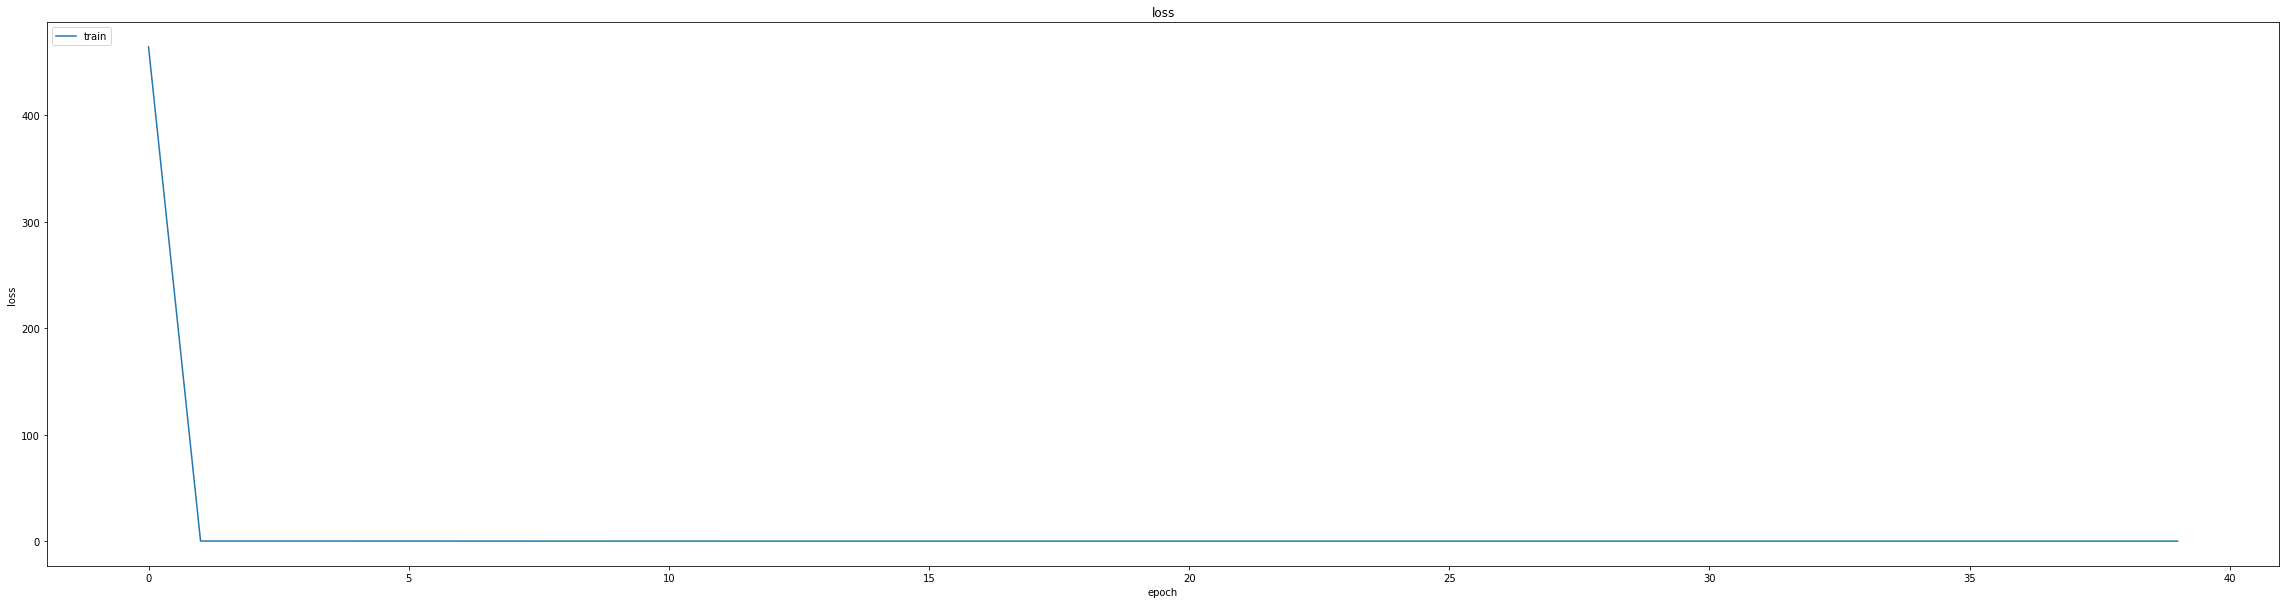

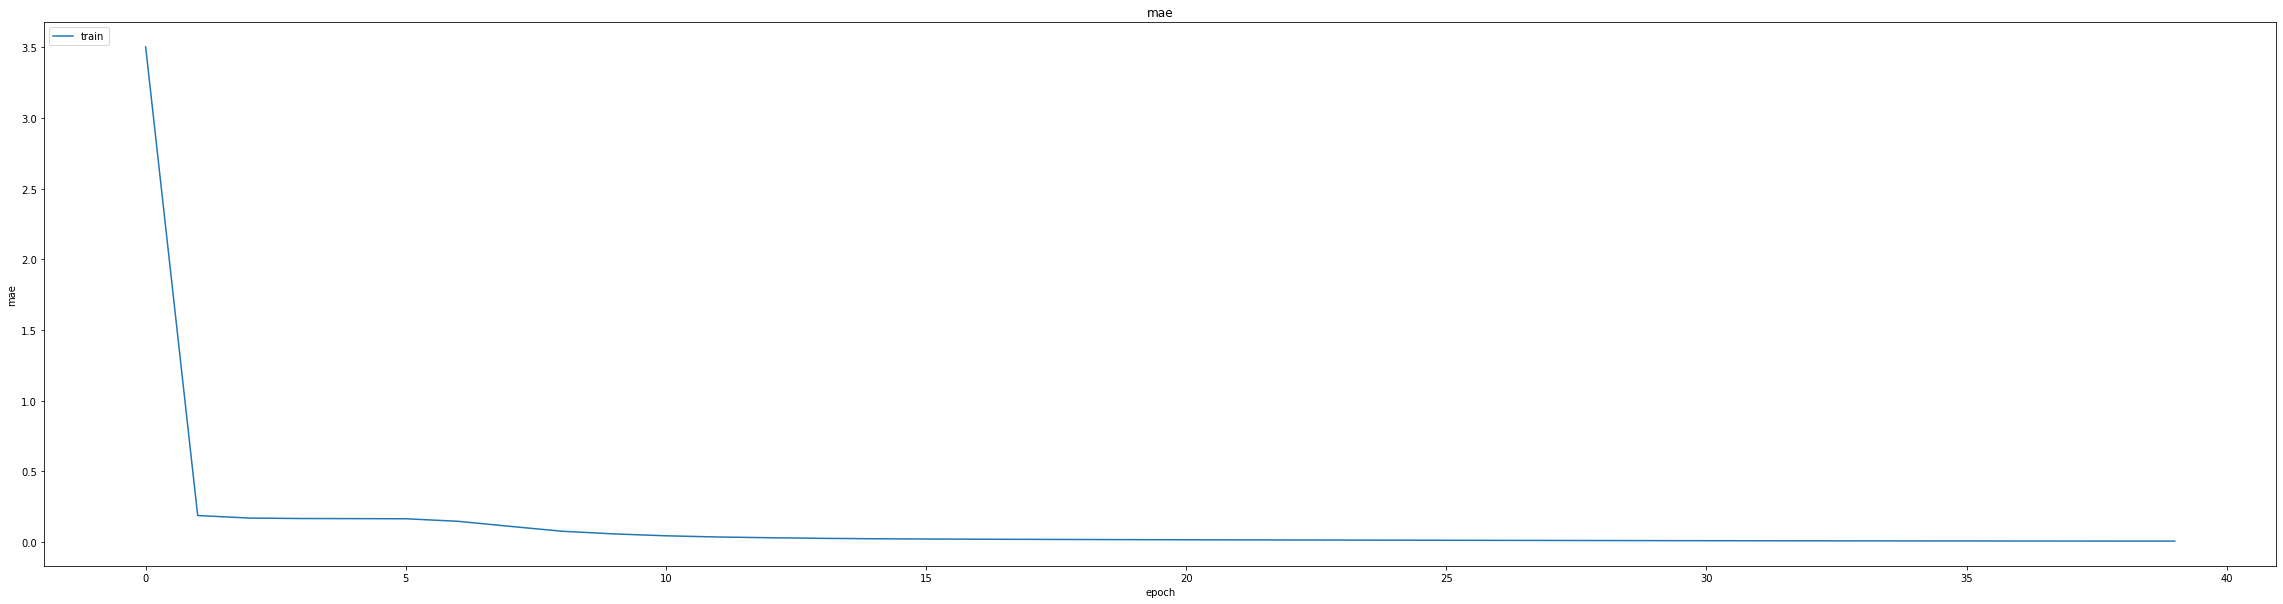

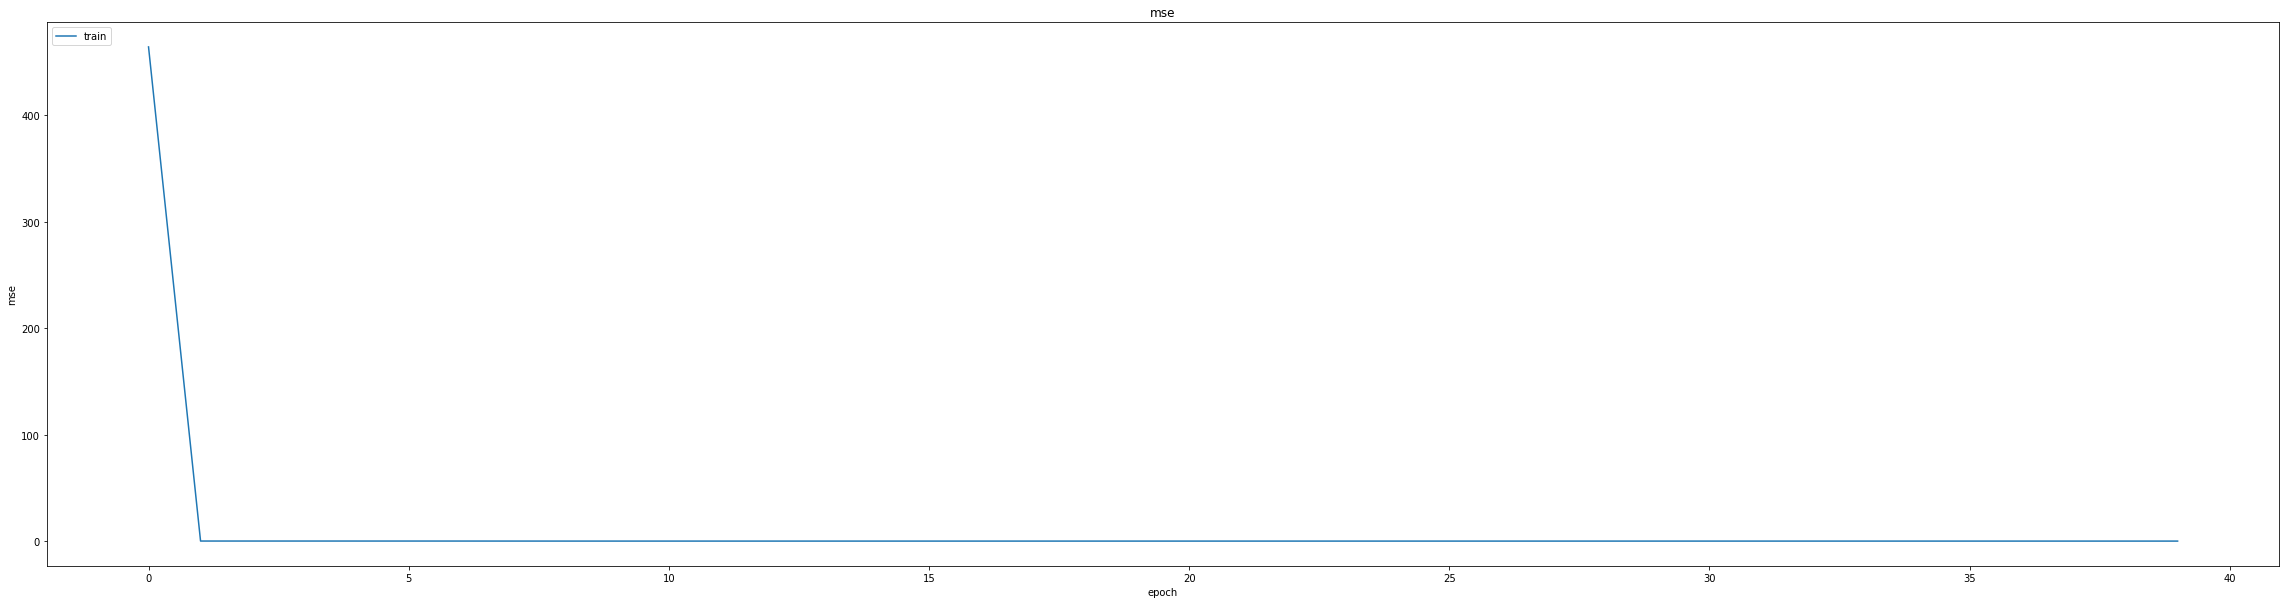

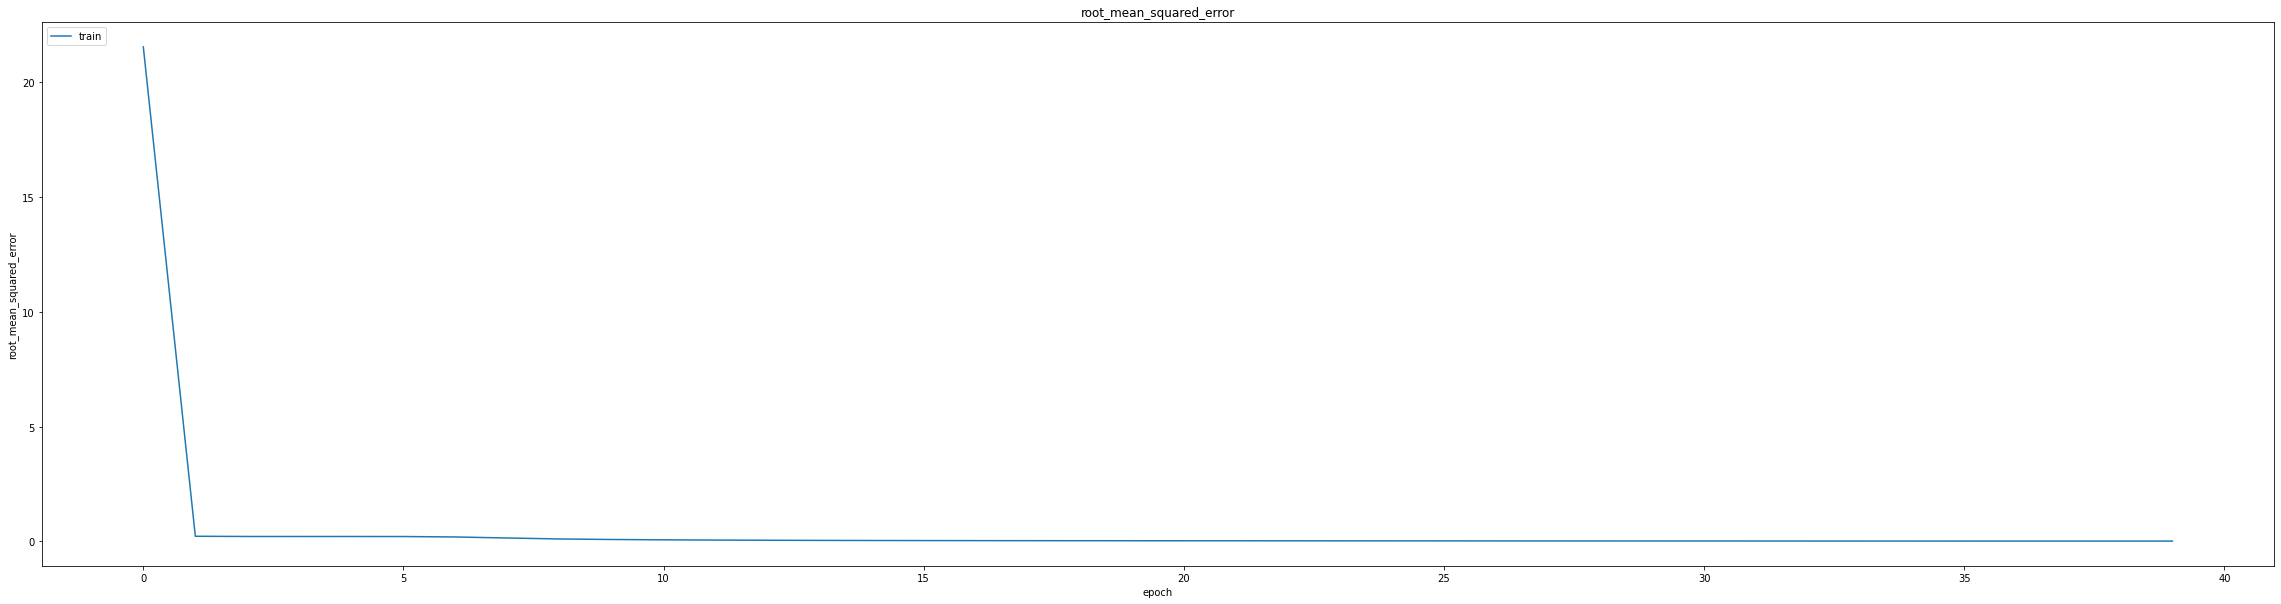

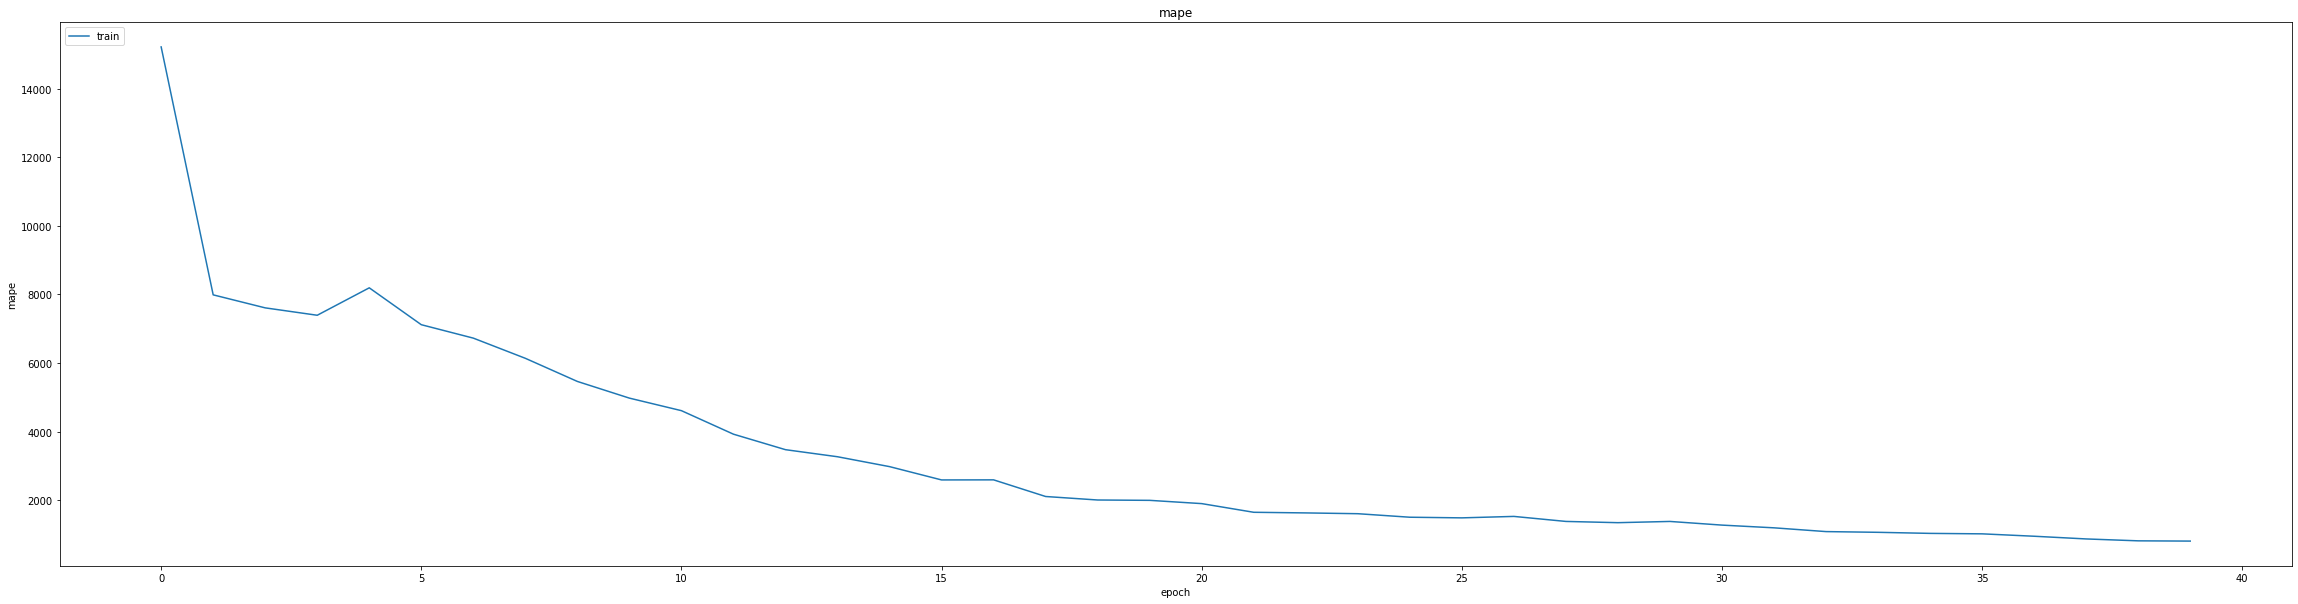

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.006128361448645592
0.008522627875208855
464/464 [==============================] - 5s 7ms/step
0.9969933425546217


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25


346/348 [============================>.] - ETA: 0s - loss: 5.9745e-04 - mae: 0.0101 - mse: 5.9745e-04 - root_mean_squared_error: 0.0244 - mape: 1245.9554
Epoch 1: val_mse did not improve from 0.00007
348/348 [==============================] - 17s 25ms/step - loss: 5.9440e-04 - mae: 0.0101 - mse: 5.9440e-04 - root_mean_squared_error: 0.0244 - mape: 1239.2235 - val_loss: 8.9056e-05 - val_mae: 0.0072 - val_mse: 8.9056e-05 - val_root_mean_squared_error: 0.0094 - val_mape: 3543.0959 - lr: 0.0010
Epoch 2/25
346/348 [============================>.] - ETA: 0s - loss: 2.7730e-05 - mae: 0.0040 - mse: 2.7730e-05 - root_mean_squared_error: 0.0053 - mape: 1187.4329
Epoch 2: val_mse improved from 0.00007 to 0.00007, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 2.7702e-05 - mae: 0.0040 - mse: 2.7702e-05 - root_mean_squared_error: 0.0053 - mape: 1181.0098 - val_loss: 6.7776e-05 - val_mae: 0.0059 - val_mse: 6.7776e-05 - val_root_mean_squared_error: 0.0082 - val_mape: 3405.0754 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
348/348 [==============================] - ETA: 0s - loss: 2.5810e-05 - mae: 0.0039 - mse: 2.5810e-05 - root_mean_squared_error: 0.0051 - mape: 1191.8936
Epoch 3: val_mse did not improve from 0.00007
348/348 [==============================] - 7s 19ms/step - loss: 2.5810e-05 - mae: 0.0039 - mse: 2.5810e-05 - root_mean_squared_error: 0.0051 - mape: 1191.8936 - val_loss: 8.1789e-05 - val_mae: 0.0067 - val_mse: 8.1789e-05 - val_root_mean_squared_error: 0.0090 - val_mape: 2774.2556 - lr: 9.0000e-04
Epoch 4/25
348/348 [==============================] - ETA: 0s - loss: 3.2316e-05 - mae: 0.0044 - mse: 3.2316e-05 - root_mean_squared_error: 0.0057 - mape: 93

348/348 [==============================] - 39s 113ms/step - loss: 2.7654e-05 - mae: 0.0041 - mse: 2.7654e-05 - root_mean_squared_error: 0.0053 - mape: 870.0290 - val_loss: 6.7561e-05 - val_mae: 0.0060 - val_mse: 6.7561e-05 - val_root_mean_squared_error: 0.0082 - val_mape: 2765.7678 - lr: 5.9049e-04
Epoch 12/25
345/348 [============================>.] - ETA: 0s - loss: 2.7634e-05 - mae: 0.0041 - mse: 2.7634e-05 - root_mean_squared_error: 0.0053 - mape: 781.1753
Epoch 12: val_mse improved from 0.00007 to 0.00006, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 2.7639e-05 - mae: 0.0041 - mse: 2.7639e-05 - root_mean_squared_error: 0.0053 - mape: 774.7088 - val_loss: 6.0584e-05 - val_mae: 0.0056 - val_mse: 6.0584e-05 - val_root_mean_squared_error: 0.0078 - val_mape: 2438.0259 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/25
348/348 [==============================] - ETA: 0s - loss: 2.7368e-05 - mae: 0.0041 - mse: 2.7368e-05 - root_mean_squared_error: 0.0052 - mape: 613.6068
Epoch 13: val_mse did not improve from 0.00006
348/348 [==============================] - 7s 19ms/step - loss: 2.7368e-05 - mae: 0.0041 - mse: 2.7368e-05 - root_mean_squared_error: 0.0052 - mape: 613.6068 - val_loss: 6.9141e-05 - val_mae: 0.0063 - val_mse: 6.9141e-05 - val_root_mean_squared_error: 0.0083 - val_mape: 2219.4167 - lr: 5.3144e-04
Epoch 14/25
348/348 [==============================] - ETA: 0s - loss: 2.9679e-05 - mae: 0.0042 - mse: 2.9679e-05 - root_mean_squared_error: 0.0054 - mape

348/348 [==============================] - 39s 113ms/step - loss: 1.7905e-05 - mae: 0.0033 - mse: 1.7905e-05 - root_mean_squared_error: 0.0042 - mape: 408.5407 - val_loss: 5.8879e-05 - val_mae: 0.0055 - val_mse: 5.8879e-05 - val_root_mean_squared_error: 0.0077 - val_mape: 1673.2100 - lr: 2.8243e-04


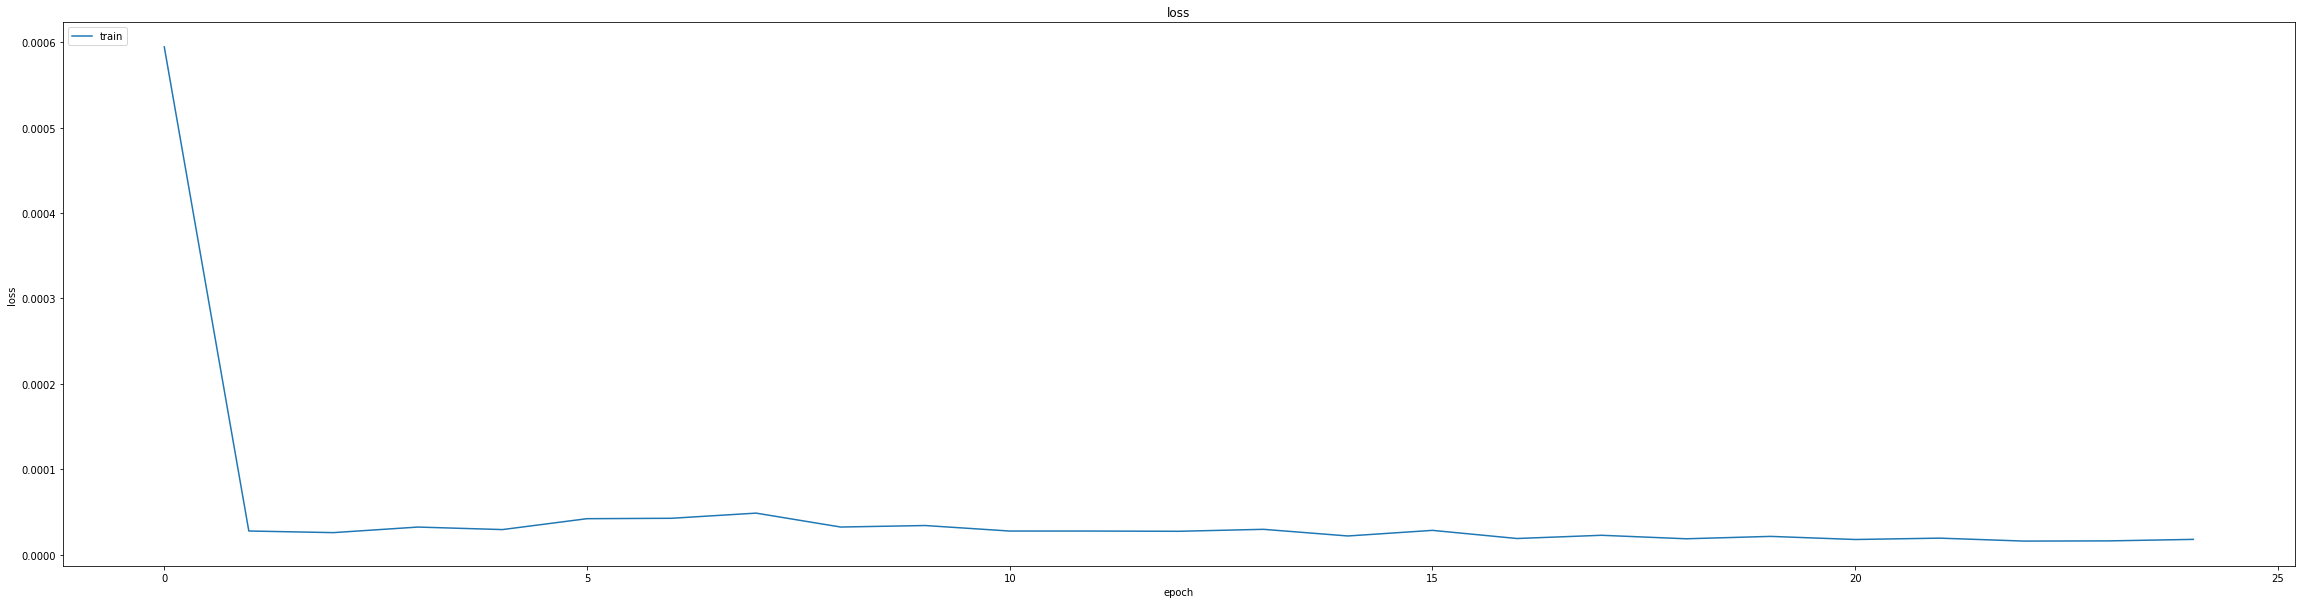

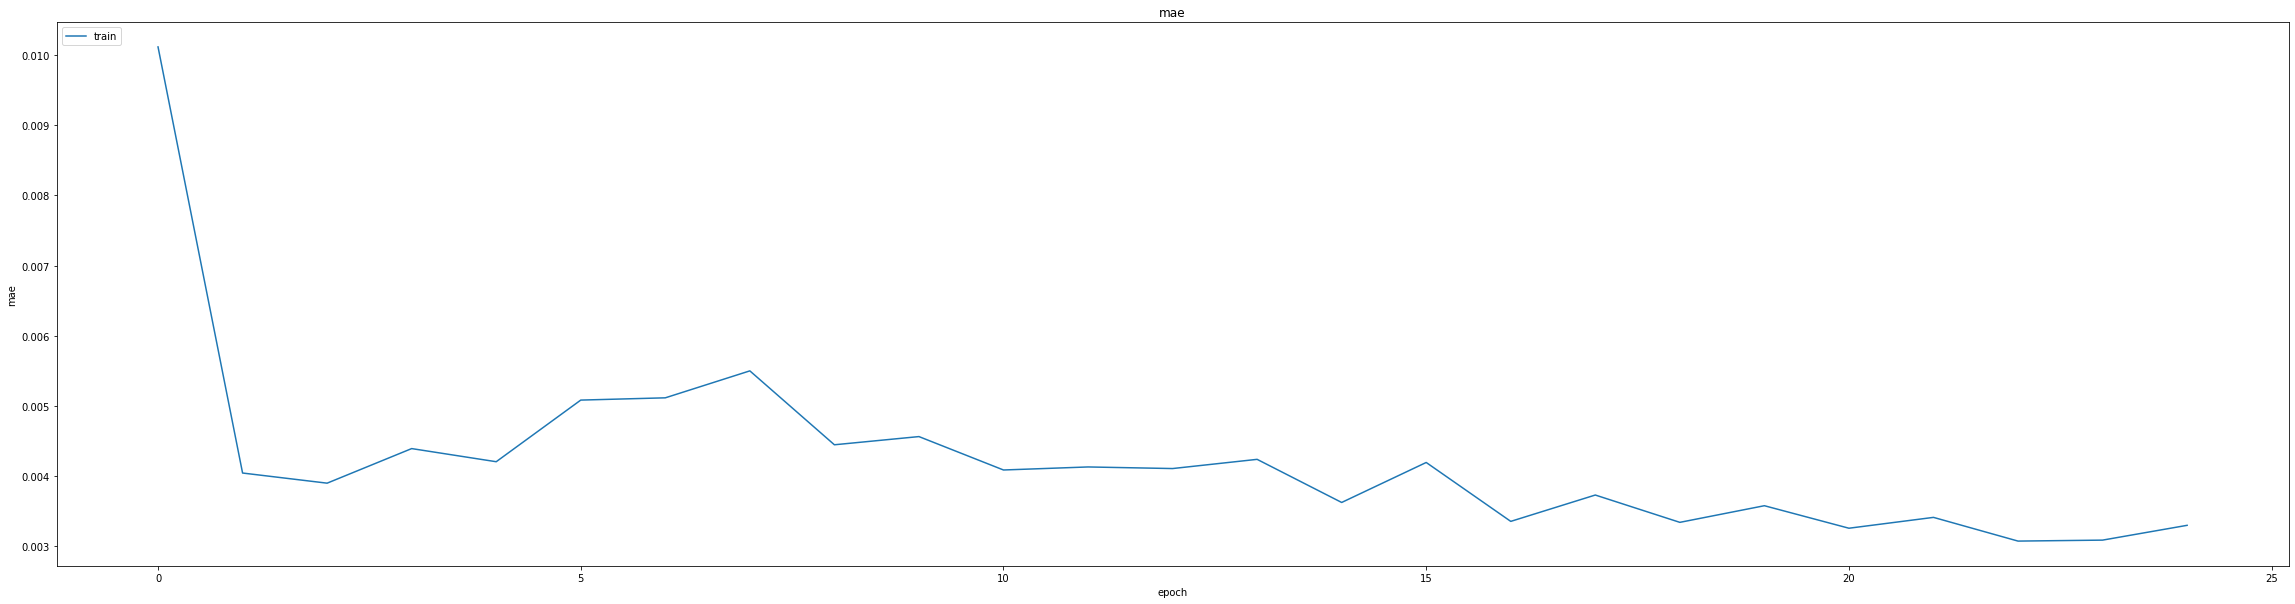

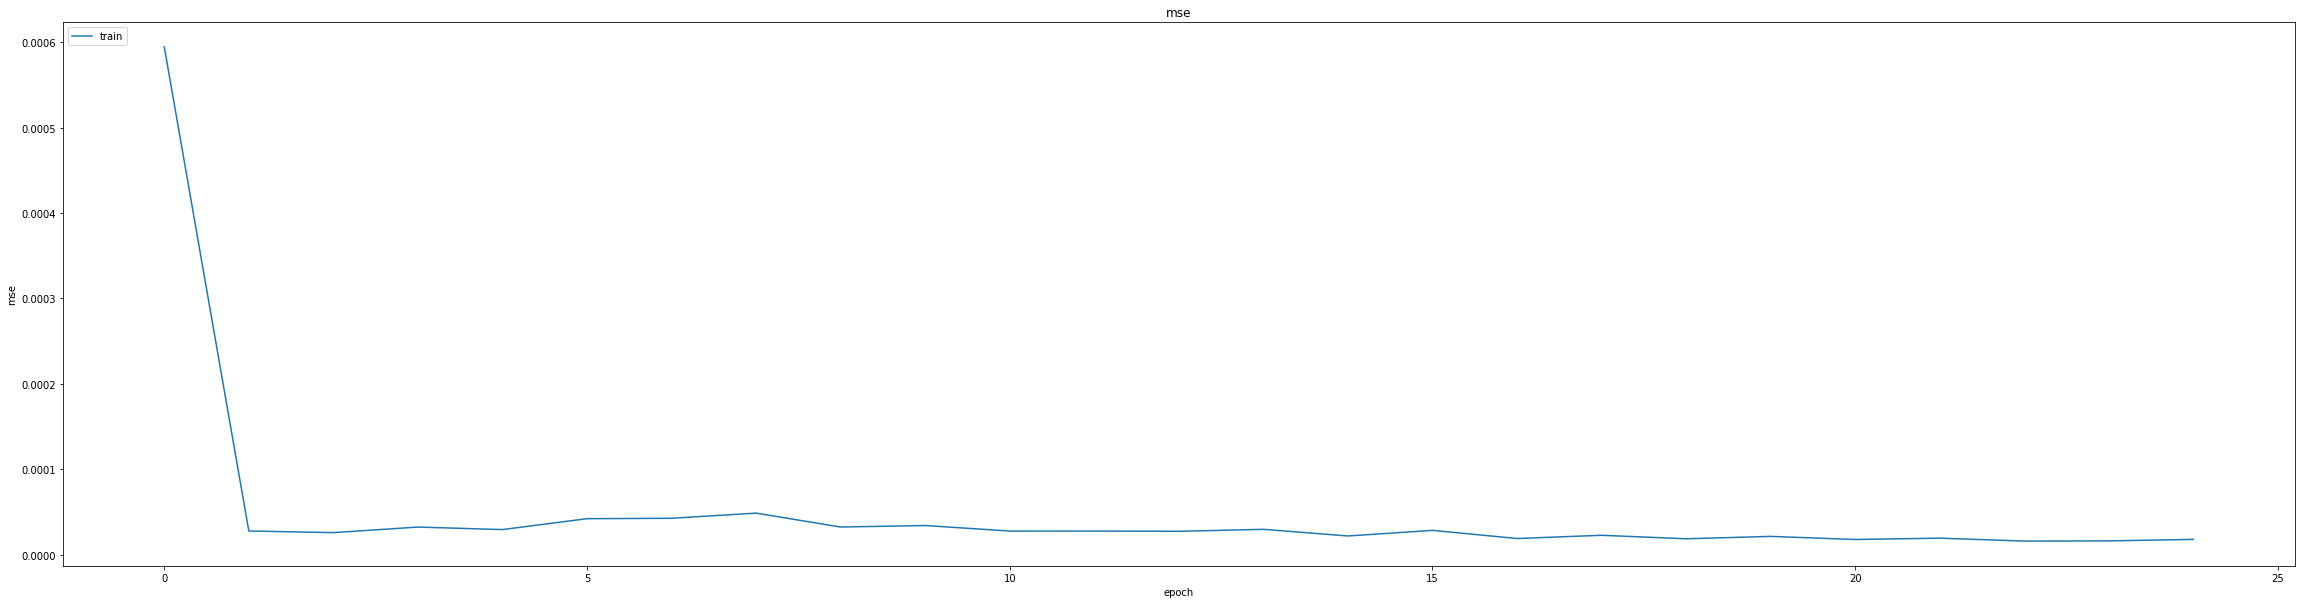

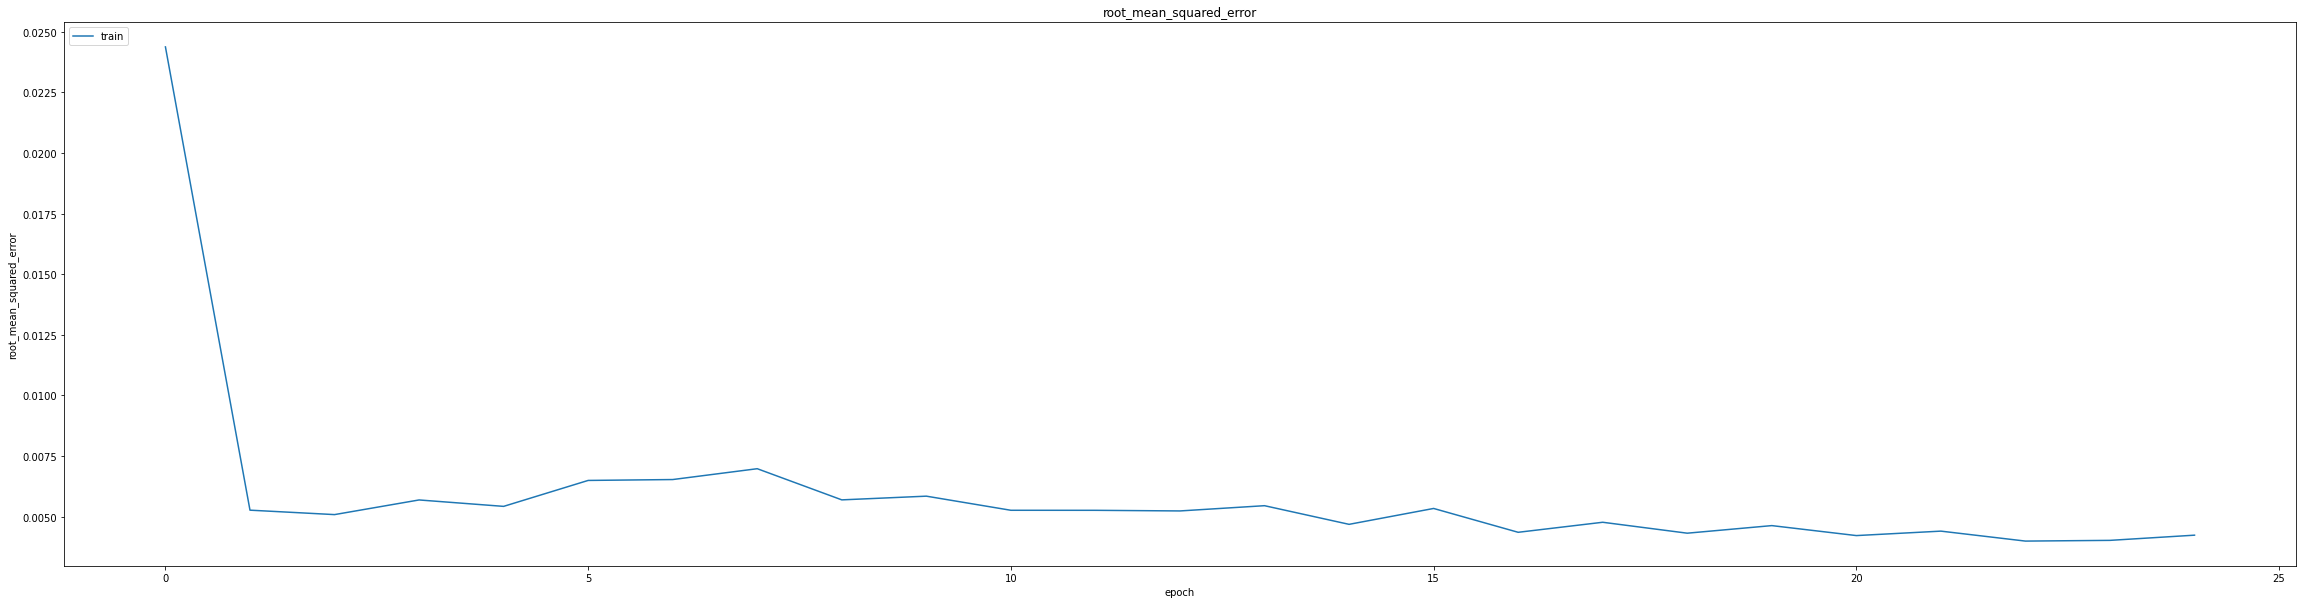

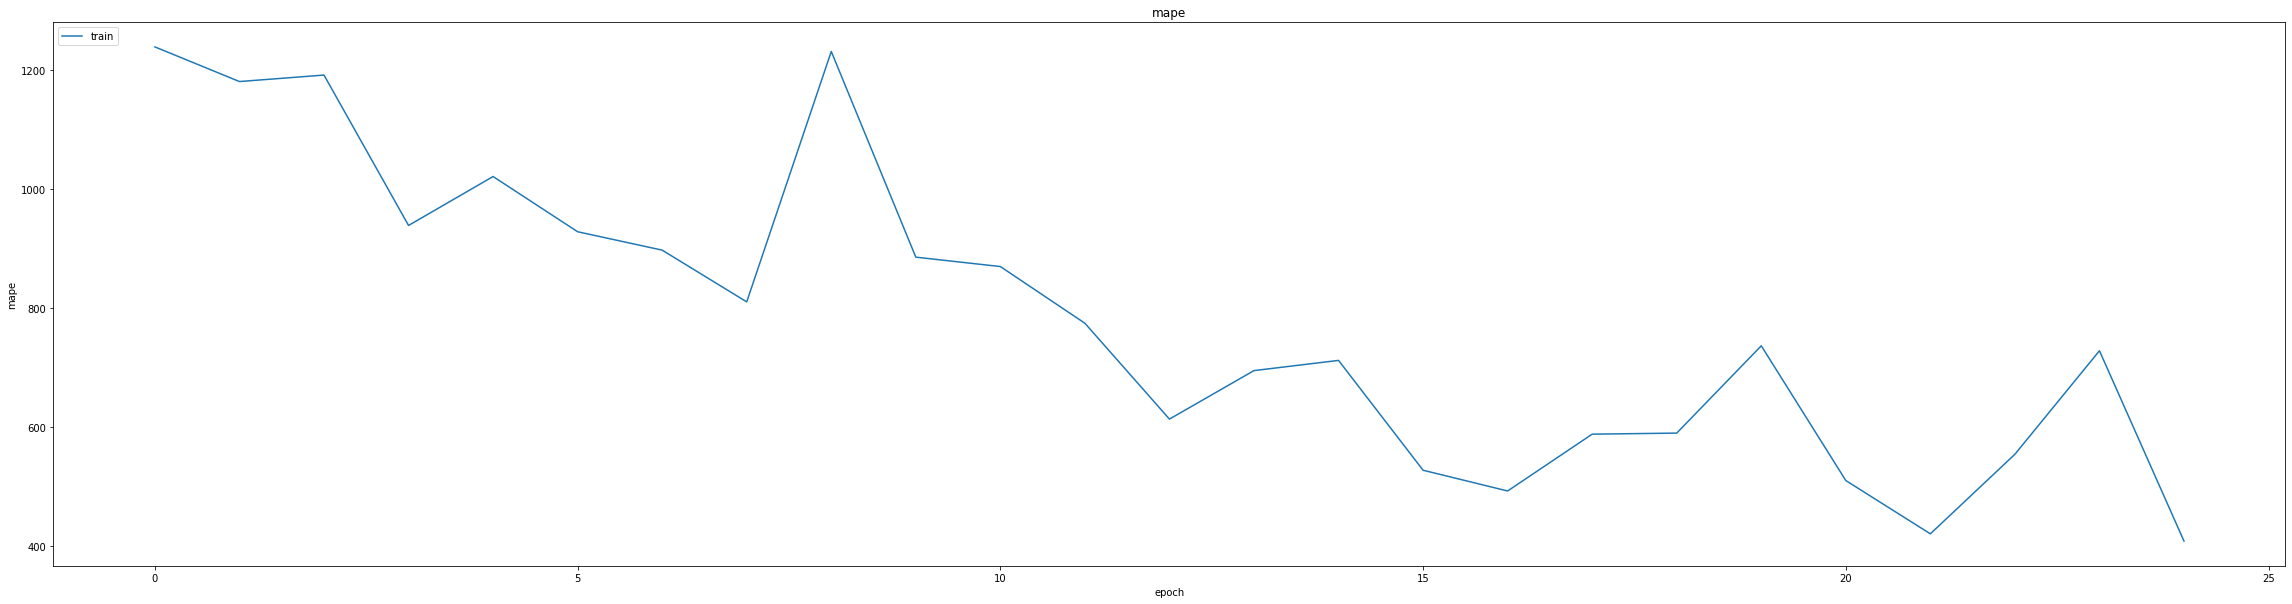

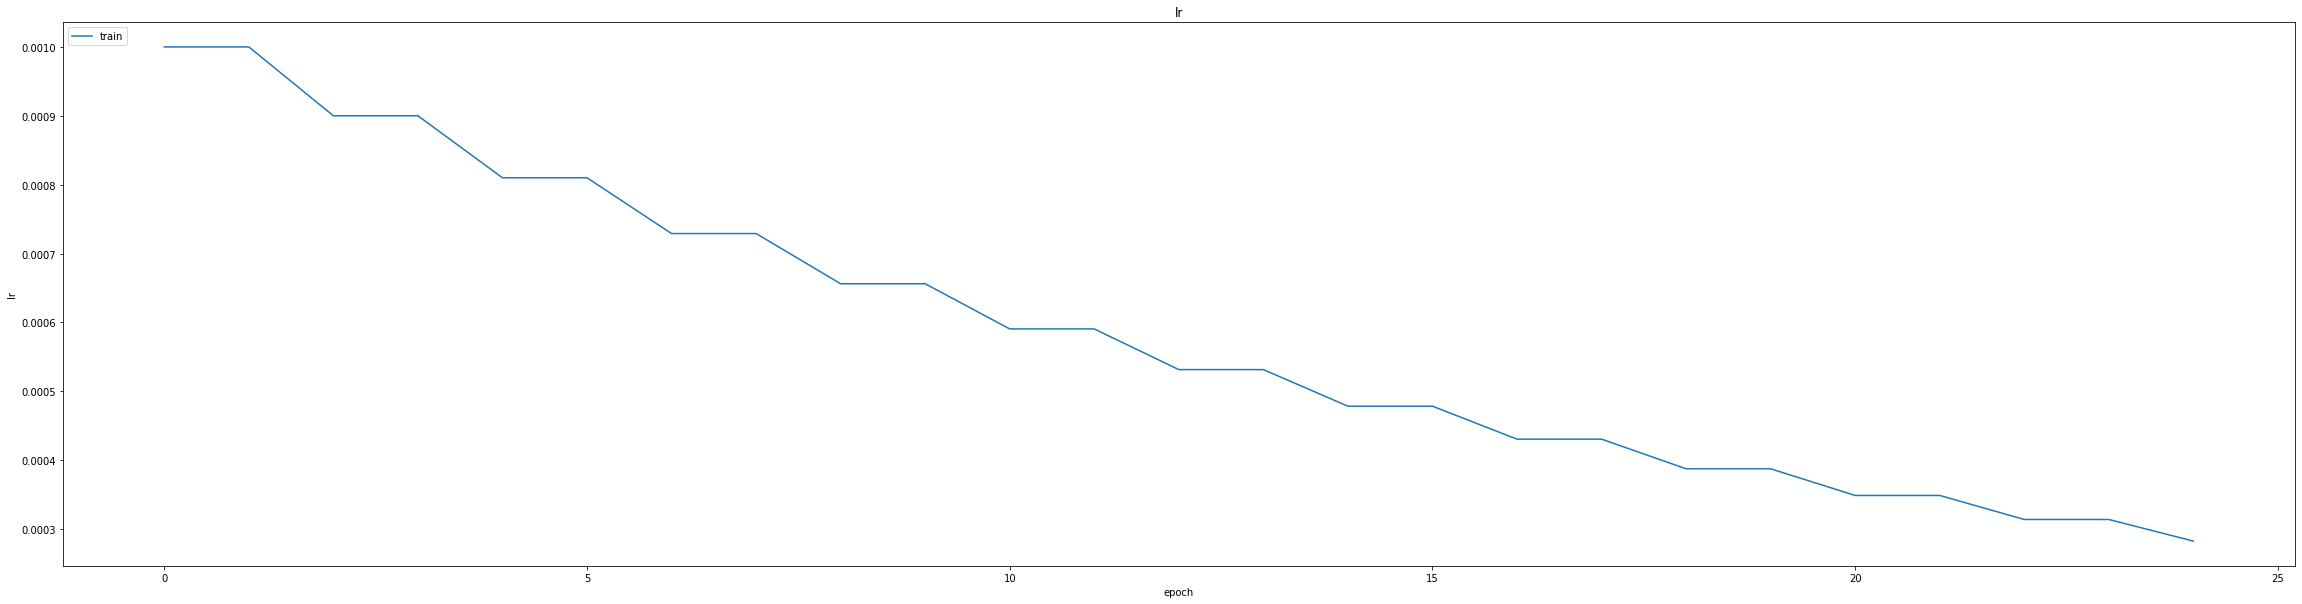

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.00546645512804389
0.007673271466046572
464/464 [==============================] - 5s 7ms/step
0.9984103634086872


464/464 [==============================] - 3s 6ms/step


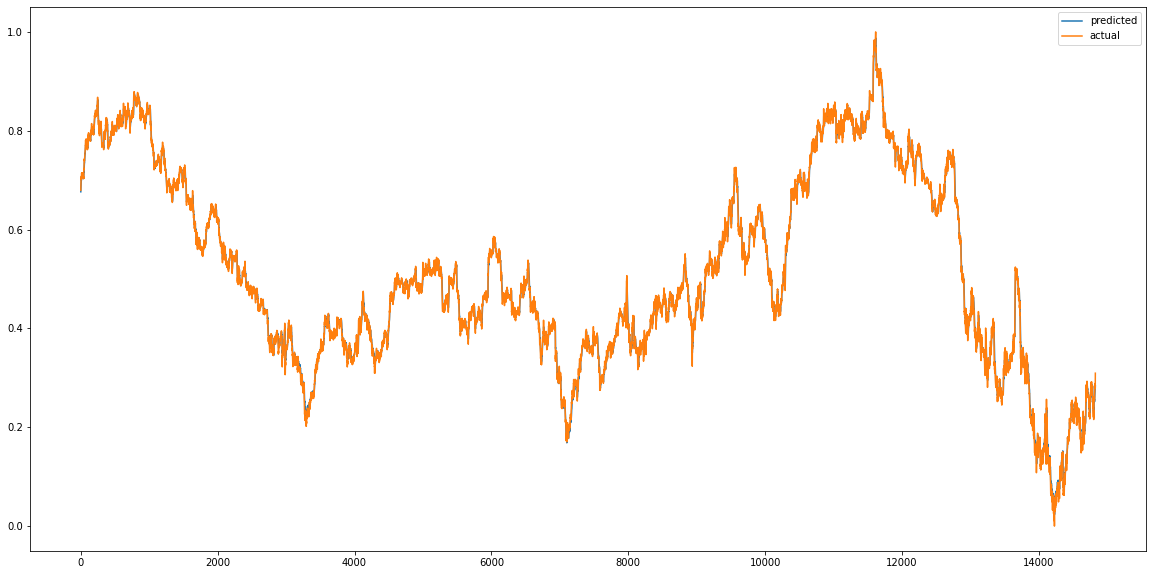

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


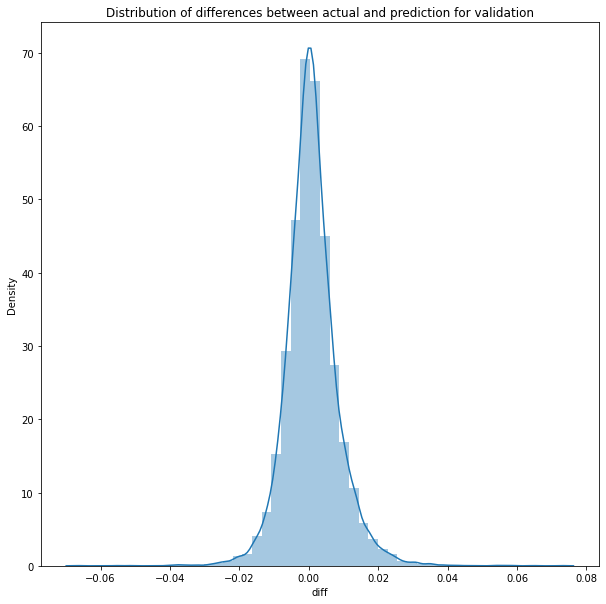

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 3s 6ms/step


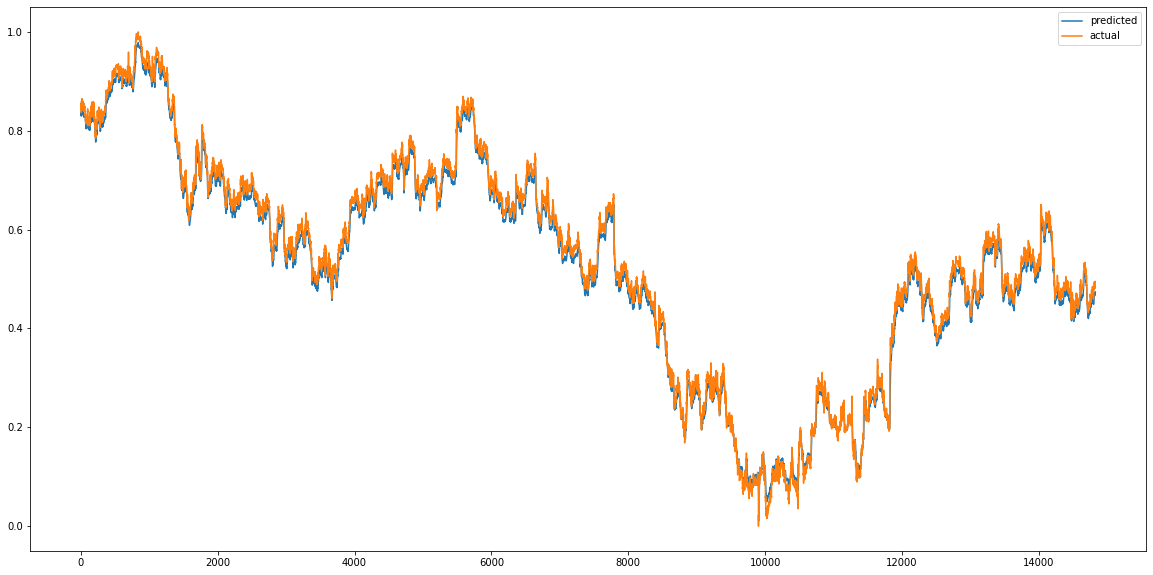

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


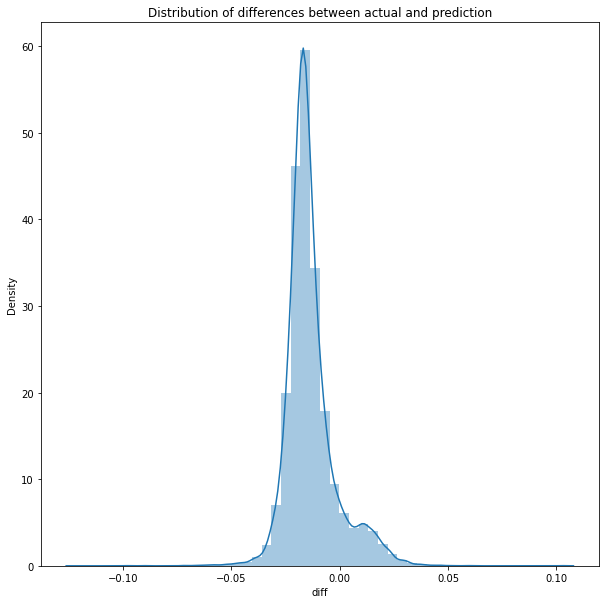

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.00031494246457594517
RMSE :  0.01774661839833001
MAE :  0.016046152554727286
464/464 [==============================] - 3s 7ms/step
R2_Score  : 0.9937546681571403


count    14827.000000
mean        -0.013520
std          0.011497
min         -0.121071
25%         -0.019870
50%         -0.015725
75%         -0.009926
max          0.102777
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 256)           275456    
                                                                 
 lstm_1 (LSTM)               (None, 24, 64)            82176     
                                                                 
 dropout_1 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                5184      
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
347/348 [============================>.] - ETA: 0s - loss: 2505.7522 - mae: 23.6626 - mse: 2505.7522 - root_mean_squared_error: 50.0575 - mape: 1055021.7500
Epoch 1: val_mse improved from inf to 8.72785, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 23s 56ms/step - loss: 2499.4141 - mae: 23.6097 - mse: 2499.4141 - root_mean_squared_error: 49.9941 - mape: 1052345.6250 - val_loss: 8.7279 - val_mae: 2.9480 - val_mse: 8.7279 - val_root_mean_squared_error: 2.9543 - val_mape: 234189.8906
Epoch 2/75
345/348 [============================>.] - ETA: 0s - loss: 3.5231 - mae: 1.8046 - mse: 3.5231 - root_mean_squared_error: 1.8770 - mape: 60316.0938
Epoch 2: val_mse improved from 8.72785 to 1.68397, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 19s 56ms/step - loss: 3.5054 - mae: 1.7992 - mse: 3.5054 - root_mean_squared_error: 1.8723 - mape: 59818.1016 - val_loss: 1.6840 - val_mae: 1.2833 - val_mse: 1.6840 - val_root_mean_squared_error: 1.2977 - val_mape: 121487.1797
Epoch 3/75
345/348 [============================>.] - ETA: 0s - loss: 0.7817 - mae: 0.8481 - mse: 0.7817 - root_mean_squared_error: 0.8842 - mape: 38579.1797
Epoch 3: val_mse improved from 1.68397 to 0.60580, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.7788 - mae: 0.8463 - mse: 0.7788 - root_mean_squared_error: 0.8825 - mape: 38260.6445 - val_loss: 0.6058 - val_mae: 0.7542 - val_mse: 0.6058 - val_root_mean_squared_error: 0.7783 - val_mape: 85661.5000
Epoch 4/75
345/348 [============================>.] - ETA: 0s - loss: 0.2692 - mae: 0.4749 - mse: 0.2692 - root_mean_squared_error: 0.5188 - mape: 27667.5879
Epoch 4: val_mse improved from 0.60580 to 0.28968, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.2683 - mae: 0.4739 - mse: 0.2683 - root_mean_squared_error: 0.5180 - mape: 27438.9609 - val_loss: 0.2897 - val_mae: 0.5026 - val_mse: 0.2897 - val_root_mean_squared_error: 0.5382 - val_mape: 68632.0469
Epoch 5/75
345/348 [============================>.] - ETA: 0s - loss: 0.1190 - mae: 0.2839 - mse: 0.1190 - root_mean_squared_error: 0.3450 - mape: 22953.8770
Epoch 5: val_mse improved from 0.28968 to 0.16741, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.1187 - mae: 0.2833 - mse: 0.1187 - root_mean_squared_error: 0.3446 - mape: 22764.0762 - val_loss: 0.1674 - val_mae: 0.3621 - val_mse: 0.1674 - val_root_mean_squared_error: 0.4092 - val_mape: 59048.4727
Epoch 6/75
347/348 [============================>.] - ETA: 0s - loss: 0.0666 - mae: 0.1957 - mse: 0.0666 - root_mean_squared_error: 0.2580 - mape: 18415.0312
Epoch 6: val_mse improved from 0.16741 to 0.11270, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0665 - mae: 0.1957 - mse: 0.0665 - root_mean_squared_error: 0.2579 - mape: 18368.3848 - val_loss: 0.1127 - val_mae: 0.2858 - val_mse: 0.1127 - val_root_mean_squared_error: 0.3357 - val_mape: 53226.3516
Epoch 7/75
348/348 [==============================] - ETA: 0s - loss: 0.0474 - mae: 0.1651 - mse: 0.0474 - root_mean_squared_error: 0.2176 - mape: 17805.7832
Epoch 7: val_mse improved from 0.11270 to 0.08594, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0474 - mae: 0.1651 - mse: 0.0474 - root_mean_squared_error: 0.2176 - mape: 17805.7832 - val_loss: 0.0859 - val_mae: 0.2487 - val_mse: 0.0859 - val_root_mean_squared_error: 0.2932 - val_mape: 49577.1836
Epoch 8/75
345/348 [============================>.] - ETA: 0s - loss: 0.0403 - mae: 0.1546 - mse: 0.0403 - root_mean_squared_error: 0.2009 - mape: 16660.6777
Epoch 8: val_mse improved from 0.08594 to 0.07226, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0403 - mae: 0.1546 - mse: 0.0403 - root_mean_squared_error: 0.2009 - mape: 16522.9277 - val_loss: 0.0723 - val_mae: 0.2287 - val_mse: 0.0723 - val_root_mean_squared_error: 0.2688 - val_mape: 47313.2383
Epoch 9/75
346/348 [============================>.] - ETA: 0s - loss: 0.0380 - mae: 0.1529 - mse: 0.0380 - root_mean_squared_error: 0.1948 - mape: 15156.6836
Epoch 9: val_mse improved from 0.07226 to 0.06527, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 0.0379 - mae: 0.1529 - mse: 0.0379 - root_mean_squared_error: 0.1948 - mape: 15074.8232 - val_loss: 0.0653 - val_mae: 0.2183 - val_mse: 0.0653 - val_root_mean_squared_error: 0.2555 - val_mape: 45984.5273
Epoch 10/75
344/348 [============================>.] - ETA: 0s - loss: 0.0373 - mae: 0.1535 - mse: 0.0373 - root_mean_squared_error: 0.1932 - mape: 15072.7539
Epoch 10: val_mse improved from 0.06527 to 0.06163, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0373 - mae: 0.1535 - mse: 0.0373 - root_mean_squared_error: 0.1932 - mape: 14904.8916 - val_loss: 0.0616 - val_mae: 0.2127 - val_mse: 0.0616 - val_root_mean_squared_error: 0.2483 - val_mape: 45225.8008
Epoch 11/75
345/348 [============================>.] - ETA: 0s - loss: 0.0373 - mae: 0.1545 - mse: 0.0373 - root_mean_squared_error: 0.1931 - mape: 15441.5479
Epoch 11: val_mse improved from 0.06163 to 0.05990, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0372 - mae: 0.1544 - mse: 0.0372 - root_mean_squared_error: 0.1930 - mape: 15313.8496 - val_loss: 0.0599 - val_mae: 0.2099 - val_mse: 0.0599 - val_root_mean_squared_error: 0.2447 - val_mape: 44845.1992
Epoch 12/75
347/348 [============================>.] - ETA: 0s - loss: 0.0371 - mae: 0.1548 - mse: 0.0371 - root_mean_squared_error: 0.1926 - mape: 15788.4189
Epoch 12: val_mse improved from 0.05990 to 0.05925, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0371 - mae: 0.1548 - mse: 0.0371 - root_mean_squared_error: 0.1927 - mape: 15748.4688 - val_loss: 0.0593 - val_mae: 0.2089 - val_mse: 0.0593 - val_root_mean_squared_error: 0.2434 - val_mape: 44700.8906
Epoch 13/75
344/348 [============================>.] - ETA: 0s - loss: 0.0371 - mae: 0.1549 - mse: 0.0371 - root_mean_squared_error: 0.1925 - mape: 14814.6484
Epoch 13: val_mse improved from 0.05925 to 0.05897, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0371 - mae: 0.1550 - mse: 0.0371 - root_mean_squared_error: 0.1926 - mape: 14649.6963 - val_loss: 0.0590 - val_mae: 0.2085 - val_mse: 0.0590 - val_root_mean_squared_error: 0.2428 - val_mape: 44636.3750
Epoch 14/75
348/348 [==============================] - ETA: 0s - loss: 0.0371 - mae: 0.1551 - mse: 0.0371 - root_mean_squared_error: 0.1927 - mape: 14292.1846
Epoch 14: val_mse improved from 0.05897 to 0.05895, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0371 - mae: 0.1551 - mse: 0.0371 - root_mean_squared_error: 0.1927 - mape: 14292.1846 - val_loss: 0.0589 - val_mae: 0.2084 - val_mse: 0.0589 - val_root_mean_squared_error: 0.2428 - val_mape: 44630.3594
Epoch 15/75
344/348 [============================>.] - ETA: 0s - loss: 0.0370 - mae: 0.1547 - mse: 0.0370 - root_mean_squared_error: 0.1924 - mape: 15251.3633
Epoch 15: val_mse improved from 0.05895 to 0.05893, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.0370 - mae: 0.1548 - mse: 0.0370 - root_mean_squared_error: 0.1925 - mape: 15081.5547 - val_loss: 0.0589 - val_mae: 0.2084 - val_mse: 0.0589 - val_root_mean_squared_error: 0.2428 - val_mape: 44627.6523
Epoch 16/75
346/348 [============================>.] - ETA: 0s - loss: 0.0371 - mae: 0.1548 - mse: 0.0371 - root_mean_squared_error: 0.1925 - mape: 14931.8945
Epoch 16: val_mse improved from 0.05893 to 0.05858, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0371 - mae: 0.1548 - mse: 0.0371 - root_mean_squared_error: 0.1925 - mape: 14851.2559 - val_loss: 0.0586 - val_mae: 0.2078 - val_mse: 0.0586 - val_root_mean_squared_error: 0.2420 - val_mape: 44545.9961
Epoch 17/75
345/348 [============================>.] - ETA: 0s - loss: 0.0371 - mae: 0.1549 - mse: 0.0371 - root_mean_squared_error: 0.1925 - mape: 15342.3945
Epoch 17: val_mse did not improve from 0.05858
348/348 [==============================] - 4s 12ms/step - loss: 0.0371 - mae: 0.1550 - mse: 0.0371 - root_mean_squared_error: 0.1926 - mape: 15215.5605 - val_loss: 0.0587 - val_mae: 0.2080 - val_mse: 0.0587 - val_root_mean_squared_error: 0.2422 - val_mape: 44570.6680
Epoch 18/75
347/348 [============================>.] - ETA: 0s - loss: 0.0370 - mae: 0.1549 - mse: 0.0370 - root_mean_squared_error: 0.1924 - mape: 16138.2207
Epoch 18: val_mse did not improve from 0.05858
348/348 [==============================] - 4s 12ms/

348/348 [==============================] - 15s 44ms/step - loss: 0.0371 - mae: 0.1549 - mse: 0.0371 - root_mean_squared_error: 0.1925 - mape: 15512.2471 - val_loss: 0.0585 - val_mae: 0.2077 - val_mse: 0.0585 - val_root_mean_squared_error: 0.2418 - val_mape: 44523.2891
Epoch 24/75
347/348 [============================>.] - ETA: 0s - loss: 0.0370 - mae: 0.1548 - mse: 0.0370 - root_mean_squared_error: 0.1923 - mape: 14353.8145
Epoch 24: val_mse did not improve from 0.05848
348/348 [==============================] - 5s 15ms/step - loss: 0.0370 - mae: 0.1548 - mse: 0.0370 - root_mean_squared_error: 0.1923 - mape: 14317.4971 - val_loss: 0.0589 - val_mae: 0.2083 - val_mse: 0.0589 - val_root_mean_squared_error: 0.2426 - val_mape: 44614.9375
Epoch 25/75
347/348 [============================>.] - ETA: 0s - loss: 0.0370 - mae: 0.1549 - mse: 0.0370 - root_mean_squared_error: 0.1923 - mape: 14976.9365
Epoch 25: val_mse did not improve from 0.05848
348/348 [==============================] - 4s 12ms/

348/348 [==============================] - 15s 43ms/step - loss: 0.0368 - mae: 0.1543 - mse: 0.0368 - root_mean_squared_error: 0.1918 - mape: 15085.2422 - val_loss: 0.0573 - val_mae: 0.2058 - val_mse: 0.0573 - val_root_mean_squared_error: 0.2394 - val_mape: 44249.0117
Epoch 39/75
344/348 [============================>.] - ETA: 0s - loss: 0.0368 - mae: 0.1544 - mse: 0.0368 - root_mean_squared_error: 0.1919 - mape: 15273.2207
Epoch 39: val_mse did not improve from 0.05731
348/348 [==============================] - 4s 12ms/step - loss: 0.0368 - mae: 0.1544 - mse: 0.0368 - root_mean_squared_error: 0.1918 - mape: 15103.1143 - val_loss: 0.0628 - val_mae: 0.2144 - val_mse: 0.0628 - val_root_mean_squared_error: 0.2505 - val_mape: 45463.8008
Epoch 40/75
346/348 [============================>.] - ETA: 0s - loss: 0.0368 - mae: 0.1543 - mse: 0.0368 - root_mean_squared_error: 0.1919 - mape: 15523.4736
Epoch 40: val_mse did not improve from 0.05731
348/348 [==============================] - 4s 12ms/

348/348 [==============================] - 15s 44ms/step - loss: 0.0361 - mae: 0.1526 - mse: 0.0361 - root_mean_squared_error: 0.1900 - mape: 15539.3994 - val_loss: 0.0553 - val_mae: 0.2001 - val_mse: 0.0553 - val_root_mean_squared_error: 0.2352 - val_mape: 44017.0039
Epoch 44/75
344/348 [============================>.] - ETA: 0s - loss: 0.0358 - mae: 0.1517 - mse: 0.0358 - root_mean_squared_error: 0.1892 - mape: 14817.7715
Epoch 44: val_mse improved from 0.05530 to 0.05042, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0358 - mae: 0.1516 - mse: 0.0358 - root_mean_squared_error: 0.1891 - mape: 14652.7461 - val_loss: 0.0504 - val_mae: 0.1913 - val_mse: 0.0504 - val_root_mean_squared_error: 0.2246 - val_mape: 42870.8125
Epoch 45/75
348/348 [==============================] - ETA: 0s - loss: 0.0322 - mae: 0.1421 - mse: 0.0322 - root_mean_squared_error: 0.1793 - mape: 14033.7881
Epoch 45: val_mse improved from 0.05042 to 0.01878, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 0.0322 - mae: 0.1421 - mse: 0.0322 - root_mean_squared_error: 0.1793 - mape: 14033.7881 - val_loss: 0.0188 - val_mae: 0.1049 - val_mse: 0.0188 - val_root_mean_squared_error: 0.1371 - val_mape: 34464.0742
Epoch 46/75
345/348 [============================>.] - ETA: 0s - loss: 0.0053 - mae: 0.0517 - mse: 0.0053 - root_mean_squared_error: 0.0726 - mape: 7892.7295
Epoch 46: val_mse improved from 0.01878 to 0.00256, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 0.0052 - mae: 0.0515 - mse: 0.0052 - root_mean_squared_error: 0.0724 - mape: 7827.3838 - val_loss: 0.0026 - val_mae: 0.0307 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0506 - val_mape: 21477.3789
Epoch 47/75
347/348 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0306 - mse: 0.0018 - root_mean_squared_error: 0.0421 - mape: 6693.9116
Epoch 47: val_mse improved from 0.00256 to 0.00178, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 0.0018 - mae: 0.0306 - mse: 0.0018 - root_mean_squared_error: 0.0421 - mape: 6677.0610 - val_loss: 0.0018 - val_mae: 0.0281 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0422 - val_mape: 18274.8262
Epoch 48/75
346/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0241 - mse: 0.0011 - root_mean_squared_error: 0.0329 - mape: 5939.5396
Epoch 48: val_mse improved from 0.00178 to 0.00137, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0011 - mae: 0.0241 - mse: 0.0011 - root_mean_squared_error: 0.0329 - mape: 5907.4160 - val_loss: 0.0014 - val_mae: 0.0262 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0370 - val_mape: 16074.6299
Epoch 49/75
346/348 [============================>.] - ETA: 0s - loss: 8.1131e-04 - mae: 0.0210 - mse: 8.1131e-04 - root_mean_squared_error: 0.0285 - mape: 5113.5122
Epoch 49: val_mse improved from 0.00137 to 0.00106, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 8.1025e-04 - mae: 0.0210 - mse: 8.1025e-04 - root_mean_squared_error: 0.0285 - mape: 5085.8555 - val_loss: 0.0011 - val_mae: 0.0228 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 14645.0742
Epoch 50/75
345/348 [============================>.] - ETA: 0s - loss: 6.1035e-04 - mae: 0.0183 - mse: 6.1035e-04 - root_mean_squared_error: 0.0247 - mape: 4650.3628
Epoch 50: val_mse improved from 0.00106 to 0.00095, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 6.0905e-04 - mae: 0.0183 - mse: 6.0905e-04 - root_mean_squared_error: 0.0247 - mape: 4611.8525 - val_loss: 9.5448e-04 - val_mae: 0.0218 - val_mse: 9.5448e-04 - val_root_mean_squared_error: 0.0309 - val_mape: 13733.7744
Epoch 51/75
346/348 [============================>.] - ETA: 0s - loss: 5.0657e-04 - mae: 0.0167 - mse: 5.0657e-04 - root_mean_squared_error: 0.0225 - mape: 4675.4907
Epoch 51: val_mse improved from 0.00095 to 0.00090, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 5.0565e-04 - mae: 0.0167 - mse: 5.0565e-04 - root_mean_squared_error: 0.0225 - mape: 4650.1987 - val_loss: 9.0240e-04 - val_mae: 0.0215 - val_mse: 9.0240e-04 - val_root_mean_squared_error: 0.0300 - val_mape: 12905.5732
Epoch 52/75
344/348 [============================>.] - ETA: 0s - loss: 4.4179e-04 - mae: 0.0157 - mse: 4.4179e-04 - root_mean_squared_error: 0.0210 - mape: 4456.0698
Epoch 52: val_mse improved from 0.00090 to 0.00082, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 4.4030e-04 - mae: 0.0157 - mse: 4.4030e-04 - root_mean_squared_error: 0.0210 - mape: 4406.3608 - val_loss: 8.2319e-04 - val_mae: 0.0205 - val_mse: 8.2319e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 12363.5752
Epoch 53/75
345/348 [============================>.] - ETA: 0s - loss: 3.5543e-04 - mae: 0.0141 - mse: 3.5543e-04 - root_mean_squared_error: 0.0189 - mape: 3806.1992
Epoch 53: val_mse improved from 0.00082 to 0.00078, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 3.5489e-04 - mae: 0.0140 - mse: 3.5489e-04 - root_mean_squared_error: 0.0188 - mape: 3774.6770 - val_loss: 7.8439e-04 - val_mae: 0.0204 - val_mse: 7.8439e-04 - val_root_mean_squared_error: 0.0280 - val_mape: 11761.0811
Epoch 54/75
344/348 [============================>.] - ETA: 0s - loss: 3.3098e-04 - mae: 0.0136 - mse: 3.3098e-04 - root_mean_squared_error: 0.0182 - mape: 3749.9280
Epoch 54: val_mse did not improve from 0.00078
348/348 [==============================] - 4s 12ms/step - loss: 3.3109e-04 - mae: 0.0136 - mse: 3.3109e-04 - root_mean_squared_error: 0.0182 - mape: 3708.1104 - val_loss: 7.9118e-04 - val_mae: 0.0205 - val_mse: 7.9118e-04 - val_root_mean_squared_error: 0.0281 - val_mape: 11244.4297
Epoch 55/75
345/348 [============================>.] - ETA: 0s - loss: 2.9083e-04 - mae: 0.0128 - mse: 2.9083e-04 - root_mean_squared_error: 0.0171 - mape: 3969.6724
Epoch 55: val_mse improved from 0.00078 to 0.00076, sa

348/348 [==============================] - 15s 44ms/step - loss: 2.9061e-04 - mae: 0.0128 - mse: 2.9061e-04 - root_mean_squared_error: 0.0170 - mape: 3936.7991 - val_loss: 7.6191e-04 - val_mae: 0.0205 - val_mse: 7.6191e-04 - val_root_mean_squared_error: 0.0276 - val_mape: 10770.8643
Epoch 56/75
345/348 [============================>.] - ETA: 0s - loss: 2.5974e-04 - mae: 0.0121 - mse: 2.5974e-04 - root_mean_squared_error: 0.0161 - mape: 3447.0691
Epoch 56: val_mse improved from 0.00076 to 0.00073, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 2.5968e-04 - mae: 0.0121 - mse: 2.5968e-04 - root_mean_squared_error: 0.0161 - mape: 3418.5552 - val_loss: 7.3126e-04 - val_mae: 0.0200 - val_mse: 7.3126e-04 - val_root_mean_squared_error: 0.0270 - val_mape: 10311.8457
Epoch 57/75
345/348 [============================>.] - ETA: 0s - loss: 2.5814e-04 - mae: 0.0122 - mse: 2.5814e-04 - root_mean_squared_error: 0.0161 - mape: 3394.1946
Epoch 57: val_mse improved from 0.00073 to 0.00073, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 2.5727e-04 - mae: 0.0122 - mse: 2.5727e-04 - root_mean_squared_error: 0.0160 - mape: 3366.0820 - val_loss: 7.2510e-04 - val_mae: 0.0201 - val_mse: 7.2510e-04 - val_root_mean_squared_error: 0.0269 - val_mape: 9930.3008
Epoch 58/75
343/348 [============================>.] - ETA: 0s - loss: 2.4584e-04 - mae: 0.0120 - mse: 2.4584e-04 - root_mean_squared_error: 0.0157 - mape: 3528.8940
Epoch 58: val_mse improved from 0.00073 to 0.00071, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 2.4523e-04 - mae: 0.0119 - mse: 2.4523e-04 - root_mean_squared_error: 0.0157 - mape: 3479.4026 - val_loss: 7.1434e-04 - val_mae: 0.0200 - val_mse: 7.1434e-04 - val_root_mean_squared_error: 0.0267 - val_mape: 9534.7549
Epoch 59/75
344/348 [============================>.] - ETA: 0s - loss: 2.0912e-04 - mae: 0.0109 - mse: 2.0912e-04 - root_mean_squared_error: 0.0145 - mape: 3205.8215
Epoch 59: val_mse did not improve from 0.00071
348/348 [==============================] - 4s 12ms/step - loss: 2.0842e-04 - mae: 0.0109 - mse: 2.0842e-04 - root_mean_squared_error: 0.0144 - mape: 3170.0603 - val_loss: 7.3652e-04 - val_mae: 0.0206 - val_mse: 7.3652e-04 - val_root_mean_squared_error: 0.0271 - val_mape: 9296.1406
Epoch 60/75
347/348 [============================>.] - ETA: 0s - loss: 2.2746e-04 - mae: 0.0116 - mse: 2.2746e-04 - root_mean_squared_error: 0.0151 - mape: 3047.2805
Epoch 60: val_mse improved from 0.00071 to 0.00070, savi

348/348 [==============================] - 15s 43ms/step - loss: 2.2722e-04 - mae: 0.0115 - mse: 2.2722e-04 - root_mean_squared_error: 0.0151 - mape: 3039.5520 - val_loss: 7.0234e-04 - val_mae: 0.0199 - val_mse: 7.0234e-04 - val_root_mean_squared_error: 0.0265 - val_mape: 9027.2129
Epoch 61/75
345/348 [============================>.] - ETA: 0s - loss: 2.2745e-04 - mae: 0.0116 - mse: 2.2745e-04 - root_mean_squared_error: 0.0151 - mape: 2959.0552
Epoch 61: val_mse improved from 0.00070 to 0.00070, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 2.2708e-04 - mae: 0.0116 - mse: 2.2708e-04 - root_mean_squared_error: 0.0151 - mape: 2934.5535 - val_loss: 7.0049e-04 - val_mae: 0.0200 - val_mse: 7.0049e-04 - val_root_mean_squared_error: 0.0265 - val_mape: 8690.4209
Epoch 62/75
345/348 [============================>.] - ETA: 0s - loss: 2.1799e-04 - mae: 0.0114 - mse: 2.1799e-04 - root_mean_squared_error: 0.0148 - mape: 2818.0085
Epoch 62: val_mse did not improve from 0.00070
348/348 [==============================] - 4s 12ms/step - loss: 2.1756e-04 - mae: 0.0114 - mse: 2.1756e-04 - root_mean_squared_error: 0.0148 - mape: 2794.6716 - val_loss: 7.5029e-04 - val_mae: 0.0212 - val_mse: 7.5029e-04 - val_root_mean_squared_error: 0.0274 - val_mape: 8305.0303
Epoch 63/75
346/348 [============================>.] - ETA: 0s - loss: 1.7937e-04 - mae: 0.0102 - mse: 1.7937e-04 - root_mean_squared_error: 0.0134 - mape: 2851.0449
Epoch 63: val_mse improved from 0.00070 to 0.00068, savi

348/348 [==============================] - 15s 44ms/step - loss: 1.7992e-04 - mae: 0.0103 - mse: 1.7992e-04 - root_mean_squared_error: 0.0134 - mape: 2835.6409 - val_loss: 6.7703e-04 - val_mae: 0.0196 - val_mse: 6.7703e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 8048.7598
Epoch 64/75
346/348 [============================>.] - ETA: 0s - loss: 1.8842e-04 - mae: 0.0106 - mse: 1.8842e-04 - root_mean_squared_error: 0.0137 - mape: 3172.8584
Epoch 64: val_mse did not improve from 0.00068
348/348 [==============================] - 4s 12ms/step - loss: 1.8816e-04 - mae: 0.0106 - mse: 1.8816e-04 - root_mean_squared_error: 0.0137 - mape: 3155.6948 - val_loss: 6.9556e-04 - val_mae: 0.0202 - val_mse: 6.9556e-04 - val_root_mean_squared_error: 0.0264 - val_mape: 7910.7930
Epoch 65/75
348/348 [==============================] - ETA: 0s - loss: 1.8628e-04 - mae: 0.0105 - mse: 1.8628e-04 - root_mean_squared_error: 0.0136 - mape: 2505.0596
Epoch 65: val_mse did not improve from 0.00068
348/348 [

348/348 [==============================] - 15s 43ms/step - loss: 1.6805e-04 - mae: 0.0100 - mse: 1.6805e-04 - root_mean_squared_error: 0.0130 - mape: 2433.9727 - val_loss: 6.7104e-04 - val_mae: 0.0197 - val_mse: 6.7104e-04 - val_root_mean_squared_error: 0.0259 - val_mape: 7224.5078
Epoch 69/75
346/348 [============================>.] - ETA: 0s - loss: 1.5545e-04 - mae: 0.0096 - mse: 1.5545e-04 - root_mean_squared_error: 0.0125 - mape: 2453.3330
Epoch 69: val_mse improved from 0.00067 to 0.00067, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 1.5608e-04 - mae: 0.0096 - mse: 1.5608e-04 - root_mean_squared_error: 0.0125 - mape: 2440.0674 - val_loss: 6.6844e-04 - val_mae: 0.0197 - val_mse: 6.6844e-04 - val_root_mean_squared_error: 0.0259 - val_mape: 7035.2983
Epoch 70/75
345/348 [============================>.] - ETA: 0s - loss: 1.7287e-04 - mae: 0.0102 - mse: 1.7287e-04 - root_mean_squared_error: 0.0131 - mape: 2430.5537
Epoch 70: val_mse improved from 0.00067 to 0.00067, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 1.7218e-04 - mae: 0.0101 - mse: 1.7218e-04 - root_mean_squared_error: 0.0131 - mape: 2410.4243 - val_loss: 6.6821e-04 - val_mae: 0.0199 - val_mse: 6.6821e-04 - val_root_mean_squared_error: 0.0258 - val_mape: 6885.0547
Epoch 71/75
345/348 [============================>.] - ETA: 0s - loss: 1.6503e-04 - mae: 0.0100 - mse: 1.6503e-04 - root_mean_squared_error: 0.0128 - mape: 2482.1697
Epoch 71: val_mse improved from 0.00067 to 0.00065, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 1.6450e-04 - mae: 0.0100 - mse: 1.6450e-04 - root_mean_squared_error: 0.0128 - mape: 2461.6121 - val_loss: 6.4543e-04 - val_mae: 0.0195 - val_mse: 6.4543e-04 - val_root_mean_squared_error: 0.0254 - val_mape: 6780.9146
Epoch 72/75
347/348 [============================>.] - ETA: 0s - loss: 1.5382e-04 - mae: 0.0096 - mse: 1.5382e-04 - root_mean_squared_error: 0.0124 - mape: 2377.7930
Epoch 72: val_mse did not improve from 0.00065
348/348 [==============================] - 4s 12ms/step - loss: 1.5367e-04 - mae: 0.0096 - mse: 1.5367e-04 - root_mean_squared_error: 0.0124 - mape: 2371.7627 - val_loss: 6.8864e-04 - val_mae: 0.0203 - val_mse: 6.8864e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 6704.4771
Epoch 73/75
345/348 [============================>.] - ETA: 0s - loss: 1.5385e-04 - mae: 0.0096 - mse: 1.5385e-04 - root_mean_squared_error: 0.0124 - mape: 2219.2725
Epoch 73: val_mse improved from 0.00065 to 0.00062, savi

348/348 [==============================] - 15s 44ms/step - loss: 1.5346e-04 - mae: 0.0096 - mse: 1.5346e-04 - root_mean_squared_error: 0.0124 - mape: 2200.8933 - val_loss: 6.1540e-04 - val_mae: 0.0187 - val_mse: 6.1540e-04 - val_root_mean_squared_error: 0.0248 - val_mape: 6583.2710
Epoch 74/75
344/348 [============================>.] - ETA: 0s - loss: 1.5743e-04 - mae: 0.0096 - mse: 1.5743e-04 - root_mean_squared_error: 0.0125 - mape: 2203.3486
Epoch 74: val_mse improved from 0.00062 to 0.00060, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 1.5688e-04 - mae: 0.0096 - mse: 1.5688e-04 - root_mean_squared_error: 0.0125 - mape: 2178.7820 - val_loss: 6.0272e-04 - val_mae: 0.0188 - val_mse: 6.0272e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 6488.8501
Epoch 75/75
347/348 [============================>.] - ETA: 0s - loss: 1.3521e-04 - mae: 0.0090 - mse: 1.3521e-04 - root_mean_squared_error: 0.0116 - mape: 2170.4736
Epoch 75: val_mse did not improve from 0.00060
348/348 [==============================] - 4s 12ms/step - loss: 1.3514e-04 - mae: 0.0090 - mse: 1.3514e-04 - root_mean_squared_error: 0.0116 - mape: 2164.9692 - val_loss: 6.3947e-04 - val_mae: 0.0196 - val_mse: 6.3947e-04 - val_root_mean_squared_error: 0.0253 - val_mape: 6424.4141


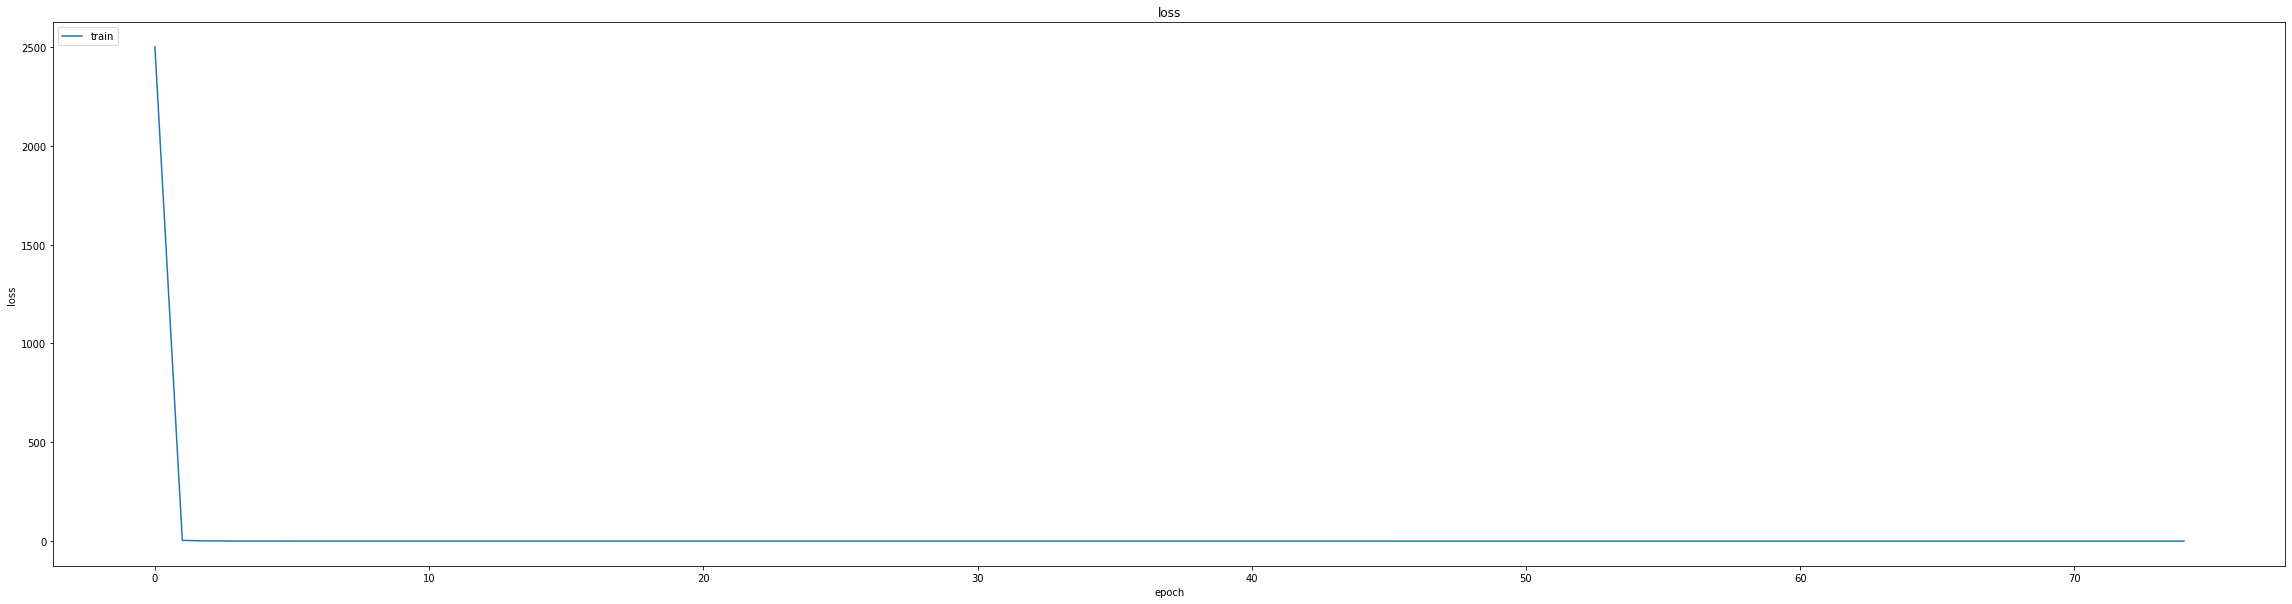

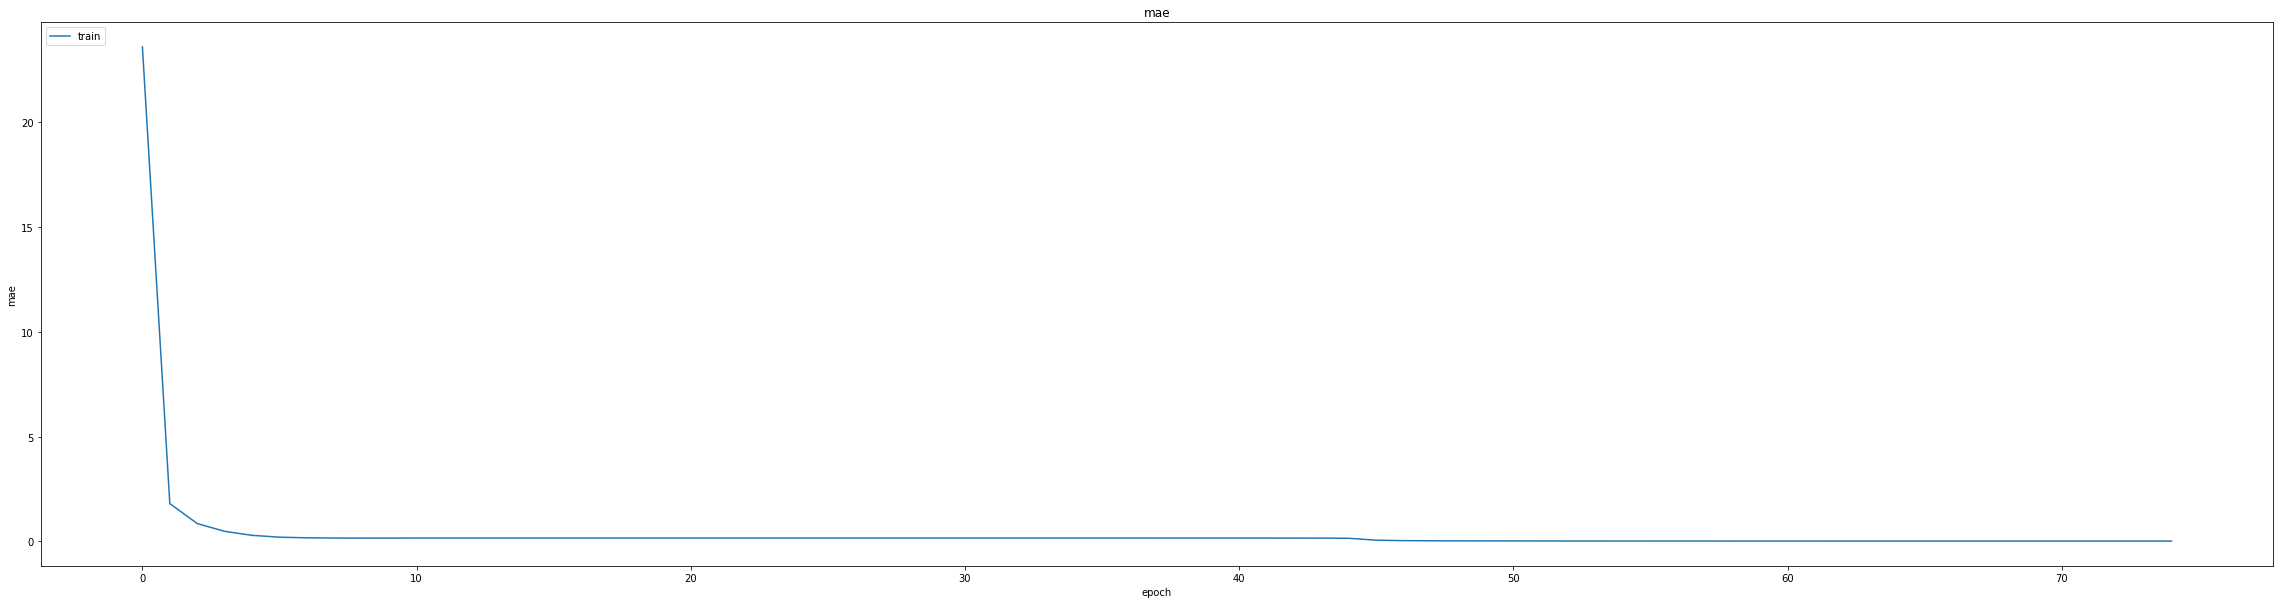

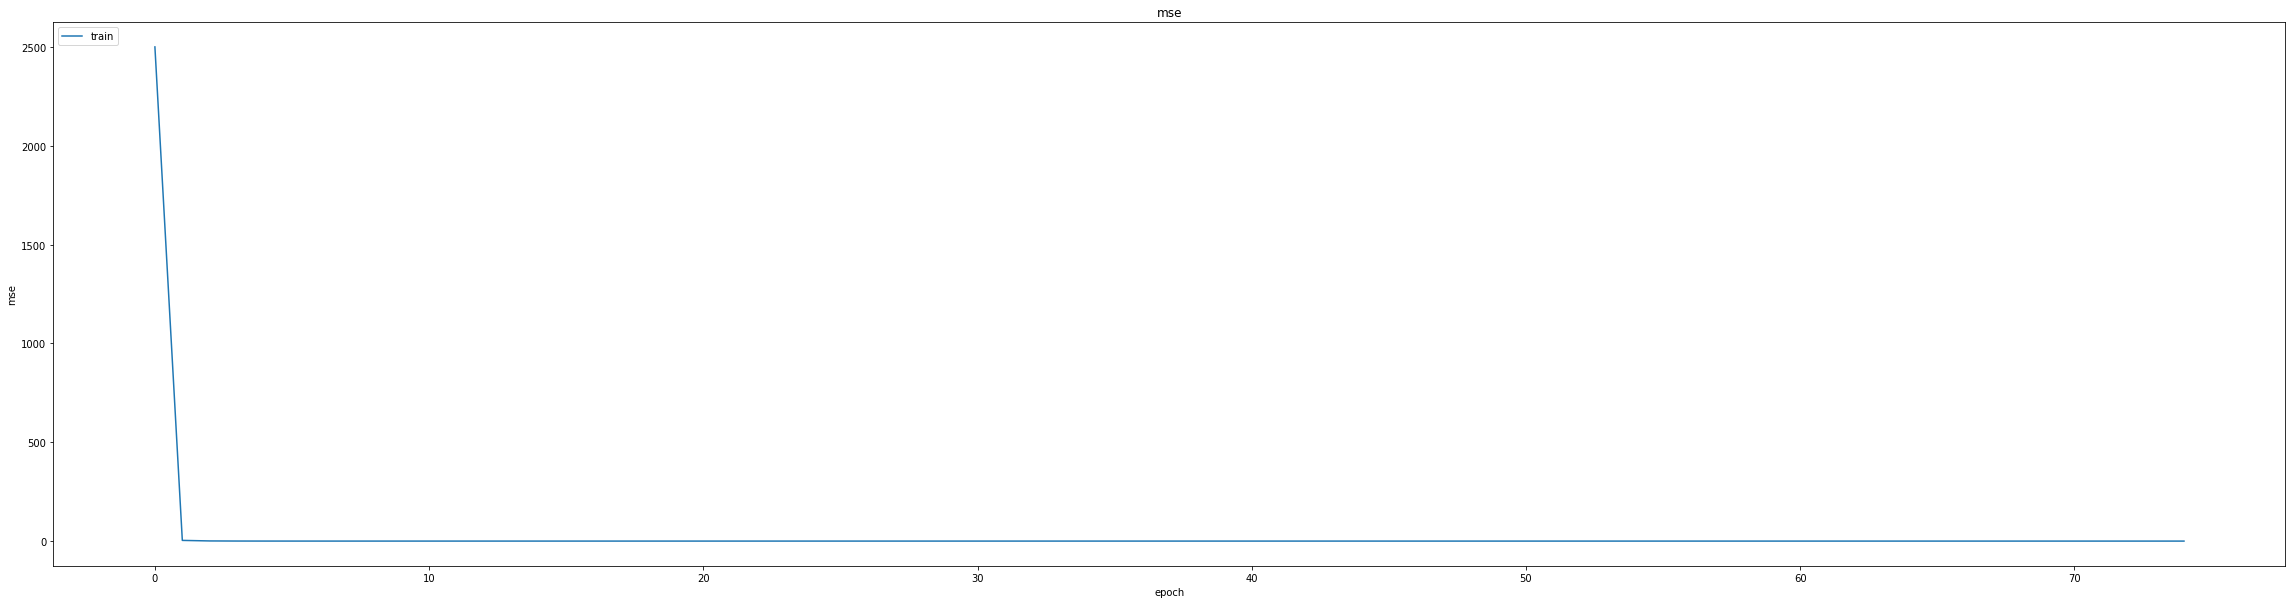

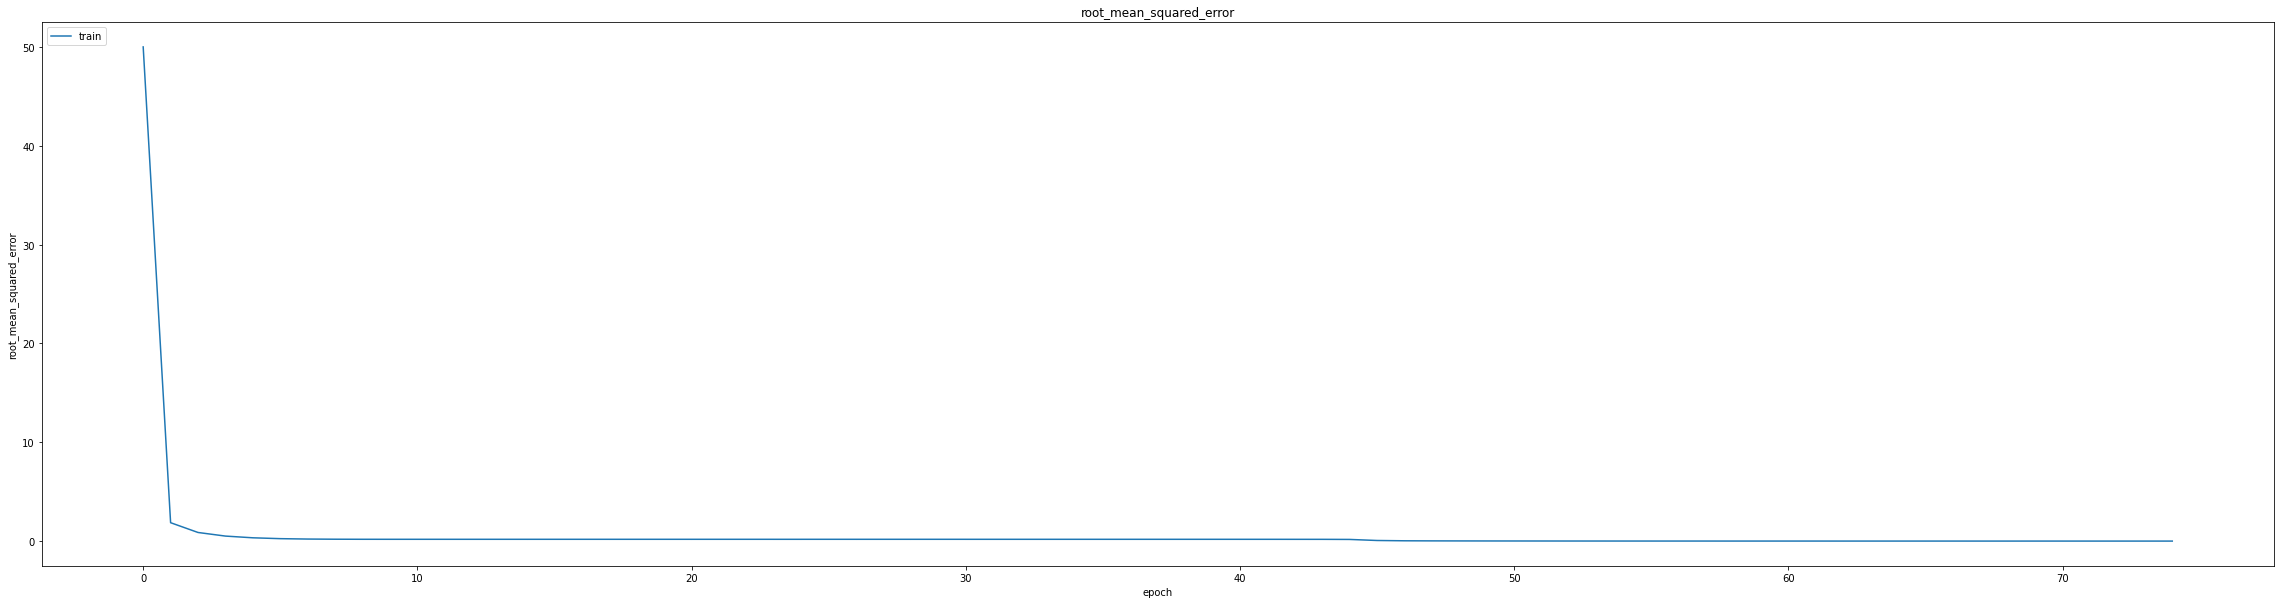

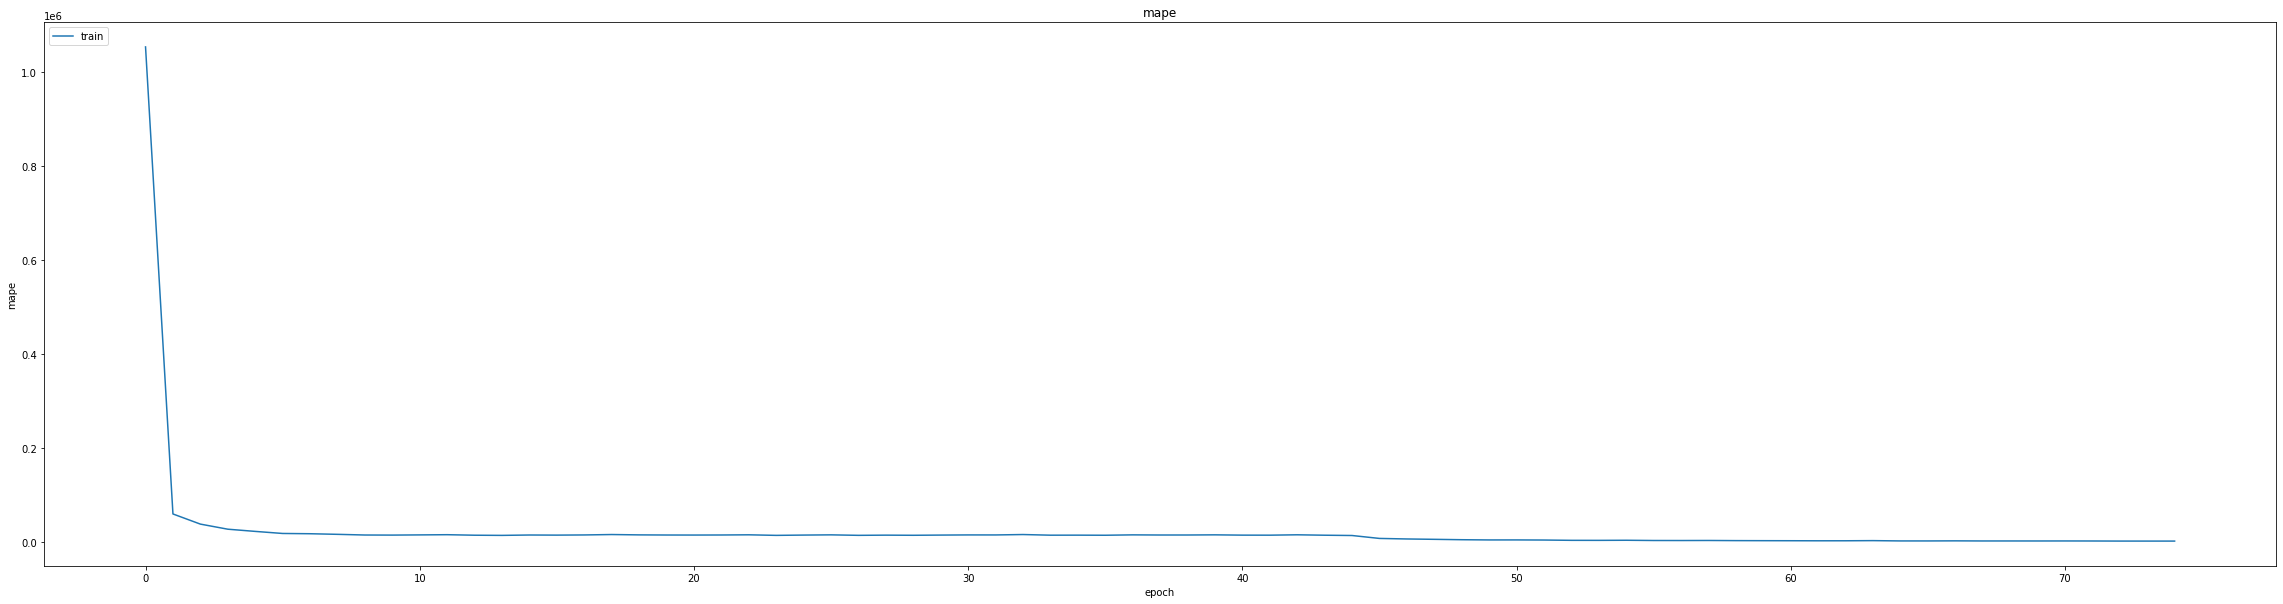

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.018731331452727318
0.024550383910536766
464/464 [==============================] - 3s 4ms/step
0.9827354143880117


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
347/348 [============================>.] - ETA: 0s - loss: 4.6664e-04 - mae: 0.0121 - mse: 4.6664e-04 - root_mean_squared_error: 0.0216 - mape: 2247.1863
Epoch 1: val_mse improved from 0.00060 to 0.00060, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 20s 47ms/step - loss: 4.6570e-04 - mae: 0.0121 - mse: 4.6570e-04 - root_mean_squared_error: 0.0216 - mape: 2241.4871 - val_loss: 5.9809e-04 - val_mae: 0.0186 - val_mse: 5.9809e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 6695.5679 - lr: 0.0010
Epoch 2/25
347/348 [============================>.] - ETA: 0s - loss: 1.0281e-04 - mae: 0.0077 - mse: 1.0281e-04 - root_mean_squared_error: 0.0101 - mape: 2190.7827
Epoch 2: val_mse improved from 0.00060 to 0.00056, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 1.0277e-04 - mae: 0.0077 - mse: 1.0277e-04 - root_mean_squared_error: 0.0101 - mape: 2185.2261 - val_loss: 5.6319e-04 - val_mae: 0.0180 - val_mse: 5.6319e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 6452.2075 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
347/348 [============================>.] - ETA: 0s - loss: 1.0738e-04 - mae: 0.0079 - mse: 1.0738e-04 - root_mean_squared_error: 0.0104 - mape: 2318.5518
Epoch 3: val_mse improved from 0.00056 to 0.00051, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 1.0730e-04 - mae: 0.0079 - mse: 1.0730e-04 - root_mean_squared_error: 0.0104 - mape: 2312.6719 - val_loss: 5.1371e-04 - val_mae: 0.0170 - val_mse: 5.1371e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 6415.7319 - lr: 9.0000e-04
Epoch 4/25
343/348 [============================>.] - ETA: 0s - loss: 1.1180e-04 - mae: 0.0081 - mse: 1.1180e-04 - root_mean_squared_error: 0.0106 - mape: 2167.9495
Epoch 4: val_mse did not improve from 0.00051
348/348 [==============================] - 4s 12ms/step - loss: 1.1200e-04 - mae: 0.0081 - mse: 1.1200e-04 - root_mean_squared_error: 0.0106 - mape: 2137.5430 - val_loss: 5.2811e-04 - val_mae: 0.0175 - val_mse: 5.2811e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 6259.1377 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
346/348 [============================>.] - ETA: 0s - loss: 1.0995e-04 - mae: 0.0081 - mse: 1.0995e-04 - root_mean_squared_error: 0.0105 - mape:

348/348 [==============================] - 15s 43ms/step - loss: 1.0993e-04 - mae: 0.0081 - mse: 1.0993e-04 - root_mean_squared_error: 0.0105 - mape: 2028.5326 - val_loss: 4.6965e-04 - val_mae: 0.0165 - val_mse: 4.6965e-04 - val_root_mean_squared_error: 0.0217 - val_mape: 6165.3457 - lr: 8.1000e-04
Epoch 6/25
343/348 [============================>.] - ETA: 0s - loss: 1.0740e-04 - mae: 0.0079 - mse: 1.0740e-04 - root_mean_squared_error: 0.0104 - mape: 2255.4878
Epoch 6: val_mse did not improve from 0.00047
348/348 [==============================] - 4s 12ms/step - loss: 1.0736e-04 - mae: 0.0079 - mse: 1.0736e-04 - root_mean_squared_error: 0.0104 - mape: 2223.8506 - val_loss: 5.3126e-04 - val_mae: 0.0175 - val_mse: 5.3126e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 6090.1836 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
345/348 [============================>.] - ETA: 0s - loss: 8.5139e-05 - mae: 0.0070 - mse: 8.5139e-05 - root_mean_squared_error: 0.0092 - mape:

348/348 [==============================] - 16s 46ms/step - loss: 8.4946e-05 - mae: 0.0070 - mse: 8.4946e-05 - root_mean_squared_error: 0.0092 - mape: 2083.2747 - val_loss: 3.8438e-04 - val_mae: 0.0147 - val_mse: 3.8438e-04 - val_root_mean_squared_error: 0.0196 - val_mape: 5976.7612 - lr: 7.2900e-04
Epoch 8/25
348/348 [==============================] - ETA: 0s - loss: 7.9836e-05 - mae: 0.0068 - mse: 7.9836e-05 - root_mean_squared_error: 0.0089 - mape: 2053.0349
Epoch 8: val_mse improved from 0.00038 to 0.00035, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 7.9836e-05 - mae: 0.0068 - mse: 7.9836e-05 - root_mean_squared_error: 0.0089 - mape: 2053.0349 - val_loss: 3.5402e-04 - val_mae: 0.0141 - val_mse: 3.5402e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 5852.7998 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
345/348 [============================>.] - ETA: 0s - loss: 7.3784e-05 - mae: 0.0066 - mse: 7.3784e-05 - root_mean_squared_error: 0.0086 - mape: 1917.6569
Epoch 9: val_mse improved from 0.00035 to 0.00034, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 21s 59ms/step - loss: 7.3860e-05 - mae: 0.0066 - mse: 7.3860e-05 - root_mean_squared_error: 0.0086 - mape: 1901.7764 - val_loss: 3.3605e-04 - val_mae: 0.0138 - val_mse: 3.3605e-04 - val_root_mean_squared_error: 0.0183 - val_mape: 5842.2896 - lr: 6.5610e-04
Epoch 10/25
347/348 [============================>.] - ETA: 0s - loss: 6.7948e-05 - mae: 0.0063 - mse: 6.7948e-05 - root_mean_squared_error: 0.0082 - mape: 1917.5105
Epoch 10: val_mse improved from 0.00034 to 0.00030, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 18s 50ms/step - loss: 6.7921e-05 - mae: 0.0063 - mse: 6.7921e-05 - root_mean_squared_error: 0.0082 - mape: 1912.6470 - val_loss: 2.9515e-04 - val_mae: 0.0127 - val_mse: 2.9515e-04 - val_root_mean_squared_error: 0.0172 - val_mape: 5822.2729 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
344/348 [============================>.] - ETA: 0s - loss: 6.0851e-05 - mae: 0.0059 - mse: 6.0851e-05 - root_mean_squared_error: 0.0078 - mape: 1878.0305
Epoch 11: val_mse improved from 0.00030 to 0.00028, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 6.0722e-05 - mae: 0.0059 - mse: 6.0722e-05 - root_mean_squared_error: 0.0078 - mape: 1857.0812 - val_loss: 2.7525e-04 - val_mae: 0.0123 - val_mse: 2.7525e-04 - val_root_mean_squared_error: 0.0166 - val_mape: 5734.9165 - lr: 5.9049e-04
Epoch 12/25
347/348 [============================>.] - ETA: 0s - loss: 5.9876e-05 - mae: 0.0059 - mse: 5.9876e-05 - root_mean_squared_error: 0.0077 - mape: 1916.3346
Epoch 12: val_mse improved from 0.00028 to 0.00025, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 45ms/step - loss: 5.9820e-05 - mae: 0.0059 - mse: 5.9820e-05 - root_mean_squared_error: 0.0077 - mape: 1911.4738 - val_loss: 2.4917e-04 - val_mae: 0.0117 - val_mse: 2.4917e-04 - val_root_mean_squared_error: 0.0158 - val_mape: 5615.2261 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/25
345/348 [============================>.] - ETA: 0s - loss: 4.9050e-05 - mae: 0.0053 - mse: 4.9050e-05 - root_mean_squared_error: 0.0070 - mape: 1881.6283
Epoch 13: val_mse improved from 0.00025 to 0.00022, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 4.8924e-05 - mae: 0.0053 - mse: 4.8924e-05 - root_mean_squared_error: 0.0070 - mape: 1866.0420 - val_loss: 2.1795e-04 - val_mae: 0.0107 - val_mse: 2.1795e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 5571.8276 - lr: 5.3144e-04
Epoch 14/25
344/348 [============================>.] - ETA: 0s - loss: 5.0366e-05 - mae: 0.0054 - mse: 5.0366e-05 - root_mean_squared_error: 0.0071 - mape: 1838.0360
Epoch 14: val_mse did not improve from 0.00022
348/348 [==============================] - 4s 12ms/step - loss: 5.0954e-05 - mae: 0.0054 - mse: 5.0954e-05 - root_mean_squared_error: 0.0071 - mape: 1817.5382 - val_loss: 2.2825e-04 - val_mae: 0.0113 - val_mse: 2.2825e-04 - val_root_mean_squared_error: 0.0151 - val_mape: 5531.5806 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
345/348 [============================>.] - ETA: 0s - loss: 4.7335e-05 - mae: 0.0052 - mse: 4.7335e-05 - root_mean_squared_error: 0.0069 - m

348/348 [==============================] - 15s 44ms/step - loss: 4.7332e-05 - mae: 0.0052 - mse: 4.7332e-05 - root_mean_squared_error: 0.0069 - mape: 1867.1859 - val_loss: 1.8694e-04 - val_mae: 0.0100 - val_mse: 1.8694e-04 - val_root_mean_squared_error: 0.0137 - val_mape: 5455.2915 - lr: 4.7830e-04
Epoch 16/25
347/348 [============================>.] - ETA: 0s - loss: 4.1502e-05 - mae: 0.0048 - mse: 4.1502e-05 - root_mean_squared_error: 0.0064 - mape: 1896.8518
Epoch 16: val_mse did not improve from 0.00019
348/348 [==============================] - 4s 12ms/step - loss: 4.1531e-05 - mae: 0.0048 - mse: 4.1531e-05 - root_mean_squared_error: 0.0064 - mape: 1892.0414 - val_loss: 2.0052e-04 - val_mae: 0.0105 - val_mse: 2.0052e-04 - val_root_mean_squared_error: 0.0142 - val_mape: 5354.6431 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/25
347/348 [============================>.] - ETA: 0s - loss: 4.1222e-05 - mae: 0.0048 - mse: 4.1222e-05 - root_mean_squared_error: 0.0064 - ma

348/348 [==============================] - 15s 44ms/step - loss: 4.1180e-05 - mae: 0.0048 - mse: 4.1180e-05 - root_mean_squared_error: 0.0064 - mape: 1741.3868 - val_loss: 1.6354e-04 - val_mae: 0.0092 - val_mse: 1.6354e-04 - val_root_mean_squared_error: 0.0128 - val_mape: 5292.0601 - lr: 4.3047e-04
Epoch 18/25
344/348 [============================>.] - ETA: 0s - loss: 4.0943e-05 - mae: 0.0048 - mse: 4.0943e-05 - root_mean_squared_error: 0.0064 - mape: 1850.1686
Epoch 18: val_mse improved from 0.00016 to 0.00015, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 4.0804e-05 - mae: 0.0048 - mse: 4.0804e-05 - root_mean_squared_error: 0.0064 - mape: 1829.5262 - val_loss: 1.5389e-04 - val_mae: 0.0091 - val_mse: 1.5389e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 5329.2578 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/25
347/348 [============================>.] - ETA: 0s - loss: 3.2722e-05 - mae: 0.0043 - mse: 3.2722e-05 - root_mean_squared_error: 0.0057 - mape: 1710.6802
Epoch 19: val_mse improved from 0.00015 to 0.00015, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 3.2706e-05 - mae: 0.0043 - mse: 3.2706e-05 - root_mean_squared_error: 0.0057 - mape: 1706.3409 - val_loss: 1.4771e-04 - val_mae: 0.0088 - val_mse: 1.4771e-04 - val_root_mean_squared_error: 0.0122 - val_mape: 5169.9355 - lr: 3.8742e-04
Epoch 20/25
348/348 [==============================] - ETA: 0s - loss: 3.2444e-05 - mae: 0.0042 - mse: 3.2444e-05 - root_mean_squared_error: 0.0057 - mape: 2186.7029
Epoch 20: val_mse did not improve from 0.00015
348/348 [==============================] - 4s 12ms/step - loss: 3.2444e-05 - mae: 0.0042 - mse: 3.2444e-05 - root_mean_squared_error: 0.0057 - mape: 2186.7029 - val_loss: 1.5265e-04 - val_mae: 0.0092 - val_mse: 1.5265e-04 - val_root_mean_squared_error: 0.0124 - val_mape: 5174.1675 - lr: 3.8742e-04
lr changed to 0.0003486784757114947
Epoch 21/25
346/348 [============================>.] - ETA: 0s - loss: 3.0395e-05 - mae: 0.0041 - mse: 3.0395e-05 - root_mean_squared_error: 0.0055 - ma

348/348 [==============================] - 15s 44ms/step - loss: 3.0426e-05 - mae: 0.0041 - mse: 3.0426e-05 - root_mean_squared_error: 0.0055 - mape: 1676.7809 - val_loss: 1.4336e-04 - val_mae: 0.0088 - val_mse: 1.4336e-04 - val_root_mean_squared_error: 0.0120 - val_mape: 5103.6060 - lr: 3.4868e-04
Epoch 22/25
346/348 [============================>.] - ETA: 0s - loss: 3.1695e-05 - mae: 0.0042 - mse: 3.1695e-05 - root_mean_squared_error: 0.0056 - mape: 1753.2172
Epoch 22: val_mse improved from 0.00014 to 0.00013, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 3.1765e-05 - mae: 0.0042 - mse: 3.1765e-05 - root_mean_squared_error: 0.0056 - mape: 1743.7334 - val_loss: 1.3488e-04 - val_mae: 0.0084 - val_mse: 1.3488e-04 - val_root_mean_squared_error: 0.0116 - val_mape: 5059.4810 - lr: 3.4868e-04
lr changed to 0.00031381062290165574
Epoch 23/25
346/348 [============================>.] - ETA: 0s - loss: 2.7922e-05 - mae: 0.0039 - mse: 2.7922e-05 - root_mean_squared_error: 0.0053 - mape: 2061.8691
Epoch 23: val_mse improved from 0.00013 to 0.00012, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 2.7936e-05 - mae: 0.0039 - mse: 2.7936e-05 - root_mean_squared_error: 0.0053 - mape: 2050.7148 - val_loss: 1.1526e-04 - val_mae: 0.0077 - val_mse: 1.1526e-04 - val_root_mean_squared_error: 0.0107 - val_mape: 4979.1436 - lr: 3.1381e-04
Epoch 24/25
345/348 [============================>.] - ETA: 0s - loss: 2.9098e-05 - mae: 0.0040 - mse: 2.9098e-05 - root_mean_squared_error: 0.0054 - mape: 1679.2428
Epoch 24: val_mse did not improve from 0.00012
348/348 [==============================] - 4s 12ms/step - loss: 2.9072e-05 - mae: 0.0040 - mse: 2.9072e-05 - root_mean_squared_error: 0.0054 - mape: 1665.3337 - val_loss: 1.2032e-04 - val_mae: 0.0080 - val_mse: 1.2032e-04 - val_root_mean_squared_error: 0.0110 - val_mape: 4934.7451 - lr: 3.1381e-04
lr changed to 0.0002824295632308349
Epoch 25/25
345/348 [============================>.] - ETA: 0s - loss: 2.5315e-05 - mae: 0.0037 - mse: 2.5315e-05 - root_mean_squared_error: 0.0050 - ma

348/348 [==============================] - 15s 43ms/step - loss: 2.5239e-05 - mae: 0.0037 - mse: 2.5239e-05 - root_mean_squared_error: 0.0050 - mape: 1652.0984 - val_loss: 1.0192e-04 - val_mae: 0.0072 - val_mse: 1.0192e-04 - val_root_mean_squared_error: 0.0101 - val_mape: 4907.3799 - lr: 2.8243e-04


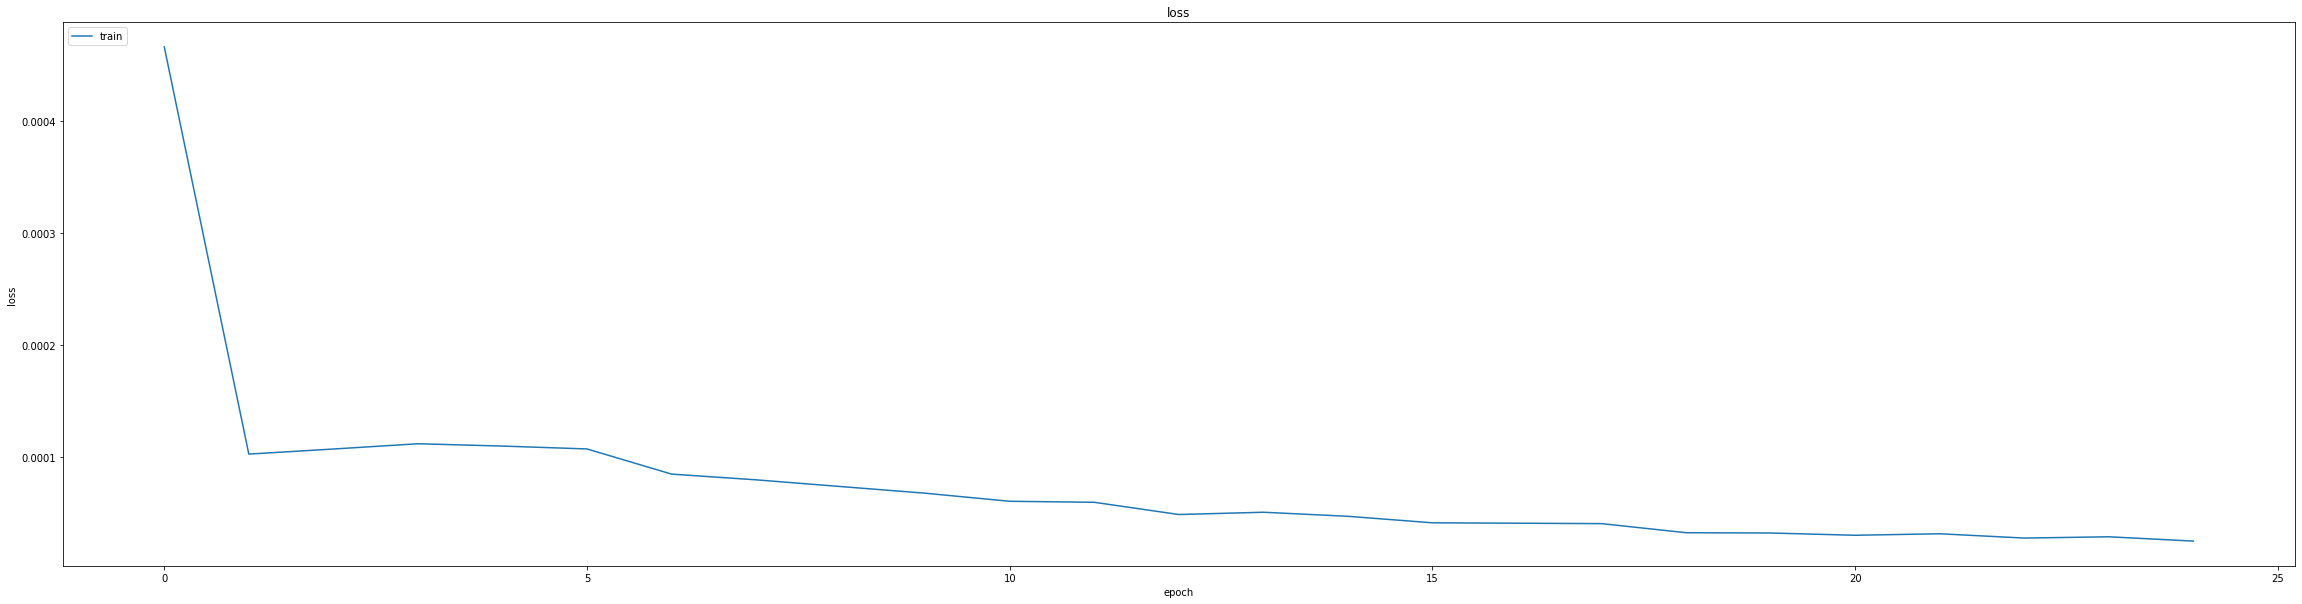

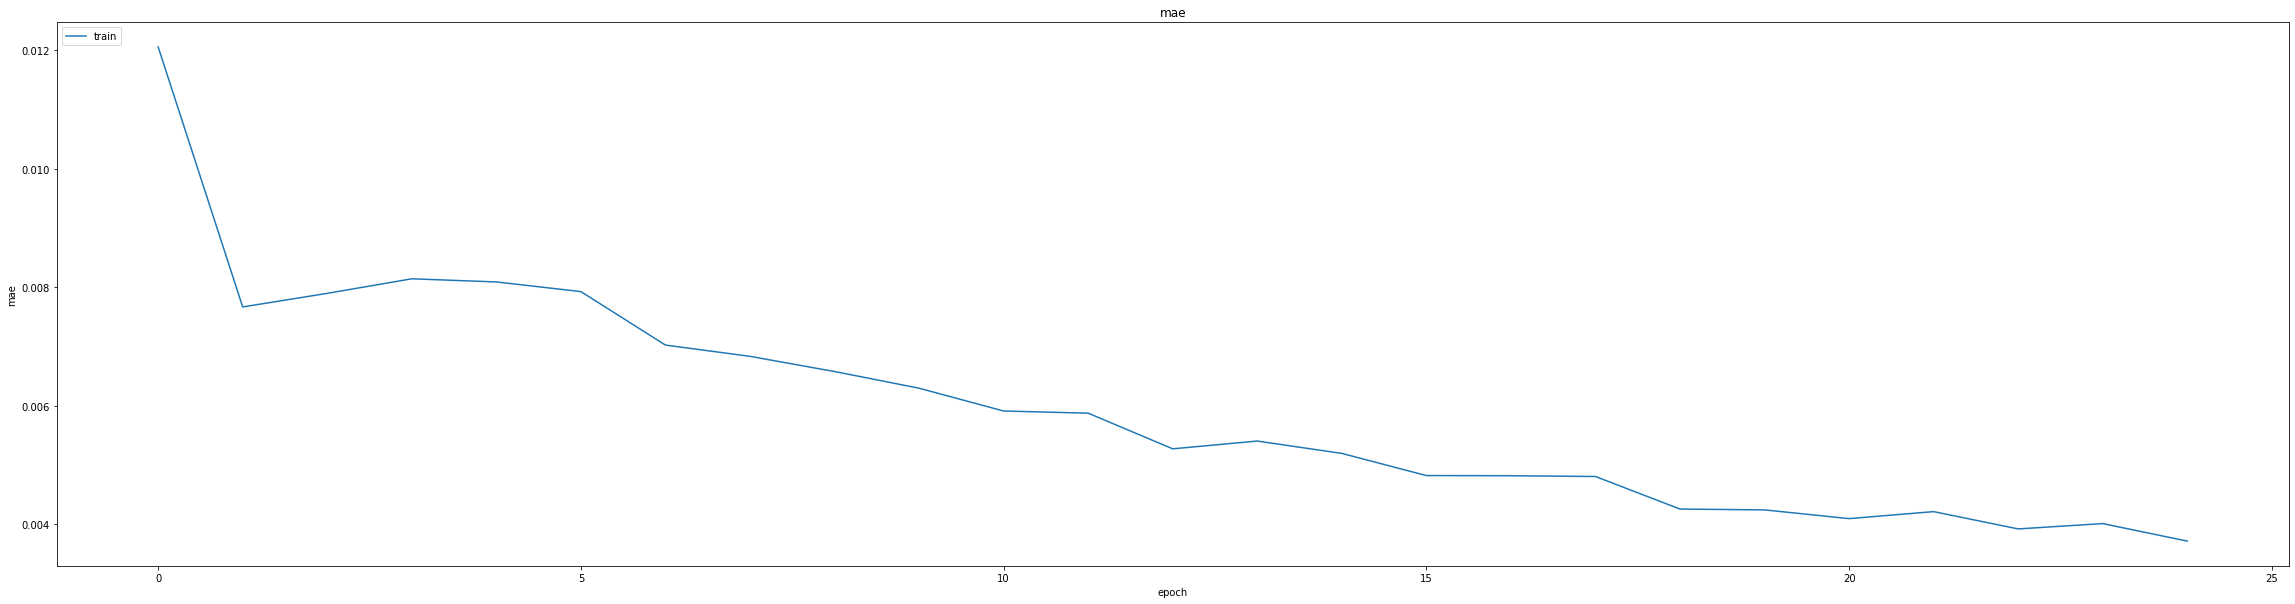

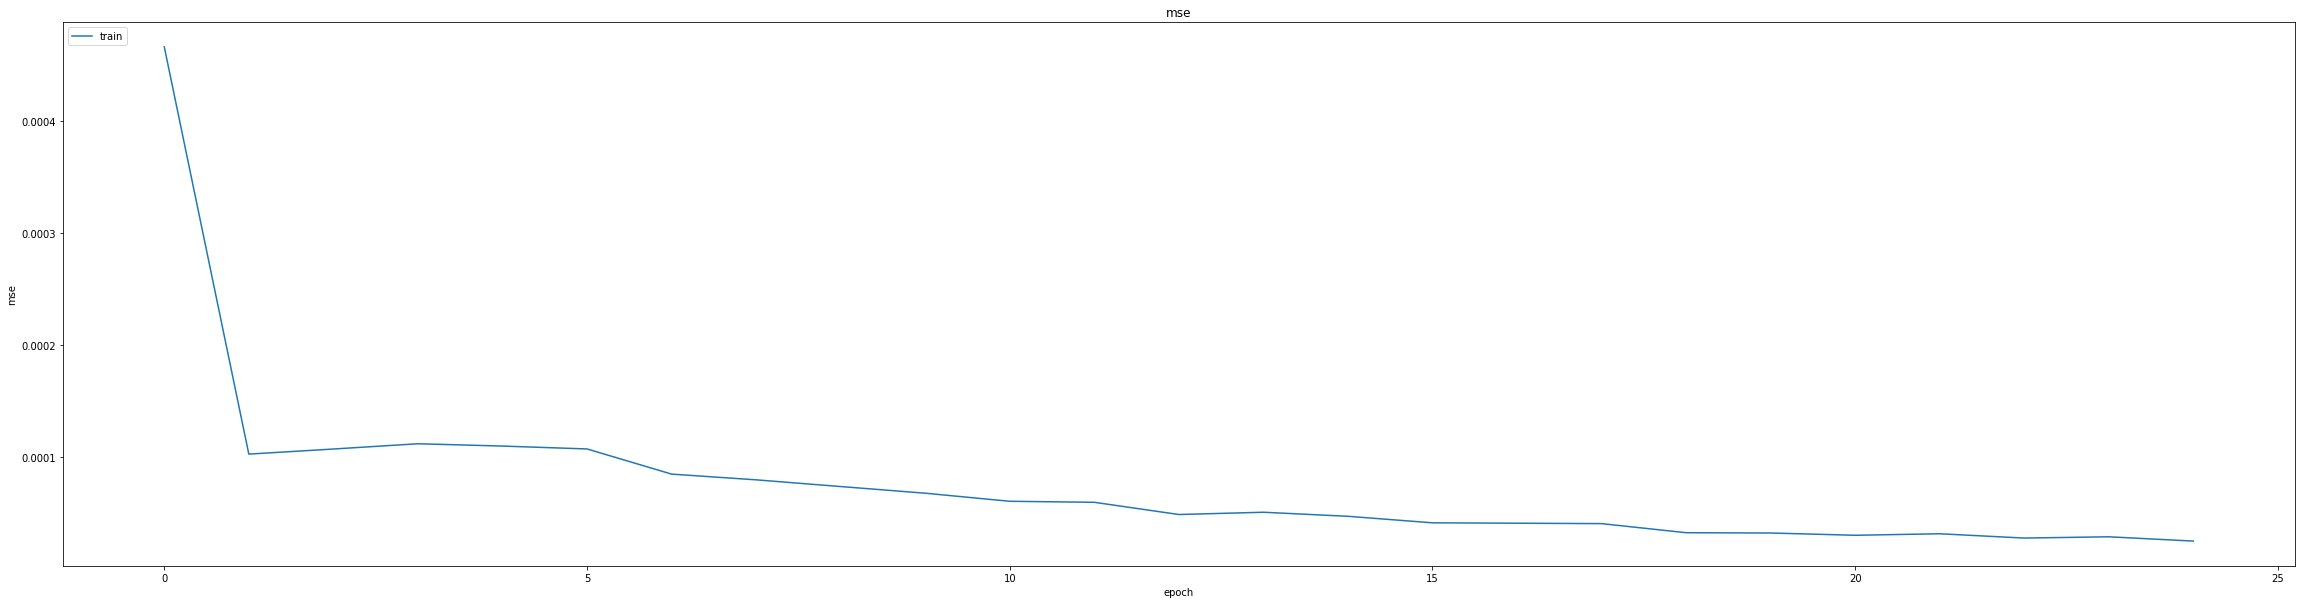

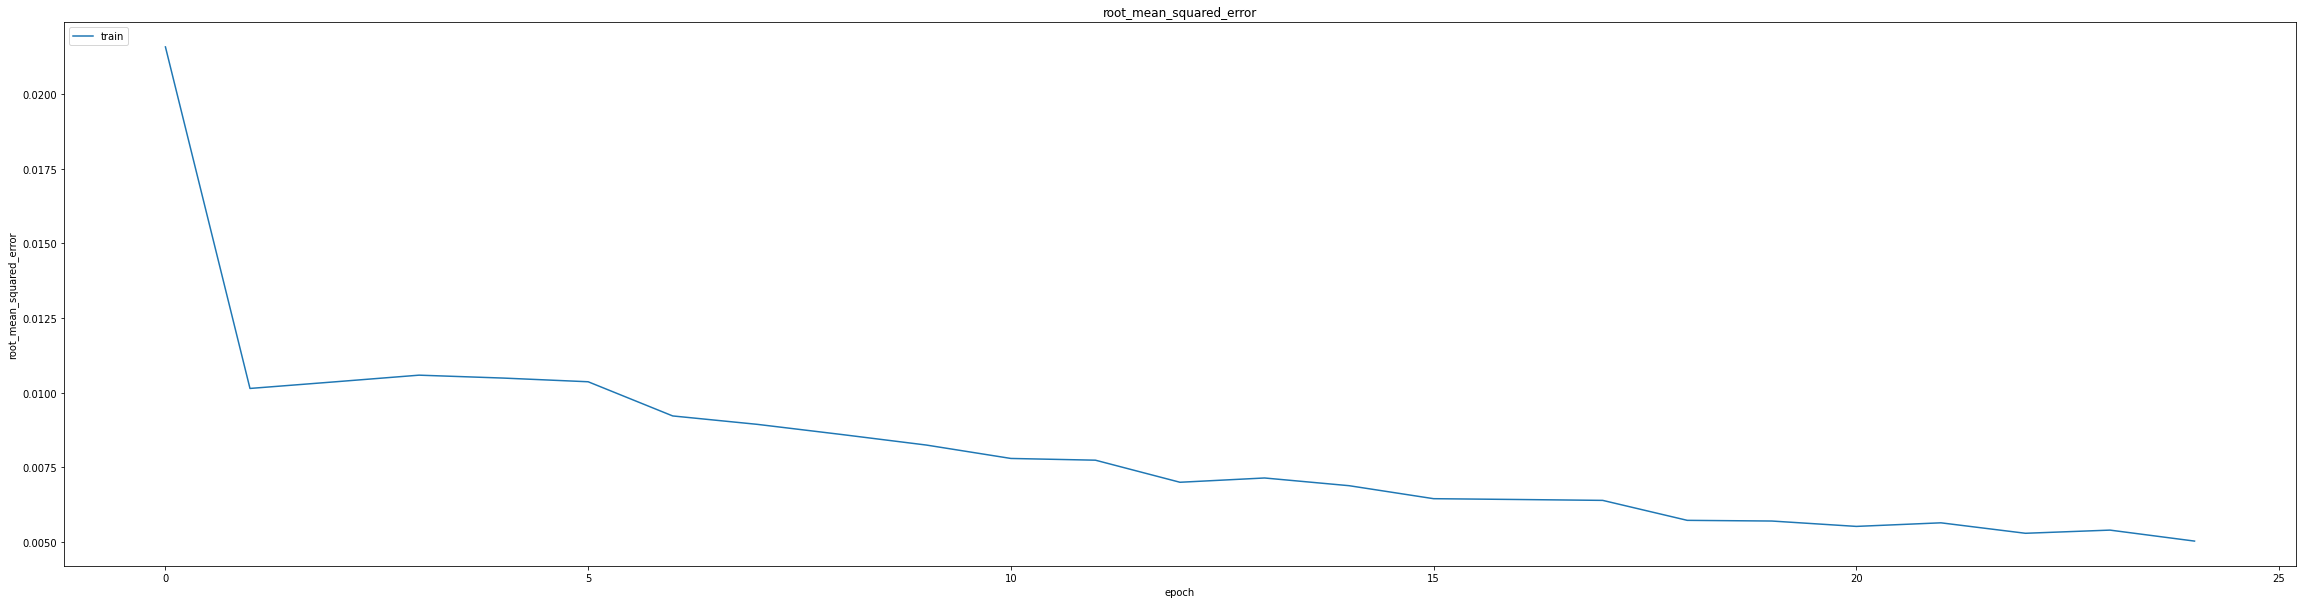

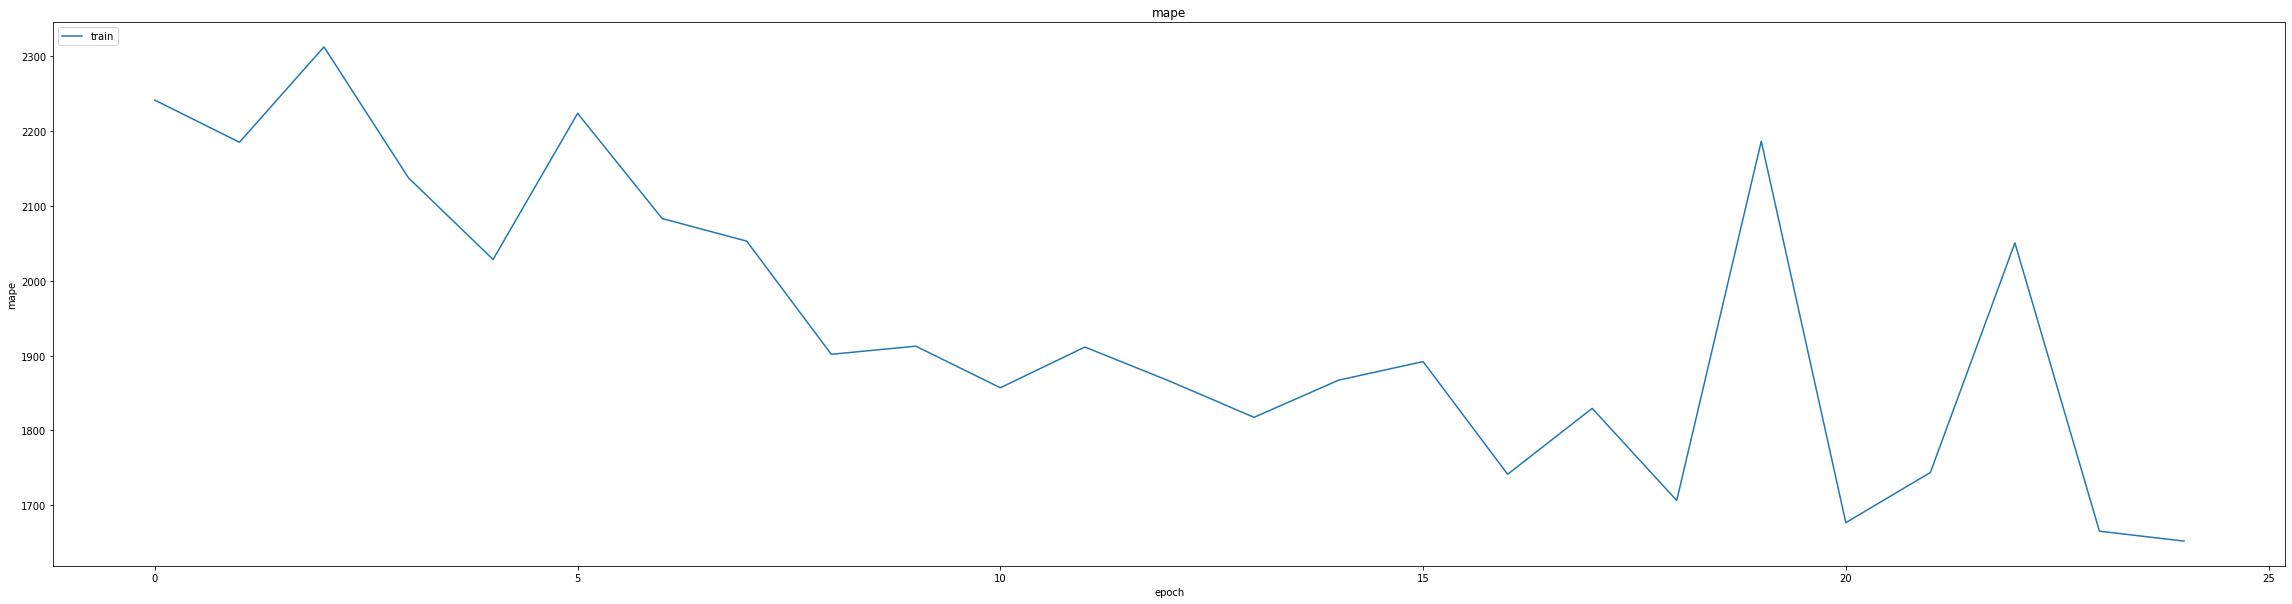

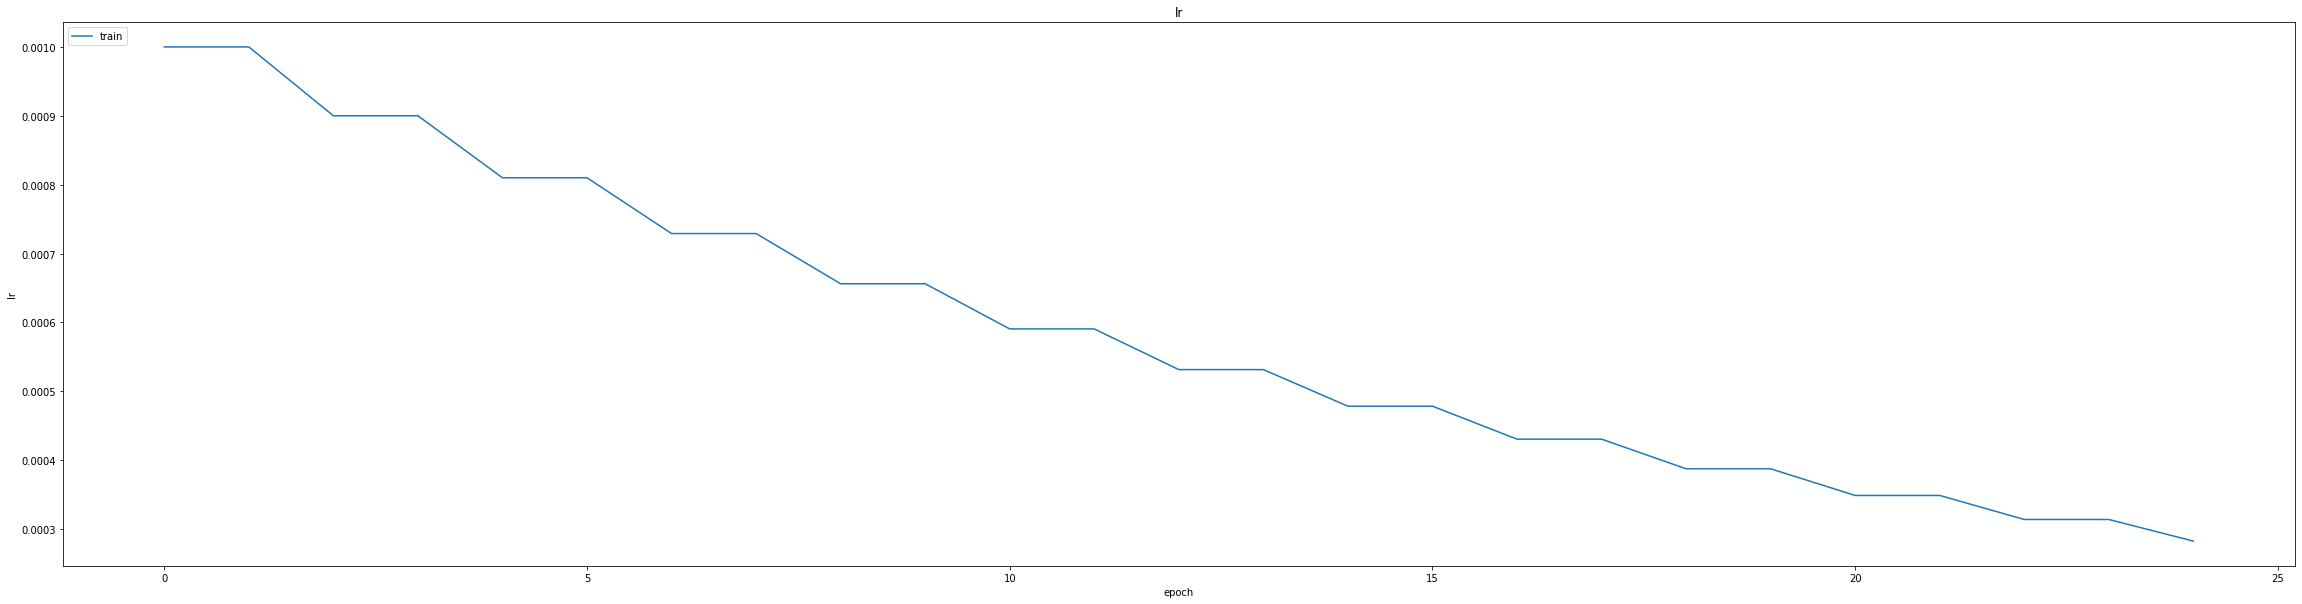

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.007189889904111624
0.01009573508054018
464/464 [==============================] - 3s 4ms/step
0.9972482279143237


464/464 [==============================] - 2s 4ms/step


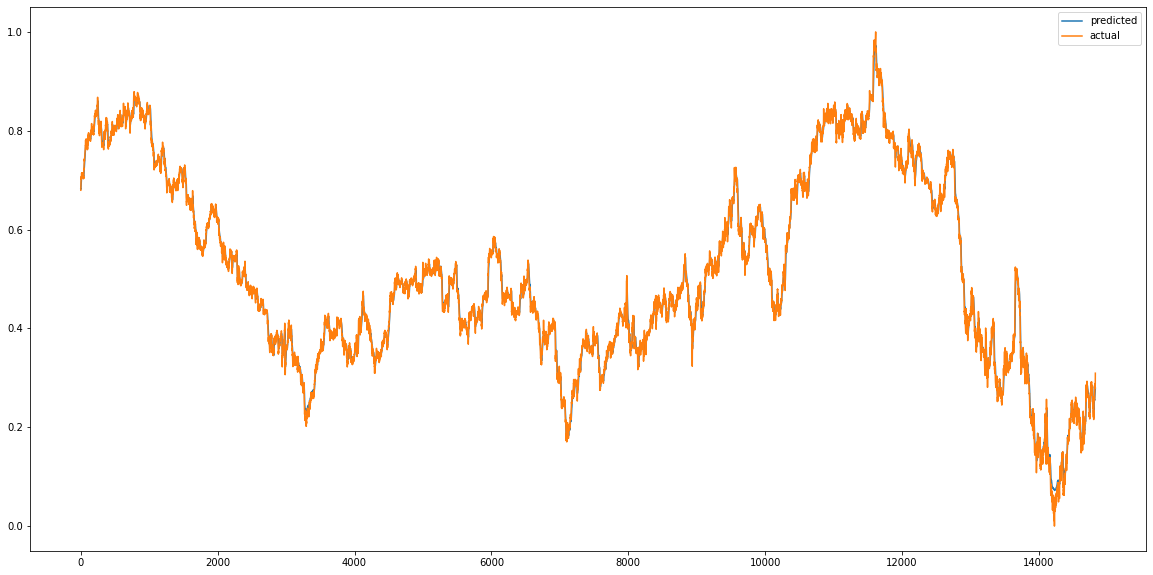

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


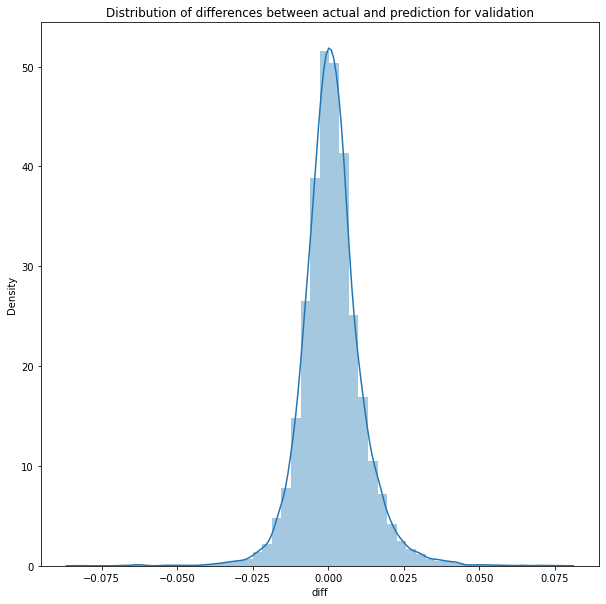

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


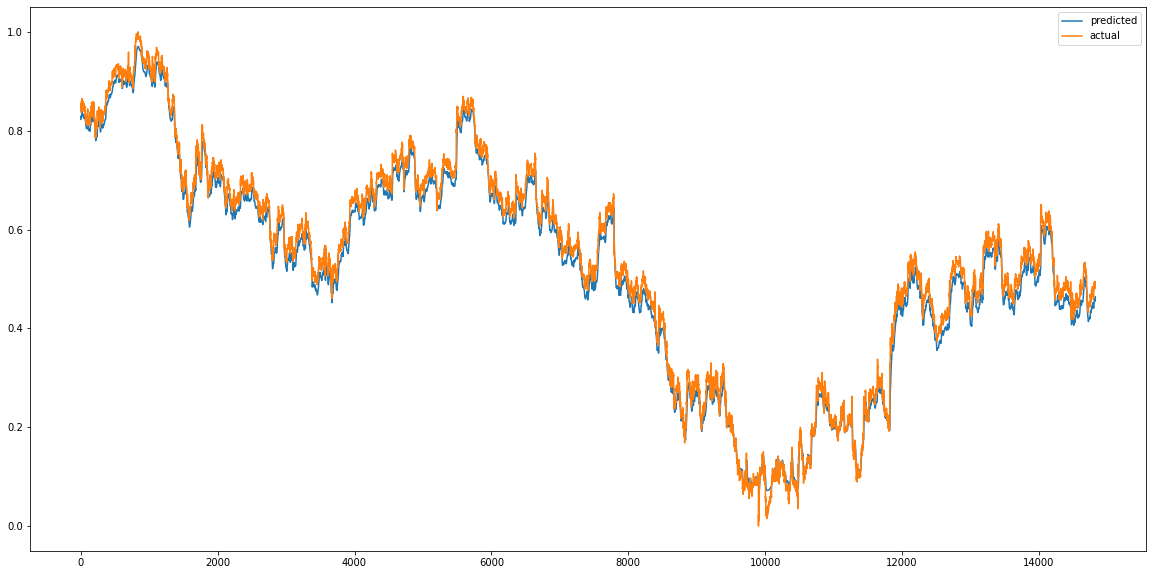

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


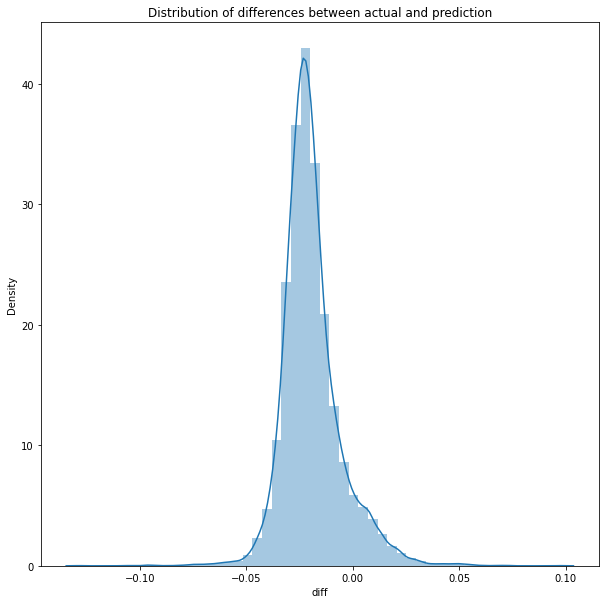

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0005651378354294192
RMSE :  0.023772627861248726
MAE :  0.021358636016488564
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.9887932758697928


count    14827.000000
mean        -0.019311
std          0.013864
min         -0.128494
25%         -0.027320
50%         -0.021323
75%         -0.013807
max          0.097622
Name: diff, dtype: float64

**GRU_MODEL**



In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           207360    
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                3936      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
347/348 [============================>.] - ETA: 0s - loss: 621.5609 - mae: 8.6951 - mse: 621.5609 - root_mean_squared_error: 24.9311 - mape: 413975.7500
Epoch 1: val_mse improved from inf to 0.31559, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 21s 45ms/step - loss: 619.9842 - mae: 8.6741 - mse: 619.9842 - root_mean_squared_error: 24.8995 - mape: 412925.5000 - val_loss: 0.3156 - val_mae: 0.5263 - val_mse: 0.3156 - val_root_mean_squared_error: 0.5618 - val_mape: 71144.3906
Epoch 2/75
348/348 [==============================] - ETA: 0s - loss: 0.0935 - mae: 0.2375 - mse: 0.0935 - root_mean_squared_error: 0.3058 - mape: 20692.1738
Epoch 2: val_mse improved from 0.31559 to 0.07176, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 0.0935 - mae: 0.2375 - mse: 0.0935 - root_mean_squared_error: 0.3058 - mape: 20692.1738 - val_loss: 0.0718 - val_mae: 0.2280 - val_mse: 0.0718 - val_root_mean_squared_error: 0.2679 - val_mape: 47689.9258
Epoch 3/75
346/348 [============================>.] - ETA: 0s - loss: 0.0408 - mae: 0.1574 - mse: 0.0408 - root_mean_squared_error: 0.2019 - mape: 19790.8574
Epoch 3: val_mse improved from 0.07176 to 0.05210, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 0.0408 - mae: 0.1574 - mse: 0.0408 - root_mean_squared_error: 0.2019 - mape: 19683.9395 - val_loss: 0.0521 - val_mae: 0.1972 - val_mse: 0.0521 - val_root_mean_squared_error: 0.2283 - val_mape: 43214.1562
Epoch 4/75
346/348 [============================>.] - ETA: 0s - loss: 0.0384 - mae: 0.1568 - mse: 0.0384 - root_mean_squared_error: 0.1961 - mape: 16032.7051
Epoch 4: val_mse improved from 0.05210 to 0.05008, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 0.0385 - mae: 0.1569 - mse: 0.0385 - root_mean_squared_error: 0.1961 - mape: 15946.1514 - val_loss: 0.0501 - val_mae: 0.1936 - val_mse: 0.0501 - val_root_mean_squared_error: 0.2238 - val_mape: 42556.5508
Epoch 5/75
344/348 [============================>.] - ETA: 0s - loss: 0.0380 - mae: 0.1566 - mse: 0.0380 - root_mean_squared_error: 0.1950 - mape: 14595.9375
Epoch 5: val_mse improved from 0.05008 to 0.04876, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0380 - mae: 0.1566 - mse: 0.0380 - root_mean_squared_error: 0.1951 - mape: 14433.4219 - val_loss: 0.0488 - val_mae: 0.1911 - val_mse: 0.0488 - val_root_mean_squared_error: 0.2208 - val_mape: 42124.2578
Epoch 6/75
348/348 [==============================] - ETA: 0s - loss: 0.0379 - mae: 0.1564 - mse: 0.0379 - root_mean_squared_error: 0.1946 - mape: 15070.2686
Epoch 6: val_mse improved from 0.04876 to 0.04875, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 0.0379 - mae: 0.1564 - mse: 0.0379 - root_mean_squared_error: 0.1946 - mape: 15070.2686 - val_loss: 0.0487 - val_mae: 0.1910 - val_mse: 0.0487 - val_root_mean_squared_error: 0.2208 - val_mape: 42067.8047
Epoch 7/75
344/348 [============================>.] - ETA: 0s - loss: 0.0369 - mae: 0.1541 - mse: 0.0369 - root_mean_squared_error: 0.1920 - mape: 15919.2148
Epoch 7: val_mse improved from 0.04875 to 0.04632, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0369 - mae: 0.1541 - mse: 0.0369 - root_mean_squared_error: 0.1920 - mape: 15742.2393 - val_loss: 0.0463 - val_mae: 0.1863 - val_mse: 0.0463 - val_root_mean_squared_error: 0.2152 - val_mape: 41221.6406
Epoch 8/75
348/348 [==============================] - ETA: 0s - loss: 0.0360 - mae: 0.1528 - mse: 0.0360 - root_mean_squared_error: 0.1898 - mape: 15661.7422
Epoch 8: val_mse improved from 0.04632 to 0.04525, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 0.0360 - mae: 0.1528 - mse: 0.0360 - root_mean_squared_error: 0.1898 - mape: 15661.7422 - val_loss: 0.0452 - val_mae: 0.1841 - val_mse: 0.0452 - val_root_mean_squared_error: 0.2127 - val_mape: 40844.7695
Epoch 9/75
346/348 [============================>.] - ETA: 0s - loss: 0.0347 - mae: 0.1498 - mse: 0.0347 - root_mean_squared_error: 0.1864 - mape: 15270.5332
Epoch 9: val_mse improved from 0.04525 to 0.04397, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0347 - mae: 0.1498 - mse: 0.0347 - root_mean_squared_error: 0.1863 - mape: 15188.0527 - val_loss: 0.0440 - val_mae: 0.1813 - val_mse: 0.0440 - val_root_mean_squared_error: 0.2097 - val_mape: 40532.7344
Epoch 10/75
347/348 [============================>.] - ETA: 0s - loss: 0.0331 - mae: 0.1460 - mse: 0.0331 - root_mean_squared_error: 0.1821 - mape: 14165.0664
Epoch 10: val_mse improved from 0.04397 to 0.04167, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0332 - mae: 0.1460 - mse: 0.0332 - root_mean_squared_error: 0.1821 - mape: 14129.2090 - val_loss: 0.0417 - val_mae: 0.1761 - val_mse: 0.0417 - val_root_mean_squared_error: 0.2041 - val_mape: 39945.5195
Epoch 11/75
348/348 [==============================] - ETA: 0s - loss: 0.0308 - mae: 0.1401 - mse: 0.0308 - root_mean_squared_error: 0.1754 - mape: 13796.6348
Epoch 11: val_mse improved from 0.04167 to 0.03847, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.0308 - mae: 0.1401 - mse: 0.0308 - root_mean_squared_error: 0.1754 - mape: 13796.6348 - val_loss: 0.0385 - val_mae: 0.1684 - val_mse: 0.0385 - val_root_mean_squared_error: 0.1961 - val_mape: 39163.0117
Epoch 12/75
348/348 [==============================] - ETA: 0s - loss: 0.0279 - mae: 0.1325 - mse: 0.0279 - root_mean_squared_error: 0.1670 - mape: 14497.8145
Epoch 12: val_mse improved from 0.03847 to 0.03468, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0279 - mae: 0.1325 - mse: 0.0279 - root_mean_squared_error: 0.1670 - mape: 14497.8145 - val_loss: 0.0347 - val_mae: 0.1583 - val_mse: 0.0347 - val_root_mean_squared_error: 0.1862 - val_mape: 38217.5664
Epoch 13/75
344/348 [============================>.] - ETA: 0s - loss: 0.0238 - mae: 0.1201 - mse: 0.0238 - root_mean_squared_error: 0.1543 - mape: 13369.6631
Epoch 13: val_mse improved from 0.03468 to 0.02727, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0238 - mae: 0.1200 - mse: 0.0238 - root_mean_squared_error: 0.1542 - mape: 13220.7090 - val_loss: 0.0273 - val_mae: 0.1366 - val_mse: 0.0273 - val_root_mean_squared_error: 0.1651 - val_mape: 36104.3906
Epoch 14/75
347/348 [============================>.] - ETA: 0s - loss: 0.0164 - mae: 0.0955 - mse: 0.0164 - root_mean_squared_error: 0.1279 - mape: 12356.1582
Epoch 14: val_mse improved from 0.02727 to 0.01469, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0164 - mae: 0.0955 - mse: 0.0164 - root_mean_squared_error: 0.1279 - mape: 12324.8730 - val_loss: 0.0147 - val_mae: 0.0945 - val_mse: 0.0147 - val_root_mean_squared_error: 0.1212 - val_mape: 31275.6738
Epoch 15/75
346/348 [============================>.] - ETA: 0s - loss: 0.0091 - mae: 0.0692 - mse: 0.0091 - root_mean_squared_error: 0.0956 - mape: 10010.2637
Epoch 15: val_mse improved from 0.01469 to 0.00765, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0091 - mae: 0.0692 - mse: 0.0091 - root_mean_squared_error: 0.0955 - mape: 9956.1592 - val_loss: 0.0076 - val_mae: 0.0645 - val_mse: 0.0076 - val_root_mean_squared_error: 0.0875 - val_mape: 26947.3145
Epoch 16/75
347/348 [============================>.] - ETA: 0s - loss: 0.0058 - mae: 0.0553 - mse: 0.0058 - root_mean_squared_error: 0.0764 - mape: 10014.9863
Epoch 16: val_mse improved from 0.00765 to 0.00544, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0058 - mae: 0.0552 - mse: 0.0058 - root_mean_squared_error: 0.0763 - mape: 9989.5947 - val_loss: 0.0054 - val_mae: 0.0541 - val_mse: 0.0054 - val_root_mean_squared_error: 0.0738 - val_mape: 24364.6328
Epoch 17/75
348/348 [==============================] - ETA: 0s - loss: 0.0044 - mae: 0.0477 - mse: 0.0044 - root_mean_squared_error: 0.0662 - mape: 8721.5537
Epoch 17: val_mse improved from 0.00544 to 0.00409, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0044 - mae: 0.0477 - mse: 0.0044 - root_mean_squared_error: 0.0662 - mape: 8721.5537 - val_loss: 0.0041 - val_mae: 0.0459 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0640 - val_mape: 22617.8750
Epoch 18/75
344/348 [============================>.] - ETA: 0s - loss: 0.0035 - mae: 0.0428 - mse: 0.0035 - root_mean_squared_error: 0.0590 - mape: 8308.2500
Epoch 18: val_mse improved from 0.00409 to 0.00355, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0035 - mae: 0.0428 - mse: 0.0035 - root_mean_squared_error: 0.0591 - mape: 8215.7217 - val_loss: 0.0035 - val_mae: 0.0445 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0596 - val_mape: 21047.6699
Epoch 19/75
346/348 [============================>.] - ETA: 0s - loss: 0.0030 - mae: 0.0399 - mse: 0.0030 - root_mean_squared_error: 0.0547 - mape: 7017.2065
Epoch 19: val_mse improved from 0.00355 to 0.00254, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0030 - mae: 0.0398 - mse: 0.0030 - root_mean_squared_error: 0.0546 - mape: 6979.2734 - val_loss: 0.0025 - val_mae: 0.0360 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0504 - val_mape: 19498.2930
Epoch 20/75
348/348 [==============================] - ETA: 0s - loss: 0.0024 - mae: 0.0361 - mse: 0.0024 - root_mean_squared_error: 0.0489 - mape: 6576.8384
Epoch 20: val_mse did not improve from 0.00254
348/348 [==============================] - 4s 11ms/step - loss: 0.0024 - mae: 0.0361 - mse: 0.0024 - root_mean_squared_error: 0.0489 - mape: 6576.8384 - val_loss: 0.0028 - val_mae: 0.0432 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0532 - val_mape: 18048.8984
Epoch 21/75
344/348 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0336 - mse: 0.0021 - root_mean_squared_error: 0.0454 - mape: 6858.9360
Epoch 21: val_mse improved from 0.00254 to 0.00240, saving model to /content/drive/MyDrive/modelweight

348/348 [==============================] - 14s 41ms/step - loss: 0.0021 - mae: 0.0336 - mse: 0.0021 - root_mean_squared_error: 0.0455 - mape: 6782.4858 - val_loss: 0.0024 - val_mae: 0.0392 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0490 - val_mape: 17104.9766
Epoch 22/75
347/348 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0315 - mse: 0.0018 - root_mean_squared_error: 0.0421 - mape: 6531.8154
Epoch 22: val_mse improved from 0.00240 to 0.00171, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0018 - mae: 0.0315 - mse: 0.0018 - root_mean_squared_error: 0.0421 - mape: 6515.2549 - val_loss: 0.0017 - val_mae: 0.0311 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0413 - val_mape: 16027.9717
Epoch 23/75
346/348 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0293 - mse: 0.0015 - root_mean_squared_error: 0.0391 - mape: 6545.4536
Epoch 23: val_mse improved from 0.00171 to 0.00159, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0015 - mae: 0.0293 - mse: 0.0015 - root_mean_squared_error: 0.0391 - mape: 6510.0601 - val_loss: 0.0016 - val_mae: 0.0303 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0399 - val_mape: 15235.0791
Epoch 24/75
347/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0275 - mse: 0.0013 - root_mean_squared_error: 0.0365 - mape: 5324.3252
Epoch 24: val_mse improved from 0.00159 to 0.00140, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0013 - mae: 0.0275 - mse: 0.0013 - root_mean_squared_error: 0.0365 - mape: 5310.8252 - val_loss: 0.0014 - val_mae: 0.0279 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0374 - val_mape: 14704.9883
Epoch 25/75
343/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0261 - mse: 0.0012 - root_mean_squared_error: 0.0346 - mape: 5126.3960
Epoch 25: val_mse improved from 0.00140 to 0.00122, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0012 - mae: 0.0260 - mse: 0.0012 - root_mean_squared_error: 0.0345 - mape: 5054.5127 - val_loss: 0.0012 - val_mae: 0.0256 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0349 - val_mape: 14153.5176
Epoch 26/75
346/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0249 - mse: 0.0011 - root_mean_squared_error: 0.0329 - mape: 5099.9956
Epoch 26: val_mse improved from 0.00122 to 0.00109, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0011 - mae: 0.0249 - mse: 0.0011 - root_mean_squared_error: 0.0329 - mape: 5072.4165 - val_loss: 0.0011 - val_mae: 0.0238 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0330 - val_mape: 13584.9014
Epoch 27/75
347/348 [============================>.] - ETA: 0s - loss: 9.6695e-04 - mae: 0.0236 - mse: 9.6695e-04 - root_mean_squared_error: 0.0311 - mape: 4757.4150
Epoch 27: val_mse did not improve from 0.00109
348/348 [==============================] - 4s 11ms/step - loss: 9.6716e-04 - mae: 0.0236 - mse: 9.6716e-04 - root_mean_squared_error: 0.0311 - mape: 4745.3594 - val_loss: 0.0014 - val_mae: 0.0297 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0380 - val_mape: 13211.4883
Epoch 28/75
344/348 [============================>.] - ETA: 0s - loss: 8.7310e-04 - mae: 0.0224 - mse: 8.7310e-04 - root_mean_squared_error: 0.0295 - mape: 5234.4224
Epoch 28: val_mse did not improve from 0.00109
348/348 [======================

348/348 [==============================] - 13s 39ms/step - loss: 7.7182e-04 - mae: 0.0211 - mse: 7.7182e-04 - root_mean_squared_error: 0.0278 - mape: 5305.0234 - val_loss: 0.0011 - val_mae: 0.0249 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0329 - val_mape: 12310.2861
Epoch 30/75
346/348 [============================>.] - ETA: 0s - loss: 6.8668e-04 - mae: 0.0200 - mse: 6.8668e-04 - root_mean_squared_error: 0.0262 - mape: 4975.1299
Epoch 30: val_mse improved from 0.00108 to 0.00099, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 6.8679e-04 - mae: 0.0200 - mse: 6.8679e-04 - root_mean_squared_error: 0.0262 - mape: 4948.2305 - val_loss: 9.8703e-04 - val_mae: 0.0236 - val_mse: 9.8703e-04 - val_root_mean_squared_error: 0.0314 - val_mape: 11872.4893
Epoch 31/75
343/348 [============================>.] - ETA: 0s - loss: 6.1981e-04 - mae: 0.0190 - mse: 6.1981e-04 - root_mean_squared_error: 0.0249 - mape: 4040.9932
Epoch 31: val_mse did not improve from 0.00099
348/348 [==============================] - 4s 11ms/step - loss: 6.1889e-04 - mae: 0.0190 - mse: 6.1889e-04 - root_mean_squared_error: 0.0249 - mape: 3984.3403 - val_loss: 9.8725e-04 - val_mae: 0.0239 - val_mse: 9.8725e-04 - val_root_mean_squared_error: 0.0314 - val_mape: 11384.9521
Epoch 32/75
346/348 [============================>.] - ETA: 0s - loss: 5.5499e-04 - mae: 0.0180 - mse: 5.5499e-04 - root_mean_squared_error: 0.0236 - mape: 4324.9517
Epoch 32: val_mse did not improve from 0.00099
348/348

348/348 [==============================] - 14s 39ms/step - loss: 4.3389e-04 - mae: 0.0161 - mse: 4.3389e-04 - root_mean_squared_error: 0.0208 - mape: 3547.6099 - val_loss: 8.2340e-04 - val_mae: 0.0217 - val_mse: 8.2340e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 10009.0635
Epoch 36/75
347/348 [============================>.] - ETA: 0s - loss: 3.9896e-04 - mae: 0.0153 - mse: 3.9896e-04 - root_mean_squared_error: 0.0200 - mape: 3674.7854
Epoch 36: val_mse did not improve from 0.00082
348/348 [==============================] - 4s 11ms/step - loss: 3.9892e-04 - mae: 0.0153 - mse: 3.9892e-04 - root_mean_squared_error: 0.0200 - mape: 3665.4663 - val_loss: 9.7819e-04 - val_mae: 0.0245 - val_mse: 9.7819e-04 - val_root_mean_squared_error: 0.0313 - val_mape: 9708.4902
Epoch 37/75
346/348 [============================>.] - ETA: 0s - loss: 3.6620e-04 - mae: 0.0147 - mse: 3.6620e-04 - root_mean_squared_error: 0.0191 - mape: 3194.5376
Epoch 37: val_mse improved from 0.00082 to 0.00082, sav

348/348 [==============================] - 14s 42ms/step - loss: 3.6572e-04 - mae: 0.0147 - mse: 3.6572e-04 - root_mean_squared_error: 0.0191 - mape: 3177.2603 - val_loss: 8.1839e-04 - val_mae: 0.0219 - val_mse: 8.1839e-04 - val_root_mean_squared_error: 0.0286 - val_mape: 9433.8770
Epoch 38/75
348/348 [==============================] - ETA: 0s - loss: 3.4166e-04 - mae: 0.0142 - mse: 3.4166e-04 - root_mean_squared_error: 0.0185 - mape: 3219.2029
Epoch 38: val_mse did not improve from 0.00082
348/348 [==============================] - 4s 11ms/step - loss: 3.4166e-04 - mae: 0.0142 - mse: 3.4166e-04 - root_mean_squared_error: 0.0185 - mape: 3219.2029 - val_loss: 8.1979e-04 - val_mae: 0.0220 - val_mse: 8.1979e-04 - val_root_mean_squared_error: 0.0286 - val_mape: 9205.1738
Epoch 39/75
345/348 [============================>.] - ETA: 0s - loss: 3.0734e-04 - mae: 0.0135 - mse: 3.0734e-04 - root_mean_squared_error: 0.0175 - mape: 3250.3091
Epoch 39: val_mse did not improve from 0.00082
348/348 [

348/348 [==============================] - 14s 39ms/step - loss: 2.6248e-04 - mae: 0.0125 - mse: 2.6248e-04 - root_mean_squared_error: 0.0162 - mape: 3034.0461 - val_loss: 7.9270e-04 - val_mae: 0.0217 - val_mse: 7.9270e-04 - val_root_mean_squared_error: 0.0282 - val_mape: 8179.5420
Epoch 43/75
348/348 [==============================] - ETA: 0s - loss: 2.5352e-04 - mae: 0.0123 - mse: 2.5352e-04 - root_mean_squared_error: 0.0159 - mape: 3042.3550
Epoch 43: val_mse did not improve from 0.00079
348/348 [==============================] - 4s 11ms/step - loss: 2.5352e-04 - mae: 0.0123 - mse: 2.5352e-04 - root_mean_squared_error: 0.0159 - mape: 3042.3550 - val_loss: 7.9312e-04 - val_mae: 0.0217 - val_mse: 7.9312e-04 - val_root_mean_squared_error: 0.0282 - val_mape: 8055.4468
Epoch 44/75
346/348 [============================>.] - ETA: 0s - loss: 2.5283e-04 - mae: 0.0123 - mse: 2.5283e-04 - root_mean_squared_error: 0.0159 - mape: 2956.2434
Epoch 44: val_mse did not improve from 0.00079
348/348 [

348/348 [==============================] - 13s 39ms/step - loss: 2.2062e-04 - mae: 0.0116 - mse: 2.2062e-04 - root_mean_squared_error: 0.0149 - mape: 2608.8518 - val_loss: 7.5830e-04 - val_mae: 0.0213 - val_mse: 7.5830e-04 - val_root_mean_squared_error: 0.0275 - val_mape: 7254.9624
Epoch 49/75
348/348 [==============================] - ETA: 0s - loss: 1.9557e-04 - mae: 0.0108 - mse: 1.9557e-04 - root_mean_squared_error: 0.0140 - mape: 2563.7834
Epoch 49: val_mse improved from 0.00076 to 0.00073, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 1.9557e-04 - mae: 0.0108 - mse: 1.9557e-04 - root_mean_squared_error: 0.0140 - mape: 2563.7834 - val_loss: 7.2658e-04 - val_mae: 0.0207 - val_mse: 7.2658e-04 - val_root_mean_squared_error: 0.0270 - val_mape: 7137.9531
Epoch 50/75
344/348 [============================>.] - ETA: 0s - loss: 1.9093e-04 - mae: 0.0107 - mse: 1.9093e-04 - root_mean_squared_error: 0.0138 - mape: 2518.8005
Epoch 50: val_mse improved from 0.00073 to 0.00070, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 1.9085e-04 - mae: 0.0107 - mse: 1.9085e-04 - root_mean_squared_error: 0.0138 - mape: 2490.7117 - val_loss: 6.9871e-04 - val_mae: 0.0201 - val_mse: 6.9871e-04 - val_root_mean_squared_error: 0.0264 - val_mape: 6983.8682
Epoch 51/75
348/348 [==============================] - ETA: 0s - loss: 1.9693e-04 - mae: 0.0109 - mse: 1.9693e-04 - root_mean_squared_error: 0.0140 - mape: 2442.8403
Epoch 51: val_mse did not improve from 0.00070
348/348 [==============================] - 4s 11ms/step - loss: 1.9693e-04 - mae: 0.0109 - mse: 1.9693e-04 - root_mean_squared_error: 0.0140 - mape: 2442.8403 - val_loss: 7.9399e-04 - val_mae: 0.0220 - val_mse: 7.9399e-04 - val_root_mean_squared_error: 0.0282 - val_mape: 6864.8169
Epoch 52/75
346/348 [============================>.] - ETA: 0s - loss: 1.8259e-04 - mae: 0.0104 - mse: 1.8259e-04 - root_mean_squared_error: 0.0135 - mape: 2568.8257
Epoch 52: val_mse did not improve from 0.00070
348/348 [

348/348 [==============================] - 13s 39ms/step - loss: 1.7220e-04 - mae: 0.0101 - mse: 1.7220e-04 - root_mean_squared_error: 0.0131 - mape: 2521.2058 - val_loss: 6.9735e-04 - val_mae: 0.0201 - val_mse: 6.9735e-04 - val_root_mean_squared_error: 0.0264 - val_mape: 6605.0273
Epoch 58/75
345/348 [============================>.] - ETA: 0s - loss: 1.7452e-04 - mae: 0.0102 - mse: 1.7452e-04 - root_mean_squared_error: 0.0132 - mape: 2307.0483
Epoch 58: val_mse improved from 0.00070 to 0.00068, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 1.7475e-04 - mae: 0.0102 - mse: 1.7475e-04 - root_mean_squared_error: 0.0132 - mape: 2287.9470 - val_loss: 6.8011e-04 - val_mae: 0.0197 - val_mse: 6.8011e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 6546.8545
Epoch 59/75
346/348 [============================>.] - ETA: 0s - loss: 1.7386e-04 - mae: 0.0102 - mse: 1.7386e-04 - root_mean_squared_error: 0.0132 - mape: 2378.4587
Epoch 59: val_mse did not improve from 0.00068
348/348 [==============================] - 5s 14ms/step - loss: 1.7372e-04 - mae: 0.0102 - mse: 1.7372e-04 - root_mean_squared_error: 0.0132 - mape: 2365.5957 - val_loss: 7.1857e-04 - val_mae: 0.0204 - val_mse: 7.1857e-04 - val_root_mean_squared_error: 0.0268 - val_mape: 6735.6006
Epoch 60/75
346/348 [============================>.] - ETA: 0s - loss: 1.6323e-04 - mae: 0.0098 - mse: 1.6323e-04 - root_mean_squared_error: 0.0128 - mape: 2164.0073
Epoch 60: val_mse did not improve from 0.00068
348/348 [

348/348 [==============================] - 23s 65ms/step - loss: 1.6969e-04 - mae: 0.0100 - mse: 1.6969e-04 - root_mean_squared_error: 0.0130 - mape: 2267.2058 - val_loss: 6.6458e-04 - val_mae: 0.0195 - val_mse: 6.6458e-04 - val_root_mean_squared_error: 0.0258 - val_mape: 6552.2554
Epoch 63/75
345/348 [============================>.] - ETA: 0s - loss: 1.5373e-04 - mae: 0.0095 - mse: 1.5373e-04 - root_mean_squared_error: 0.0124 - mape: 2336.2561
Epoch 63: val_mse did not improve from 0.00066
348/348 [==============================] - 6s 18ms/step - loss: 1.5325e-04 - mae: 0.0095 - mse: 1.5325e-04 - root_mean_squared_error: 0.0124 - mape: 2316.9084 - val_loss: 6.6738e-04 - val_mae: 0.0196 - val_mse: 6.6738e-04 - val_root_mean_squared_error: 0.0258 - val_mape: 6314.4941
Epoch 64/75
343/348 [============================>.] - ETA: 0s - loss: 1.7469e-04 - mae: 0.0102 - mse: 1.7469e-04 - root_mean_squared_error: 0.0132 - mape: 2615.1670
Epoch 64: val_mse did not improve from 0.00066
348/348 [

348/348 [==============================] - 14s 39ms/step - loss: 1.6281e-04 - mae: 0.0099 - mse: 1.6281e-04 - root_mean_squared_error: 0.0128 - mape: 2304.0662 - val_loss: 6.5771e-04 - val_mae: 0.0194 - val_mse: 6.5771e-04 - val_root_mean_squared_error: 0.0256 - val_mape: 6242.5503
Epoch 66/75
347/348 [============================>.] - ETA: 0s - loss: 1.3642e-04 - mae: 0.0090 - mse: 1.3642e-04 - root_mean_squared_error: 0.0117 - mape: 2259.9927
Epoch 66: val_mse did not improve from 0.00066
348/348 [==============================] - 4s 13ms/step - loss: 1.3641e-04 - mae: 0.0090 - mse: 1.3641e-04 - root_mean_squared_error: 0.0117 - mape: 2254.2622 - val_loss: 6.6513e-04 - val_mae: 0.0197 - val_mse: 6.6513e-04 - val_root_mean_squared_error: 0.0258 - val_mape: 6239.8647
Epoch 67/75
347/348 [============================>.] - ETA: 0s - loss: 1.5857e-04 - mae: 0.0098 - mse: 1.5857e-04 - root_mean_squared_error: 0.0126 - mape: 2420.6064
Epoch 67: val_mse improved from 0.00066 to 0.00066, savi

348/348 [==============================] - 17s 49ms/step - loss: 1.5850e-04 - mae: 0.0098 - mse: 1.5850e-04 - root_mean_squared_error: 0.0126 - mape: 2414.4683 - val_loss: 6.5648e-04 - val_mae: 0.0194 - val_mse: 6.5648e-04 - val_root_mean_squared_error: 0.0256 - val_mape: 6470.4331
Epoch 68/75
346/348 [============================>.] - ETA: 0s - loss: 1.4142e-04 - mae: 0.0092 - mse: 1.4142e-04 - root_mean_squared_error: 0.0119 - mape: 2299.7646
Epoch 68: val_mse did not improve from 0.00066
348/348 [==============================] - 4s 11ms/step - loss: 1.4163e-04 - mae: 0.0092 - mse: 1.4163e-04 - root_mean_squared_error: 0.0119 - mape: 2287.3474 - val_loss: 6.9789e-04 - val_mae: 0.0204 - val_mse: 6.9789e-04 - val_root_mean_squared_error: 0.0264 - val_mape: 6448.0547
Epoch 69/75
345/348 [============================>.] - ETA: 0s - loss: 1.4886e-04 - mae: 0.0095 - mse: 1.4886e-04 - root_mean_squared_error: 0.0122 - mape: 2222.2971
Epoch 69: val_mse improved from 0.00066 to 0.00064, savi

348/348 [==============================] - 13s 38ms/step - loss: 1.4881e-04 - mae: 0.0095 - mse: 1.4881e-04 - root_mean_squared_error: 0.0122 - mape: 2203.8962 - val_loss: 6.3733e-04 - val_mae: 0.0191 - val_mse: 6.3733e-04 - val_root_mean_squared_error: 0.0252 - val_mape: 6255.1738
Epoch 70/75
345/348 [============================>.] - ETA: 0s - loss: 1.2613e-04 - mae: 0.0086 - mse: 1.2613e-04 - root_mean_squared_error: 0.0112 - mape: 2217.2932
Epoch 70: val_mse improved from 0.00064 to 0.00063, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 1.2585e-04 - mae: 0.0086 - mse: 1.2585e-04 - root_mean_squared_error: 0.0112 - mape: 2198.9304 - val_loss: 6.2992e-04 - val_mae: 0.0190 - val_mse: 6.2992e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 6136.8638
Epoch 71/75
344/348 [============================>.] - ETA: 0s - loss: 1.3283e-04 - mae: 0.0088 - mse: 1.3283e-04 - root_mean_squared_error: 0.0115 - mape: 2300.4480
Epoch 71: val_mse improved from 0.00063 to 0.00063, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 1.3233e-04 - mae: 0.0088 - mse: 1.3233e-04 - root_mean_squared_error: 0.0115 - mape: 2274.7891 - val_loss: 6.2536e-04 - val_mae: 0.0189 - val_mse: 6.2536e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 6185.5522
Epoch 72/75
343/348 [============================>.] - ETA: 0s - loss: 1.4693e-04 - mae: 0.0093 - mse: 1.4693e-04 - root_mean_squared_error: 0.0121 - mape: 2352.6624
Epoch 72: val_mse improved from 0.00063 to 0.00061, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 1.4625e-04 - mae: 0.0093 - mse: 1.4625e-04 - root_mean_squared_error: 0.0121 - mape: 2319.6606 - val_loss: 6.1337e-04 - val_mae: 0.0187 - val_mse: 6.1337e-04 - val_root_mean_squared_error: 0.0248 - val_mape: 6206.2793
Epoch 73/75
346/348 [============================>.] - ETA: 0s - loss: 1.6515e-04 - mae: 0.0098 - mse: 1.6515e-04 - root_mean_squared_error: 0.0129 - mape: 2228.1033
Epoch 73: val_mse did not improve from 0.00061
348/348 [==============================] - 6s 16ms/step - loss: 1.6493e-04 - mae: 0.0098 - mse: 1.6493e-04 - root_mean_squared_error: 0.0128 - mape: 2216.0535 - val_loss: 7.5819e-04 - val_mae: 0.0217 - val_mse: 7.5819e-04 - val_root_mean_squared_error: 0.0275 - val_mape: 6137.7158
Epoch 74/75
343/348 [============================>.] - ETA: 0s - loss: 1.2064e-04 - mae: 0.0084 - mse: 1.2064e-04 - root_mean_squared_error: 0.0110 - mape: 2266.7920
Epoch 74: val_mse improved from 0.00061 to 0.00061, savi

348/348 [==============================] - 14s 41ms/step - loss: 1.2067e-04 - mae: 0.0084 - mse: 1.2067e-04 - root_mean_squared_error: 0.0110 - mape: 2234.9971 - val_loss: 6.0875e-04 - val_mae: 0.0186 - val_mse: 6.0875e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 6093.8159
Epoch 75/75
347/348 [============================>.] - ETA: 0s - loss: 1.1747e-04 - mae: 0.0083 - mse: 1.1747e-04 - root_mean_squared_error: 0.0108 - mape: 2165.7092
Epoch 75: val_mse did not improve from 0.00061
348/348 [==============================] - 4s 11ms/step - loss: 1.1742e-04 - mae: 0.0083 - mse: 1.1742e-04 - root_mean_squared_error: 0.0108 - mape: 2160.2170 - val_loss: 6.7531e-04 - val_mae: 0.0203 - val_mse: 6.7531e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 5843.1235


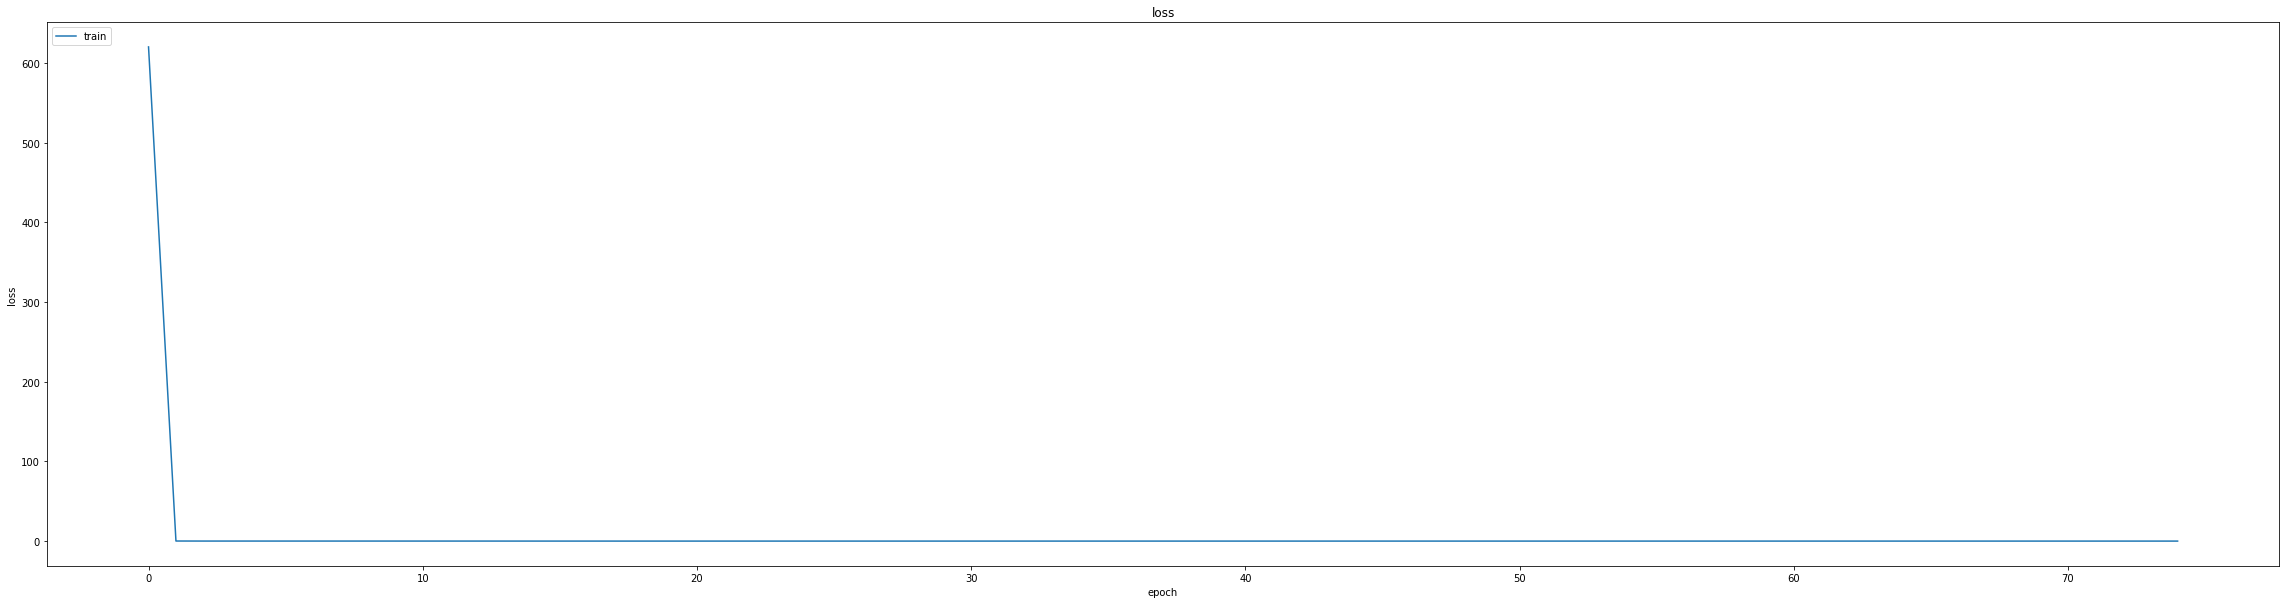

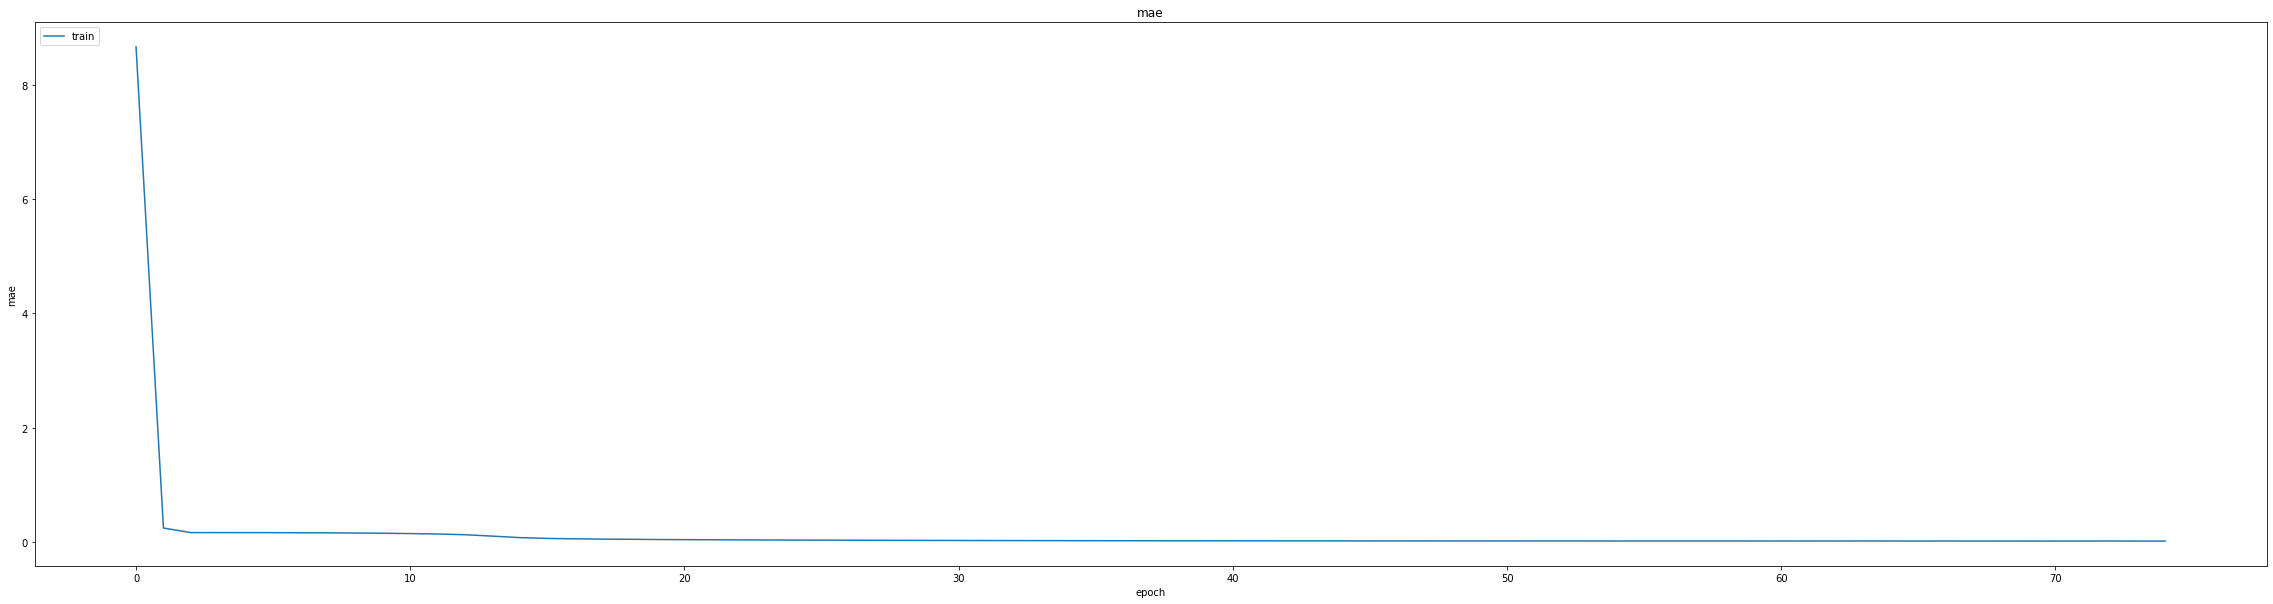

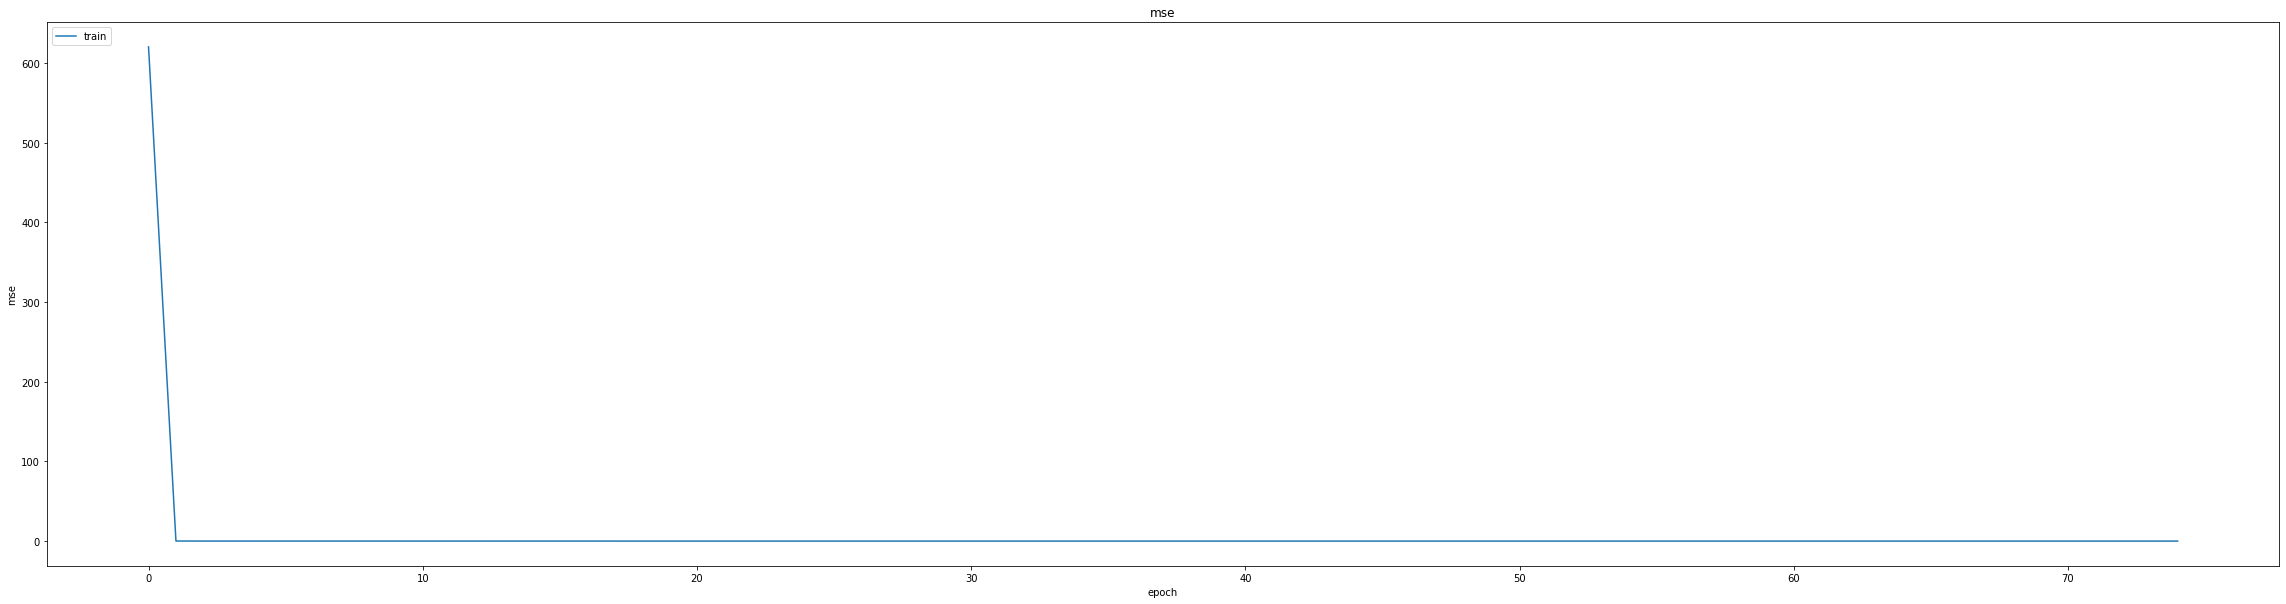

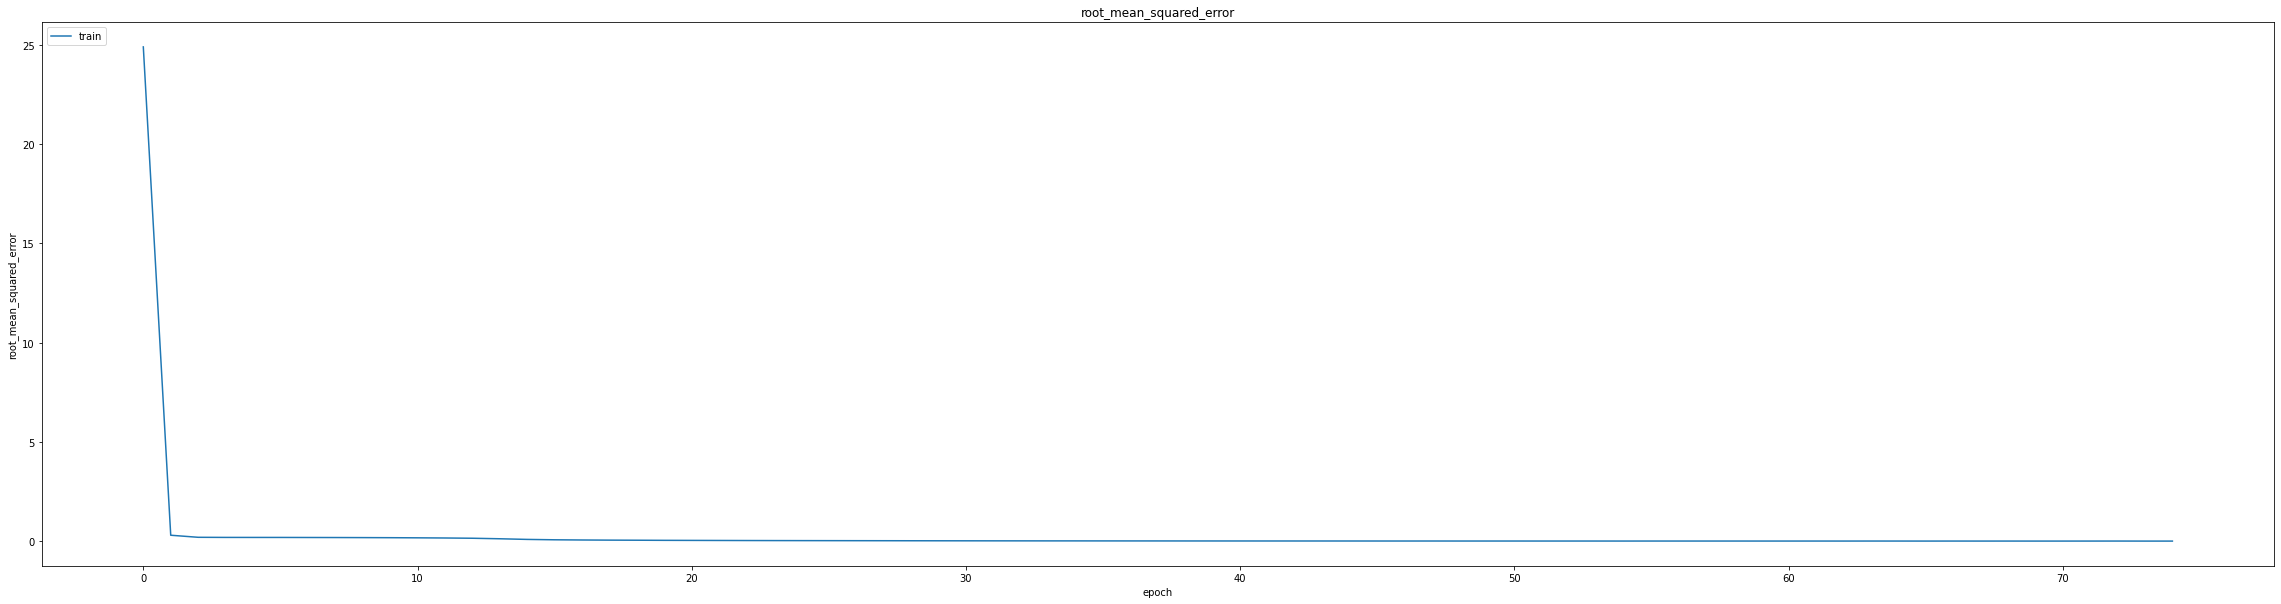

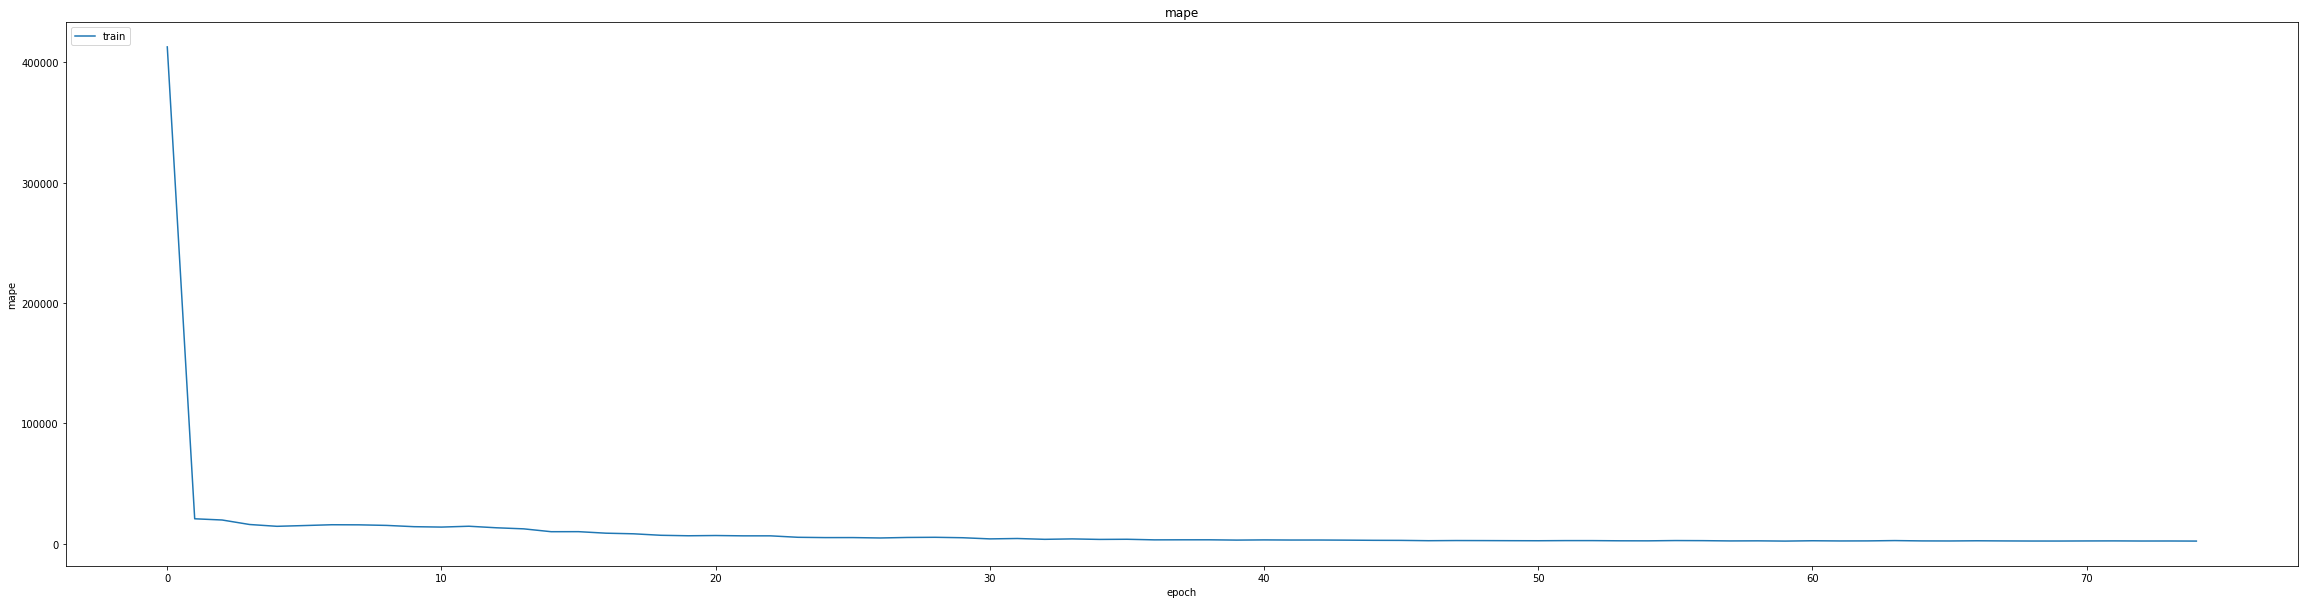

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.018634475767612457
0.018634475767612457
0.024672936648130417
464/464 [==============================] - 2s 4ms/step
0.9817678239433749


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
346/348 [============================>.] - ETA: 0s - loss: 4.9670e-04 - mae: 0.0117 - mse: 4.9670e-04 - root_mean_squared_error: 0.0223 - mape: 2329.1255
Epoch 1: val_mse did not improve from 0.00061
348/348 [==============================] - 9s 13ms/step - loss: 4.9446e-04 - mae: 0.0116 - mse: 4.9446e-04 - root_mean_squared_error: 0.0222 - mape: 2316.5288 - val_loss: 6.1876e-04 - val_mae: 0.0189 - val_mse: 6.1876e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 6296.7949 - lr: 0.0010
Epoch 2/25
345/348 [============================>.] - ETA: 0s - loss: 8.6745e-05 - mae: 0.0069 - mse: 8.6745e-05 - root_mean_squared_error: 0.0093 - mape: 2219.4485
Epoch 2: val_mse improved from 0.00061 to 0.00060, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 8.6937e-05 - mae: 0.0069 - mse: 8.6937e-05 - root_mean_squared_error: 0.0093 - mape: 2201.0698 - val_loss: 6.0139e-04 - val_mae: 0.0186 - val_mse: 6.0139e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 5936.4722 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
344/348 [============================>.] - ETA: 0s - loss: 8.9265e-05 - mae: 0.0071 - mse: 8.9265e-05 - root_mean_squared_error: 0.0094 - mape: 2189.7009
Epoch 3: val_mse improved from 0.00060 to 0.00058, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 8.9066e-05 - mae: 0.0071 - mse: 8.9066e-05 - root_mean_squared_error: 0.0094 - mape: 2165.2769 - val_loss: 5.8276e-04 - val_mae: 0.0185 - val_mse: 5.8276e-04 - val_root_mean_squared_error: 0.0241 - val_mape: 5936.1436 - lr: 9.0000e-04
Epoch 4/25
348/348 [==============================] - ETA: 0s - loss: 9.4703e-05 - mae: 0.0074 - mse: 9.4703e-05 - root_mean_squared_error: 0.0097 - mape: 2108.0989
Epoch 4: val_mse did not improve from 0.00058
348/348 [==============================] - 4s 11ms/step - loss: 9.4703e-05 - mae: 0.0074 - mse: 9.4703e-05 - root_mean_squared_error: 0.0097 - mape: 2108.0989 - val_loss: 8.1692e-04 - val_mae: 0.0225 - val_mse: 8.1692e-04 - val_root_mean_squared_error: 0.0286 - val_mape: 6199.0146 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
347/348 [============================>.] - ETA: 0s - loss: 9.8044e-05 - mae: 0.0076 - mse: 9.8044e-05 - root_mean_squared_error: 0.0099 - mape:

348/348 [==============================] - 14s 40ms/step - loss: 9.7966e-05 - mae: 0.0076 - mse: 9.7966e-05 - root_mean_squared_error: 0.0099 - mape: 2048.9946 - val_loss: 5.7884e-04 - val_mae: 0.0184 - val_mse: 5.7884e-04 - val_root_mean_squared_error: 0.0241 - val_mape: 5648.0493 - lr: 8.1000e-04
Epoch 6/25
346/348 [============================>.] - ETA: 0s - loss: 9.5039e-05 - mae: 0.0075 - mse: 9.5039e-05 - root_mean_squared_error: 0.0097 - mape: 1939.9308
Epoch 6: val_mse improved from 0.00058 to 0.00055, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 9.4975e-05 - mae: 0.0075 - mse: 9.4975e-05 - root_mean_squared_error: 0.0097 - mape: 1929.4387 - val_loss: 5.5078e-04 - val_mae: 0.0177 - val_mse: 5.5078e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 5852.0371 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
346/348 [============================>.] - ETA: 0s - loss: 8.9578e-05 - mae: 0.0072 - mse: 8.9578e-05 - root_mean_squared_error: 0.0095 - mape: 1975.2650
Epoch 7: val_mse improved from 0.00055 to 0.00050, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 8.9523e-05 - mae: 0.0072 - mse: 8.9523e-05 - root_mean_squared_error: 0.0095 - mape: 1964.5807 - val_loss: 5.0304e-04 - val_mae: 0.0170 - val_mse: 5.0304e-04 - val_root_mean_squared_error: 0.0224 - val_mape: 5636.4399 - lr: 7.2900e-04
Epoch 8/25
348/348 [==============================] - ETA: 0s - loss: 9.2563e-05 - mae: 0.0073 - mse: 9.2563e-05 - root_mean_squared_error: 0.0096 - mape: 2094.0225
Epoch 8: val_mse did not improve from 0.00050
348/348 [==============================] - 4s 11ms/step - loss: 9.2563e-05 - mae: 0.0073 - mse: 9.2563e-05 - root_mean_squared_error: 0.0096 - mape: 2094.0225 - val_loss: 5.2043e-04 - val_mae: 0.0175 - val_mse: 5.2043e-04 - val_root_mean_squared_error: 0.0228 - val_mape: 5680.2051 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
348/348 [==============================] - ETA: 0s - loss: 8.4623e-05 - mae: 0.0070 - mse: 8.4623e-05 - root_mean_squared_error: 0.0092 - mape:

348/348 [==============================] - 14s 39ms/step - loss: 8.4623e-05 - mae: 0.0070 - mse: 8.4623e-05 - root_mean_squared_error: 0.0092 - mape: 2121.1265 - val_loss: 4.8311e-04 - val_mae: 0.0167 - val_mse: 4.8311e-04 - val_root_mean_squared_error: 0.0220 - val_mape: 5647.6753 - lr: 6.5610e-04
Epoch 10/25
346/348 [============================>.] - ETA: 0s - loss: 7.9170e-05 - mae: 0.0068 - mse: 7.9170e-05 - root_mean_squared_error: 0.0089 - mape: 2178.5088
Epoch 10: val_mse improved from 0.00048 to 0.00046, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 7.9298e-05 - mae: 0.0068 - mse: 7.9298e-05 - root_mean_squared_error: 0.0089 - mape: 2166.7271 - val_loss: 4.6253e-04 - val_mae: 0.0162 - val_mse: 4.6253e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 5478.0049 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
345/348 [============================>.] - ETA: 0s - loss: 8.0077e-05 - mae: 0.0068 - mse: 8.0077e-05 - root_mean_squared_error: 0.0089 - mape: 1814.9293
Epoch 11: val_mse improved from 0.00046 to 0.00045, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 42ms/step - loss: 7.9814e-05 - mae: 0.0068 - mse: 7.9814e-05 - root_mean_squared_error: 0.0089 - mape: 1799.8979 - val_loss: 4.5372e-04 - val_mae: 0.0162 - val_mse: 4.5372e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 5476.0337 - lr: 5.9049e-04
Epoch 12/25
343/348 [============================>.] - ETA: 0s - loss: 7.2789e-05 - mae: 0.0065 - mse: 7.2789e-05 - root_mean_squared_error: 0.0085 - mape: 1834.2740
Epoch 12: val_mse improved from 0.00045 to 0.00044, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 7.2923e-05 - mae: 0.0065 - mse: 7.2923e-05 - root_mean_squared_error: 0.0085 - mape: 1808.5474 - val_loss: 4.3859e-04 - val_mae: 0.0159 - val_mse: 4.3859e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 5188.8413 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/25
346/348 [============================>.] - ETA: 0s - loss: 6.8867e-05 - mae: 0.0063 - mse: 6.8867e-05 - root_mean_squared_error: 0.0083 - mape: 1790.7748
Epoch 13: val_mse improved from 0.00044 to 0.00041, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 6.8745e-05 - mae: 0.0063 - mse: 6.8745e-05 - root_mean_squared_error: 0.0083 - mape: 1781.0879 - val_loss: 4.0697e-04 - val_mae: 0.0152 - val_mse: 4.0697e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 5253.0942 - lr: 5.3144e-04
Epoch 14/25
346/348 [============================>.] - ETA: 0s - loss: 6.9552e-05 - mae: 0.0064 - mse: 6.9552e-05 - root_mean_squared_error: 0.0083 - mape: 1758.7534
Epoch 14: val_mse did not improve from 0.00041
348/348 [==============================] - 4s 11ms/step - loss: 6.9783e-05 - mae: 0.0064 - mse: 6.9783e-05 - root_mean_squared_error: 0.0084 - mape: 1749.2424 - val_loss: 4.1167e-04 - val_mae: 0.0155 - val_mse: 4.1167e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 5216.3447 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
347/348 [============================>.] - ETA: 0s - loss: 6.0607e-05 - mae: 0.0059 - mse: 6.0607e-05 - root_mean_squared_error: 0.0078 - m

348/348 [==============================] - 14s 40ms/step - loss: 6.0835e-05 - mae: 0.0059 - mse: 6.0835e-05 - root_mean_squared_error: 0.0078 - mape: 1756.0627 - val_loss: 3.9202e-04 - val_mae: 0.0150 - val_mse: 3.9202e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 5147.5928 - lr: 4.7830e-04
Epoch 16/25
345/348 [============================>.] - ETA: 0s - loss: 6.2040e-05 - mae: 0.0060 - mse: 6.2040e-05 - root_mean_squared_error: 0.0079 - mape: 1687.8560
Epoch 16: val_mse did not improve from 0.00039
348/348 [==============================] - 4s 11ms/step - loss: 6.1904e-05 - mae: 0.0060 - mse: 6.1904e-05 - root_mean_squared_error: 0.0079 - mape: 1673.8771 - val_loss: 3.9235e-04 - val_mae: 0.0150 - val_mse: 3.9235e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 5201.4697 - lr: 4.7830e-04
lr changed to 0.0004304672533180565
Epoch 17/25
348/348 [==============================] - ETA: 0s - loss: 5.6146e-05 - mae: 0.0057 - mse: 5.6146e-05 - root_mean_squared_error: 0.0075 - ma

348/348 [==============================] - 13s 39ms/step - loss: 5.6146e-05 - mae: 0.0057 - mse: 5.6146e-05 - root_mean_squared_error: 0.0075 - mape: 1752.1036 - val_loss: 3.5553e-04 - val_mae: 0.0142 - val_mse: 3.5553e-04 - val_root_mean_squared_error: 0.0189 - val_mape: 5338.3726 - lr: 4.3047e-04
Epoch 18/25
346/348 [============================>.] - ETA: 0s - loss: 6.2986e-05 - mae: 0.0062 - mse: 6.2986e-05 - root_mean_squared_error: 0.0079 - mape: 1745.4559
Epoch 18: val_mse did not improve from 0.00036
348/348 [==============================] - 4s 11ms/step - loss: 6.2989e-05 - mae: 0.0062 - mse: 6.2989e-05 - root_mean_squared_error: 0.0079 - mape: 1736.0153 - val_loss: 3.9056e-04 - val_mae: 0.0151 - val_mse: 3.9056e-04 - val_root_mean_squared_error: 0.0198 - val_mape: 5035.4263 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/25
348/348 [==============================] - ETA: 0s - loss: 5.0537e-05 - mae: 0.0054 - mse: 5.0537e-05 - root_mean_squared_error: 0.0071 - m

348/348 [==============================] - 14s 40ms/step - loss: 5.0537e-05 - mae: 0.0054 - mse: 5.0537e-05 - root_mean_squared_error: 0.0071 - mape: 1837.4158 - val_loss: 3.0344e-04 - val_mae: 0.0132 - val_mse: 3.0344e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 5027.1611 - lr: 3.8742e-04
Epoch 20/25
345/348 [============================>.] - ETA: 0s - loss: 4.7796e-05 - mae: 0.0053 - mse: 4.7796e-05 - root_mean_squared_error: 0.0069 - mape: 1677.4480
Epoch 20: val_mse improved from 0.00030 to 0.00027, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 4.7826e-05 - mae: 0.0053 - mse: 4.7826e-05 - root_mean_squared_error: 0.0069 - mape: 1663.5568 - val_loss: 2.7280e-04 - val_mae: 0.0124 - val_mse: 2.7280e-04 - val_root_mean_squared_error: 0.0165 - val_mape: 4860.6558 - lr: 3.8742e-04
lr changed to 0.0003486784757114947
Epoch 21/25
347/348 [============================>.] - ETA: 0s - loss: 4.5763e-05 - mae: 0.0052 - mse: 4.5763e-05 - root_mean_squared_error: 0.0068 - mape: 1604.7914
Epoch 21: val_mse improved from 0.00027 to 0.00026, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 4.5738e-05 - mae: 0.0052 - mse: 4.5738e-05 - root_mean_squared_error: 0.0068 - mape: 1600.7212 - val_loss: 2.6083e-04 - val_mae: 0.0121 - val_mse: 2.6083e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 4814.4648 - lr: 3.4868e-04
Epoch 22/25
347/348 [============================>.] - ETA: 0s - loss: 4.5546e-05 - mae: 0.0051 - mse: 4.5546e-05 - root_mean_squared_error: 0.0067 - mape: 1547.2894
Epoch 22: val_mse improved from 0.00026 to 0.00024, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 4.5516e-05 - mae: 0.0051 - mse: 4.5516e-05 - root_mean_squared_error: 0.0067 - mape: 1543.3649 - val_loss: 2.4238e-04 - val_mae: 0.0116 - val_mse: 2.4238e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 4721.7700 - lr: 3.4868e-04
lr changed to 0.00031381062290165574
Epoch 23/25
344/348 [============================>.] - ETA: 0s - loss: 4.2382e-05 - mae: 0.0050 - mse: 4.2382e-05 - root_mean_squared_error: 0.0065 - mape: 1655.6039
Epoch 23: val_mse did not improve from 0.00024
348/348 [==============================] - 4s 11ms/step - loss: 4.2267e-05 - mae: 0.0050 - mse: 4.2267e-05 - root_mean_squared_error: 0.0065 - mape: 1637.1339 - val_loss: 2.5229e-04 - val_mae: 0.0119 - val_mse: 2.5229e-04 - val_root_mean_squared_error: 0.0159 - val_mape: 4718.1631 - lr: 3.1381e-04
Epoch 24/25
344/348 [============================>.] - ETA: 0s - loss: 3.8233e-05 - mae: 0.0047 - mse: 3.8233e-05 - root_mean_squared_error: 0.0062 - m

348/348 [==============================] - 14s 41ms/step - loss: 3.8252e-05 - mae: 0.0047 - mse: 3.8252e-05 - root_mean_squared_error: 0.0062 - mape: 1498.1443 - val_loss: 2.3376e-04 - val_mae: 0.0113 - val_mse: 2.3376e-04 - val_root_mean_squared_error: 0.0153 - val_mape: 4679.4380 - lr: 3.1381e-04
lr changed to 0.0002824295632308349
Epoch 25/25
347/348 [============================>.] - ETA: 0s - loss: 3.8750e-05 - mae: 0.0048 - mse: 3.8750e-05 - root_mean_squared_error: 0.0062 - mape: 1533.9246
Epoch 25: val_mse improved from 0.00023 to 0.00021, saving model to /content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 3.8797e-05 - mae: 0.0048 - mse: 3.8797e-05 - root_mean_squared_error: 0.0062 - mape: 1530.0416 - val_loss: 2.0827e-04 - val_mae: 0.0106 - val_mse: 2.0827e-04 - val_root_mean_squared_error: 0.0144 - val_mape: 4655.6768 - lr: 2.8243e-04


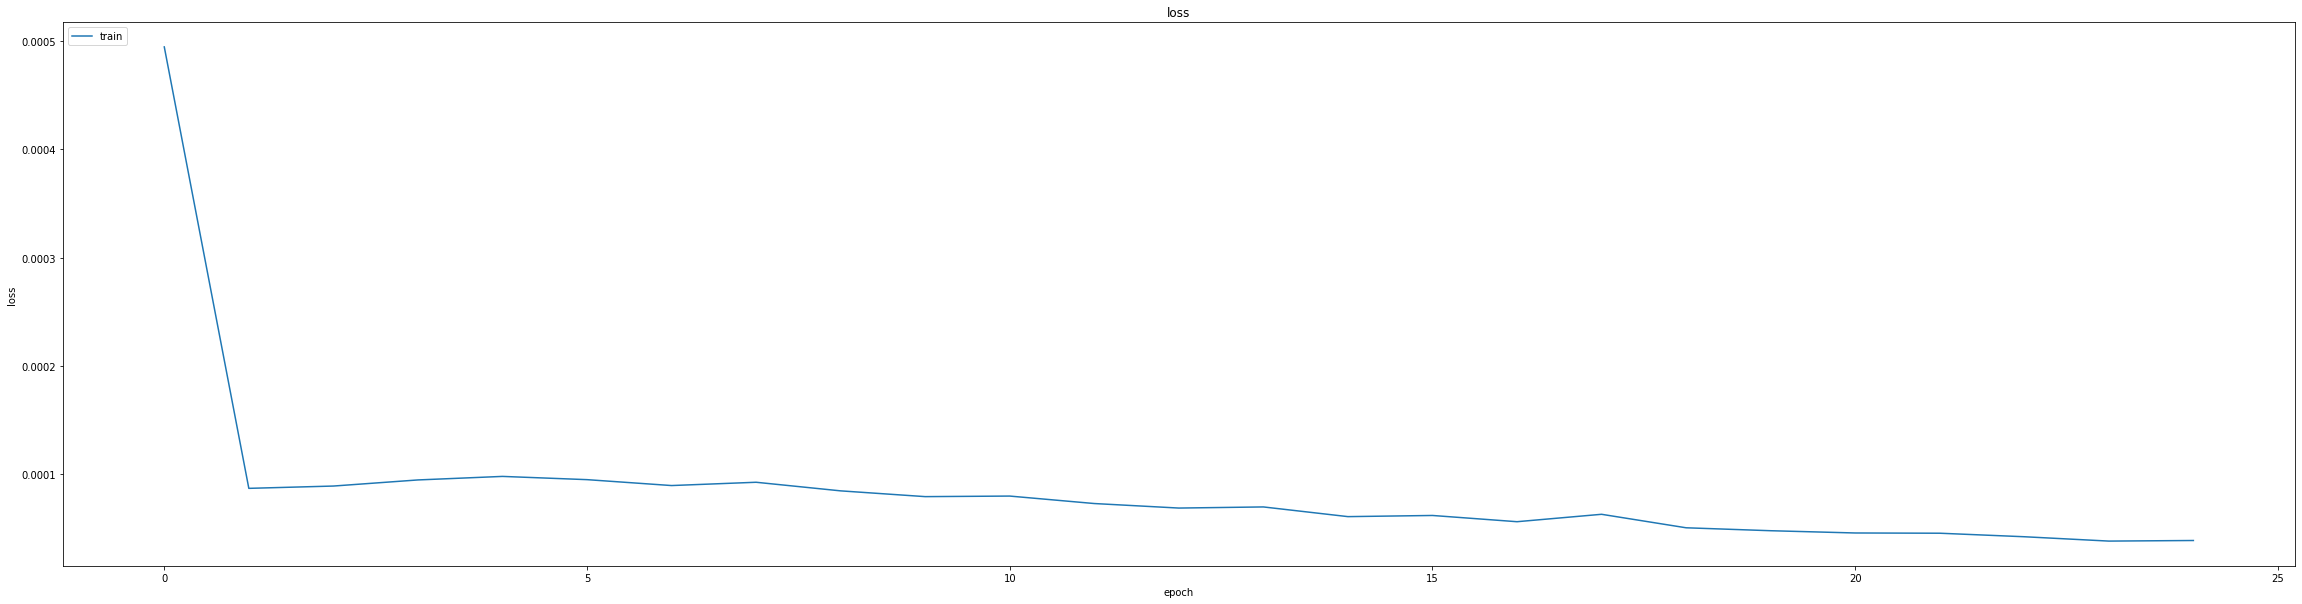

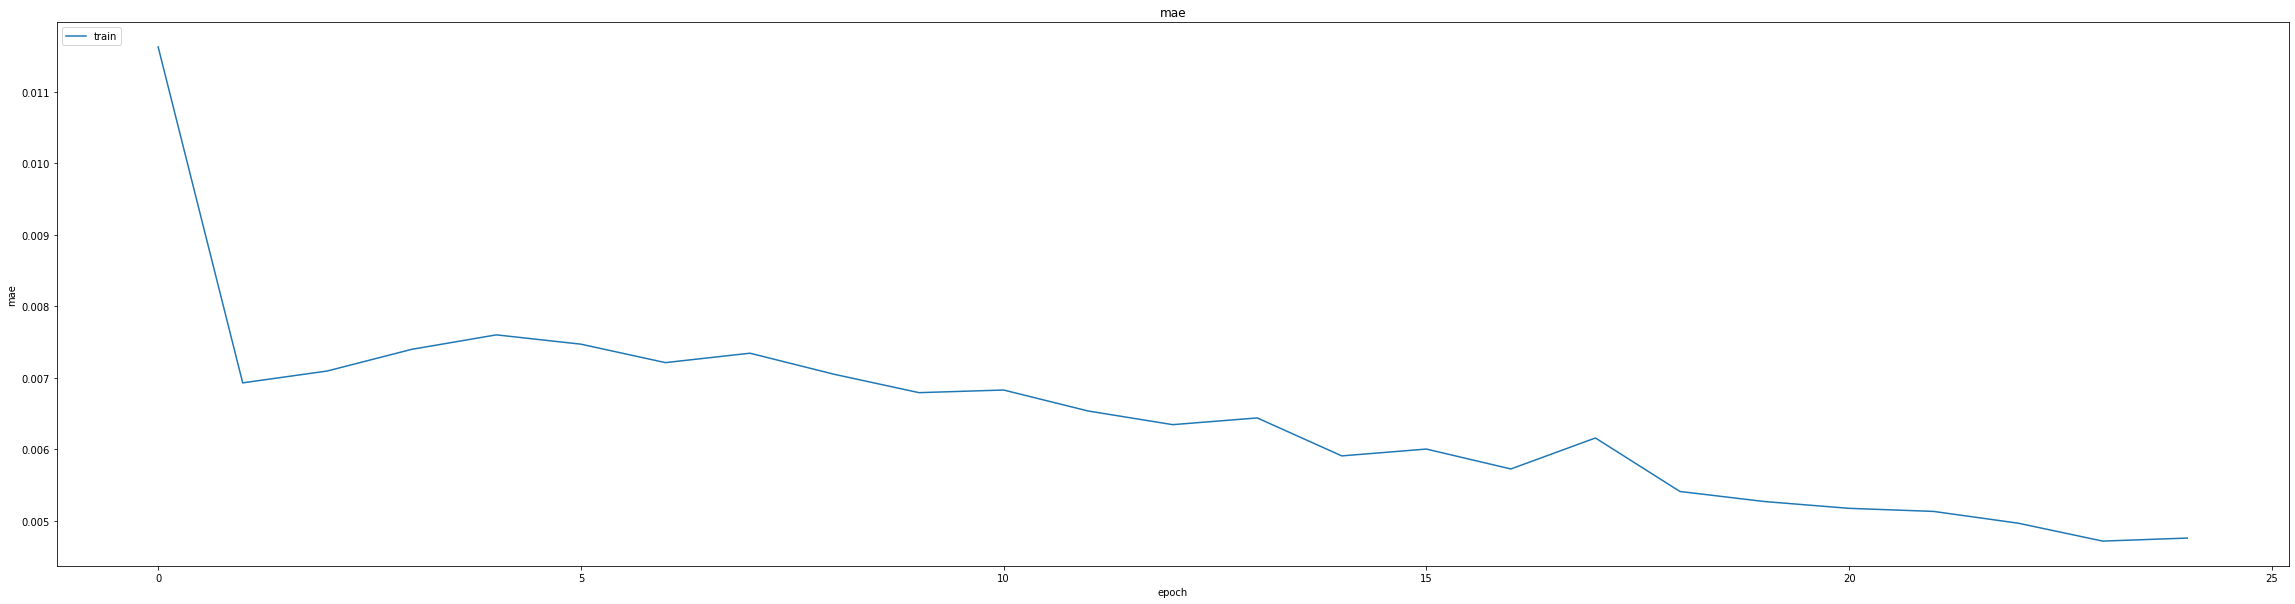

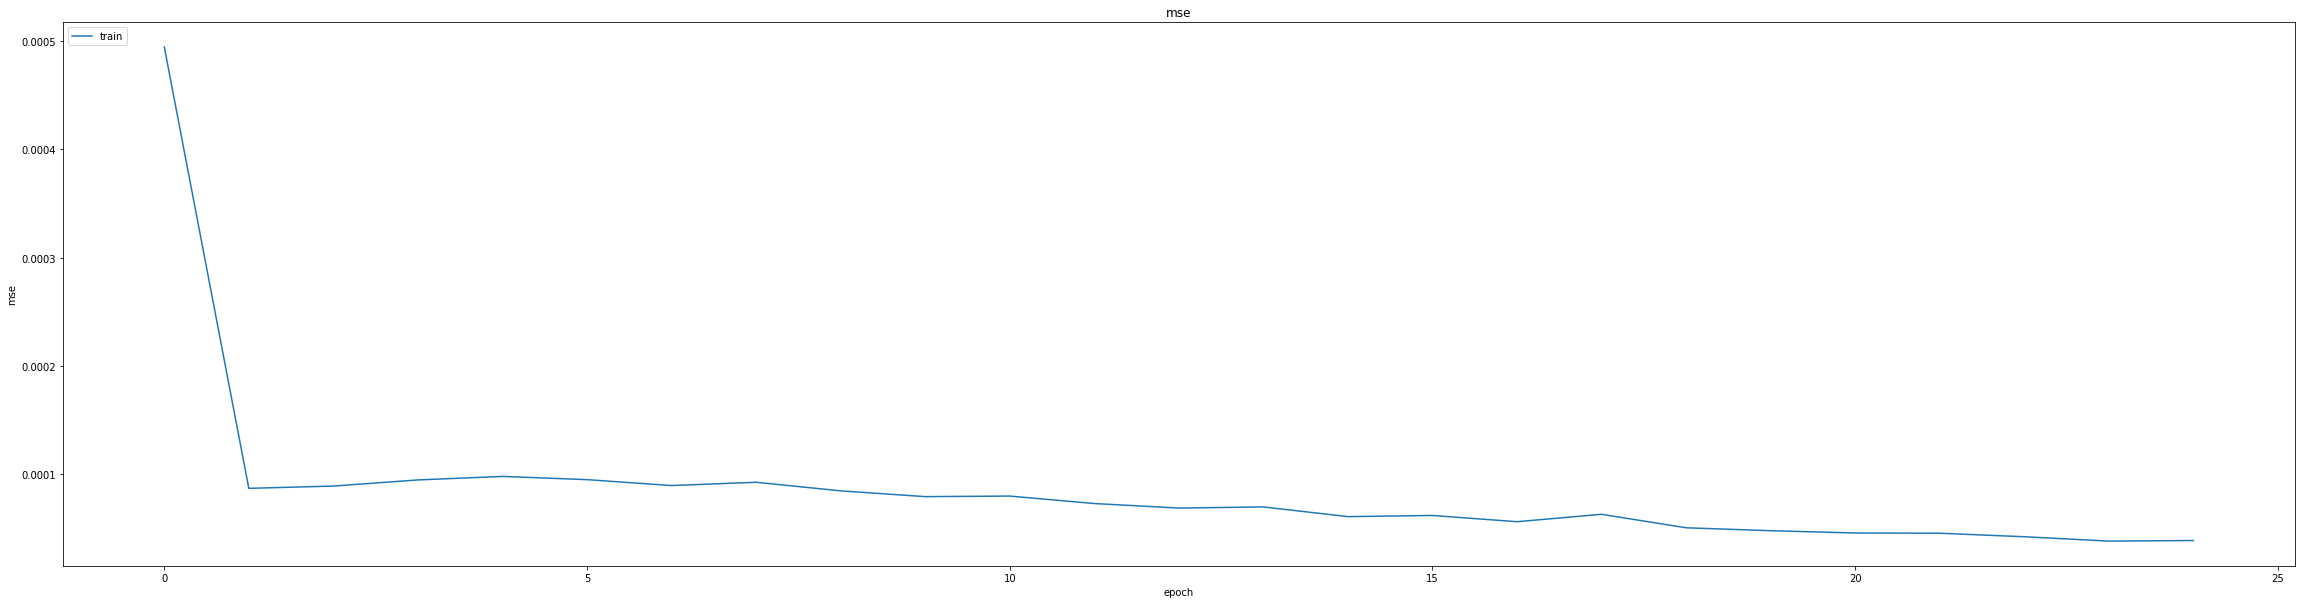

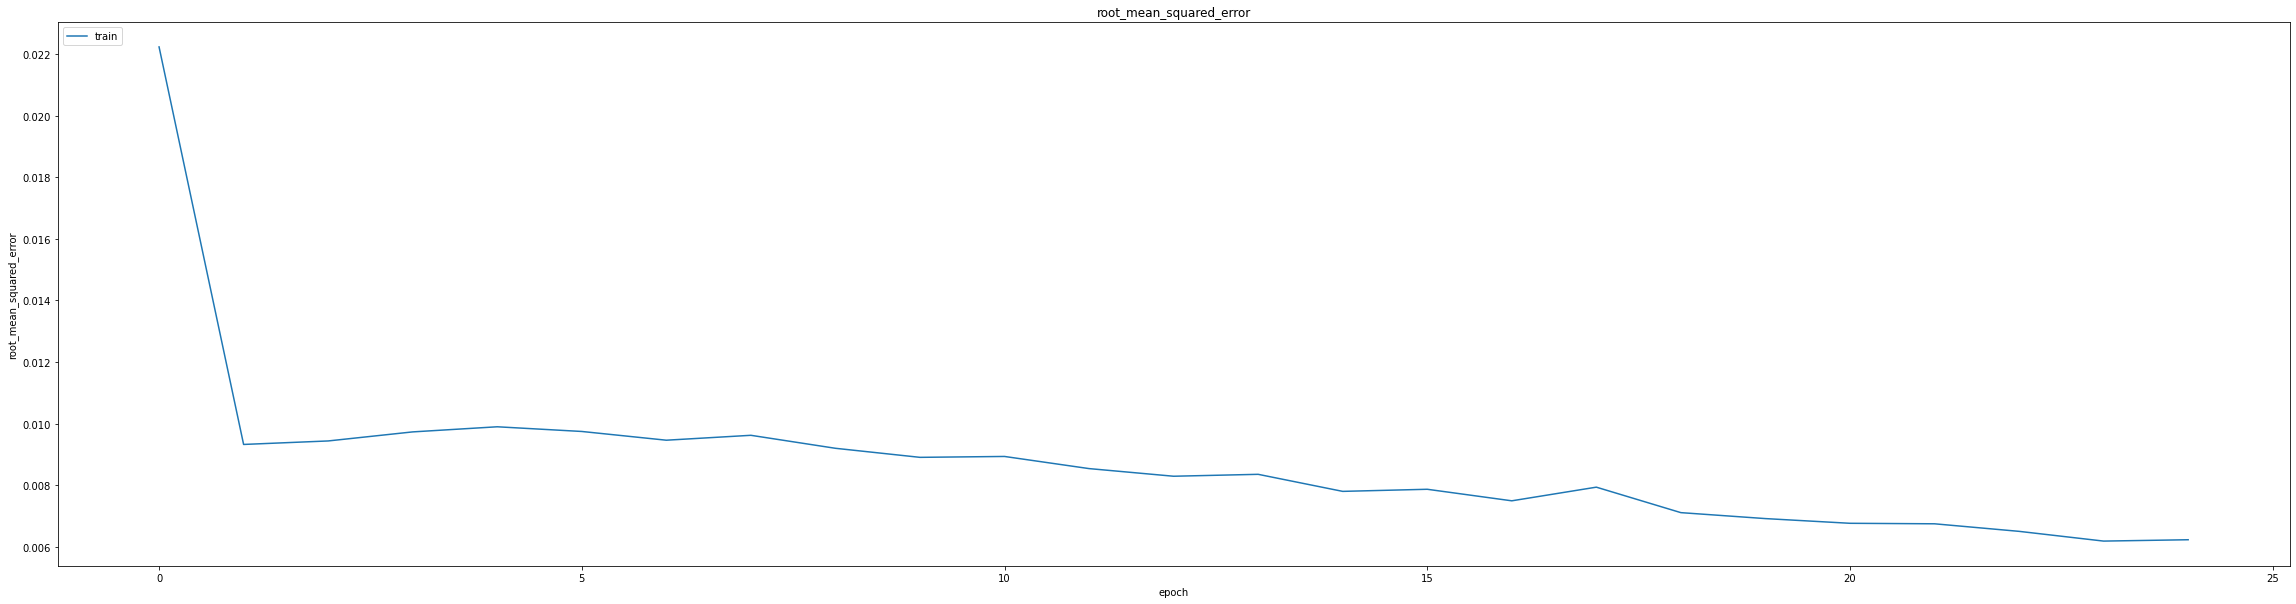

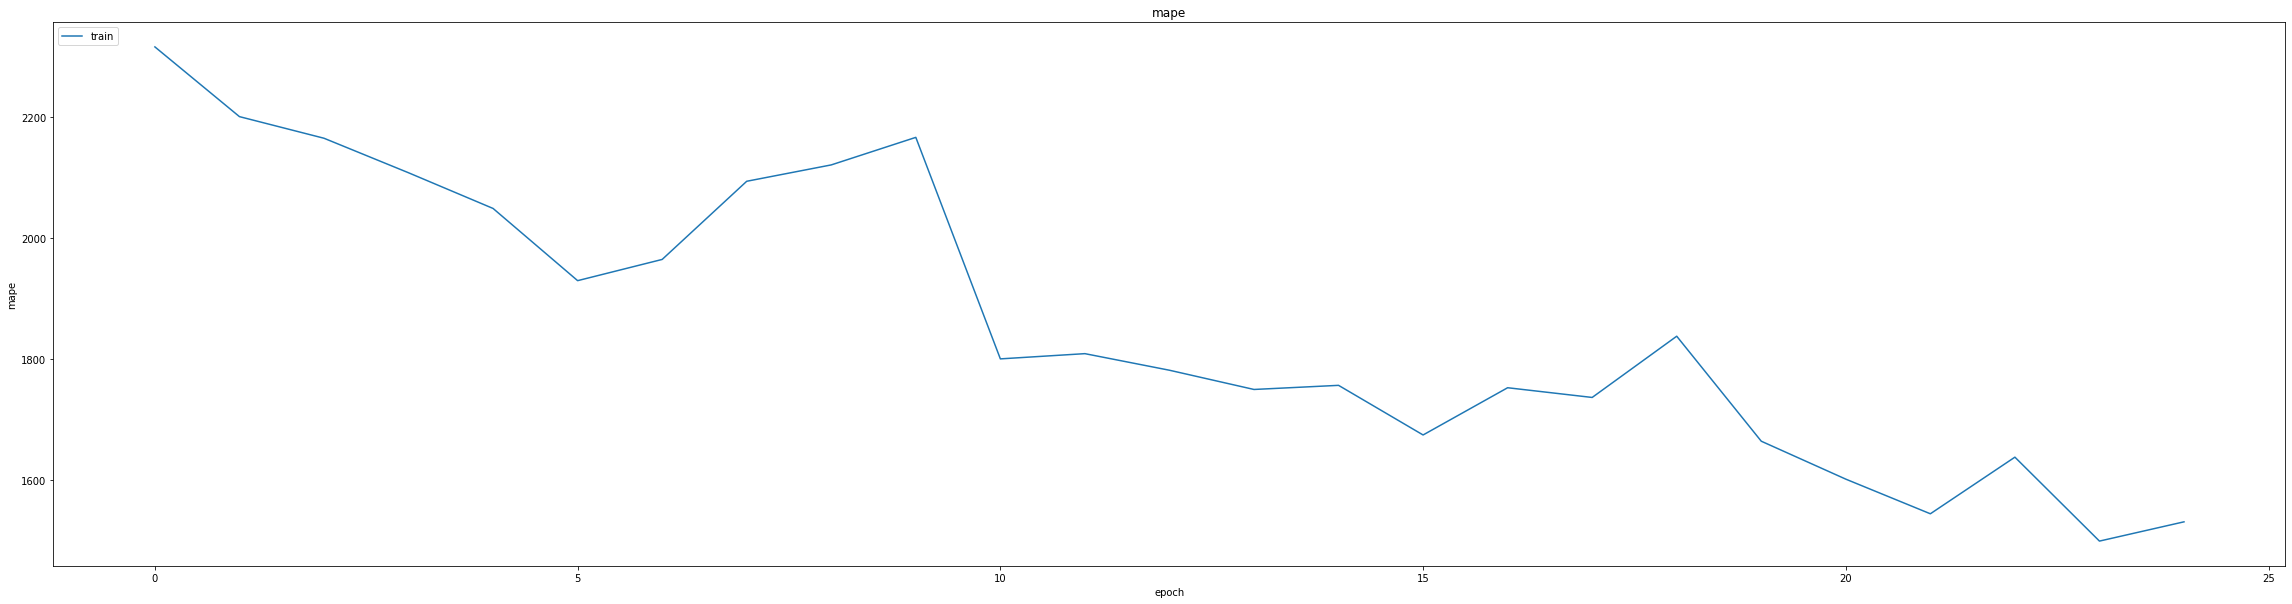

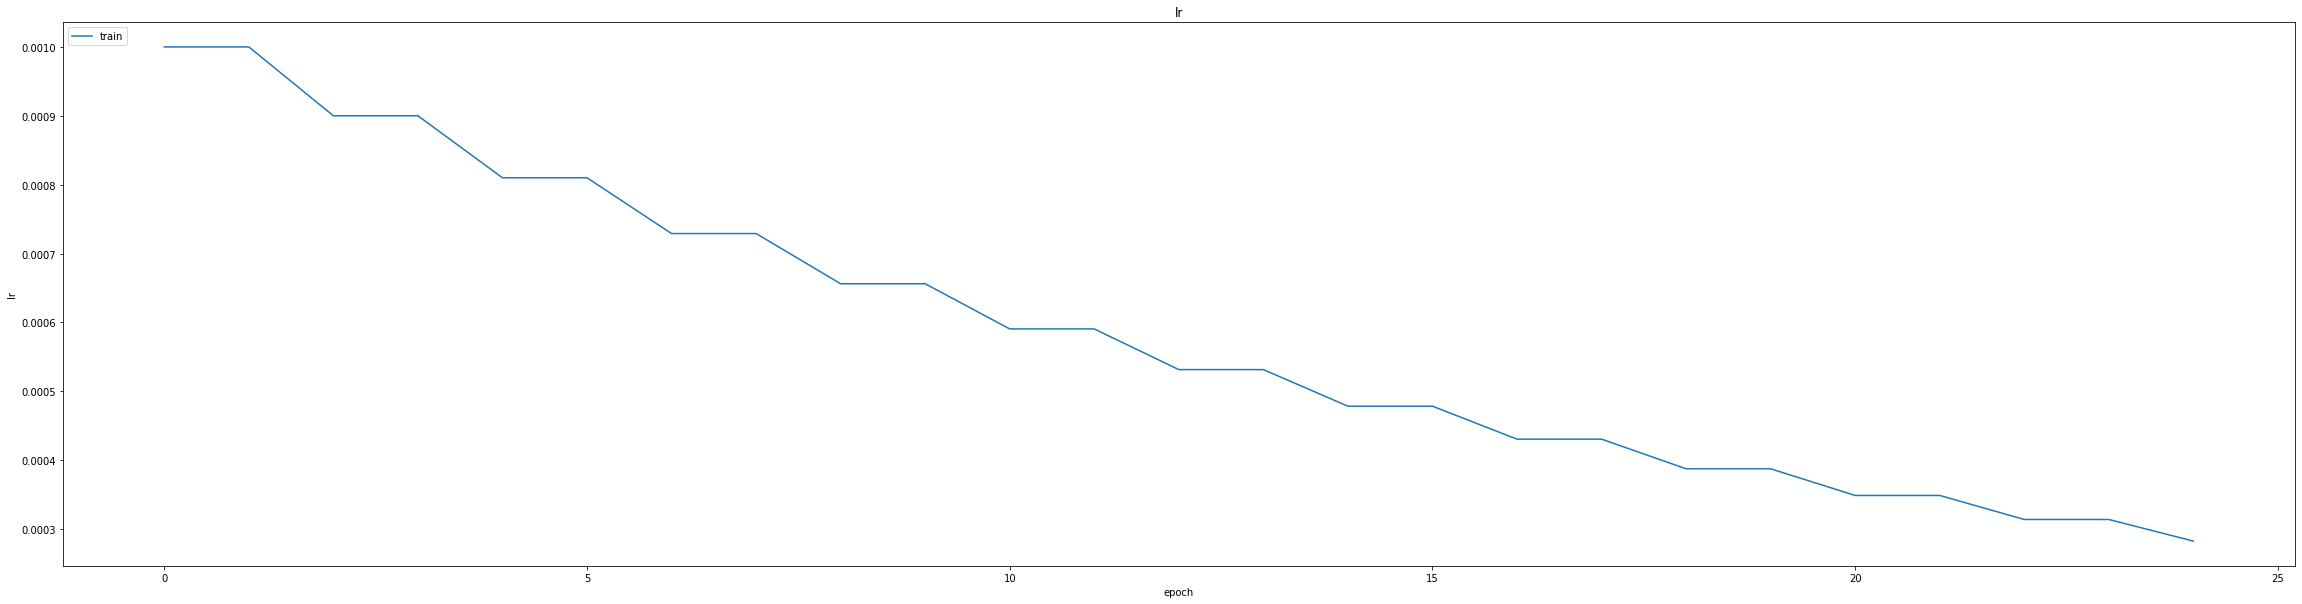

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.010636799037456512
0.010636799037456512
0.014431631192564964
464/464 [==============================] - 2s 4ms/step
0.9943770091879377


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/AUD_USD_15min_GRU(60-40)")

464/464 [==============================] - 2s 4ms/step


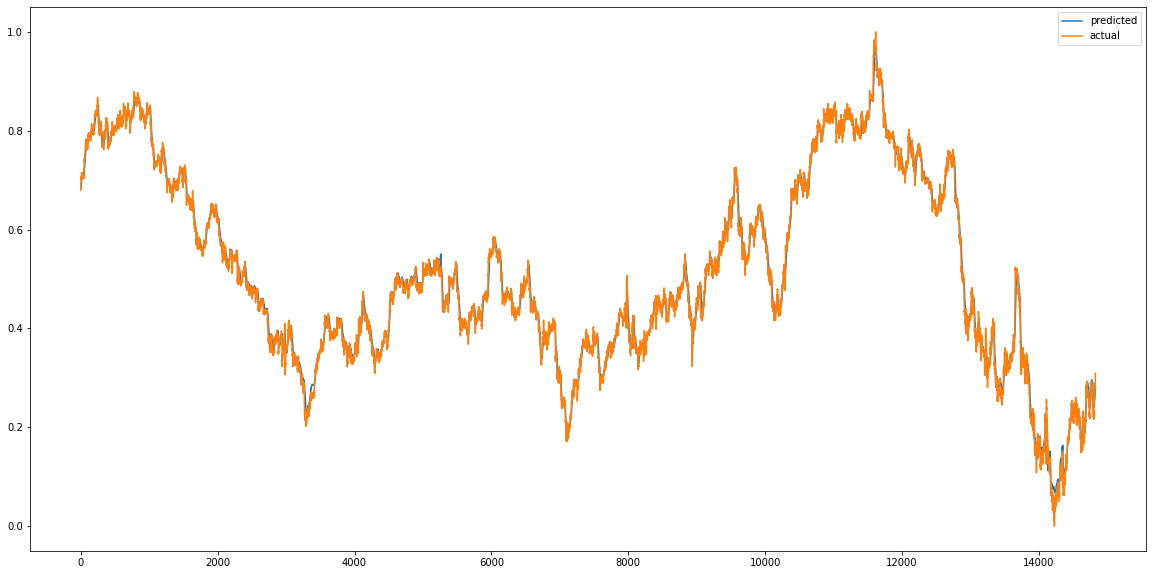

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


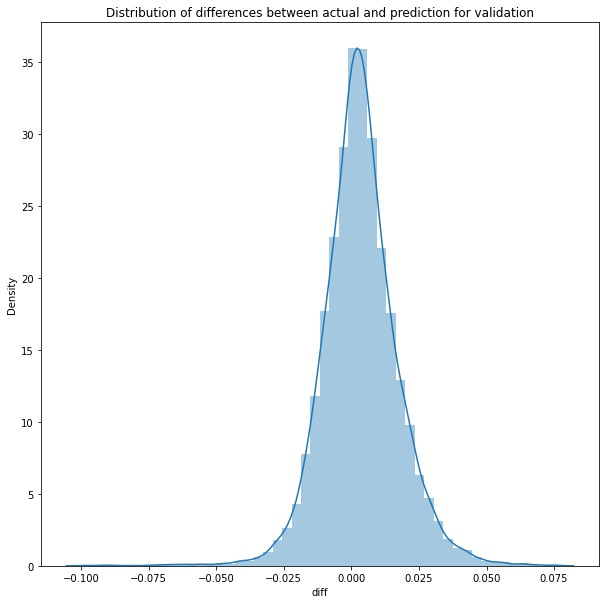

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


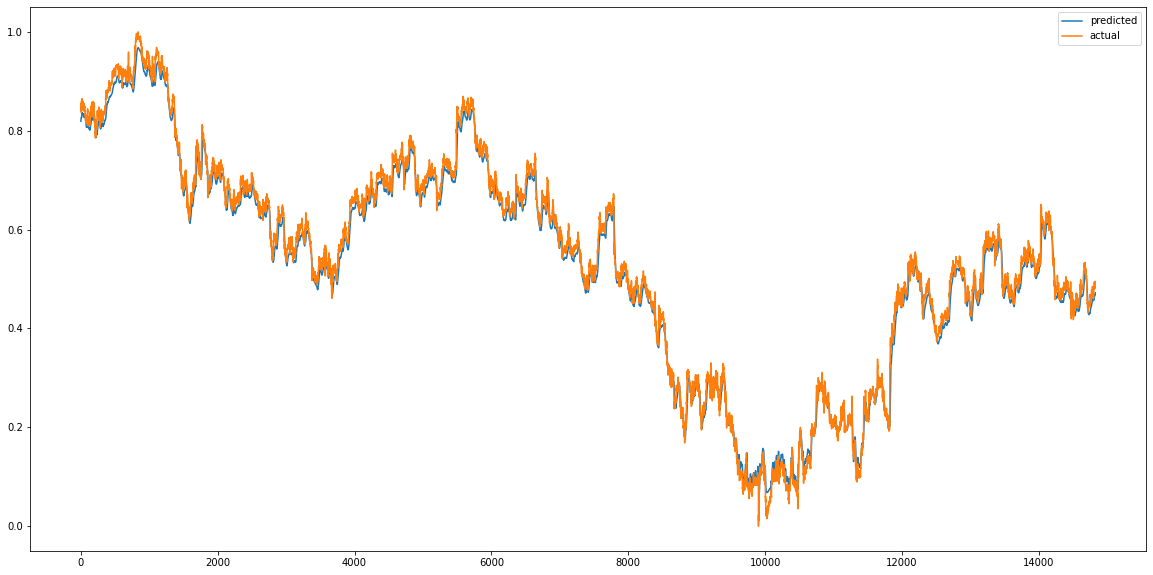

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


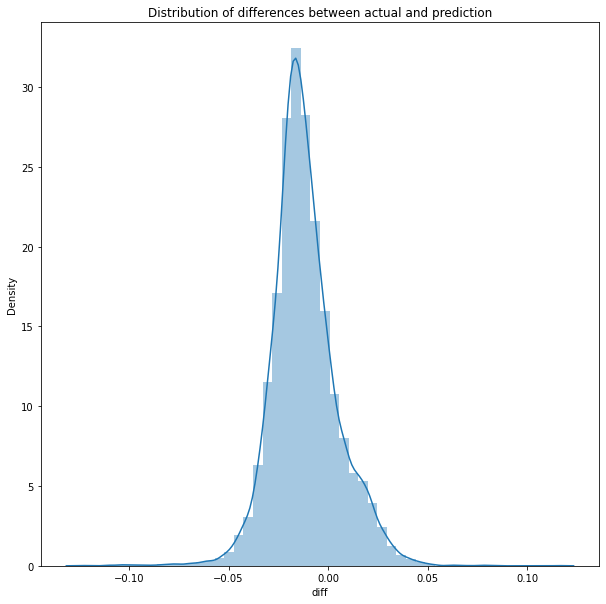

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.000415098764326876
RMSE :  0.020373972718320695
MAE :  0.016865931789001243
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.9917685614940932


count    14827.000000
mean        -0.011835
std          0.016584
min         -0.124294
25%         -0.021472
50%         -0.013581
75%         -0.003287
max          0.116078
Name: diff, dtype: float64